In [1]:
from __future__ import absolute_import, division, print_function

import base64
import imageio
import IPython
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image
import pyvirtualdisplay
import simpy

import tensorflow as tf

from tf_agents.agents.dqn import dqn_agent
from tf_agents.drivers import dynamic_step_driver
from tf_agents.environments import suite_gym
from tf_agents.environments import tf_py_environment
from tf_agents.eval import metric_utils
from tf_agents.metrics import tf_metrics
from tf_agents.networks import q_network
from tf_agents.policies import random_tf_policy
from tf_agents.replay_buffers import tf_uniform_replay_buffer
from tf_agents.trajectories import trajectory
from tf_agents.utils import common
from tf_agents.trajectories import time_step as ts
from tf_agents.specs import tensor_spec
#from env.RideSimulator.Grid import Grid
import tf_agents


import os,sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))
from RideSimulator.taxi_sim import run_simulation


In [2]:
#register custom env
import gym

gym.envs.register(
     id='taxi-v0',
     entry_point='env.taxi:TaxiEnv',
     max_episode_steps=1500,
     kwargs={'state_dict':None},
)

In [24]:
#hyper params

num_iterations = 100 # @param {type:"integer"}

initial_collect_steps = 1000  # @param {type:"integer"} 
collect_steps_per_iteration = 1  # @param {type:"integer"}
replay_buffer_max_length = 100000  # @param {type:"integer"}

batch_size = 64  # @param {type:"integer"}
learning_rate = 1e-3  # @param {type:"number"}
log_interval = 10  # @param {type:"integer"}

num_eval_episodes = 5  # @param {type:"integer"}
eval_interval = 5  # @param {type:"integer"}action

In [4]:
#load taxi env
env_name = "taxi-v0"
env = suite_gym.load(env_name)

tf_env = tf_py_environment.TFPyEnvironment(env)
reset = tf_env.reset()


In [6]:
#agent and policy
fc_layer_params = (100,)


q_net = q_network.QNetwork(
    tf_env.observation_spec(),
    tf_env.action_spec(),
    fc_layer_params=fc_layer_params)

optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate)

train_step_counter = tf.Variable(0)

agent = dqn_agent.DqnAgent(
    tf_env.time_step_spec(),
    tf_env.action_spec(),
    q_network=q_net,
    optimizer=optimizer,
    td_errors_loss_fn=common.element_wise_squared_loss,
    train_step_counter=train_step_counter)

agent.initialize()


#random policy
policy = random_tf_policy.RandomTFPolicy(tf_env.time_step_spec(),
                                                tf_env.action_spec())


#replay buffer
replay_buffer = tf_uniform_replay_buffer.TFUniformReplayBuffer(
    data_spec=agent.collect_data_spec,
    batch_size=tf_env.batch_size,
    max_length=replay_buffer_max_length)
    


In [7]:
#create dataset and iterator
# Dataset generates trajectories with shape [Bx2x...]
dataset = replay_buffer.as_dataset(
    num_parallel_calls=3, 
    sample_batch_size=batch_size, 
    num_steps=2).prefetch(3)

iterator = iter(dataset)
print(iterator)

In [7]:
"""
policy.action(reset)
#tf_env.time_step_spec()
print(reset)
#print(env.reset())
#print(ts.restart(tf.convert_to_tensor(np.array([0,0,0,0], dtype=np.int32), dtype=tf.float32)))
print(" ")
print(ts.TimeStep(tf.constant([0]), tf.constant([0.0]), tf.constant([1.0]),tf.convert_to_tensor(np.array([[0,0,0,0]], dtype=np.int32), dtype=tf.float32)))

#print(tensor_spec.to_array_spec(reset))
#encoder_func = tf_agents.utils.example_encoding.get_example_encoder(env.reset())
#encoder_func(env.reset())
"""

'\npolicy.action(reset)\n#tf_env.time_step_spec()\nprint(reset)\n#print(env.reset())\n#print(ts.restart(tf.convert_to_tensor(np.array([0,0,0,0], dtype=np.int32), dtype=tf.float32)))\nprint(" ")\nprint(ts.TimeStep(tf.constant([0]), tf.constant([0.0]), tf.constant([1.0]),tf.convert_to_tensor(np.array([[0,0,0,0]], dtype=np.int32), dtype=tf.float32)))\n\n#print(tensor_spec.to_array_spec(reset))\n#encoder_func = tf_agents.utils.example_encoding.get_example_encoder(env.reset())\n#encoder_func(env.reset())\n'

In [7]:
r#un_simulation(policy)

[20000, 40000, 60000, 60000]
0 looking for driver at 0
0 looking for driver at 50
0 got 0 at 50
TimeStep(step_type=<tf.Tensor: shape=(1,), dtype=int32, numpy=array([1], dtype=int32)>, reward=<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>, discount=<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>, observation=<tf.Tensor: shape=(1, 4), dtype=float32, numpy=array([[10.,  0.,  0., 13.]], dtype=float32)>)
0 traveling to pickup point, [ 7 14] from [3 5]
driver 0 location updated  to  [51  9]
Trip distance: 44, time 60
0 finished the trip and released driver 0 at 104 to pool 9
Driver 0 finished trip
1 looking for driver at 200
1 looking for driver at 250
1 got 0 at 250
TimeStep(step_type=<tf.Tensor: shape=(1,), dtype=int32, numpy=array([1], dtype=int32)>, reward=<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>, discount=<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>, observation=<tf.Tensor: sha

36 looking for driver at 7300
41 got 0 at 7300
TimeStep(step_type=<tf.Tensor: shape=(1,), dtype=int32, numpy=array([1], dtype=int32)>, reward=<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>, discount=<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>, observation=<tf.Tensor: shape=(1, 4), dtype=float32, numpy=array([[11., 17.,  0., 13.]], dtype=float32)>)
0 traveling to pickup point, [28 30] from [32 20]
driver 0 location updated  to  [31  0]
Trip distance: 30, time 7311
41 finished the trip and released driver 0 at 7341 to pool 6
Driver 0 finished trip
39 looking for driver at 7350
37 looking for driver at 7350
36 looking for driver at 7350
39 looking for driver at 7400
37 looking for driver at 7400
36 was cancelled!
39 looking for driver at 7450
37 looking for driver at 7450
39 looking for driver at 7500
37 looking for driver at 7500
42 looking for driver at 7550
39 looking for driver at 7550
37 looking for driver at 7550
43 looking for 

0 completed 34


[{'state': <RideSimulator.State.State at 0x7f7a846f00d0>,
  'action': PolicyStep(action=<tf.Tensor: shape=(1,), dtype=int64, numpy=array([1])>, state=(), info=()),
  'observation': [10, 0, 0, 13],
  'reward': 170},
 {'state': <RideSimulator.State.State at 0x7f79c8c4ea30>,
  'action': PolicyStep(action=<tf.Tensor: shape=(1,), dtype=int64, numpy=array([1])>, state=(), info=()),
  'observation': [12, 1, 0, 13],
  'reward': 110},
 {'state': <RideSimulator.State.State at 0x7f79c84020a0>,
  'action': PolicyStep(action=<tf.Tensor: shape=(1,), dtype=int64, numpy=array([0])>, state=(), info=()),
  'observation': [44, 2, 0, 13],
  'reward': 0},
 {'state': <RideSimulator.State.State at 0x7f79c84024f0>,
  'action': PolicyStep(action=<tf.Tensor: shape=(1,), dtype=int64, numpy=array([0])>, state=(), info=()),
  'observation': [20, 2, 0, 13],
  'reward': 0},
 {'state': <RideSimulator.State.State at 0x7f79c8402550>,
  'action': PolicyStep(action=<tf.Tensor: shape=(1,), dtype=int64, numpy=array([0])>, 

In [8]:
#ts.transition(np.array([1,2,3,4], dtype=np.int32), reward=0.0, discount=1.0)

TimeStep(step_type=array(1, dtype=int32), reward=array(0., dtype=float32), discount=array(1., dtype=float32), observation=array([1, 2, 3, 4], dtype=int32))

In [9]:
#ts.termination(np.array([1,2,3,4], dtype=np.int32), reward=0.0)

TimeStep(step_type=array(2, dtype=int32), reward=array(0., dtype=float32), discount=array(0., dtype=float32), observation=array([1, 2, 3, 4], dtype=int32))

In [25]:
# compute average return

def compute_avg_return(policy, num_episodes=10):
    total_reward = 0

    for i in range (num_episodes):
        #run one episode of simulation and record states
        state_lists = run_simulation(policy)
        episode_reward = 0
        for state_list in state_lists:
            states = []
            driver_reward = 0

            #convert states directly to tf timesteps
            for i in range(len(state_list)):
                state_tf = ts.TimeStep(tf.constant([1]), tf.constant(state_list[i]["reward"], dtype=tf.float32), tf.constant([1.0]), tf.convert_to_tensor(np.array([state_list[i]["observation"]], dtype=np.float32), dtype=tf.float32))
                driver_reward += state_tf.reward
            episode_reward += driver_reward
        
        #take average reward for all drivers in the episode
        episode_reward = episode_reward / len(state_lists)
        total_reward += episode_reward

    avg_return = total_reward / num_episodes
    print(avg_return)
    return avg_return.numpy()


In [26]:
#collect trajectories

def collect_data(num_iterations, policy, replay_buffer):
    for i in range (num_iterations):
        #run one episode of simulation and record states
        state_lists = run_simulation(policy)
        print("driver count : ", len(state_lists))
        for state_list in state_lists:
            states = []
            actions = []

            #convert states directly to tf timesteps
            for i in range(len(state_list)):
                #create time step
                if i == 0:
                    #state_tf = ts.restart(np.array(state_list[i]["observation"], dtype=np.float32))
                    state_tf = ts.TimeStep(tf.constant([0]), tf.constant([3.0]), tf.constant([1.0]), tf.convert_to_tensor(np.array([state_list[i]["observation"]], dtype=np.float32), dtype=tf.float32))
                    #print (state_tf)
                elif i < (len(state_list) - 1):
                    state_tf = ts.TimeStep(tf.constant([1]), tf.constant(state_list[i]["reward"], dtype=tf.float32), tf.constant([1.0]), tf.convert_to_tensor(np.array([state_list[i]["observation"]], dtype=np.float32), dtype=tf.float32))
                    #state_tf = ts.termination(np.array(state_list[i]["observation"], dtype=np.float32), reward=state_list[i]["reward"])
                else:
                    state_tf = ts.TimeStep(tf.constant([2]), tf.constant(state_list[i]["reward"], dtype=tf.float32), tf.constant([0.0]), tf.convert_to_tensor(np.array([state_list[i]["observation"]], dtype=np.float32), dtype=tf.float32))

                #create action
                """if state_list[i]["action"] == 1:
                    action = tf.constant([1], dtype=tf.int32)
                else:
                    action = tf.constant([0], dtype=tf.int32)"""
                action = state_list[i]["action"]

                #print (action)
                states.append(state_tf)
                actions.append(action)

            for j in range(len(states)-1):
                present_state = states[j]
                next_state = states[j+1]
                action = actions[j]
                traj = trajectory.from_transition(present_state, action, next_state)
                #print(action)
                # Add trajectory to the replay buffer
                replay_buffer.add_batch(traj)
                #print(traj)

        """
        #re-register environemnt with new states
        env_name = 'taxi-v'+str(i)
        gym.envs.register(
             id=env_name,
             entry_point='env.taxi:TaxiEnv',
             max_episode_steps=1500,
             kwargs={'state_dict':state_list},
        )

        #reload new env
        env = suite_gym.load(env_name)
        tf_env = tf_py_environment.TFPyEnvironment(env)

        #reset tf env
        time_step = tf_env.reset()

        #loop through recorded steps
        for step in state_dict:
            present_state = tf_env.current_time_step()
            action = step.action
            new_state = tf_env.step(action)
            traj = trajectory.from_transition(time_step, action_step, next_time_step)
            replay_buffer.add_batch(traj)
        """
        #print(replay_buffer)
#collect_data(num_iterations, policy, replay_buffer)

In [27]:
#train 

try:
    %%time
except:
    pass

# (Optional) Optimize by wrapping some of the code in a graph using TF function.
agent.train = common.function(agent.train)

# Reset the train step
agent.train_step_counter.assign(0)

# Evaluate the agent's policy once before training.
avg_return = compute_avg_return(agent.policy, num_eval_episodes)
returns = [avg_return]
lost_iterations = 0
for _ in range(num_iterations):
    try:
        # Collect a few steps using collect_policy and save to the replay buffer.
        collect_data(collect_steps_per_iteration, policy, replay_buffer)

        # Sample a batch of data from the buffer and update the agent's network.
        experience, unused_info = next(iterator)
        train_loss = agent.train(experience).loss

        step = agent.train_step_counter.numpy()

        if step % log_interval == 0:
            print('step = {0}: loss = {1}'.format(step, train_loss))

        if step % eval_interval == 0:
            avg_return = compute_avg_return(agent.policy, num_eval_episodes)
            print('step = {0}: Average Return = {1}'.format(step, avg_return))
            returns.append(avg_return)
            print("evaluation")
    
    except IndexError:
        lost_iterations += 1
        print("skipping iteration due to driver error")

0 looking for driver at 0
0 got 17 at 0
0 looking for driver at 0
0 looking for driver at 50
0 got 2 at 50
0 looking for driver at 50
0 got 4 at 50
0 looking for driver at 50
0 got 5 at 50
0 looking for driver at 50
0 got 6 at 50
0 looking for driver at 50
0 got 9 at 50
0 looking for driver at 50
0 got 13 at 50
0 looking for driver at 50
0 got 15 at 50
0 looking for driver at 50
0 got 16 at 50
0 looking for driver at 50
0 looking for driver at 100
0 got 0 at 100
0 looking for driver at 100
0 got 3 at 100
0 looking for driver at 100
0 got 8 at 100
0 looking for driver at 100
0 got 10 at 100
0 looking for driver at 100
0 got 11 at 100
0 looking for driver at 100
0 got 12 at 100
0 looking for driver at 100
0 got 18 at 100
0 looking for driver at 100
0 looking for driver at 150
0 got 1 at 150
0 looking for driver at 150
0 got 7 at 150
0 looking for driver at 150
0 got 14 at 150
0 looking for driver at 150
0 got 19 at 150
0 looking for driver at 150
0 looking for driver at 200
1 looking for

8 looking for driver at 1400
9 got 7 at 1400
9 looking for driver at 1400
8 got 4 at 1400
8 looking for driver at 1400
9 got 14 at 1400
9 looking for driver at 1400
8 got 13 at 1400
8 looking for driver at 1400
9 got 10 at 1400
9 looking for driver at 1400
8 got 6 at 1400
8 looking for driver at 1400
9 got 3 at 1400
9 looking for driver at 1400
9 got 8 at 1400
9 looking for driver at 1400
9 got 12 at 1400
9 looking for driver at 1400
9 looking for driver at 1450
8 looking for driver at 1450
7 looking for driver at 1450
6 looking for driver at 1450
5 looking for driver at 1450
4 looking for driver at 1450
3 was cancelled!
9 got 11 at 1450
9 looking for driver at 1450
8 got 0 at 1450
8 looking for driver at 1450
9 got 5 at 1450
9 looking for driver at 1450
8 got 17 at 1450
8 looking for driver at 1450
9 got 4 at 1450
9 looking for driver at 1450
9 got 13 at 1450
9 looking for driver at 1450
9 got 6 at 1450
9 looking for driver at 1450
8 got 11 at 1451
8 looking for driver at 1451
9 got 0

13 looking for driver at 2900
12 looking for driver at 2900
17 got 5 at 2900
17 looking for driver at 2900
17 got 4 at 2900
17 looking for driver at 2900
17 got 13 at 2900
17 looking for driver at 2900
17 got 6 at 2900
17 looking for driver at 2900
17 looking for driver at 2950
16 looking for driver at 2950
15 looking for driver at 2950
14 looking for driver at 2950
13 looking for driver at 2950
12 was cancelled!
17 got 17 at 2950
17 looking for driver at 2950
17 got 2 at 2950
17 looking for driver at 2950
17 got 9 at 2950
17 looking for driver at 2950
17 got 15 at 2950
17 looking for driver at 2950
17 got 16 at 2950
17 looking for driver at 2950
17 got 3 at 2950
17 looking for driver at 2950
17 got 8 at 2950
17 looking for driver at 2950
17 got 12 at 2950
17 looking for driver at 2950
17 got 11 at 2950
17 looking for driver at 2950
17 got 0 at 2950
17 looking for driver at 2950
17 got 10 at 2950
17 looking for driver at 2950
17 looking for driver at 3000
16 looking for driver at 3000


25 looking for driver at 4550
25 looking for driver at 4600
24 looking for driver at 4600
23 looking for driver at 4600
22 looking for driver at 4600
21 looking for driver at 4600
25 got 4 at 4600
25 looking for driver at 4600
25 got 5 at 4600
25 looking for driver at 4600
25 got 6 at 4600
25 looking for driver at 4600
25 got 13 at 4600
25 looking for driver at 4600
25 got 3 at 4600
25 looking for driver at 4600
25 got 8 at 4600
25 looking for driver at 4600
25 got 12 at 4600
25 looking for driver at 4600
25 got 2 at 4600
25 looking for driver at 4600
25 got 9 at 4600
25 looking for driver at 4600
25 got 15 at 4600
25 looking for driver at 4600
25 got 16 at 4600
25 looking for driver at 4600
25 got 18 at 4600
25 looking for driver at 4600
25 got 10 at 4600
25 looking for driver at 4600
25 looking for driver at 4650
24 looking for driver at 4650
23 looking for driver at 4650
22 looking for driver at 4650
21 looking for driver at 4650
25 got 17 at 4650
25 looking for driver at 4650
25 go

28 looking for driver at 6100
34 got 4 at 6100
34 looking for driver at 6100
33 got 8 at 6100
33 looking for driver at 6100
34 got 5 at 6100
34 looking for driver at 6100
33 got 3 at 6100
33 looking for driver at 6100
34 got 6 at 6100
34 looking for driver at 6100
33 got 12 at 6100
33 looking for driver at 6100
34 got 13 at 6100
34 looking for driver at 6100
33 got 4 at 6101
33 looking for driver at 6101
33 got 5 at 6101
33 looking for driver at 6101
33 got 6 at 6101
33 looking for driver at 6101
33 got 13 at 6101
33 looking for driver at 6101
34 looking for driver at 6150
33 looking for driver at 6150
32 looking for driver at 6150
31 looking for driver at 6150
30 looking for driver at 6150
29 looking for driver at 6150
28 looking for driver at 6150
34 got 11 at 6150
34 looking for driver at 6150
33 got 10 at 6150
33 looking for driver at 6150
34 got 0 at 6150
34 looking for driver at 6150
33 got 1 at 6150
33 looking for driver at 6150
34 got 2 at 6150
34 looking for driver at 6150
33 

40 looking for driver at 6851
41 looking for driver at 6900
40 looking for driver at 6900
39 looking for driver at 6900
38 looking for driver at 6900
37 looking for driver at 6900
36 looking for driver at 6900
35 looking for driver at 6900
34 looking for driver at 6900
33 looking for driver at 6900
32 looking for driver at 6900
41 got 13 at 6900
41 looking for driver at 6900
39 got 16 at 6900
39 looking for driver at 6900
41 got 5 at 6900
41 looking for driver at 6900
39 got 2 at 6900
39 looking for driver at 6900
41 got 4 at 6900
41 looking for driver at 6900
39 got 9 at 6900
39 looking for driver at 6900
41 got 6 at 6900
41 looking for driver at 6900
39 got 15 at 6900
39 looking for driver at 6900
41 got 11 at 6900
41 looking for driver at 6900
39 got 18 at 6900
39 looking for driver at 6900
41 got 0 at 6900
41 looking for driver at 6900
41 got 16 at 6901
41 looking for driver at 6901
41 got 2 at 6901
41 looking for driver at 6901
41 got 9 at 6901
41 looking for driver at 6901
41 got

42 looking for driver at 7950
47 got 11 at 7950
47 looking for driver at 7950
47 got 0 at 7950
47 looking for driver at 7950
47 got 17 at 7950
47 looking for driver at 7950
47 looking for driver at 8000
46 looking for driver at 8000
45 looking for driver at 8000
44 looking for driver at 8000
43 looking for driver at 8000
42 looking for driver at 8000
47 got 18 at 8000
47 looking for driver at 8000
47 got 16 at 8000
47 looking for driver at 8000
47 got 9 at 8000
47 looking for driver at 8000
47 got 2 at 8000
47 looking for driver at 8000
47 got 15 at 8000
47 looking for driver at 8000
47 looking for driver at 8050
46 looking for driver at 8050
45 looking for driver at 8050
44 looking for driver at 8050
43 looking for driver at 8050
42 was cancelled!
48 looking for driver at 8100
47 looking for driver at 8100
46 looking for driver at 8100
45 looking for driver at 8100
44 looking for driver at 8100
43 looking for driver at 8100
48 got 13 at 8100
48 looking for driver at 8100
48 got 5 at 8

54 looking for driver at 9250
55 got 8 at 9250
55 looking for driver at 9250
55 looking for driver at 9300
54 looking for driver at 9300
53 looking for driver at 9300
52 looking for driver at 9300
51 looking for driver at 9300
50 was cancelled!
55 got 7 at 9300
55 looking for driver at 9300
54 got 16 at 9300
54 looking for driver at 9300
55 got 1 at 9300
55 looking for driver at 9300
54 got 9 at 9300
54 looking for driver at 9300
55 got 14 at 9300
55 looking for driver at 9300
54 got 2 at 9300
54 looking for driver at 9300
55 got 13 at 9300
55 looking for driver at 9300
54 got 15 at 9300
54 looking for driver at 9300
55 got 5 at 9300
55 looking for driver at 9300
54 got 18 at 9300
54 looking for driver at 9300
55 got 4 at 9300
55 looking for driver at 9300
55 got 6 at 9300
55 looking for driver at 9300
55 got 17 at 9300
55 looking for driver at 9300
55 got 10 at 9300
55 looking for driver at 9300
56 looking for driver at 9350
55 looking for driver at 9350
54 looking for driver at 9350


62 looking for driver at 10400
62 got 1 at 10400
62 looking for driver at 10400
62 looking for driver at 10450
61 looking for driver at 10450
60 looking for driver at 10450
59 looking for driver at 10450
58 looking for driver at 10450
57 looking for driver at 10450
62 got 19 at 10450
62 looking for driver at 10450
62 got 12 at 10450
62 looking for driver at 10450
62 got 3 at 10450
62 looking for driver at 10450
62 got 8 at 10450
62 looking for driver at 10450
62 got 10 at 10450
62 looking for driver at 10450
62 looking for driver at 10500
61 looking for driver at 10500
60 looking for driver at 10500
59 looking for driver at 10500
58 looking for driver at 10500
57 was cancelled!
62 got 13 at 10500
62 looking for driver at 10500
62 got 5 at 10500
62 looking for driver at 10500
62 got 4 at 10500
62 looking for driver at 10500
62 got 6 at 10500
62 looking for driver at 10500
62 got 11 at 10500
62 looking for driver at 10500
62 got 0 at 10500
62 looking for driver at 10500
62 got 17 at 1050

70 looking for driver at 11550
70 got 1 at 11550
70 looking for driver at 11550
70 got 10 at 11550
70 looking for driver at 11550
70 got 19 at 11550
70 looking for driver at 11550
70 looking for driver at 11600
69 looking for driver at 11600
68 looking for driver at 11600
67 looking for driver at 11600
66 looking for driver at 11600
65 looking for driver at 11600
64 looking for driver at 11600
63 was cancelled!
70 got 11 at 11600
70 looking for driver at 11600
70 got 0 at 11600
70 looking for driver at 11600
70 got 16 at 11600
70 looking for driver at 11600
70 got 2 at 11600
70 looking for driver at 11600
70 got 9 at 11600
70 looking for driver at 11600
70 got 15 at 11600
70 looking for driver at 11600
70 looking for driver at 11650
69 looking for driver at 11650
68 looking for driver at 11650
67 looking for driver at 11650
66 looking for driver at 11650
65 looking for driver at 11650
64 was cancelled!
70 got 18 at 11650
70 looking for driver at 11650
70 looking for driver at 11700
69 

78 looking for driver at 12751
79 looking for driver at 12800
78 looking for driver at 12800
77 looking for driver at 12800
76 looking for driver at 12800
75 looking for driver at 12800
74 looking for driver at 12800
73 looking for driver at 12800
72 looking for driver at 12800
71 was cancelled!
79 got 12 at 12800
79 looking for driver at 12800
78 got 14 at 12800
78 looking for driver at 12800
79 got 3 at 12800
79 looking for driver at 12800
78 got 7 at 12800
78 looking for driver at 12800
79 got 8 at 12800
79 looking for driver at 12800
78 got 1 at 12800
78 looking for driver at 12800
79 got 13 at 12800
79 looking for driver at 12800
78 got 10 at 12800
78 looking for driver at 12800
79 got 5 at 12800
79 looking for driver at 12800
78 got 16 at 12800
78 looking for driver at 12800
79 got 4 at 12800
79 looking for driver at 12800
78 got 2 at 12800
78 looking for driver at 12800
79 got 6 at 12800
79 looking for driver at 12800
78 got 9 at 12800
78 looking for driver at 12800
78 got 15 at

86 looking for driver at 14050
86 got 3 at 14050
86 looking for driver at 14050
86 got 8 at 14050
86 looking for driver at 14050
86 got 10 at 14050
86 looking for driver at 14050
86 got 13 at 14050
86 looking for driver at 14050
86 got 5 at 14050
86 looking for driver at 14050
86 got 4 at 14050
86 looking for driver at 14050
86 got 6 at 14050
86 looking for driver at 14050
85 got 18 at 14051
85 looking for driver at 14051
86 looking for driver at 14100
85 looking for driver at 14100
84 looking for driver at 14100
83 looking for driver at 14100
82 looking for driver at 14100
81 looking for driver at 14100
86 got 7 at 14100
86 looking for driver at 14100
86 got 14 at 14100
86 looking for driver at 14100
86 got 19 at 14100
86 looking for driver at 14100
86 got 1 at 14100
86 looking for driver at 14100
86 got 17 at 14100
86 looking for driver at 14100
86 got 16 at 14100
86 looking for driver at 14100
86 got 2 at 14100
86 looking for driver at 14100
86 got 9 at 14100
86 looking for driver a

93 looking for driver at 15451
94 looking for driver at 15500
93 looking for driver at 15500
92 looking for driver at 15500
91 looking for driver at 15500
90 looking for driver at 15500
89 looking for driver at 15500
88 looking for driver at 15500
94 got 0 at 15500
94 looking for driver at 15500
94 got 11 at 15500
94 looking for driver at 15500
94 got 10 at 15500
94 looking for driver at 15500
94 got 19 at 15500
94 looking for driver at 15500
94 looking for driver at 15550
93 looking for driver at 15550
92 looking for driver at 15550
91 looking for driver at 15550
90 looking for driver at 15550
89 looking for driver at 15550
88 looking for driver at 15550
94 got 16 at 15550
94 looking for driver at 15550
94 got 2 at 15550
94 looking for driver at 15550
94 got 9 at 15550
94 looking for driver at 15550
94 got 15 at 15550
94 looking for driver at 15550
94 got 18 at 15550
94 looking for driver at 15550
94 looking for driver at 15600
93 looking for driver at 15600
92 looking for driver at 1

5 looking for driver at 900
4 got 10 at 900
4 looking for driver at 900
5 got 5 at 900
5 looking for driver at 900
4 got 11 at 900
4 looking for driver at 900
5 got 6 at 900
5 looking for driver at 900
4 got 16 at 900
4 looking for driver at 900
5 got 9 at 900
5 looking for driver at 900
4 got 7 at 900
4 looking for driver at 900
4 got 15 at 900
4 looking for driver at 900
5 looking for driver at 950
4 looking for driver at 950
3 looking for driver at 950
2 looking for driver at 950
1 looking for driver at 950
0 looking for driver at 950
5 got 17 at 950
5 looking for driver at 950
4 got 3 at 950
4 looking for driver at 950
5 got 8 at 950
5 looking for driver at 950
4 got 14 at 950
4 looking for driver at 950
5 got 12 at 950
5 looking for driver at 950
4 got 0 at 950
4 looking for driver at 950
5 got 1 at 950
5 looking for driver at 950
4 got 2 at 950
4 looking for driver at 950
5 got 13 at 950
5 looking for driver at 950
4 got 5 at 950
4 looking for driver at 950
5 got 18 at 950
5 look

8 looking for driver at 2300
7 was cancelled!
12 got 10 at 2300
12 looking for driver at 2300
12 got 4 at 2300
12 looking for driver at 2300
12 got 16 at 2300
12 looking for driver at 2300
12 got 11 at 2300
12 looking for driver at 2300
12 looking for driver at 2350
11 looking for driver at 2350
10 looking for driver at 2350
9 looking for driver at 2350
8 looking for driver at 2350
12 got 1 at 2350
12 looking for driver at 2350
12 got 13 at 2350
12 looking for driver at 2350
12 got 18 at 2350
12 looking for driver at 2350
12 got 19 at 2350
12 looking for driver at 2350
12 got 17 at 2350
12 looking for driver at 2350
12 got 0 at 2350
12 looking for driver at 2350
12 got 2 at 2350
12 looking for driver at 2350
12 got 5 at 2350
12 looking for driver at 2350
12 got 6 at 2350
12 looking for driver at 2350
12 got 9 at 2350
12 looking for driver at 2350
12 got 7 at 2350
12 looking for driver at 2350
12 got 15 at 2350
12 looking for driver at 2350
12 looking for driver at 2400
11 looking for d

20 looking for driver at 3650
20 got 4 at 3650
20 looking for driver at 3650
20 got 16 at 3650
20 looking for driver at 3650
20 got 11 at 3650
20 looking for driver at 3650
20 got 3 at 3650
20 looking for driver at 3650
20 got 14 at 3650
20 looking for driver at 3650
19 got 1 at 3651
19 looking for driver at 3651
20 got 13 at 3651
20 looking for driver at 3651
19 got 18 at 3651
19 looking for driver at 3651
20 got 19 at 3651
20 looking for driver at 3651
19 got 17 at 3651
19 looking for driver at 3651
21 looking for driver at 3700
20 looking for driver at 3700
19 looking for driver at 3700
18 looking for driver at 3700
17 looking for driver at 3700
16 looking for driver at 3700
15 looking for driver at 3700
14 was cancelled!
21 got 7 at 3700
21 looking for driver at 3700
20 got 15 at 3700
20 looking for driver at 3700
21 got 1 at 3700
21 looking for driver at 3700
21 got 13 at 3700
21 looking for driver at 3700
21 got 18 at 3700
21 looking for driver at 3700
21 got 19 at 3700
21 lookin

28 looking for driver at 4800
28 got 13 at 4800
28 looking for driver at 4800
28 got 18 at 4800
28 looking for driver at 4800
28 got 19 at 4800
28 looking for driver at 4800
28 got 17 at 4800
28 looking for driver at 4800
28 got 7 at 4800
28 looking for driver at 4800
28 got 15 at 4800
28 looking for driver at 4800
28 looking for driver at 4850
27 looking for driver at 4850
26 looking for driver at 4850
25 looking for driver at 4850
24 looking for driver at 4850
23 looking for driver at 4850
28 got 0 at 4850
28 looking for driver at 4850
28 got 2 at 4850
28 looking for driver at 4850
28 got 5 at 4850
28 looking for driver at 4850
28 got 6 at 4850
28 looking for driver at 4850
28 got 9 at 4850
28 looking for driver at 4850
28 got 10 at 4850
28 looking for driver at 4850
28 got 4 at 4850
28 looking for driver at 4850
28 got 16 at 4850
28 looking for driver at 4850
28 got 11 at 4850
28 looking for driver at 4850
29 looking for driver at 4900
28 looking for driver at 4900
27 looking for dr

35 looking for driver at 6500
34 looking for driver at 6500
33 looking for driver at 6500
32 looking for driver at 6500
35 looking for driver at 6550
34 looking for driver at 6550
33 looking for driver at 6550
32 looking for driver at 6550
35 got 3 at 6550
35 looking for driver at 6550
35 got 14 at 6550
35 looking for driver at 6550
35 got 12 at 6550
35 looking for driver at 6550
35 got 8 at 6550
35 looking for driver at 6550
36 looking for driver at 6600
35 looking for driver at 6600
34 looking for driver at 6600
33 looking for driver at 6600
32 looking for driver at 6600
36 got 12 at 6600
36 looking for driver at 6600
36 got 8 at 6600
36 looking for driver at 6600
36 looking for driver at 6650
35 looking for driver at 6650
34 looking for driver at 6650
33 looking for driver at 6650
32 looking for driver at 6650
36 got 10 at 6650
36 looking for driver at 6650
36 got 4 at 6650
36 looking for driver at 6650
36 got 16 at 6650
36 looking for driver at 6650
36 got 11 at 6650
36 looking for

41 looking for driver at 7900
40 looking for driver at 7900
39 looking for driver at 7900
38 looking for driver at 7900
43 got 1 at 7900
43 looking for driver at 7900
43 got 13 at 7900
43 looking for driver at 7900
43 got 18 at 7900
43 looking for driver at 7900
43 got 19 at 7900
43 looking for driver at 7900
44 looking for driver at 7950
43 looking for driver at 7950
42 looking for driver at 7950
41 looking for driver at 7950
40 looking for driver at 7950
39 looking for driver at 7950
38 looking for driver at 7950
44 got 1 at 7950
44 looking for driver at 7950
43 got 10 at 7950
43 looking for driver at 7950
44 got 13 at 7950
44 looking for driver at 7950
43 got 4 at 7950
43 looking for driver at 7950
44 got 18 at 7950
44 looking for driver at 7950
43 got 16 at 7950
43 looking for driver at 7950
44 got 19 at 7950
44 looking for driver at 7950
43 got 11 at 7950
43 looking for driver at 7950
43 got 17 at 7950
43 looking for driver at 7950
43 got 7 at 7950
43 looking for driver at 7950
43

50 looking for driver at 9000
50 got 15 at 9000
50 looking for driver at 9000
51 looking for driver at 9050
50 looking for driver at 9050
49 looking for driver at 9050
48 looking for driver at 9050
47 looking for driver at 9050
46 looking for driver at 9050
45 looking for driver at 9050
51 got 1 at 9050
51 looking for driver at 9050
51 got 13 at 9050
51 looking for driver at 9050
51 got 18 at 9050
51 looking for driver at 9050
51 got 19 at 9050
51 looking for driver at 9050
51 looking for driver at 9100
50 looking for driver at 9100
49 looking for driver at 9100
48 looking for driver at 9100
47 looking for driver at 9100
46 looking for driver at 9100
45 looking for driver at 9100
51 got 0 at 9100
51 looking for driver at 9100
51 got 2 at 9100
51 looking for driver at 9100
51 got 5 at 9100
51 looking for driver at 9100
51 got 6 at 9100
51 looking for driver at 9100
51 got 9 at 9100
51 looking for driver at 9100
51 got 10 at 9100
51 looking for driver at 9100
51 got 4 at 9100
51 looking 

59 looking for driver at 10800
59 looking for driver at 10850
58 looking for driver at 10850
57 looking for driver at 10850
56 looking for driver at 10850
55 looking for driver at 10850
59 got 10 at 10850
59 looking for driver at 10850
59 got 4 at 10850
59 looking for driver at 10850
59 got 16 at 10850
59 looking for driver at 10850
59 got 11 at 10850
59 looking for driver at 10850
59 got 7 at 10850
59 looking for driver at 10850
59 got 15 at 10850
59 looking for driver at 10850
59 got 0 at 10850
59 looking for driver at 10850
59 got 2 at 10850
59 looking for driver at 10850
59 got 5 at 10850
59 looking for driver at 10850
59 got 6 at 10850
59 looking for driver at 10850
59 got 9 at 10850
59 looking for driver at 10850
59 got 17 at 10850
59 looking for driver at 10850
59 looking for driver at 10900
58 looking for driver at 10900
57 looking for driver at 10900
56 looking for driver at 10900
55 looking for driver at 10900
59 got 3 at 10900
59 looking for driver at 10900
59 got 14 at 1090

66 looking for driver at 12350
65 looking for driver at 12350
64 looking for driver at 12350
63 looking for driver at 12350
62 looking for driver at 12350
67 got 10 at 12350
67 looking for driver at 12350
67 got 4 at 12350
67 looking for driver at 12350
67 got 16 at 12350
67 looking for driver at 12350
67 got 11 at 12350
67 looking for driver at 12350
67 got 0 at 12350
67 looking for driver at 12350
67 got 2 at 12350
67 looking for driver at 12350
67 got 5 at 12350
67 looking for driver at 12350
67 got 6 at 12350
67 looking for driver at 12350
67 got 9 at 12350
67 looking for driver at 12350
67 looking for driver at 12400
66 looking for driver at 12400
65 looking for driver at 12400
64 looking for driver at 12400
63 looking for driver at 12400
62 looking for driver at 12400
67 got 3 at 12400
67 looking for driver at 12400
67 got 14 at 12400
67 looking for driver at 12400
67 looking for driver at 12450
66 looking for driver at 12450
65 looking for driver at 12450
64 looking for driver a

75 looking for driver at 14350
74 got 6 at 14350
74 looking for driver at 14350
75 got 10 at 14350
75 looking for driver at 14350
74 got 9 at 14350
74 looking for driver at 14350
75 got 4 at 14350
75 looking for driver at 14350
74 got 3 at 14350
74 looking for driver at 14350
75 got 16 at 14350
75 looking for driver at 14350
74 got 14 at 14350
74 looking for driver at 14350
75 got 11 at 14350
75 looking for driver at 14350
74 got 17 at 14350
74 looking for driver at 14350
75 looking for driver at 14400
74 looking for driver at 14400
73 looking for driver at 14400
72 looking for driver at 14400
71 looking for driver at 14400
75 got 0 at 14400
75 looking for driver at 14400
74 got 12 at 14400
74 looking for driver at 14400
75 got 2 at 14400
75 looking for driver at 14400
74 got 8 at 14400
74 looking for driver at 14400
75 got 5 at 14400
75 looking for driver at 14400
75 got 6 at 14400
75 looking for driver at 14400
75 got 9 at 14400
75 looking for driver at 14400
75 got 3 at 14400
75 loo

83 looking for driver at 15550
82 got 5 at 15550
82 looking for driver at 15550
83 got 4 at 15550
83 looking for driver at 15550
82 got 6 at 15550
82 looking for driver at 15550
83 got 16 at 15550
83 looking for driver at 15550
82 got 9 at 15550
82 looking for driver at 15550
83 got 11 at 15550
83 looking for driver at 15550
81 got 3 at 15551
81 looking for driver at 15551
82 got 12 at 15551
82 looking for driver at 15551
83 got 2 at 15551
83 looking for driver at 15551
81 got 14 at 15551
81 looking for driver at 15551
82 got 0 at 15551
82 looking for driver at 15551
83 got 5 at 15551
83 looking for driver at 15551
82 got 8 at 15551
82 looking for driver at 15551
83 got 6 at 15551
83 looking for driver at 15551
83 got 9 at 15551
83 looking for driver at 15551
83 looking for driver at 15600
82 looking for driver at 15600
81 looking for driver at 15600
80 looking for driver at 15600
79 looking for driver at 15600
78 looking for driver at 15600
77 looking for driver at 15600
83 got 18 at 

4 looking for driver at 950
4 got 16 at 950
4 looking for driver at 950
4 got 17 at 950
4 looking for driver at 950
4 got 18 at 950
4 looking for driver at 950
5 looking for driver at 1000
4 looking for driver at 1000
3 looking for driver at 1000
2 looking for driver at 1000
1 looking for driver at 1000
0 looking for driver at 1000
5 got 1 at 1000
5 looking for driver at 1000
4 got 4 at 1000
4 looking for driver at 1000
5 got 12 at 1000
5 looking for driver at 1000
4 got 8 at 1000
4 looking for driver at 1000
5 got 15 at 1000
5 looking for driver at 1000
4 got 9 at 1000
4 looking for driver at 1000
5 got 16 at 1000
5 looking for driver at 1000
4 got 19 at 1000
4 looking for driver at 1000
4 got 6 at 1000
4 looking for driver at 1000
4 got 2 at 1000
4 looking for driver at 1000
4 got 13 at 1000
4 looking for driver at 1000
4 got 14 at 1000
4 looking for driver at 1000
4 got 0 at 1000
4 looking for driver at 1000
4 got 5 at 1000
4 looking for driver at 1000
5 looking for driver at 1050
4

13 looking for driver at 2150
12 looking for driver at 2150
11 looking for driver at 2150
10 looking for driver at 2150
9 looking for driver at 2150
8 looking for driver at 2150
7 looking for driver at 2150
6 looking for driver at 2150
13 got 7 at 2150
13 looking for driver at 2150
12 got 2 at 2150
12 looking for driver at 2150
11 got 6 at 2150
11 looking for driver at 2150
13 got 4 at 2150
13 looking for driver at 2150
12 got 1 at 2150
12 looking for driver at 2150
13 got 8 at 2150
13 looking for driver at 2150
12 got 13 at 2150
12 looking for driver at 2150
13 got 9 at 2150
13 looking for driver at 2150
12 got 12 at 2150
12 looking for driver at 2150
13 got 19 at 2150
13 looking for driver at 2150
12 got 14 at 2150
12 looking for driver at 2150
13 got 17 at 2150
13 looking for driver at 2150
12 got 15 at 2150
12 looking for driver at 2150
13 got 3 at 2150
13 looking for driver at 2150
12 got 16 at 2150
12 looking for driver at 2150
13 got 18 at 2150
13 looking for driver at 2150
13 g

17 looking for driver at 3550
16 looking for driver at 3550
15 looking for driver at 3550
19 got 17 at 3550
19 looking for driver at 3550
19 got 18 at 3550
19 looking for driver at 3550
19 got 4 at 3550
19 looking for driver at 3550
19 got 8 at 3550
19 looking for driver at 3550
19 got 9 at 3550
19 looking for driver at 3550
19 got 19 at 3550
19 looking for driver at 3550
19 looking for driver at 3600
18 looking for driver at 3600
17 looking for driver at 3600
16 looking for driver at 3600
15 was cancelled!
19 got 2 at 3600
19 looking for driver at 3600
19 got 13 at 3600
19 looking for driver at 3600
19 got 14 at 3600
19 looking for driver at 3600
19 got 3 at 3600
19 looking for driver at 3600
19 got 10 at 3600
19 looking for driver at 3600
20 looking for driver at 3650
19 looking for driver at 3650
18 looking for driver at 3650
17 looking for driver at 3650
16 looking for driver at 3650
20 got 17 at 3650
20 looking for driver at 3650
19 got 7 at 3650
19 looking for driver at 3650
20 g

22 looking for driver at 5100
27 got 11 at 5100
27 looking for driver at 5100
27 looking for driver at 5150
26 looking for driver at 5150
25 looking for driver at 5150
24 looking for driver at 5150
23 looking for driver at 5150
22 was cancelled!
27 got 4 at 5150
27 looking for driver at 5150
27 got 8 at 5150
27 looking for driver at 5150
27 got 9 at 5150
27 looking for driver at 5150
27 got 19 at 5150
27 looking for driver at 5150
27 got 6 at 5150
27 looking for driver at 5150
27 got 3 at 5150
27 looking for driver at 5150
27 got 10 at 5150
27 looking for driver at 5150
27 looking for driver at 5200
26 looking for driver at 5200
25 looking for driver at 5200
24 looking for driver at 5200
23 looking for driver at 5200
27 got 1 at 5200
27 looking for driver at 5200
27 got 12 at 5200
27 looking for driver at 5200
27 got 15 at 5200
27 looking for driver at 5200
27 got 16 at 5200
27 looking for driver at 5200
27 got 17 at 5200
27 looking for driver at 5200
27 got 18 at 5200
27 looking for d

34 looking for driver at 6500
34 got 4 at 6500
34 looking for driver at 6500
34 got 8 at 6500
34 looking for driver at 6500
34 got 9 at 6500
34 looking for driver at 6500
34 got 19 at 6500
34 looking for driver at 6500
34 got 3 at 6500
34 looking for driver at 6500
34 got 10 at 6500
34 looking for driver at 6500
34 got 7 at 6500
34 looking for driver at 6500
36 looking for driver at 6550
35 looking for driver at 6550
34 looking for driver at 6550
33 looking for driver at 6550
32 looking for driver at 6550
31 looking for driver at 6550
30 looking for driver at 6550
36 got 1 at 6550
36 looking for driver at 6550
35 got 6 at 6550
35 looking for driver at 6550
34 got 11 at 6550
34 looking for driver at 6550
36 got 12 at 6550
36 looking for driver at 6550
35 got 5 at 6550
35 looking for driver at 6550
36 got 15 at 6550
36 looking for driver at 6550
35 got 0 at 6550
35 looking for driver at 6550
36 got 16 at 6550
36 looking for driver at 6550
34 got 6 at 6551
34 looking for driver at 6551
35

41 looking for driver at 7300
42 looking for driver at 7350
41 looking for driver at 7350
40 looking for driver at 7350
39 looking for driver at 7350
38 looking for driver at 7350
37 looking for driver at 7350
36 looking for driver at 7350
35 looking for driver at 7350
34 looking for driver at 7350
42 got 6 at 7350
42 looking for driver at 7350
41 got 6 at 7351
41 looking for driver at 7351
42 looking for driver at 7400
41 looking for driver at 7400
40 looking for driver at 7400
39 looking for driver at 7400
38 looking for driver at 7400
37 looking for driver at 7400
36 looking for driver at 7400
35 looking for driver at 7400
34 looking for driver at 7400
42 got 5 at 7400
42 looking for driver at 7400
41 got 0 at 7400
41 looking for driver at 7400
42 got 11 at 7400
42 looking for driver at 7400
42 got 1 at 7400
42 looking for driver at 7400
42 got 12 at 7400
42 looking for driver at 7400
42 got 15 at 7400
42 looking for driver at 7400
42 got 16 at 7400
42 looking for driver at 7400
41 

48 looking for driver at 8900
49 got 9 at 8900
49 looking for driver at 8900
49 got 19 at 8900
49 looking for driver at 8900
49 got 1 at 8900
49 looking for driver at 8900
49 got 12 at 8900
49 looking for driver at 8900
49 got 15 at 8900
49 looking for driver at 8900
49 got 16 at 8900
49 looking for driver at 8900
49 got 17 at 8900
49 looking for driver at 8900
49 got 18 at 8900
49 looking for driver at 8900
48 got 6 at 8901
48 looking for driver at 8901
48 got 7 at 8901
48 looking for driver at 8901
50 looking for driver at 8950
49 looking for driver at 8950
48 looking for driver at 8950
47 looking for driver at 8950
46 looking for driver at 8950
45 looking for driver at 8950
50 got 11 at 8950
50 looking for driver at 8950
49 got 3 at 8950
49 looking for driver at 8950
48 got 5 at 8950
48 looking for driver at 8950
50 got 4 at 8950
50 looking for driver at 8950
49 got 10 at 8950
49 looking for driver at 8950
48 got 0 at 8950
48 looking for driver at 8950
50 got 8 at 8950
50 looking fo

56 looking for driver at 10100
56 got 12 at 10100
56 looking for driver at 10100
56 got 15 at 10100
56 looking for driver at 10100
56 got 16 at 10100
56 looking for driver at 10100
56 looking for driver at 10150
55 looking for driver at 10150
54 looking for driver at 10150
53 looking for driver at 10150
52 looking for driver at 10150
56 got 11 at 10150
56 looking for driver at 10150
56 got 7 at 10150
56 looking for driver at 10150
56 got 6 at 10150
56 looking for driver at 10150
56 got 5 at 10150
56 looking for driver at 10150
56 got 0 at 10150
56 looking for driver at 10150
56 looking for driver at 10200
55 looking for driver at 10200
54 looking for driver at 10200
53 looking for driver at 10200
52 looking for driver at 10200
56 got 3 at 10200
56 looking for driver at 10200
56 got 10 at 10200
56 looking for driver at 10200
56 looking for driver at 10250
55 looking for driver at 10250
54 looking for driver at 10250
53 looking for driver at 10250
52 looking for driver at 10250
57 lookin

64 looking for driver at 11400
64 got 4 at 11400
64 looking for driver at 11400
64 got 8 at 11400
64 looking for driver at 11400
64 got 9 at 11400
64 looking for driver at 11400
64 got 19 at 11400
64 looking for driver at 11400
64 got 11 at 11400
64 looking for driver at 11400
64 looking for driver at 11450
63 looking for driver at 11450
62 looking for driver at 11450
61 looking for driver at 11450
60 looking for driver at 11450
59 looking for driver at 11450
58 looking for driver at 11450
64 got 2 at 11450
64 looking for driver at 11450
63 got 5 at 11450
63 looking for driver at 11450
64 got 13 at 11450
64 looking for driver at 11450
63 got 0 at 11450
63 looking for driver at 11450
64 got 14 at 11450
64 looking for driver at 11450
64 got 1 at 11450
64 looking for driver at 11450
64 got 7 at 11450
64 looking for driver at 11450
64 got 12 at 11450
64 looking for driver at 11450
64 got 15 at 11450
64 looking for driver at 11450
64 got 16 at 11450
64 looking for driver at 11450
64 got 6 a

69 looking for driver at 13050
68 looking for driver at 13050
67 looking for driver at 13050
71 got 5 at 13050
71 looking for driver at 13050
71 got 0 at 13050
71 looking for driver at 13050
71 got 6 at 13050
71 looking for driver at 13050
71 got 4 at 13050
71 looking for driver at 13050
71 got 8 at 13050
71 looking for driver at 13050
71 got 9 at 13050
71 looking for driver at 13050
71 got 19 at 13050
71 looking for driver at 13050
71 got 2 at 13050
71 looking for driver at 13050
71 got 13 at 13050
71 looking for driver at 13050
71 got 14 at 13050
71 looking for driver at 13050
71 looking for driver at 13100
70 looking for driver at 13100
69 looking for driver at 13100
68 looking for driver at 13100
67 looking for driver at 13100
71 got 11 at 13100
71 looking for driver at 13100
71 got 10 at 13100
71 looking for driver at 13100
71 got 3 at 13100
71 looking for driver at 13100
71 got 7 at 13100
71 looking for driver at 13100
72 looking for driver at 13150
71 looking for driver at 13150

79 looking for driver at 14500
79 got 19 at 14500
79 looking for driver at 14500
79 looking for driver at 14550
78 looking for driver at 14550
77 looking for driver at 14550
76 looking for driver at 14550
75 looking for driver at 14550
79 got 6 at 14550
79 looking for driver at 14550
79 got 1 at 14550
79 looking for driver at 14550
79 got 12 at 14550
79 looking for driver at 14550
79 got 15 at 14550
79 looking for driver at 14550
79 got 16 at 14550
79 looking for driver at 14550
79 got 11 at 14550
79 looking for driver at 14550
79 got 14 at 14550
79 looking for driver at 14550
79 got 2 at 14550
79 looking for driver at 14550
79 got 13 at 14550
79 looking for driver at 14550
79 got 10 at 14550
79 looking for driver at 14550
79 got 3 at 14550
79 looking for driver at 14550
79 looking for driver at 14600
78 looking for driver at 14600
77 looking for driver at 14600
76 looking for driver at 14600
75 was cancelled!
79 got 17 at 14600
79 looking for driver at 14600
79 got 18 at 14600
79 look

87 looking for driver at 15951
86 got 10 at 15951
86 looking for driver at 15951
5
0
1
12
15
16
6
11
4
8
9
19
17
18
14
2
13
7
3
10
0 completed 0
1 completed 0
2 completed 0
3 completed 0
4 completed 0
5 completed 0
6 completed 0
7 completed 0
8 completed 0
9 completed 0
10 completed 0
11 completed 0
12 completed 0
13 completed 0
14 completed 0
15 completed 0
16 completed 0
17 completed 0
18 completed 0
19 completed 0
0 looking for driver at 0
0 got 0 at 0
0 looking for driver at 0
0 got 3 at 0
0 looking for driver at 0
0 got 10 at 0
0 looking for driver at 0
0 got 18 at 0
0 looking for driver at 0
1 looking for driver at 50
0 looking for driver at 50
1 got 2 at 50
1 looking for driver at 50
0 got 5 at 50
0 looking for driver at 50
1 got 4 at 50
1 looking for driver at 50
0 got 6 at 50
0 looking for driver at 50
0 got 7 at 50
0 looking for driver at 50
0 got 8 at 50
0 looking for driver at 50
0 got 9 at 50
0 looking for driver at 50
0 got 14 at 50
0 looking for driver at 50
0 got 19 at 

6 looking for driver at 1151
7 looking for driver at 1200
6 looking for driver at 1200
5 looking for driver at 1200
4 looking for driver at 1200
3 looking for driver at 1200
2 looking for driver at 1200
7 got 17 at 1200
7 looking for driver at 1200
6 got 2 at 1200
6 looking for driver at 1200
5 got 1 at 1200
5 looking for driver at 1200
6 got 4 at 1200
6 looking for driver at 1200
6 got 11 at 1200
6 looking for driver at 1200
6 got 16 at 1200
6 looking for driver at 1200
6 got 17 at 1201
6 looking for driver at 1201
7 looking for driver at 1250
6 looking for driver at 1250
5 looking for driver at 1250
4 looking for driver at 1250
3 looking for driver at 1250
2 looking for driver at 1250
7 got 10 at 1250
7 looking for driver at 1250
6 got 12 at 1250
6 looking for driver at 1250
7 got 0 at 1250
7 looking for driver at 1250
6 got 13 at 1250
6 looking for driver at 1250
7 got 3 at 1250
7 looking for driver at 1250
6 got 15 at 1250
6 looking for driver at 1250
7 got 18 at 1250
7 looking for

14 looking for driver at 2200
13 looking for driver at 2200
12 looking for driver at 2200
11 looking for driver at 2200
10 looking for driver at 2200
9 looking for driver at 2200
8 looking for driver at 2200
7 looking for driver at 2200
15 got 1 at 2200
15 looking for driver at 2200
14 got 7 at 2200
14 looking for driver at 2200
14 got 19 at 2200
14 looking for driver at 2200
14 got 9 at 2200
14 looking for driver at 2200
14 got 5 at 2200
14 looking for driver at 2200
14 got 8 at 2200
14 looking for driver at 2200
14 got 14 at 2200
14 looking for driver at 2200
14 got 11 at 2200
14 looking for driver at 2200
14 got 17 at 2200
14 looking for driver at 2200
14 got 16 at 2200
14 looking for driver at 2200
14 got 2 at 2200
14 looking for driver at 2200
14 got 4 at 2200
14 looking for driver at 2200
15 looking for driver at 2250
14 looking for driver at 2250
13 looking for driver at 2250
12 looking for driver at 2250
11 looking for driver at 2250
10 looking for driver at 2250
9 looking for 

21 looking for driver at 3300
21 looking for driver at 3350
20 looking for driver at 3350
19 looking for driver at 3350
18 looking for driver at 3350
17 looking for driver at 3350
16 looking for driver at 3350
21 got 7 at 3350
21 looking for driver at 3350
21 got 19 at 3350
21 looking for driver at 3350
21 got 11 at 3350
21 looking for driver at 3350
21 got 16 at 3350
21 looking for driver at 3350
21 got 1 at 3350
21 looking for driver at 3350
21 got 15 at 3350
21 looking for driver at 3350
22 looking for driver at 3400
21 looking for driver at 3400
20 looking for driver at 3400
19 looking for driver at 3400
18 looking for driver at 3400
17 looking for driver at 3400
16 looking for driver at 3400
22 got 5 at 3400
22 looking for driver at 3400
22 got 8 at 3400
22 looking for driver at 3400
22 got 14 at 3400
22 looking for driver at 3400
23 looking for driver at 3450
22 looking for driver at 3450
21 looking for driver at 3450
20 looking for driver at 3450
19 looking for driver at 3450
18

29 looking for driver at 4550
28 got 3 at 4550
28 looking for driver at 4550
29 got 1 at 4550
29 looking for driver at 4550
28 got 0 at 4550
28 looking for driver at 4550
29 got 17 at 4551
29 looking for driver at 4551
30 looking for driver at 4600
29 looking for driver at 4600
28 looking for driver at 4600
27 looking for driver at 4600
26 looking for driver at 4600
25 looking for driver at 4600
24 was cancelled!
30 got 5 at 4600
30 looking for driver at 4600
29 got 8 at 4600
29 looking for driver at 4600
28 got 9 at 4600
28 looking for driver at 4600
30 got 14 at 4600
30 looking for driver at 4600
29 got 2 at 4600
29 looking for driver at 4600
29 got 4 at 4600
29 looking for driver at 4600
29 got 6 at 4600
29 looking for driver at 4600
30 got 8 at 4601
30 looking for driver at 4601
29 got 5 at 4601
29 looking for driver at 4601
29 got 14 at 4601
29 looking for driver at 4601
30 looking for driver at 4650
29 looking for driver at 4650
28 looking for driver at 4650
27 looking for driver

36 looking for driver at 5750
36 got 2 at 5750
36 looking for driver at 5750
36 got 4 at 5750
36 looking for driver at 5750
36 got 15 at 5750
36 looking for driver at 5750
36 looking for driver at 5800
35 looking for driver at 5800
34 looking for driver at 5800
33 looking for driver at 5800
32 looking for driver at 5800
31 looking for driver at 5800
36 got 17 at 5800
36 looking for driver at 5800
36 got 19 at 5800
36 looking for driver at 5800
36 got 7 at 5800
36 looking for driver at 5800
36 got 1 at 5800
36 looking for driver at 5800
36 looking for driver at 5850
35 looking for driver at 5850
34 looking for driver at 5850
33 looking for driver at 5850
32 looking for driver at 5850
31 looking for driver at 5850
36 got 11 at 5850
36 looking for driver at 5850
36 got 16 at 5850
36 looking for driver at 5850
37 looking for driver at 5900
36 looking for driver at 5900
35 looking for driver at 5900
34 looking for driver at 5900
33 looking for driver at 5900
32 looking for driver at 5900
31

43 looking for driver at 7250
43 got 2 at 7250
43 looking for driver at 7250
43 got 4 at 7250
43 looking for driver at 7250
43 got 12 at 7250
43 looking for driver at 7250
43 got 13 at 7250
43 looking for driver at 7250
44 looking for driver at 7300
43 looking for driver at 7300
42 looking for driver at 7300
41 looking for driver at 7300
40 looking for driver at 7300
44 got 8 at 7300
44 looking for driver at 7300
43 got 19 at 7300
43 looking for driver at 7300
44 got 5 at 7300
44 looking for driver at 7300
43 got 7 at 7300
43 looking for driver at 7300
44 got 14 at 7300
44 looking for driver at 7300
43 got 1 at 7300
43 looking for driver at 7300
44 got 2 at 7300
44 looking for driver at 7300
43 got 11 at 7300
43 looking for driver at 7300
44 got 4 at 7300
44 looking for driver at 7300
43 got 16 at 7300
43 looking for driver at 7300
44 got 12 at 7300
44 looking for driver at 7300
43 got 15 at 7300
43 looking for driver at 7300
44 got 13 at 7300
44 looking for driver at 7300
44 looking f

51 looking for driver at 8900
51 got 14 at 8900
51 looking for driver at 8900
52 looking for driver at 8950
51 looking for driver at 8950
50 looking for driver at 8950
49 looking for driver at 8950
48 looking for driver at 8950
52 got 3 at 8950
52 looking for driver at 8950
51 got 2 at 8950
51 looking for driver at 8950
52 got 10 at 8950
52 looking for driver at 8950
51 got 4 at 8950
51 looking for driver at 8950
52 got 18 at 8950
52 looking for driver at 8950
51 got 12 at 8950
51 looking for driver at 8950
52 got 0 at 8950
52 looking for driver at 8950
51 got 13 at 8950
51 looking for driver at 8950
51 got 6 at 8950
51 looking for driver at 8950
51 got 3 at 8951
51 looking for driver at 8951
51 got 10 at 8951
51 looking for driver at 8951
51 got 18 at 8951
51 looking for driver at 8951
51 got 0 at 8951
51 looking for driver at 8951
52 looking for driver at 9000
51 looking for driver at 9000
50 looking for driver at 9000
49 looking for driver at 9000
48 looking for driver at 9000
52 go

58 looking for driver at 10250
58 looking for driver at 10300
57 looking for driver at 10300
56 looking for driver at 10300
55 looking for driver at 10300
54 looking for driver at 10300
58 looking for driver at 10350
57 looking for driver at 10350
56 looking for driver at 10350
55 looking for driver at 10350
54 looking for driver at 10350
59 looking for driver at 10400
58 looking for driver at 10400
57 looking for driver at 10400
56 looking for driver at 10400
55 looking for driver at 10400
54 looking for driver at 10400
59 got 15 at 10400
59 looking for driver at 10400
59 looking for driver at 10450
58 looking for driver at 10450
57 looking for driver at 10450
56 looking for driver at 10450
55 looking for driver at 10450
54 was cancelled!
59 got 8 at 10450
59 looking for driver at 10450
59 got 5 at 10450
59 looking for driver at 10450
59 got 14 at 10450
59 looking for driver at 10450
59 got 2 at 10450
59 looking for driver at 10450
59 got 4 at 10450
59 looking for driver at 10450
59 g

66 looking for driver at 11850
66 got 17 at 11850
66 looking for driver at 11850
66 got 12 at 11850
66 looking for driver at 11850
66 got 13 at 11850
66 looking for driver at 11850
66 looking for driver at 11900
65 looking for driver at 11900
64 looking for driver at 11900
63 looking for driver at 11900
62 looking for driver at 11900
61 was cancelled!
66 got 19 at 11900
66 looking for driver at 11900
66 got 7 at 11900
66 looking for driver at 11900
66 got 1 at 11900
66 looking for driver at 11900
66 got 11 at 11900
66 looking for driver at 11900
66 got 16 at 11900
66 looking for driver at 11900
66 got 15 at 11900
66 looking for driver at 11900
67 looking for driver at 11950
66 looking for driver at 11950
65 looking for driver at 11950
64 looking for driver at 11950
63 looking for driver at 11950
62 looking for driver at 11950
67 got 3 at 11950
67 looking for driver at 11950
67 got 10 at 11950
67 looking for driver at 11950
67 got 18 at 11950
67 looking for driver at 11950
67 got 0 at 1

73 looking for driver at 13250
72 looking for driver at 13250
71 looking for driver at 13250
70 looking for driver at 13250
69 looking for driver at 13250
73 looking for driver at 13300
72 looking for driver at 13300
71 looking for driver at 13300
70 looking for driver at 13300
69 looking for driver at 13300
74 looking for driver at 13350
73 looking for driver at 13350
72 looking for driver at 13350
71 looking for driver at 13350
70 looking for driver at 13350
69 looking for driver at 13350
74 got 8 at 13350
74 looking for driver at 13350
74 got 5 at 13350
74 looking for driver at 13350
74 got 14 at 13350
74 looking for driver at 13350
74 looking for driver at 13400
73 looking for driver at 13400
72 looking for driver at 13400
71 looking for driver at 13400
70 looking for driver at 13400
69 looking for driver at 13400
74 got 3 at 13400
74 looking for driver at 13400
74 got 10 at 13400
74 looking for driver at 13400
74 got 18 at 13400
74 looking for driver at 13400
74 got 0 at 13400
74 

81 looking for driver at 14600
81 got 15 at 14600
81 looking for driver at 14600
82 looking for driver at 14650
81 looking for driver at 14650
80 looking for driver at 14650
79 looking for driver at 14650
78 looking for driver at 14650
77 looking for driver at 14650
76 looking for driver at 14650
82 got 12 at 14650
82 looking for driver at 14650
82 got 13 at 14650
82 looking for driver at 14650
82 looking for driver at 14700
81 looking for driver at 14700
80 looking for driver at 14700
79 looking for driver at 14700
78 looking for driver at 14700
77 looking for driver at 14700
76 looking for driver at 14700
82 got 8 at 14700
82 looking for driver at 14700
82 got 5 at 14700
82 looking for driver at 14700
82 got 14 at 14700
82 looking for driver at 14700
82 got 4 at 14700
82 looking for driver at 14700
82 got 2 at 14700
82 looking for driver at 14700
82 got 6 at 14700
82 looking for driver at 14700
82 got 15 at 14700
82 looking for driver at 14700
82 looking for driver at 14750
81 lookin

0 looking for driver at 0
0 got 4 at 0
0 looking for driver at 0
0 got 6 at 0
0 looking for driver at 0
0 got 16 at 0
0 looking for driver at 0
0 looking for driver at 50
0 got 0 at 50
0 looking for driver at 50
0 got 2 at 50
0 looking for driver at 50
0 got 3 at 50
0 looking for driver at 50
0 got 5 at 50
0 looking for driver at 50
0 got 7 at 50
0 looking for driver at 50
0 got 8 at 50
0 looking for driver at 50
0 got 10 at 50
0 looking for driver at 50
0 got 11 at 50
0 looking for driver at 50
0 got 13 at 50
0 looking for driver at 50
0 got 15 at 50
0 looking for driver at 50
0 got 18 at 50
0 looking for driver at 50
0 looking for driver at 100
0 got 12 at 100
0 looking for driver at 100
0 got 14 at 100
0 looking for driver at 100
0 got 17 at 100
0 looking for driver at 100
1 looking for driver at 150
0 looking for driver at 150
1 got 0 at 150
1 looking for driver at 150
0 got 1 at 150
0 looking for driver at 150
1 got 5 at 150
1 looking for driver at 150
0 got 9 at 150
0 looking for

7 looking for driver at 1400
6 looking for driver at 1400
5 looking for driver at 1400
4 looking for driver at 1400
3 looking for driver at 1400
2 was cancelled!
7 got 17 at 1400
7 looking for driver at 1400
8 looking for driver at 1450
7 looking for driver at 1450
6 looking for driver at 1450
5 looking for driver at 1450
4 looking for driver at 1450
3 was cancelled!
8 got 2 at 1450
8 looking for driver at 1450
8 got 7 at 1450
8 looking for driver at 1450
9 looking for driver at 1500
8 looking for driver at 1500
7 looking for driver at 1500
6 looking for driver at 1500
5 looking for driver at 1500
4 looking for driver at 1500
9 got 12 at 1500
9 looking for driver at 1500
8 got 6 at 1500
8 looking for driver at 1500
9 got 14 at 1500
9 looking for driver at 1500
8 got 4 at 1500
8 looking for driver at 1500
8 got 16 at 1500
8 looking for driver at 1500
8 got 0 at 1500
8 looking for driver at 1500
8 got 13 at 1500
8 looking for driver at 1500
8 got 18 at 1500
8 looking for driver at 1500
8

15 looking for driver at 2450
16 looking for driver at 2500
15 looking for driver at 2500
14 looking for driver at 2500
13 looking for driver at 2500
12 looking for driver at 2500
11 looking for driver at 2500
10 looking for driver at 2500
9 looking for driver at 2500
8 was cancelled!
16 got 6 at 2500
16 looking for driver at 2500
15 got 11 at 2500
15 looking for driver at 2500
16 got 4 at 2500
16 looking for driver at 2500
15 got 3 at 2500
15 looking for driver at 2500
16 got 16 at 2500
16 looking for driver at 2500
15 got 8 at 2500
15 looking for driver at 2500
15 got 10 at 2500
15 looking for driver at 2500
16 looking for driver at 2550
15 looking for driver at 2550
14 looking for driver at 2550
13 looking for driver at 2550
12 looking for driver at 2550
11 looking for driver at 2550
10 looking for driver at 2550
9 was cancelled!
16 got 0 at 2550
16 looking for driver at 2550
15 got 1 at 2550
15 looking for driver at 2550
16 got 13 at 2550
16 looking for driver at 2550
15 got 9 at 2

23 looking for driver at 4050
23 got 8 at 4050
23 looking for driver at 4050
23 got 10 at 4050
23 looking for driver at 4050
23 got 12 at 4050
23 looking for driver at 4050
23 got 14 at 4050
23 looking for driver at 4050
23 got 19 at 4050
23 looking for driver at 4050
23 looking for driver at 4100
22 looking for driver at 4100
21 looking for driver at 4100
20 looking for driver at 4100
19 looking for driver at 4100
23 got 6 at 4100
23 looking for driver at 4100
23 got 4 at 4100
23 looking for driver at 4100
23 got 16 at 4100
23 looking for driver at 4100
23 looking for driver at 4150
22 looking for driver at 4150
21 looking for driver at 4150
20 looking for driver at 4150
19 was cancelled!
23 got 0 at 4150
23 looking for driver at 4150
23 got 13 at 4150
23 looking for driver at 4150
23 got 18 at 4150
23 looking for driver at 4150
23 got 5 at 4150
23 looking for driver at 4150
23 got 15 at 4150
23 looking for driver at 4150
23 looking for driver at 4200
22 looking for driver at 4200
21 

30 looking for driver at 5850
29 looking for driver at 5850
28 looking for driver at 5850
27 looking for driver at 5850
30 got 11 at 5850
30 looking for driver at 5850
30 got 2 at 5850
30 looking for driver at 5850
30 got 7 at 5850
30 looking for driver at 5850
30 got 17 at 5850
30 looking for driver at 5850
31 looking for driver at 5900
30 looking for driver at 5900
29 looking for driver at 5900
28 looking for driver at 5900
27 was cancelled!
31 got 3 at 5900
31 looking for driver at 5900
31 got 8 at 5900
31 looking for driver at 5900
31 got 10 at 5900
31 looking for driver at 5900
31 looking for driver at 5950
30 looking for driver at 5950
29 looking for driver at 5950
28 looking for driver at 5950
31 got 19 at 5950
31 looking for driver at 5950
31 got 12 at 5950
31 looking for driver at 5950
31 got 14 at 5950
31 looking for driver at 5950
31 got 9 at 5950
31 looking for driver at 5950
31 got 1 at 5950
31 looking for driver at 5950
31 got 6 at 5950
31 looking for driver at 5950
31 go

34 looking for driver at 7400
33 looking for driver at 7400
39 got 3 at 7400
39 looking for driver at 7400
38 got 2 at 7400
38 looking for driver at 7400
37 got 19 at 7400
37 looking for driver at 7400
39 got 8 at 7400
39 looking for driver at 7400
38 got 7 at 7400
38 looking for driver at 7400
37 got 9 at 7400
37 looking for driver at 7400
39 got 10 at 7400
39 looking for driver at 7400
38 got 17 at 7400
38 looking for driver at 7400
37 got 1 at 7400
37 looking for driver at 7400
39 looking for driver at 7450
38 looking for driver at 7450
37 looking for driver at 7450
36 looking for driver at 7450
35 looking for driver at 7450
34 looking for driver at 7450
33 looking for driver at 7450
39 got 6 at 7450
39 looking for driver at 7450
38 got 11 at 7450
38 looking for driver at 7450
39 got 4 at 7450
39 looking for driver at 7450
39 got 16 at 7450
39 looking for driver at 7450
39 got 9 at 7450
39 looking for driver at 7450
39 got 1 at 7450
39 looking for driver at 7450
39 looking for drive

46 looking for driver at 8650
46 got 8 at 8650
46 looking for driver at 8650
46 got 10 at 8650
46 looking for driver at 8650
46 looking for driver at 8700
45 looking for driver at 8700
44 looking for driver at 8700
43 looking for driver at 8700
42 looking for driver at 8700
41 was cancelled!
46 got 2 at 8700
46 looking for driver at 8700
46 got 7 at 8700
46 looking for driver at 8700
46 got 11 at 8700
46 looking for driver at 8700
46 got 0 at 8700
46 looking for driver at 8700
46 got 13 at 8700
46 looking for driver at 8700
46 got 18 at 8700
46 looking for driver at 8700
46 got 5 at 8700
46 looking for driver at 8700
46 got 15 at 8700
46 looking for driver at 8700
46 got 14 at 8700
46 looking for driver at 8700
46 got 12 at 8700
46 looking for driver at 8700
46 got 9 at 8700
46 looking for driver at 8700
46 got 1 at 8700
46 looking for driver at 8700
47 looking for driver at 8750
46 looking for driver at 8750
45 looking for driver at 8750
44 looking for driver at 8750
43 looking for dr

54 looking for driver at 9750
53 got 7 at 9750
53 looking for driver at 9750
54 got 14 at 9750
54 looking for driver at 9750
54 got 12 at 9750
54 looking for driver at 9750
54 got 9 at 9750
54 looking for driver at 9750
54 got 1 at 9750
54 looking for driver at 9750
54 looking for driver at 9800
53 looking for driver at 9800
52 looking for driver at 9800
51 looking for driver at 9800
50 looking for driver at 9800
49 looking for driver at 9800
48 looking for driver at 9800
47 was cancelled!
54 got 6 at 9800
54 looking for driver at 9800
53 got 11 at 9800
53 looking for driver at 9800
54 got 4 at 9800
54 looking for driver at 9800
54 got 16 at 9800
54 looking for driver at 9800
54 got 0 at 9800
54 looking for driver at 9800
54 got 13 at 9800
54 looking for driver at 9800
54 got 18 at 9800
54 looking for driver at 9800
54 got 5 at 9800
54 looking for driver at 9800
54 got 15 at 9800
54 looking for driver at 9800
54 looking for driver at 9850
53 looking for driver at 9850
52 looking for dr

57 looking for driver at 11150
61 looking for driver at 11200
60 looking for driver at 11200
59 looking for driver at 11200
58 looking for driver at 11200
57 looking for driver at 11200
61 got 14 at 11200
61 looking for driver at 11200
61 got 12 at 11200
61 looking for driver at 11200
61 looking for driver at 11250
60 looking for driver at 11250
59 looking for driver at 11250
58 looking for driver at 11250
57 looking for driver at 11250
61 got 0 at 11250
61 looking for driver at 11250
61 got 13 at 11250
61 looking for driver at 11250
61 got 18 at 11250
61 looking for driver at 11250
61 got 5 at 11250
61 looking for driver at 11250
61 got 15 at 11250
61 looking for driver at 11250
61 got 3 at 11250
61 looking for driver at 11250
61 got 8 at 11250
61 looking for driver at 11250
61 got 10 at 11250
61 looking for driver at 11250
61 got 9 at 11250
61 looking for driver at 11250
61 got 1 at 11250
61 looking for driver at 11250
61 got 19 at 11250
61 looking for driver at 11250
61 looking for 

68 looking for driver at 12450
68 looking for driver at 12500
67 looking for driver at 12500
66 looking for driver at 12500
65 looking for driver at 12500
64 looking for driver at 12500
63 was cancelled!
68 got 13 at 12500
68 looking for driver at 12500
68 got 0 at 12500
68 looking for driver at 12500
68 got 5 at 12500
68 looking for driver at 12500
68 got 18 at 12500
68 looking for driver at 12500
68 got 15 at 12500
68 looking for driver at 12500
68 got 6 at 12500
68 looking for driver at 12500
68 got 4 at 12500
68 looking for driver at 12500
68 got 16 at 12500
68 looking for driver at 12500
68 looking for driver at 12550
67 looking for driver at 12550
66 looking for driver at 12550
65 looking for driver at 12550
64 looking for driver at 12550
68 got 2 at 12550
68 looking for driver at 12550
68 got 7 at 12550
68 looking for driver at 12550
68 got 17 at 12550
68 looking for driver at 12550
68 got 11 at 12550
68 looking for driver at 12550
68 looking for driver at 12600
67 looking for d

75 looking for driver at 13900
75 got 11 at 13900
75 looking for driver at 13900
75 looking for driver at 13950
74 looking for driver at 13950
73 looking for driver at 13950
72 looking for driver at 13950
71 looking for driver at 13950
70 was cancelled!
75 got 17 at 13950
75 looking for driver at 13950
75 looking for driver at 14000
74 looking for driver at 14000
73 looking for driver at 14000
72 looking for driver at 14000
71 looking for driver at 14000
76 looking for driver at 14050
75 looking for driver at 14050
74 looking for driver at 14050
73 looking for driver at 14050
72 looking for driver at 14050
71 looking for driver at 14050
76 got 11 at 14050
76 looking for driver at 14050
76 looking for driver at 14100
75 looking for driver at 14100
74 looking for driver at 14100
73 looking for driver at 14100
72 looking for driver at 14100
71 looking for driver at 14100
76 got 6 at 14100
76 looking for driver at 14100
76 got 4 at 14100
76 looking for driver at 14100
76 got 16 at 14100
76

83 looking for driver at 15500
83 got 2 at 15500
83 looking for driver at 15500
83 got 11 at 15500
83 looking for driver at 15500
83 looking for driver at 15550
82 looking for driver at 15550
81 looking for driver at 15550
80 looking for driver at 15550
83 got 14 at 15550
83 looking for driver at 15550
83 got 12 at 15550
83 looking for driver at 15550
83 got 9 at 15550
83 looking for driver at 15550
83 got 1 at 15550
83 looking for driver at 15550
83 got 13 at 15550
83 looking for driver at 15550
83 got 0 at 15550
83 looking for driver at 15550
83 got 5 at 15550
83 looking for driver at 15550
83 got 18 at 15550
83 looking for driver at 15550
83 got 15 at 15550
83 looking for driver at 15550
83 got 17 at 15550
83 looking for driver at 15550
83 looking for driver at 15600
82 looking for driver at 15600
81 looking for driver at 15600
80 looking for driver at 15600
83 got 19 at 15600
83 looking for driver at 15600
84 looking for driver at 15650
83 looking for driver at 15650
82 looking for

73 finished the trip and released driver 0 at 10980 to pool 8
74 looking for driver at 11000
74 looking for driver at 11050
74 got 9 at 11050
74 looking for driver at 11050
74 got 10 at 11050
74 looking for driver at 11050
74 got 1 at 11050
1 traveling to pickup point, [18 28] from [ 1 30]
Trip distance: 47, time 11067
74 finished the trip and released driver 1 at 11114 to pool 9
75 looking for driver at 11200
75 got 0 at 11200
75 looking for driver at 11200
75 looking for driver at 11250
75 got 15 at 11250
75 looking for driver at 11250
75 got 5 at 11250
75 looking for driver at 11250
75 got 11 at 11250
75 looking for driver at 11250
75 got 10 at 11250
10 traveling to pickup point, [31 31] from [27 39]
Trip distance: 11, time 11259
75 finished the trip and released driver 10 at 11270 to pool 5
76 looking for driver at 11450
76 got 4 at 11450
76 looking for driver at 11450
76 got 8 at 11450
8 traveling to pickup point, [17  3] from [13 10]
Trip distance: 40, time 11458
76 finished the 

75 looking for driver at 13800
75 got 4 at 13800
4 traveling to pickup point, [7 7] from [6 6]
Trip distance: 52, time 13801
75 finished the trip and released driver 4 at 13853 to pool 8
76 looking for driver at 14000
76 looking for driver at 14050
76 got 10 at 14050
76 looking for driver at 14050
76 got 9 at 14050
76 looking for driver at 14050
76 got 1 at 14050
1 traveling to pickup point, [6 5] from [15 28]
Trip distance: 30, time 14075
76 finished the trip and released driver 1 at 14105 to pool 6
77 looking for driver at 14250
77 got 7 at 14250
77 looking for driver at 14250
77 got 5 at 14250
77 looking for driver at 14250
77 got 2 at 14250
2 traveling to pickup point, [53  6] from [59  0]
Trip distance: 30, time 14258
77 finished the trip and released driver 2 at 14288 to pool 7
78 looking for driver at 14300
78 got 17 at 14300
17 traveling to pickup point, [31 34] from [45 31]
Trip distance: 24, time 14314
78 finished the trip and released driver 17 at 14338 to pool 4
79 looking 

26 looking for driver at 3800
26 got 1 at 3800
1 traveling to pickup point, [ 0 25] from [ 4 11]
Trip distance: 10, time 3815
26 finished the trip and released driver 1 at 3825 to pool 1
27 looking for driver at 4000
27 got 4 at 4000
4 traveling to pickup point, [ 9 29] from [ 2 25]
Trip distance: 52, time 4008
27 finished the trip and released driver 4 at 4060 to pool 10
28 looking for driver at 4250
28 got 9 at 4250
9 traveling to pickup point, [59 11] from [55 23]
Trip distance: 26, time 4263
28 finished the trip and released driver 9 at 4289 to pool 8
29 looking for driver at 4400
29 got 5 at 4400
5 traveling to pickup point, [55  0] from [53 10]
Trip distance: 29, time 4410
29 finished the trip and released driver 5 at 4439 to pool 3
30 looking for driver at 4450
30 looking for driver at 4500
30 got 16 at 4500
16 traveling to pickup point, [55  7] from [41  8]
Trip distance: 40, time 4514
30 finished the trip and released driver 16 at 4554 to pool 3
31 looking for driver at 4600
3

97 looking for driver at 15700
97 looking for driver at 15750
97 got 18 at 15750
97 looking for driver at 15750
97 got 0 at 15750
97 looking for driver at 15750
97 got 17 at 15750
97 looking for driver at 15750
97 got 13 at 15750
97 looking for driver at 15750
97 got 2 at 15750
97 looking for driver at 15750
97 got 9 at 15750
9 traveling to pickup point, [59 31] from [59 21]
Trip distance: 58, time 15760
97 finished the trip and released driver 9 at 15818 to pool 0
98 looking for driver at 15850
98 got 14 at 15850
14 traveling to pickup point, [51 12] from [55 22]
Trip distance: 22, time 15861
98 finished the trip and released driver 14 at 15883 to pool 8
5
11
12
6
4
1
10
15
7
16
19
8
3
18
0
17
13
2
9
14
0 completed 2
1 completed 7
2 completed 7
3 completed 8
4 completed 6
5 completed 6
6 completed 8
7 completed 4
8 completed 7
9 completed 4
10 completed 4
11 completed 3
12 completed 5
13 completed 5
14 completed 5
15 completed 7
16 completed 2
17 completed 4
18 completed 1
19 complete

0 looking for driver at 0
0 got 0 at 0
0 looking for driver at 0
0 looking for driver at 50
0 got 8 at 50
8 traveling to pickup point, [10 29] from [24 39]
Trip distance: 9, time 67
0 finished the trip and released driver 8 at 76 to pool 5
1 looking for driver at 150
1 got 14 at 150
1 looking for driver at 150
1 got 15 at 150
15 traveling to pickup point, [12 24] from [18 27]
Trip distance: 11, time 157
1 finished the trip and released driver 15 at 168 to pool 4
2 looking for driver at 200
2 got 1 at 200
2 looking for driver at 200
2 got 4 at 200
4 traveling to pickup point, [38 19] from [47 23]
Trip distance: 33, time 210
2 finished the trip and released driver 4 at 243 to pool 2
3 looking for driver at 300
3 got 0 at 300
0 traveling to pickup point, [ 2 27] from [ 6 30]
Trip distance: 50, time 305
4 looking for driver at 350
4 got 5 at 350
5 traveling to pickup point, [56 26] from [52 13]
3 finished the trip and released driver 0 at 355 to pool 11
Trip distance: 49, time 364
4 finish

77 looking for driver at 13200
77 got 7 at 13200
77 looking for driver at 13200
77 got 11 at 13200
77 looking for driver at 13200
77 looking for driver at 13250
77 got 6 at 13250
77 looking for driver at 13250
77 got 16 at 13250
77 looking for driver at 13250
77 got 3 at 13250
77 looking for driver at 13250
77 got 0 at 13250
77 looking for driver at 13250
77 got 18 at 13250
77 looking for driver at 13250
77 got 15 at 13250
77 looking for driver at 13250
77 got 4 at 13250
77 looking for driver at 13250
77 got 13 at 13250
13 traveling to pickup point, [25  5] from [29 18]
Trip distance: 35, time 13264
77 finished the trip and released driver 13 at 13299 to pool 10
78 looking for driver at 13350
78 got 6 at 13350
78 looking for driver at 13350
78 got 18 at 13350
78 looking for driver at 13350
78 got 15 at 13350
15 traveling to pickup point, [47 25] from [36 15]
Trip distance: 25, time 13365
78 finished the trip and released driver 15 at 13390 to pool 9
79 looking for driver at 13500
79 go

4 looking for driver at 750
5 got 0 at 750
5 looking for driver at 750
5 got 2 at 750
5 looking for driver at 750
5 looking for driver at 800
4 looking for driver at 800
3 looking for driver at 800
2 looking for driver at 800
1 looking for driver at 800
0 looking for driver at 800
5 got 6 at 800
5 looking for driver at 800
5 got 11 at 800
5 looking for driver at 800
5 got 13 at 800
5 looking for driver at 800
5 got 16 at 800
5 looking for driver at 800
5 got 17 at 800
5 looking for driver at 800
5 got 19 at 800
5 looking for driver at 800
5 looking for driver at 850
4 looking for driver at 850
3 looking for driver at 850
2 looking for driver at 850
1 looking for driver at 850
0 looking for driver at 850
5 got 9 at 850
5 looking for driver at 850
5 got 10 at 850
5 looking for driver at 850
5 got 18 at 850
5 looking for driver at 850
5 got 4 at 850
5 looking for driver at 850
5 got 7 at 850
5 looking for driver at 850
5 got 8 at 850
5 looking for driver at 850
5 got 15 at 850
5 looking f

12 looking for driver at 2150
12 got 0 at 2150
12 looking for driver at 2150
13 looking for driver at 2200
12 looking for driver at 2200
11 looking for driver at 2200
10 looking for driver at 2200
9 looking for driver at 2200
8 looking for driver at 2200
13 got 4 at 2200
13 looking for driver at 2200
12 got 6 at 2200
12 looking for driver at 2200
13 got 7 at 2200
13 looking for driver at 2200
12 got 11 at 2200
12 looking for driver at 2200
13 got 8 at 2200
13 looking for driver at 2200
13 got 15 at 2200
13 looking for driver at 2200
13 looking for driver at 2250
12 looking for driver at 2250
11 looking for driver at 2250
10 looking for driver at 2250
9 looking for driver at 2250
8 looking for driver at 2250
13 got 3 at 2250
13 looking for driver at 2250
12 got 19 at 2250
12 looking for driver at 2250
13 got 5 at 2250
13 looking for driver at 2250
12 got 12 at 2250
12 looking for driver at 2250
13 got 14 at 2250
13 looking for driver at 2250
13 got 13 at 2250
13 looking for driver at 22

19 looking for driver at 2950
20 got 16 at 2950
20 looking for driver at 2950
19 got 18 at 2950
19 looking for driver at 2950
20 got 17 at 2950
20 looking for driver at 2950
20 got 11 at 2950
20 looking for driver at 2950
20 got 6 at 2950
20 looking for driver at 2950
20 got 19 at 2950
20 looking for driver at 2950
20 got 12 at 2950
20 looking for driver at 2950
20 looking for driver at 3000
19 looking for driver at 3000
18 looking for driver at 3000
17 looking for driver at 3000
16 looking for driver at 3000
15 looking for driver at 3000
14 looking for driver at 3000
13 looking for driver at 3000
12 looking for driver at 3000
20 got 3 at 3000
20 looking for driver at 3000
20 got 5 at 3000
20 looking for driver at 3000
20 got 14 at 3000
20 looking for driver at 3000
20 got 9 at 3000
20 looking for driver at 3000
20 got 10 at 3000
20 looking for driver at 3000
20 got 18 at 3000
20 looking for driver at 3000
20 looking for driver at 3050
19 looking for driver at 3050
18 looking for drive

25 looking for driver at 4150
24 looking for driver at 4150
23 looking for driver at 4150
22 looking for driver at 4150
21 was cancelled!
27 got 11 at 4150
27 looking for driver at 4150
27 got 6 at 4150
27 looking for driver at 4150
27 got 19 at 4150
27 looking for driver at 4150
27 got 12 at 4150
27 looking for driver at 4150
27 got 9 at 4150
27 looking for driver at 4150
27 got 10 at 4150
27 looking for driver at 4150
27 got 18 at 4150
27 looking for driver at 4150
28 looking for driver at 4200
27 looking for driver at 4200
26 looking for driver at 4200
25 looking for driver at 4200
24 looking for driver at 4200
23 looking for driver at 4200
22 looking for driver at 4200
28 looking for driver at 4250
27 looking for driver at 4250
26 looking for driver at 4250
25 looking for driver at 4250
24 looking for driver at 4250
23 looking for driver at 4250
22 looking for driver at 4250
28 got 4 at 4250
28 looking for driver at 4250
28 got 7 at 4250
28 looking for driver at 4250
28 got 8 at 42

35 looking for driver at 5350
35 got 16 at 5350
35 looking for driver at 5350
35 got 17 at 5350
35 looking for driver at 5350
35 looking for driver at 5400
34 looking for driver at 5400
33 looking for driver at 5400
32 looking for driver at 5400
31 looking for driver at 5400
30 looking for driver at 5400
35 got 1 at 5400
35 looking for driver at 5400
35 got 2 at 5400
35 looking for driver at 5400
35 got 0 at 5400
35 looking for driver at 5400
35 got 4 at 5400
35 looking for driver at 5400
35 got 7 at 5400
35 looking for driver at 5400
35 got 8 at 5400
35 looking for driver at 5400
35 got 15 at 5400
35 looking for driver at 5400
35 got 9 at 5400
35 looking for driver at 5400
35 got 10 at 5400
35 looking for driver at 5400
35 got 18 at 5400
35 looking for driver at 5400
35 looking for driver at 5450
34 looking for driver at 5450
33 looking for driver at 5450
32 looking for driver at 5450
31 looking for driver at 5450
30 looking for driver at 5450
35 got 19 at 5450
35 looking for driver a

36 looking for driver at 6350
35 looking for driver at 6350
43 got 11 at 6350
43 looking for driver at 6350
43 got 6 at 6350
43 looking for driver at 6350
43 looking for driver at 6400
42 looking for driver at 6400
41 looking for driver at 6400
40 looking for driver at 6400
39 looking for driver at 6400
38 looking for driver at 6400
37 looking for driver at 6400
36 looking for driver at 6400
35 was cancelled!
43 got 13 at 6400
43 looking for driver at 6400
43 got 16 at 6400
43 looking for driver at 6400
43 got 17 at 6400
43 looking for driver at 6400
43 got 1 at 6400
43 looking for driver at 6400
43 got 2 at 6400
43 looking for driver at 6400
43 got 0 at 6400
43 looking for driver at 6400
43 got 19 at 6400
43 looking for driver at 6400
43 got 12 at 6400
43 looking for driver at 6400
44 looking for driver at 6450
43 looking for driver at 6450
42 looking for driver at 6450
41 looking for driver at 6450
40 looking for driver at 6450
39 looking for driver at 6450
38 looking for driver at 6

50 looking for driver at 7450
50 got 4 at 7450
50 looking for driver at 7450
50 got 15 at 7450
50 looking for driver at 7450
50 got 7 at 7450
50 looking for driver at 7450
50 got 11 at 7450
50 looking for driver at 7450
50 got 6 at 7450
50 looking for driver at 7450
50 got 1 at 7450
50 looking for driver at 7450
50 got 2 at 7450
50 looking for driver at 7450
50 got 0 at 7450
50 looking for driver at 7450
51 looking for driver at 7500
50 looking for driver at 7500
49 looking for driver at 7500
48 looking for driver at 7500
47 looking for driver at 7500
46 looking for driver at 7500
45 looking for driver at 7500
44 was cancelled!
51 got 13 at 7500
51 looking for driver at 7500
50 got 19 at 7500
50 looking for driver at 7500
51 got 16 at 7500
51 looking for driver at 7500
50 got 12 at 7500
50 looking for driver at 7500
51 got 17 at 7500
51 looking for driver at 7500
51 looking for driver at 7550
50 looking for driver at 7550
49 looking for driver at 7550
48 looking for driver at 7550
47 l

57 looking for driver at 8600
56 looking for driver at 8600
55 looking for driver at 8600
54 looking for driver at 8600
53 looking for driver at 8600
52 looking for driver at 8600
58 got 3 at 8600
58 looking for driver at 8600
57 got 1 at 8600
57 looking for driver at 8600
58 got 5 at 8600
58 looking for driver at 8600
57 got 2 at 8600
57 looking for driver at 8600
58 got 14 at 8600
58 looking for driver at 8600
57 got 0 at 8600
57 looking for driver at 8600
58 looking for driver at 8650
57 looking for driver at 8650
56 looking for driver at 8650
55 looking for driver at 8650
54 looking for driver at 8650
53 looking for driver at 8650
52 looking for driver at 8650
58 got 8 at 8650
58 looking for driver at 8650
57 got 11 at 8650
57 looking for driver at 8650
58 got 4 at 8650
58 looking for driver at 8650
57 got 6 at 8650
57 looking for driver at 8650
58 got 15 at 8650
58 looking for driver at 8650
57 got 19 at 8650
57 looking for driver at 8650
58 got 7 at 8650
58 looking for driver at 

64 looking for driver at 10100
65 got 3 at 10100
65 looking for driver at 10100
64 got 12 at 10100
64 looking for driver at 10100
65 got 5 at 10100
65 looking for driver at 10100
65 got 14 at 10100
65 looking for driver at 10100
65 got 1 at 10100
65 looking for driver at 10100
65 got 2 at 10100
65 looking for driver at 10100
65 got 0 at 10100
65 looking for driver at 10100
65 looking for driver at 10150
64 looking for driver at 10150
63 looking for driver at 10150
62 looking for driver at 10150
61 looking for driver at 10150
60 looking for driver at 10150
65 got 9 at 10150
65 looking for driver at 10150
65 got 10 at 10150
65 looking for driver at 10150
65 got 18 at 10150
65 looking for driver at 10150
65 got 11 at 10150
65 looking for driver at 10150
65 got 6 at 10150
65 looking for driver at 10150
65 got 19 at 10150
65 looking for driver at 10150
65 got 12 at 10150
65 looking for driver at 10150
65 looking for driver at 10200
64 looking for driver at 10200
63 looking for driver at 102

72 looking for driver at 11550
72 got 1 at 11550
72 looking for driver at 11550
72 got 2 at 11550
72 looking for driver at 11550
72 got 0 at 11550
72 looking for driver at 11550
72 looking for driver at 11600
71 looking for driver at 11600
70 looking for driver at 11600
69 looking for driver at 11600
68 looking for driver at 11600
67 was cancelled!
72 got 9 at 11600
72 looking for driver at 11600
72 got 10 at 11600
72 looking for driver at 11600
72 got 18 at 11600
72 looking for driver at 11600
72 got 11 at 11600
72 looking for driver at 11600
72 got 6 at 11600
72 looking for driver at 11600
72 got 19 at 11600
72 looking for driver at 11600
72 got 12 at 11600
72 looking for driver at 11600
72 looking for driver at 11650
71 looking for driver at 11650
70 looking for driver at 11650
69 looking for driver at 11650
68 looking for driver at 11650
72 looking for driver at 11700
71 looking for driver at 11700
70 looking for driver at 11700
69 looking for driver at 11700
68 was cancelled!
73 l

79 looking for driver at 13100
81 got 14 at 13100
81 looking for driver at 13100
80 got 15 at 13100
80 looking for driver at 13100
79 got 19 at 13100
79 looking for driver at 13100
80 got 7 at 13100
80 looking for driver at 13100
79 got 12 at 13100
79 looking for driver at 13100
81 looking for driver at 13150
80 looking for driver at 13150
79 looking for driver at 13150
78 looking for driver at 13150
77 looking for driver at 13150
76 looking for driver at 13150
75 was cancelled!
81 got 13 at 13150
81 looking for driver at 13150
80 got 16 at 13150
80 looking for driver at 13150
81 got 17 at 13150
81 looking for driver at 13150
80 got 1 at 13150
80 looking for driver at 13150
81 got 9 at 13150
81 looking for driver at 13150
80 got 2 at 13150
80 looking for driver at 13150
81 got 10 at 13150
81 looking for driver at 13150
80 got 0 at 13150
80 looking for driver at 13150
81 got 18 at 13150
81 looking for driver at 13150
80 got 3 at 13150
80 looking for driver at 13150
81 got 8 at 13150
81 

87 looking for driver at 14250
86 looking for driver at 14250
85 looking for driver at 14250
84 looking for driver at 14250
83 looking for driver at 14250
82 was cancelled!
88 got 13 at 14250
88 looking for driver at 14250
87 got 1 at 14250
87 looking for driver at 14250
88 got 16 at 14250
88 looking for driver at 14250
87 got 0 at 14250
87 looking for driver at 14250
88 got 17 at 14250
88 looking for driver at 14250
87 got 2 at 14250
87 looking for driver at 14250
87 got 6 at 14250
87 looking for driver at 14250
87 got 11 at 14250
87 looking for driver at 14250
87 got 19 at 14250
87 looking for driver at 14250
87 got 12 at 14250
87 looking for driver at 14250
88 looking for driver at 14300
87 looking for driver at 14300
86 looking for driver at 14300
85 looking for driver at 14300
84 looking for driver at 14300
83 looking for driver at 14300
88 got 8 at 14300
88 looking for driver at 14300
88 got 4 at 14300
88 looking for driver at 14300
88 got 15 at 14300
88 looking for driver at 143

95 looking for driver at 15900
95 got 5 at 15900
95 looking for driver at 15900
95 got 14 at 15900
95 looking for driver at 15900
95 got 8 at 15900
95 looking for driver at 15900
95 got 4 at 15900
95 looking for driver at 15900
95 got 15 at 15900
95 looking for driver at 15900
95 got 7 at 15900
95 looking for driver at 15900
95 looking for driver at 15950
94 looking for driver at 15950
93 looking for driver at 15950
92 looking for driver at 15950
91 looking for driver at 15950
95 got 9 at 15950
95 looking for driver at 15950
95 got 10 at 15950
95 looking for driver at 15950
95 got 18 at 15950
95 looking for driver at 15950
6
11
13
16
17
19
12
1
0
2
3
5
14
8
4
15
7
9
10
18
0 completed 0
1 completed 0
2 completed 0
3 completed 0
4 completed 0
5 completed 0
6 completed 0
7 completed 0
8 completed 0
9 completed 0
10 completed 0
11 completed 0
12 completed 1
13 completed 0
14 completed 0
15 completed 0
16 completed 0
17 completed 0
18 completed 0
19 completed 0
0 looking for driver at 0
0 g

4 looking for driver at 850
2 looking for driver at 850
1 looking for driver at 850
0 looking for driver at 850
7 got 8 at 850
7 looking for driver at 850
6 got 14 at 850
6 looking for driver at 850
7 got 12 at 850
7 looking for driver at 850
6 got 0 at 850
6 looking for driver at 850
7 got 15 at 850
7 looking for driver at 850
6 got 16 at 850
6 looking for driver at 850
6 got 17 at 850
6 looking for driver at 850
6 got 9 at 850
6 looking for driver at 850
6 got 13 at 850
6 looking for driver at 850
6 got 3 at 850
6 looking for driver at 850
6 got 10 at 850
6 looking for driver at 850
6 got 7 at 850
6 looking for driver at 850
6 got 11 at 850
6 looking for driver at 850
6 got 6 at 850
6 looking for driver at 850
7 looking for driver at 900
6 looking for driver at 900
5 looking for driver at 900
4 looking for driver at 900
2 looking for driver at 900
1 looking for driver at 900
0 looking for driver at 900
7 got 4 at 900
7 looking for driver at 900
6 got 18 at 900
6 looking for driver at

13 looking for driver at 1800
12 looking for driver at 1800
11 looking for driver at 1800
10 looking for driver at 1800
9 looking for driver at 1800
7 looking for driver at 1800
6 looking for driver at 1800
14 got 2 at 1800
14 looking for driver at 1800
13 got 18 at 1800
13 looking for driver at 1800
12 got 1 at 1800
12 looking for driver at 1800
13 got 19 at 1800
13 looking for driver at 1800
13 got 4 at 1800
13 looking for driver at 1800
13 got 5 at 1800
13 looking for driver at 1800
13 got 3 at 1800
13 looking for driver at 1800
13 got 10 at 1800
13 looking for driver at 1800
12 got 18 at 1801
12 looking for driver at 1801
13 got 1 at 1801
13 looking for driver at 1801
12 got 19 at 1801
12 looking for driver at 1801
14 looking for driver at 1850
13 looking for driver at 1850
12 looking for driver at 1850
11 looking for driver at 1850
10 looking for driver at 1850
9 looking for driver at 1850
7 looking for driver at 1850
6 was cancelled!
14 got 12 at 1850
14 looking for driver at 185

20 looking for driver at 3100
20 looking for driver at 3150
19 looking for driver at 3150
18 looking for driver at 3150
16 was cancelled!
20 got 2 at 3150
20 looking for driver at 3150
20 looking for driver at 3200
19 looking for driver at 3200
18 looking for driver at 3200
21 looking for driver at 3250
20 looking for driver at 3250
19 looking for driver at 3250
18 looking for driver at 3250
21 got 7 at 3250
21 looking for driver at 3250
21 got 11 at 3250
21 looking for driver at 3250
21 got 6 at 3250
21 looking for driver at 3250
22 looking for driver at 3300
21 looking for driver at 3300
20 looking for driver at 3300
19 looking for driver at 3300
18 looking for driver at 3300
22 got 13 at 3300
22 looking for driver at 3300
21 got 12 at 3300
21 looking for driver at 3300
21 got 8 at 3300
21 looking for driver at 3300
21 got 15 at 3300
21 looking for driver at 3300
21 got 18 at 3300
21 looking for driver at 3300
21 got 5 at 3300
21 looking for driver at 3300
21 got 4 at 3300
21 looking

21 looking for driver at 4000
20 was cancelled!
28 got 13 at 4000
28 looking for driver at 4000
27 got 19 at 4000
27 looking for driver at 4000
28 got 9 at 4000
28 looking for driver at 4000
27 got 1 at 4000
27 looking for driver at 4000
28 got 5 at 4000
28 looking for driver at 4000
28 got 4 at 4000
28 looking for driver at 4000
28 got 14 at 4000
28 looking for driver at 4000
28 looking for driver at 4050
27 looking for driver at 4050
26 looking for driver at 4050
25 looking for driver at 4050
24 looking for driver at 4050
23 looking for driver at 4050
22 looking for driver at 4050
21 looking for driver at 4050
28 got 3 at 4050
28 looking for driver at 4050
28 got 10 at 4050
28 looking for driver at 4050
28 got 19 at 4050
28 looking for driver at 4050
28 got 1 at 4050
28 looking for driver at 4050
28 looking for driver at 4100
27 looking for driver at 4100
26 looking for driver at 4100
25 looking for driver at 4100
24 looking for driver at 4100
23 looking for driver at 4100
22 looking

35 looking for driver at 5250
35 got 14 at 5250
35 looking for driver at 5250
35 got 19 at 5250
35 looking for driver at 5250
35 got 1 at 5250
35 looking for driver at 5250
35 got 13 at 5250
35 looking for driver at 5250
35 looking for driver at 5300
34 looking for driver at 5300
33 looking for driver at 5300
32 looking for driver at 5300
31 looking for driver at 5300
30 looking for driver at 5300
35 got 0 at 5300
35 looking for driver at 5300
35 got 16 at 5300
35 looking for driver at 5300
35 got 17 at 5300
35 looking for driver at 5300
35 looking for driver at 5350
34 looking for driver at 5350
33 looking for driver at 5350
32 looking for driver at 5350
31 looking for driver at 5350
30 was cancelled!
35 got 7 at 5350
35 looking for driver at 5350
35 got 11 at 5350
35 looking for driver at 5350
35 got 6 at 5350
35 looking for driver at 5350
35 got 4 at 5350
35 looking for driver at 5350
35 got 5 at 5350
35 looking for driver at 5350
35 got 2 at 5350
35 looking for driver at 5350
36 lo

43 looking for driver at 6450
42 got 16 at 6450
42 looking for driver at 6450
43 got 12 at 6450
43 looking for driver at 6450
42 got 17 at 6450
42 looking for driver at 6450
43 got 18 at 6450
43 looking for driver at 6450
42 got 7 at 6450
42 looking for driver at 6450
43 got 15 at 6450
43 looking for driver at 6450
42 got 11 at 6450
42 looking for driver at 6450
43 got 8 at 6450
43 looking for driver at 6450
42 got 6 at 6450
42 looking for driver at 6450
43 got 13 at 6450
43 looking for driver at 6450
42 got 4 at 6450
42 looking for driver at 6450
42 got 5 at 6450
42 looking for driver at 6450
43 looking for driver at 6500
42 looking for driver at 6500
41 looking for driver at 6500
40 looking for driver at 6500
39 looking for driver at 6500
38 looking for driver at 6500
37 looking for driver at 6500
43 got 14 at 6500
43 looking for driver at 6500
42 got 2 at 6500
42 looking for driver at 6500
43 got 19 at 6500
43 looking for driver at 6500
43 got 1 at 6500
43 looking for driver at 6500

49 looking for driver at 7550
48 looking for driver at 7550
47 looking for driver at 7550
46 looking for driver at 7550
45 looking for driver at 7550
44 looking for driver at 7550
49 got 2 at 7550
49 looking for driver at 7550
49 got 9 at 7550
49 looking for driver at 7550
49 got 3 at 7550
49 looking for driver at 7550
49 got 10 at 7550
49 looking for driver at 7550
49 got 0 at 7550
49 looking for driver at 7550
49 got 16 at 7550
49 looking for driver at 7550
49 got 17 at 7550
49 looking for driver at 7550
48 got 2 at 7551
48 looking for driver at 7551
49 looking for driver at 7600
48 looking for driver at 7600
47 looking for driver at 7600
46 looking for driver at 7600
45 looking for driver at 7600
44 looking for driver at 7600
49 got 14 at 7600
49 looking for driver at 7600
50 looking for driver at 7650
49 looking for driver at 7650
48 looking for driver at 7650
47 looking for driver at 7650
46 looking for driver at 7650
45 looking for driver at 7650
44 was cancelled!
49 got 19 at 76

57 looking for driver at 8950
56 got 19 at 8950
56 looking for driver at 8950
57 got 11 at 8950
57 looking for driver at 8950
56 got 1 at 8950
56 looking for driver at 8950
57 got 6 at 8950
57 looking for driver at 8950
57 looking for driver at 9000
56 looking for driver at 9000
55 looking for driver at 9000
54 looking for driver at 9000
53 looking for driver at 9000
57 got 4 at 9000
57 looking for driver at 9000
57 got 5 at 9000
57 looking for driver at 9000
57 got 18 at 9000
57 looking for driver at 9000
57 got 12 at 9000
57 looking for driver at 9000
57 got 8 at 9000
57 looking for driver at 9000
57 got 15 at 9000
57 looking for driver at 9000
57 got 13 at 9000
57 looking for driver at 9000
57 got 0 at 9000
57 looking for driver at 9000
57 got 16 at 9000
57 looking for driver at 9000
57 got 17 at 9000
57 looking for driver at 9000
57 got 2 at 9000
57 looking for driver at 9000
58 looking for driver at 9050
57 looking for driver at 9050
56 looking for driver at 9050
55 looking for dr

64 looking for driver at 10500
64 got 4 at 10500
64 looking for driver at 10500
64 got 5 at 10500
64 looking for driver at 10500
64 got 2 at 10500
64 looking for driver at 10500
64 looking for driver at 10550
63 looking for driver at 10550
62 looking for driver at 10550
61 looking for driver at 10550
60 looking for driver at 10550
65 looking for driver at 10600
64 looking for driver at 10600
63 looking for driver at 10600
62 looking for driver at 10600
61 looking for driver at 10600
60 looking for driver at 10600
65 got 9 at 10600
65 looking for driver at 10600
65 looking for driver at 10650
64 looking for driver at 10650
63 looking for driver at 10650
62 looking for driver at 10650
61 looking for driver at 10650
60 was cancelled!
65 got 3 at 10650
65 looking for driver at 10650
65 got 10 at 10650
65 looking for driver at 10650
65 got 19 at 10650
65 looking for driver at 10650
65 got 1 at 10650
65 looking for driver at 10650
65 got 14 at 10650
65 looking for driver at 10650
65 looking 

71 looking for driver at 12000
72 looking for driver at 12050
71 looking for driver at 12050
70 looking for driver at 12050
69 looking for driver at 12050
68 looking for driver at 12050
67 looking for driver at 12050
72 got 18 at 12050
72 looking for driver at 12050
72 got 12 at 12050
72 looking for driver at 12050
72 got 8 at 12050
72 looking for driver at 12050
72 got 15 at 12050
72 looking for driver at 12050
72 got 0 at 12050
72 looking for driver at 12050
72 got 16 at 12050
72 looking for driver at 12050
72 got 17 at 12050
72 looking for driver at 12050
72 got 14 at 12050
72 looking for driver at 12050
72 got 3 at 12050
72 looking for driver at 12050
72 got 10 at 12050
72 looking for driver at 12050
72 got 19 at 12050
72 looking for driver at 12050
72 got 1 at 12050
72 looking for driver at 12050
72 looking for driver at 12100
71 looking for driver at 12100
70 looking for driver at 12100
69 looking for driver at 12100
68 looking for driver at 12100
67 was cancelled!
72 got 7 at 12

79 looking for driver at 13550
79 got 17 at 13550
79 looking for driver at 13550
79 looking for driver at 13600
78 looking for driver at 13600
77 looking for driver at 13600
76 looking for driver at 13600
75 looking for driver at 13600
79 got 7 at 13600
79 looking for driver at 13600
79 got 11 at 13600
79 looking for driver at 13600
79 got 6 at 13600
79 looking for driver at 13600
79 got 4 at 13600
79 looking for driver at 13600
79 got 5 at 13600
79 looking for driver at 13600
80 looking for driver at 13650
79 looking for driver at 13650
78 looking for driver at 13650
77 looking for driver at 13650
76 looking for driver at 13650
75 looking for driver at 13650
80 got 0 at 13650
80 looking for driver at 13650
79 got 2 at 13650
79 looking for driver at 13650
80 got 16 at 13650
80 looking for driver at 13650
80 got 17 at 13650
80 looking for driver at 13650
80 looking for driver at 13700
79 looking for driver at 13700
78 looking for driver at 13700
77 looking for driver at 13700
76 looking

86 looking for driver at 15000
85 looking for driver at 15000
84 looking for driver at 15000
83 looking for driver at 15000
87 looking for driver at 15050
86 looking for driver at 15050
85 looking for driver at 15050
84 looking for driver at 15050
83 looking for driver at 15050
87 got 2 at 15050
87 looking for driver at 15050
87 looking for driver at 15100
86 looking for driver at 15100
85 looking for driver at 15100
84 looking for driver at 15100
83 looking for driver at 15100
87 got 18 at 15100
87 looking for driver at 15100
87 got 12 at 15100
87 looking for driver at 15100
87 got 8 at 15100
87 looking for driver at 15100
87 got 15 at 15100
87 looking for driver at 15100
87 got 0 at 15100
87 looking for driver at 15100
87 got 16 at 15100
87 looking for driver at 15100
87 got 17 at 15100
87 looking for driver at 15100
87 got 7 at 15100
87 looking for driver at 15100
87 got 11 at 15100
87 looking for driver at 15100
87 got 6 at 15100
87 looking for driver at 15100
87 looking for driver

0 looking for driver at 50
0 got 13 at 50
0 looking for driver at 50
0 got 15 at 50
0 looking for driver at 50
0 got 19 at 50
0 looking for driver at 50
0 looking for driver at 100
0 got 2 at 100
0 looking for driver at 100
0 got 4 at 100
0 looking for driver at 100
0 got 7 at 100
0 looking for driver at 100
0 got 9 at 100
0 looking for driver at 100
0 got 10 at 100
0 looking for driver at 100
0 got 12 at 100
0 looking for driver at 100
0 got 14 at 100
0 looking for driver at 100
0 got 18 at 100
0 looking for driver at 100
0 looking for driver at 150
0 got 6 at 150
0 looking for driver at 150
0 got 16 at 150
0 looking for driver at 150
1 looking for driver at 200
0 looking for driver at 200
1 got 2 at 200
1 looking for driver at 200
0 got 17 at 200
0 looking for driver at 200
1 got 12 at 200
1 looking for driver at 200
1 looking for driver at 250
0 looking for driver at 250
1 got 1 at 250
1 looking for driver at 250
1 got 11 at 250
1 looking for driver at 250
1 got 15 at 250
1 looking 

7 looking for driver at 1400
8 got 10 at 1400
8 looking for driver at 1400
7 got 19 at 1400
7 looking for driver at 1400
9 looking for driver at 1450
8 looking for driver at 1450
7 looking for driver at 1450
6 looking for driver at 1450
5 looking for driver at 1450
4 looking for driver at 1450
3 looking for driver at 1450
2 was cancelled!
9 got 4 at 1450
9 looking for driver at 1450
8 got 6 at 1450
8 looking for driver at 1450
9 got 9 at 1450
9 looking for driver at 1450
8 got 16 at 1450
8 looking for driver at 1450
9 got 10 at 1450
9 looking for driver at 1450
8 got 17 at 1450
8 looking for driver at 1450
9 looking for driver at 1500
8 looking for driver at 1500
7 looking for driver at 1500
6 looking for driver at 1500
5 looking for driver at 1500
4 looking for driver at 1500
3 looking for driver at 1500
9 got 11 at 1500
9 looking for driver at 1500
9 got 15 at 1500
9 looking for driver at 1500
9 got 2 at 1500
9 looking for driver at 1500
9 got 12 at 1500
9 looking for driver at 1500


15 looking for driver at 2900
15 looking for driver at 2950
14 looking for driver at 2950
13 looking for driver at 2950
12 looking for driver at 2950
16 looking for driver at 3000
15 looking for driver at 3000
14 looking for driver at 3000
13 looking for driver at 3000
12 looking for driver at 3000
16 got 7 at 3000
16 looking for driver at 3000
16 got 14 at 3000
16 looking for driver at 3000
16 got 18 at 3000
16 looking for driver at 3000
16 looking for driver at 3050
15 looking for driver at 3050
14 looking for driver at 3050
13 looking for driver at 3050
12 looking for driver at 3050
16 got 2 at 3050
16 looking for driver at 3050
16 got 12 at 3050
16 looking for driver at 3050
16 got 6 at 3050
16 looking for driver at 3050
16 got 16 at 3050
16 looking for driver at 3050
16 got 1 at 3050
16 looking for driver at 3050
16 got 17 at 3050
16 looking for driver at 3050
16 looking for driver at 3100
15 looking for driver at 3100
14 looking for driver at 3100
13 looking for driver at 3100
12

23 looking for driver at 4250
23 looking for driver at 4300
22 looking for driver at 4300
21 looking for driver at 4300
20 looking for driver at 4300
19 looking for driver at 4300
18 looking for driver at 4300
17 was cancelled!
23 got 6 at 4300
23 looking for driver at 4300
23 got 16 at 4300
23 looking for driver at 4300
23 got 4 at 4300
23 looking for driver at 4300
23 got 9 at 4300
23 looking for driver at 4300
23 got 10 at 4300
23 looking for driver at 4300
23 got 17 at 4300
23 looking for driver at 4300
23 got 13 at 4300
23 looking for driver at 4300
23 got 8 at 4300
23 looking for driver at 4300
23 got 0 at 4300
23 looking for driver at 4300
23 got 19 at 4300
23 looking for driver at 4300
23 looking for driver at 4350
22 looking for driver at 4350
21 looking for driver at 4350
20 looking for driver at 4350
19 looking for driver at 4350
18 looking for driver at 4350
24 looking for driver at 4400
23 looking for driver at 4400
22 looking for driver at 4400
21 looking for driver at 44

30 looking for driver at 5850
30 got 19 at 5850
30 looking for driver at 5850
31 looking for driver at 5900
30 looking for driver at 5900
29 looking for driver at 5900
28 looking for driver at 5900
27 was cancelled!
31 got 11 at 5900
31 looking for driver at 5900
31 got 15 at 5900
31 looking for driver at 5900
32 looking for driver at 5950
31 looking for driver at 5950
30 looking for driver at 5950
29 looking for driver at 5950
28 looking for driver at 5950
32 got 9 at 5950
32 looking for driver at 5950
31 got 1 at 5950
31 looking for driver at 5950
32 got 4 at 5950
32 looking for driver at 5950
31 got 12 at 5950
31 looking for driver at 5950
32 got 10 at 5950
32 looking for driver at 5950
31 got 2 at 5950
31 looking for driver at 5950
31 got 5 at 5950
31 looking for driver at 5950
31 got 3 at 5950
31 looking for driver at 5950
31 got 13 at 5950
31 looking for driver at 5950
31 got 8 at 5950
31 looking for driver at 5950
31 got 0 at 5950
31 looking for driver at 5950
31 got 19 at 5950


38 looking for driver at 7150
37 got 19 at 7150
37 looking for driver at 7150
38 looking for driver at 7200
37 looking for driver at 7200
36 looking for driver at 7200
35 looking for driver at 7200
34 looking for driver at 7200
33 was cancelled!
38 got 5 at 7200
38 looking for driver at 7200
38 got 3 at 7200
38 looking for driver at 7200
38 got 13 at 7200
38 looking for driver at 7200
38 got 8 at 7200
38 looking for driver at 7200
38 got 0 at 7200
38 looking for driver at 7200
38 got 19 at 7200
38 looking for driver at 7200
38 looking for driver at 7250
37 looking for driver at 7250
36 looking for driver at 7250
35 looking for driver at 7250
34 looking for driver at 7250
38 looking for driver at 7300
37 looking for driver at 7300
36 looking for driver at 7300
35 looking for driver at 7300
34 looking for driver at 7300
39 looking for driver at 7350
38 looking for driver at 7350
37 looking for driver at 7350
36 looking for driver at 7350
35 looking for driver at 7350
34 looking for drive

45 looking for driver at 8600
44 looking for driver at 8600
43 looking for driver at 8600
42 looking for driver at 8600
41 looking for driver at 8600
46 got 11 at 8600
46 looking for driver at 8600
46 got 15 at 8600
46 looking for driver at 8600
46 looking for driver at 8650
45 looking for driver at 8650
44 looking for driver at 8650
43 looking for driver at 8650
42 looking for driver at 8650
41 looking for driver at 8650
46 got 1 at 8650
46 looking for driver at 8650
46 got 12 at 8650
46 looking for driver at 8650
46 got 2 at 8650
46 looking for driver at 8650
46 got 5 at 8650
46 looking for driver at 8650
46 got 3 at 8650
46 looking for driver at 8650
46 got 9 at 8650
46 looking for driver at 8650
46 got 4 at 8650
46 looking for driver at 8650
46 got 10 at 8650
46 looking for driver at 8650
46 got 8 at 8650
46 looking for driver at 8650
46 got 0 at 8650
46 looking for driver at 8650
46 got 19 at 8650
46 looking for driver at 8650
47 looking for driver at 8700
46 looking for driver at

53 looking for driver at 9700
52 looking for driver at 9700
51 looking for driver at 9700
50 looking for driver at 9700
49 looking for driver at 9700
48 looking for driver at 9700
47 looking for driver at 9700
53 got 11 at 9700
53 looking for driver at 9700
53 got 15 at 9700
53 looking for driver at 9700
53 got 12 at 9700
53 looking for driver at 9700
53 got 2 at 9700
53 looking for driver at 9700
53 got 7 at 9700
53 looking for driver at 9700
53 got 18 at 9700
53 looking for driver at 9700
53 got 14 at 9700
53 looking for driver at 9700
53 looking for driver at 9750
52 looking for driver at 9750
51 looking for driver at 9750
50 looking for driver at 9750
49 looking for driver at 9750
48 looking for driver at 9750
47 was cancelled!
53 got 5 at 9750
53 looking for driver at 9750
53 got 3 at 9750
53 looking for driver at 9750
53 got 9 at 9750
53 looking for driver at 9750
53 got 4 at 9750
53 looking for driver at 9750
53 got 10 at 9750
53 looking for driver at 9750
53 got 13 at 9750
53 l

60 looking for driver at 10800
60 got 8 at 10800
60 looking for driver at 10800
60 got 0 at 10800
60 looking for driver at 10800
60 got 19 at 10800
60 looking for driver at 10800
60 got 1 at 10800
60 looking for driver at 10800
60 got 17 at 10800
60 looking for driver at 10800
60 looking for driver at 10850
59 looking for driver at 10850
58 looking for driver at 10850
57 looking for driver at 10850
56 looking for driver at 10850
55 looking for driver at 10850
54 was cancelled!
60 got 13 at 10850
60 looking for driver at 10850
60 looking for driver at 10900
59 looking for driver at 10900
58 looking for driver at 10900
57 looking for driver at 10900
56 looking for driver at 10900
55 looking for driver at 10900
61 looking for driver at 10950
60 looking for driver at 10950
59 looking for driver at 10950
58 looking for driver at 10950
57 looking for driver at 10950
56 looking for driver at 10950
55 looking for driver at 10950
61 got 9 at 10950
61 looking for driver at 10950
61 got 4 at 1095

68 looking for driver at 12100
68 got 2 at 12100
68 looking for driver at 12100
68 got 11 at 12100
68 looking for driver at 12100
68 got 15 at 12100
68 looking for driver at 12100
68 got 16 at 12100
68 looking for driver at 12100
68 got 6 at 12100
68 looking for driver at 12100
68 looking for driver at 12150
67 looking for driver at 12150
66 looking for driver at 12150
65 looking for driver at 12150
64 looking for driver at 12150
63 looking for driver at 12150
62 was cancelled!
68 got 7 at 12150
68 looking for driver at 12150
68 got 18 at 12150
68 looking for driver at 12150
68 got 14 at 12150
68 looking for driver at 12150
68 got 1 at 12150
68 looking for driver at 12150
68 got 17 at 12150
68 looking for driver at 12150
68 got 8 at 12150
68 looking for driver at 12150
68 got 0 at 12150
68 looking for driver at 12150
68 got 19 at 12150
68 looking for driver at 12150
69 looking for driver at 12200
68 looking for driver at 12200
67 looking for driver at 12200
66 looking for driver at 122

75 looking for driver at 13350
75 got 10 at 13350
75 looking for driver at 13350
75 got 12 at 13350
75 looking for driver at 13350
75 got 2 at 13350
75 looking for driver at 13350
75 got 3 at 13350
75 looking for driver at 13350
75 got 5 at 13350
75 looking for driver at 13350
75 got 8 at 13350
75 looking for driver at 13350
75 got 0 at 13350
75 looking for driver at 13350
75 got 19 at 13350
75 looking for driver at 13350
75 looking for driver at 13400
74 looking for driver at 13400
73 looking for driver at 13400
72 looking for driver at 13400
71 looking for driver at 13400
70 was cancelled!
75 got 1 at 13400
75 looking for driver at 13400
75 got 7 at 13400
75 looking for driver at 13400
75 got 18 at 13400
75 looking for driver at 13400
75 got 14 at 13400
75 looking for driver at 13400
75 got 16 at 13400
75 looking for driver at 13400
75 got 6 at 13400
75 looking for driver at 13400
75 got 13 at 13400
75 looking for driver at 13400
76 looking for driver at 13450
75 looking for driver a

82 looking for driver at 14950
82 got 10 at 14950
82 looking for driver at 14950
82 got 3 at 14950
82 looking for driver at 14950
82 got 5 at 14950
82 looking for driver at 14950
82 got 13 at 14950
82 looking for driver at 14950
82 looking for driver at 15000
81 looking for driver at 15000
80 looking for driver at 15000
79 looking for driver at 15000
82 got 8 at 15000
82 looking for driver at 15000
82 got 0 at 15000
82 looking for driver at 15000
82 got 19 at 15000
82 looking for driver at 15000
83 looking for driver at 15050
82 looking for driver at 15050
81 looking for driver at 15050
80 looking for driver at 15050
79 looking for driver at 15050
83 got 7 at 15050
83 looking for driver at 15050
83 got 18 at 15050
83 looking for driver at 15050
83 got 14 at 15050
83 looking for driver at 15050
83 looking for driver at 15100
82 looking for driver at 15100
81 looking for driver at 15100
80 looking for driver at 15100
79 was cancelled!
83 got 12 at 15100
83 looking for driver at 15100
83 

0 looking for driver at 0
0 got 10 at 0
0 looking for driver at 0
0 got 12 at 0
0 looking for driver at 0
0 got 14 at 0
0 looking for driver at 0
0 got 16 at 0
0 looking for driver at 0
0 looking for driver at 50
0 got 1 at 50
0 looking for driver at 50
0 got 3 at 50
0 looking for driver at 50
0 got 4 at 50
0 looking for driver at 50
0 got 5 at 50
0 looking for driver at 50
0 got 9 at 50
0 looking for driver at 50
0 got 15 at 50
0 looking for driver at 50
0 got 17 at 50
0 looking for driver at 50
0 got 18 at 50
0 looking for driver at 50
0 got 19 at 50
0 looking for driver at 50
0 looking for driver at 100
0 got 0 at 100
0 looking for driver at 100
0 got 2 at 100
0 looking for driver at 100
0 got 6 at 100
0 looking for driver at 100
0 got 7 at 100
0 looking for driver at 100
0 got 8 at 100
0 looking for driver at 100
0 got 11 at 100
0 looking for driver at 100
0 got 13 at 100
0 looking for driver at 100
0 looking for driver at 150
0 looking for driver at 200
1 looking for driver at 250

8 looking for driver at 1600
8 got 14 at 1600
8 looking for driver at 1600
8 got 16 at 1600
8 looking for driver at 1600
8 looking for driver at 1650
7 looking for driver at 1650
6 looking for driver at 1650
5 looking for driver at 1650
4 looking for driver at 1650
8 got 9 at 1650
8 looking for driver at 1650
8 got 5 at 1650
8 looking for driver at 1650
8 got 19 at 1650
8 looking for driver at 1650
8 got 7 at 1650
8 looking for driver at 1650
8 got 13 at 1650
8 looking for driver at 1650
8 got 1 at 1650
8 looking for driver at 1650
8 got 4 at 1650
8 looking for driver at 1650
8 got 18 at 1650
8 looking for driver at 1650
8 got 3 at 1650
8 looking for driver at 1650
8 looking for driver at 1700
7 looking for driver at 1700
6 looking for driver at 1700
5 looking for driver at 1700
4 looking for driver at 1700
8 got 0 at 1700
8 looking for driver at 1700
8 got 6 at 1700
8 looking for driver at 1700
8 got 8 at 1700
8 looking for driver at 1700
8 got 11 at 1700
8 looking for driver at 1700


15 looking for driver at 2950
15 got 14 at 2950
15 looking for driver at 2950
15 got 16 at 2950
15 looking for driver at 2950
16 looking for driver at 3000
15 looking for driver at 3000
14 looking for driver at 3000
13 looking for driver at 3000
12 looking for driver at 3000
11 looking for driver at 3000
10 looking for driver at 3000
16 got 7 at 3000
16 looking for driver at 3000
15 got 9 at 3000
15 looking for driver at 3000
16 got 13 at 3000
16 looking for driver at 3000
15 got 5 at 3000
15 looking for driver at 3000
15 got 19 at 3000
15 looking for driver at 3000
15 got 3 at 3000
15 looking for driver at 3000
15 got 15 at 3000
15 looking for driver at 3000
15 got 17 at 3000
15 looking for driver at 3000
15 got 7 at 3001
15 looking for driver at 3001
15 got 13 at 3001
15 looking for driver at 3001
16 looking for driver at 3050
15 looking for driver at 3050
14 looking for driver at 3050
13 looking for driver at 3050
12 looking for driver at 3050
11 looking for driver at 3050
10 lookin

23 looking for driver at 4000
23 got 1 at 4000
23 looking for driver at 4000
23 got 4 at 4000
23 looking for driver at 4000
23 got 18 at 4000
23 looking for driver at 4000
23 got 3 at 4000
23 looking for driver at 4000
23 got 15 at 4000
23 looking for driver at 4000
23 got 17 at 4000
23 looking for driver at 4000
23 got 7 at 4000
23 looking for driver at 4000
23 got 13 at 4000
23 looking for driver at 4000
23 looking for driver at 4050
22 looking for driver at 4050
21 looking for driver at 4050
20 looking for driver at 4050
19 looking for driver at 4050
18 looking for driver at 4050
17 looking for driver at 4050
16 was cancelled!
23 got 0 at 4050
23 looking for driver at 4050
23 got 6 at 4050
23 looking for driver at 4050
23 got 8 at 4050
23 looking for driver at 4050
23 got 11 at 4050
23 looking for driver at 4050
23 got 2 at 4050
23 looking for driver at 4050
23 looking for driver at 4100
22 looking for driver at 4100
21 looking for driver at 4100
20 looking for driver at 4100
19 loo

31 looking for driver at 5400
30 got 13 at 5400
30 looking for driver at 5400
31 got 11 at 5400
31 looking for driver at 5400
30 got 15 at 5400
30 looking for driver at 5400
30 got 17 at 5400
30 looking for driver at 5400
31 looking for driver at 5450
30 looking for driver at 5450
29 looking for driver at 5450
28 looking for driver at 5450
27 looking for driver at 5450
26 looking for driver at 5450
31 got 9 at 5450
31 looking for driver at 5450
30 got 1 at 5450
30 looking for driver at 5450
31 got 5 at 5450
31 looking for driver at 5450
30 got 4 at 5450
30 looking for driver at 5450
31 got 19 at 5450
31 looking for driver at 5450
30 got 18 at 5450
30 looking for driver at 5450
31 got 2 at 5450
31 looking for driver at 5450
30 got 0 at 5450
30 looking for driver at 5450
31 got 10 at 5450
31 looking for driver at 5450
30 got 6 at 5450
30 looking for driver at 5450
31 got 12 at 5450
31 looking for driver at 5450
30 got 8 at 5450
30 looking for driver at 5450
31 got 14 at 5450
31 looking f

31 looking for driver at 6200
30 looking for driver at 6200
36 got 1 at 6200
36 looking for driver at 6200
36 got 4 at 6200
36 looking for driver at 6200
36 got 18 at 6200
36 looking for driver at 6200
37 looking for driver at 6250
36 looking for driver at 6250
35 looking for driver at 6250
34 looking for driver at 6250
33 looking for driver at 6250
32 looking for driver at 6250
31 looking for driver at 6250
30 looking for driver at 6250
37 got 0 at 6250
37 looking for driver at 6250
36 got 9 at 6250
36 looking for driver at 6250
37 got 6 at 6250
37 looking for driver at 6250
36 got 5 at 6250
36 looking for driver at 6250
37 got 8 at 6250
37 looking for driver at 6250
36 got 19 at 6250
36 looking for driver at 6250
37 got 11 at 6250
37 looking for driver at 6250
36 got 2 at 6250
36 looking for driver at 6250
37 looking for driver at 6300
36 looking for driver at 6300
35 looking for driver at 6300
34 looking for driver at 6300
33 looking for driver at 6300
32 looking for driver at 6300


43 looking for driver at 7750
43 got 9 at 7750
43 looking for driver at 7750
43 got 5 at 7750
43 looking for driver at 7750
43 got 19 at 7750
43 looking for driver at 7750
43 got 2 at 7750
43 looking for driver at 7750
44 looking for driver at 7800
43 looking for driver at 7800
42 looking for driver at 7800
41 looking for driver at 7800
40 looking for driver at 7800
39 looking for driver at 7800
44 got 3 at 7800
44 looking for driver at 7800
43 got 0 at 7800
43 looking for driver at 7800
43 got 6 at 7800
43 looking for driver at 7800
43 got 8 at 7800
43 looking for driver at 7800
43 got 11 at 7800
43 looking for driver at 7800
43 got 7 at 7800
43 looking for driver at 7800
43 got 13 at 7800
43 looking for driver at 7800
44 looking for driver at 7850
43 looking for driver at 7850
42 looking for driver at 7850
41 looking for driver at 7850
40 looking for driver at 7850
39 looking for driver at 7850
44 got 10 at 7850
44 looking for driver at 7850
43 got 15 at 7850
43 looking for driver at

50 looking for driver at 8951
50 got 17 at 8951
50 looking for driver at 8951
51 looking for driver at 9000
50 looking for driver at 9000
49 looking for driver at 9000
48 looking for driver at 9000
47 looking for driver at 9000
46 looking for driver at 9000
45 looking for driver at 9000
51 got 9 at 9000
51 looking for driver at 9000
51 got 5 at 9000
51 looking for driver at 9000
51 got 19 at 9000
51 looking for driver at 9000
51 got 7 at 9000
51 looking for driver at 9000
51 got 13 at 9000
51 looking for driver at 9000
51 looking for driver at 9050
50 looking for driver at 9050
49 looking for driver at 9050
48 looking for driver at 9050
47 looking for driver at 9050
46 looking for driver at 9050
45 was cancelled!
51 got 1 at 9050
51 looking for driver at 9050
51 got 4 at 9050
51 looking for driver at 9050
51 got 18 at 9050
51 looking for driver at 9050
51 got 0 at 9050
51 looking for driver at 9050
51 got 6 at 9050
51 looking for driver at 9050
51 got 8 at 9050
51 looking for driver at

59 looking for driver at 10400
58 got 7 at 10400
58 looking for driver at 10400
59 got 8 at 10400
59 looking for driver at 10400
58 got 9 at 10400
58 looking for driver at 10400
59 got 11 at 10400
59 looking for driver at 10400
58 got 5 at 10400
58 looking for driver at 10400
59 got 2 at 10400
59 looking for driver at 10400
58 got 19 at 10400
58 looking for driver at 10400
59 got 12 at 10400
59 looking for driver at 10400
59 got 10 at 10400
59 looking for driver at 10400
59 got 16 at 10400
59 looking for driver at 10400
59 got 14 at 10400
59 looking for driver at 10400
59 got 1 at 10400
59 looking for driver at 10400
59 got 4 at 10400
59 looking for driver at 10400
59 got 18 at 10400
59 looking for driver at 10400
59 looking for driver at 10450
58 looking for driver at 10450
57 looking for driver at 10450
56 looking for driver at 10450
55 looking for driver at 10450
54 looking for driver at 10450
53 was cancelled!
59 got 3 at 10450
59 looking for driver at 10450
58 got 0 at 10450
58 lo

65 looking for driver at 11500
66 got 0 at 11500
66 looking for driver at 11500
66 got 6 at 11500
66 looking for driver at 11500
66 got 8 at 11500
66 looking for driver at 11500
66 got 11 at 11500
66 looking for driver at 11500
65 got 1 at 11501
65 looking for driver at 11501
66 got 4 at 11501
66 looking for driver at 11501
65 got 18 at 11501
65 looking for driver at 11501
66 looking for driver at 11550
65 looking for driver at 11550
64 looking for driver at 11550
63 looking for driver at 11550
62 looking for driver at 11550
61 looking for driver at 11550
60 looking for driver at 11550
66 got 2 at 11550
66 looking for driver at 11550
66 looking for driver at 11600
65 looking for driver at 11600
64 looking for driver at 11600
63 looking for driver at 11600
62 looking for driver at 11600
61 looking for driver at 11600
60 was cancelled!
66 looking for driver at 11650
65 looking for driver at 11650
64 looking for driver at 11650
63 looking for driver at 11650
62 looking for driver at 11650

73 looking for driver at 13100
73 got 8 at 13100
73 looking for driver at 13100
73 got 11 at 13100
73 looking for driver at 13100
73 got 1 at 13100
73 looking for driver at 13100
73 got 4 at 13100
73 looking for driver at 13100
73 got 18 at 13100
73 looking for driver at 13100
74 looking for driver at 13150
73 looking for driver at 13150
72 looking for driver at 13150
71 looking for driver at 13150
70 looking for driver at 13150
73 got 2 at 13150
73 looking for driver at 13150
74 looking for driver at 13200
73 looking for driver at 13200
72 looking for driver at 13200
71 looking for driver at 13200
70 looking for driver at 13200
74 got 5 at 13200
74 looking for driver at 13200
74 got 9 at 13200
74 looking for driver at 13200
74 got 19 at 13200
74 looking for driver at 13200
74 got 1 at 13200
74 looking for driver at 13200
74 got 4 at 13200
74 looking for driver at 13200
74 got 18 at 13200
74 looking for driver at 13200
74 got 2 at 13200
74 looking for driver at 13200
74 looking for dri

82 looking for driver at 14400
81 got 7 at 14400
81 looking for driver at 14400
81 got 13 at 14400
81 looking for driver at 14400
81 got 10 at 14400
81 looking for driver at 14400
81 got 12 at 14400
81 looking for driver at 14400
81 got 14 at 14400
81 looking for driver at 14400
81 got 16 at 14400
81 looking for driver at 14400
81 got 1 at 14400
81 looking for driver at 14400
81 got 4 at 14400
81 looking for driver at 14400
81 got 18 at 14400
81 looking for driver at 14400
82 looking for driver at 14450
81 looking for driver at 14450
80 looking for driver at 14450
79 looking for driver at 14450
78 looking for driver at 14450
77 looking for driver at 14450
76 looking for driver at 14450
75 was cancelled!
82 got 0 at 14450
82 looking for driver at 14450
82 got 6 at 14450
82 looking for driver at 14450
82 got 8 at 14450
82 looking for driver at 14450
82 got 11 at 14450
82 looking for driver at 14450
82 got 5 at 14450
82 looking for driver at 14450
82 got 9 at 14450
82 looking for driver a

88 looking for driver at 15150
88 got 8 at 15150
88 looking for driver at 15150
89 looking for driver at 15200
88 looking for driver at 15200
87 looking for driver at 15200
86 looking for driver at 15200
85 looking for driver at 15200
84 looking for driver at 15200
83 looking for driver at 15200
82 looking for driver at 15200
81 looking for driver at 15200
89 got 6 at 15200
89 looking for driver at 15200
88 got 2 at 15200
88 looking for driver at 15200
89 got 0 at 15200
89 looking for driver at 15200
89 got 11 at 15200
89 looking for driver at 15200
89 got 8 at 15200
89 looking for driver at 15200
89 looking for driver at 15250
88 looking for driver at 15250
87 looking for driver at 15250
86 looking for driver at 15250
85 looking for driver at 15250
84 looking for driver at 15250
83 looking for driver at 15250
82 looking for driver at 15250
81 looking for driver at 15250
89 got 5 at 15250
89 looking for driver at 15250
89 got 9 at 15250
89 looking for driver at 15250
89 got 19 at 15250

0 looking for driver at 100
0 got 18 at 100
0 looking for driver at 100
1 looking for driver at 150
0 looking for driver at 150
1 got 5 at 150
1 looking for driver at 150
0 got 2 at 150
0 looking for driver at 150
1 got 19 at 150
1 looking for driver at 150
0 got 3 at 150
0 looking for driver at 150
0 got 7 at 150
0 looking for driver at 150
0 got 9 at 150
0 looking for driver at 150
0 got 15 at 150
0 looking for driver at 150
0 got 17 at 150
0 looking for driver at 150
1 looking for driver at 200
0 looking for driver at 200
1 got 14 at 200
1 looking for driver at 200
0 got 0 at 200
0 looking for driver at 200
1 got 1 at 200
1 looking for driver at 200
0 got 16 at 200
0 looking for driver at 200
1 got 4 at 200
1 looking for driver at 200
1 got 6 at 200
1 looking for driver at 200
1 got 8 at 200
1 looking for driver at 200
1 got 12 at 200
1 looking for driver at 200
1 got 13 at 200
1 looking for driver at 200
1 got 9 at 200
1 looking for driver at 200
1 got 15 at 200
1 looking for drive

9 looking for driver at 1450
8 got 12 at 1450
8 looking for driver at 1450
8 got 6 at 1450
8 looking for driver at 1450
8 got 8 at 1450
8 looking for driver at 1450
8 got 13 at 1450
8 looking for driver at 1450
8 got 10 at 1450
8 looking for driver at 1450
8 got 11 at 1450
8 looking for driver at 1450
8 got 18 at 1450
8 looking for driver at 1450
9 looking for driver at 1500
8 looking for driver at 1500
7 looking for driver at 1500
6 looking for driver at 1500
5 looking for driver at 1500
4 looking for driver at 1500
3 was cancelled!
9 got 0 at 1500
9 looking for driver at 1500
8 got 2 at 1500
8 looking for driver at 1500
9 got 16 at 1500
9 looking for driver at 1500
8 got 3 at 1500
8 looking for driver at 1500
9 got 5 at 1500
9 looking for driver at 1500
8 got 7 at 1500
8 looking for driver at 1500
9 got 19 at 1500
9 looking for driver at 1500
8 got 9 at 1500
8 looking for driver at 1500
9 got 1 at 1500
9 looking for driver at 1500
8 got 15 at 1500
8 looking for driver at 1500
9 got 4

15 looking for driver at 2400
16 looking for driver at 2450
15 looking for driver at 2450
14 looking for driver at 2450
13 looking for driver at 2450
12 looking for driver at 2450
11 looking for driver at 2450
10 looking for driver at 2450
9 looking for driver at 2450
17 looking for driver at 2500
16 looking for driver at 2500
15 looking for driver at 2500
14 looking for driver at 2500
13 looking for driver at 2500
12 looking for driver at 2500
11 looking for driver at 2500
10 looking for driver at 2500
9 was cancelled!
17 got 0 at 2500
17 looking for driver at 2500
16 got 19 at 2500
16 looking for driver at 2500
17 got 16 at 2500
17 looking for driver at 2500
16 got 5 at 2500
16 looking for driver at 2500
16 got 14 at 2500
16 looking for driver at 2500
17 looking for driver at 2550
16 looking for driver at 2550
15 looking for driver at 2550
14 looking for driver at 2550
13 looking for driver at 2550
12 looking for driver at 2550
11 looking for driver at 2550
10 looking for driver at 2

20 looking for driver at 3450
19 looking for driver at 3450
18 looking for driver at 3450
17 looking for driver at 3450
16 looking for driver at 3450
23 got 1 at 3450
23 looking for driver at 3450
23 got 4 at 3450
23 looking for driver at 3450
23 got 12 at 3450
23 looking for driver at 3450
23 looking for driver at 3500
22 looking for driver at 3500
21 looking for driver at 3500
20 looking for driver at 3500
19 looking for driver at 3500
18 looking for driver at 3500
17 looking for driver at 3500
16 was cancelled!
23 got 0 at 3500
23 looking for driver at 3500
23 got 16 at 3500
23 looking for driver at 3500
23 got 10 at 3500
23 looking for driver at 3500
23 got 11 at 3500
23 looking for driver at 3500
23 got 18 at 3500
23 looking for driver at 3500
23 got 2 at 3500
23 looking for driver at 3500
23 got 3 at 3500
23 looking for driver at 3500
23 got 7 at 3500
23 looking for driver at 3500
24 looking for driver at 3550
23 looking for driver at 3550
22 looking for driver at 3550
21 looking

30 looking for driver at 4600
31 got 14 at 4600
31 looking for driver at 4600
30 got 7 at 4600
30 looking for driver at 4600
30 got 0 at 4600
30 looking for driver at 4600
30 got 16 at 4600
30 looking for driver at 4600
31 looking for driver at 4650
30 looking for driver at 4650
29 looking for driver at 4650
28 looking for driver at 4650
27 looking for driver at 4650
26 looking for driver at 4650
25 looking for driver at 4650
31 got 1 at 4650
31 looking for driver at 4650
31 got 4 at 4650
31 looking for driver at 4650
31 got 12 at 4650
31 looking for driver at 4650
31 got 6 at 4650
31 looking for driver at 4650
31 got 8 at 4650
31 looking for driver at 4650
31 got 13 at 4650
31 looking for driver at 4650
31 got 10 at 4650
31 looking for driver at 4650
31 got 11 at 4650
31 looking for driver at 4650
31 got 18 at 4650
31 looking for driver at 4650
31 looking for driver at 4700
30 looking for driver at 4700
29 looking for driver at 4700
28 looking for driver at 4700
27 looking for driver 

38 looking for driver at 5650
38 got 5 at 5650
38 looking for driver at 5650
37 got 6 at 5651
37 looking for driver at 5651
38 got 8 at 5651
38 looking for driver at 5651
37 got 13 at 5651
37 looking for driver at 5651
38 looking for driver at 5700
37 looking for driver at 5700
36 looking for driver at 5700
35 looking for driver at 5700
34 looking for driver at 5700
33 looking for driver at 5700
32 looking for driver at 5700
38 got 2 at 5700
38 looking for driver at 5700
38 got 3 at 5700
38 looking for driver at 5700
38 got 7 at 5700
38 looking for driver at 5700
38 got 10 at 5700
38 looking for driver at 5700
38 got 11 at 5700
38 looking for driver at 5700
38 got 18 at 5700
38 looking for driver at 5700
38 got 0 at 5700
38 looking for driver at 5700
38 got 16 at 5700
38 looking for driver at 5700
38 got 14 at 5700
38 looking for driver at 5700
38 looking for driver at 5750
37 looking for driver at 5750
36 looking for driver at 5750
35 looking for driver at 5750
34 looking for driver a

44 looking for driver at 7150
43 looking for driver at 7150
42 looking for driver at 7150
41 looking for driver at 7150
45 got 10 at 7150
45 looking for driver at 7150
45 got 11 at 7150
45 looking for driver at 7150
45 got 18 at 7150
45 looking for driver at 7150
45 looking for driver at 7200
44 looking for driver at 7200
43 looking for driver at 7200
42 looking for driver at 7200
41 looking for driver at 7200
45 got 0 at 7200
45 looking for driver at 7200
45 got 16 at 7200
45 looking for driver at 7200
45 got 2 at 7200
45 looking for driver at 7200
45 got 3 at 7200
45 looking for driver at 7200
45 got 7 at 7200
45 looking for driver at 7200
46 looking for driver at 7250
45 looking for driver at 7250
44 looking for driver at 7250
43 looking for driver at 7250
42 looking for driver at 7250
41 was cancelled!
46 got 10 at 7250
46 looking for driver at 7250
46 got 11 at 7250
46 looking for driver at 7250
46 got 18 at 7250
46 looking for driver at 7250
46 looking for driver at 7300
45 looki

53 looking for driver at 8600
53 got 13 at 8600
53 looking for driver at 8600
53 looking for driver at 8650
52 looking for driver at 8650
51 looking for driver at 8650
50 looking for driver at 8650
53 got 5 at 8650
53 looking for driver at 8650
53 got 19 at 8650
53 looking for driver at 8650
53 got 14 at 8650
53 looking for driver at 8650
53 got 1 at 8650
53 looking for driver at 8650
53 got 4 at 8650
53 looking for driver at 8650
53 got 12 at 8650
53 looking for driver at 8650
53 got 15 at 8650
53 looking for driver at 8650
53 got 9 at 8650
53 looking for driver at 8650
53 got 17 at 8650
53 looking for driver at 8650
53 looking for driver at 8700
52 looking for driver at 8700
51 looking for driver at 8700
50 looking for driver at 8700
53 got 0 at 8700
53 looking for driver at 8700
53 got 16 at 8700
53 looking for driver at 8700
53 got 2 at 8700
53 looking for driver at 8700
53 got 3 at 8700
53 looking for driver at 8700
53 got 7 at 8700
53 looking for driver at 8700
53 got 10 at 8700


60 looking for driver at 10050
60 got 6 at 10050
60 looking for driver at 10050
60 got 8 at 10050
60 looking for driver at 10050
60 got 13 at 10050
60 looking for driver at 10050
60 got 14 at 10050
60 looking for driver at 10050
60 looking for driver at 10100
59 looking for driver at 10100
58 looking for driver at 10100
57 looking for driver at 10100
56 was cancelled!
60 got 1 at 10100
60 looking for driver at 10100
60 got 4 at 10100
60 looking for driver at 10100
60 got 12 at 10100
60 looking for driver at 10100
60 got 15 at 10100
60 looking for driver at 10100
60 got 9 at 10100
60 looking for driver at 10100
60 got 17 at 10100
60 looking for driver at 10100
60 looking for driver at 10150
59 looking for driver at 10150
58 looking for driver at 10150
57 looking for driver at 10150
60 got 0 at 10150
60 looking for driver at 10150
60 got 16 at 10150
60 looking for driver at 10150
60 got 10 at 10150
60 looking for driver at 10150
60 got 11 at 10150
60 looking for driver at 10150
60 got 18

67 looking for driver at 11550
66 got 11 at 11550
66 looking for driver at 11550
67 got 17 at 11550
67 looking for driver at 11550
66 got 18 at 11550
66 looking for driver at 11550
67 got 14 at 11550
67 looking for driver at 11550
67 got 5 at 11550
67 looking for driver at 11550
67 got 19 at 11550
67 looking for driver at 11550
66 got 14 at 11551
66 looking for driver at 11551
68 looking for driver at 11600
67 looking for driver at 11600
66 looking for driver at 11600
65 looking for driver at 11600
64 looking for driver at 11600
63 looking for driver at 11600
62 was cancelled!
68 got 6 at 11600
68 looking for driver at 11600
67 got 1 at 11600
67 looking for driver at 11600
68 got 8 at 11600
68 looking for driver at 11600
67 got 4 at 11600
67 looking for driver at 11600
68 got 13 at 11600
68 looking for driver at 11600
67 got 12 at 11600
67 looking for driver at 11600
68 looking for driver at 11650
67 looking for driver at 11650
66 looking for driver at 11650
65 looking for driver at 11

66 looking for driver at 12400
65 was cancelled!
73 got 0 at 12400
73 looking for driver at 12400
73 got 16 at 12400
73 looking for driver at 12400
73 looking for driver at 12450
72 looking for driver at 12450
71 looking for driver at 12450
70 looking for driver at 12450
69 looking for driver at 12450
68 looking for driver at 12450
67 looking for driver at 12450
66 looking for driver at 12450
73 looking for driver at 12500
72 looking for driver at 12500
71 looking for driver at 12500
70 looking for driver at 12500
69 looking for driver at 12500
68 looking for driver at 12500
67 looking for driver at 12500
66 was cancelled!
74 looking for driver at 12550
73 looking for driver at 12550
72 looking for driver at 12550
71 looking for driver at 12550
70 looking for driver at 12550
69 looking for driver at 12550
68 looking for driver at 12550
67 was cancelled!
74 got 15 at 12550
74 looking for driver at 12550
74 got 9 at 12550
74 looking for driver at 12550
74 got 17 at 12550
74 looking for d

81 looking for driver at 14000
81 got 12 at 14000
81 looking for driver at 14000
81 got 11 at 14000
81 looking for driver at 14000
81 got 10 at 14000
81 looking for driver at 14000
81 got 18 at 14000
81 looking for driver at 14000
81 looking for driver at 14050
80 looking for driver at 14050
79 looking for driver at 14050
78 looking for driver at 14050
77 looking for driver at 14050
76 looking for driver at 14050
81 got 6 at 14050
81 looking for driver at 14050
81 got 8 at 14050
81 looking for driver at 14050
81 got 13 at 14050
81 looking for driver at 14050
81 got 14 at 14050
81 looking for driver at 14050
81 got 15 at 14050
81 looking for driver at 14050
81 got 9 at 14050
81 looking for driver at 14050
81 got 17 at 14050
81 looking for driver at 14050
81 got 3 at 14050
81 looking for driver at 14050
81 got 2 at 14050
81 looking for driver at 14050
81 got 7 at 14050
81 looking for driver at 14050
81 looking for driver at 14100
80 looking for driver at 14100
79 looking for driver at 14

89 looking for driver at 15150
88 got 10 at 15150
88 looking for driver at 15150
89 got 18 at 15150
89 looking for driver at 15150
88 got 3 at 15150
88 looking for driver at 15150
88 got 2 at 15150
88 looking for driver at 15150
88 got 7 at 15150
88 looking for driver at 15150
89 got 10 at 15151
89 looking for driver at 15151
88 got 11 at 15151
88 looking for driver at 15151
88 got 18 at 15151
88 looking for driver at 15151
90 looking for driver at 15200
89 looking for driver at 15200
88 looking for driver at 15200
87 looking for driver at 15200
86 looking for driver at 15200
85 looking for driver at 15200
84 looking for driver at 15200
83 looking for driver at 15200
82 was cancelled!
90 got 6 at 15200
90 looking for driver at 15200
89 got 5 at 15200
89 looking for driver at 15200
88 got 0 at 15200
88 looking for driver at 15200
90 got 8 at 15200
90 looking for driver at 15200
89 got 19 at 15200
89 looking for driver at 15200
88 got 16 at 15200
88 looking for driver at 15200
90 got 13 

19 finished the trip and released driver 13 at 3598 to pool 5
20 looking for driver at 3650
20 got 7 at 3650
20 looking for driver at 3650
20 got 5 at 3650
20 looking for driver at 3650
20 got 11 at 3650
11 traveling to pickup point, [12 37] from [22 39]
Trip distance: 55, time 3660
20 finished the trip and released driver 11 at 3715 to pool 9
21 looking for driver at 3950
21 got 19 at 3950
19 traveling to pickup point, [24  9] from [29  9]
Trip distance: 29, time 3955
21 finished the trip and released driver 19 at 3984 to pool 5
22 looking for driver at 4100
22 got 1 at 4100
1 traveling to pickup point, [36  0] from [46 10]
Trip distance: 25, time 4114
22 finished the trip and released driver 1 at 4139 to pool 4
23 looking for driver at 4350
23 got 14 at 4350
14 traveling to pickup point, [ 5 16] from [ 1 25]
Trip distance: 18, time 4360
23 finished the trip and released driver 14 at 4378 to pool 3
24 looking for driver at 4550
24 looking for driver at 4600
24 got 9 at 4600
9 travelin

0 looking for driver at 0
0 looking for driver at 50
0 got 4 at 50
4 traveling to pickup point, [0 6] from [10 17]
Trip distance: 34, time 65
0 finished the trip and released driver 4 at 99 to pool 5
1 looking for driver at 100
1 got 8 at 100
1 looking for driver at 100
1 got 13 at 100
1 looking for driver at 100
1 looking for driver at 150
1 got 11 at 150
11 traveling to pickup point, [ 5 34] from [26 34]
Trip distance: 61, time 171
1 finished the trip and released driver 11 at 232 to pool 9
2 looking for driver at 400
2 got 0 at 400
0 traveling to pickup point, [34 21] from [47 12]
Trip distance: 12, time 416
2 finished the trip and released driver 0 at 428 to pool 4
3 looking for driver at 650
3 got 1 at 650
1 traveling to pickup point, [31  1] from [37  8]
Trip distance: 27, time 659
3 finished the trip and released driver 1 at 686 to pool 0
4 looking for driver at 950
4 got 10 at 950
4 looking for driver at 950
4 got 14 at 950
14 traveling to pickup point, [45 22] from [39 18]
Tri

79 finished the trip and released driver 2 at 14149 to pool 7
80 looking for driver at 14200
81 looking for driver at 14250
80 looking for driver at 14250
80 got 15 at 14250
15 traveling to pickup point, [52 37] from [39 31]
Trip distance: 26, time 14264
80 finished the trip and released driver 15 at 14290 to pool 10
81 looking for driver at 14300
81 got 11 at 14300
81 looking for driver at 14300
81 got 4 at 14300
4 traveling to pickup point, [46  7] from [34 21]
Trip distance: 7, time 14318
81 finished the trip and released driver 4 at 14325 to pool 7
82 looking for driver at 14500
82 got 17 at 14500
82 looking for driver at 14500
83 looking for driver at 14550
82 looking for driver at 14550
83 got 2 at 14550
2 traveling to pickup point, [34 22] from [37 12]
82 got 7 at 14550
82 looking for driver at 14550
82 got 19 at 14550
82 looking for driver at 14550
82 got 18 at 14550
82 looking for driver at 14550
82 got 6 at 14550
82 looking for driver at 14550
82 got 13 at 14550
13 traveling 

25 looking for driver at 4250
25 looking for driver at 4300
25 got 5 at 4300
5 traveling to pickup point, [ 6 25] from [ 9 35]
Trip distance: 5, time 4310
25 finished the trip and released driver 5 at 4315 to pool 1
26 looking for driver at 4400
26 got 7 at 4400
7 traveling to pickup point, [33  7] from [31  0]
Trip distance: 30, time 4407
26 finished the trip and released driver 7 at 4437 to pool 1
27 looking for driver at 4450
27 got 3 at 4450
27 looking for driver at 4450
27 looking for driver at 4500
27 got 17 at 4500
17 traveling to pickup point, [6 5] from [19 17]
Trip distance: 35, time 4518
27 finished the trip and released driver 17 at 4553 to pool 5
28 looking for driver at 4700
28 looking for driver at 4750
28 got 9 at 4750
9 traveling to pickup point, [51 37] from [59 28]
Trip distance: 35, time 4762
28 finished the trip and released driver 9 at 4797 to pool 5
29 looking for driver at 4950
29 got 15 at 4950
15 traveling to pickup point, [43 23] from [47 12]
Trip distance: 8

91 looking for driver at 15850
92 got 12 at 15850
92 looking for driver at 15850
91 got 18 at 15850
91 looking for driver at 15850
91 got 6 at 15850
6 traveling to pickup point, [46 32] from [15 37]
Trip distance: 10, time 15881
91 finished the trip and released driver 6 at 15891 to pool 7
92 looking for driver at 15900
92 got 5 at 15900
92 looking for driver at 15900
92 got 3 at 15900
92 looking for driver at 15900
92 got 0 at 15900
0 traveling to pickup point, [ 2 23] from [24 26]
Trip distance: 2, time 15922
92 finished the trip and released driver 0 at 15924 to pool 1
93 looking for driver at 15950
93 got 18 at 15950
93 looking for driver at 15950
8
14
2
7
13
19
11
15
9
17
4
10
16
1
12
6
5
3
0
18
0 completed 8
1 completed 3
2 completed 3
3 completed 4
4 completed 9
5 completed 4
6 completed 7
7 completed 5
8 completed 4
9 completed 3
10 completed 3
11 completed 7
12 completed 3
13 completed 5
14 completed 3
15 completed 5
16 completed 5
17 completed 6
18 completed 2
19 completed 4


0 looking for driver at 0
0 got 16 at 0
16 traveling to pickup point, [39 30] from [34 28]
Trip distance: 27, time 5
0 finished the trip and released driver 16 at 32 to pool 3
1 looking for driver at 250
1 got 12 at 250
1 looking for driver at 250
1 got 14 at 250
14 traveling to pickup point, [31  8] from [37  8]
Trip distance: 34, time 256
1 finished the trip and released driver 14 at 290 to pool 10
2 looking for driver at 550
2 got 3 at 550
3 traveling to pickup point, [13 29] from [24 30]
Trip distance: 13, time 561
2 finished the trip and released driver 3 at 574 to pool 1
3 looking for driver at 750
3 got 17 at 750
17 traveling to pickup point, [48 20] from [34 14]
Trip distance: 6, time 765
3 finished the trip and released driver 17 at 771 to pool 7
4 looking for driver at 1000
4 got 8 at 1000
4 looking for driver at 1000
4 looking for driver at 1050
4 got 0 at 1050
0 traveling to pickup point, [18 31] from [ 2 26]
Trip distance: 27, time 1067
4 finished the trip and released dri

80 looking for driver at 14800
81 got 7 at 14800
7 traveling to pickup point, [58 10] from [52  9]
80 got 19 at 14800
19 traveling to pickup point, [44 25] from [33 35]
Trip distance: 59, time 14806
Trip distance: 23, time 14815
80 finished the trip and released driver 19 at 14838 to pool 6
81 finished the trip and released driver 7 at 14865 to pool 1
82 looking for driver at 15000
82 got 8 at 15000
8 traveling to pickup point, [46  9] from [49  0]
Trip distance: 11, time 15009
82 finished the trip and released driver 8 at 15020 to pool 6
83 looking for driver at 15050
83 got 3 at 15050
83 looking for driver at 15050
83 got 9 at 15050
83 looking for driver at 15050
83 got 6 at 15050
83 looking for driver at 15050
83 got 5 at 15050
83 looking for driver at 15050
83 looking for driver at 15100
83 got 15 at 15100
15 traveling to pickup point, [19 13] from [29 36]
Trip distance: 35, time 15125
83 finished the trip and released driver 15 at 15160 to pool 10
84 looking for driver at 15250
84

11 looking for driver at 2000
11 got 0 at 2000
11 looking for driver at 2000
11 got 10 at 2000
10 traveling to pickup point, [9 0] from [44 25]
Trip distance: 2, time 2043
11 finished the trip and released driver 10 at 2045 to pool 3
7 looking for driver at 2050
12 looking for driver at 2100
7 looking for driver at 2100
12 got 10 at 2100
12 looking for driver at 2100
12 looking for driver at 2150
7 looking for driver at 2150
12 got 15 at 2150
12 looking for driver at 2150
12 got 12 at 2150
12 looking for driver at 2150
12 got 18 at 2150
12 looking for driver at 2150
12 got 4 at 2150
12 looking for driver at 2150
12 got 14 at 2150
12 looking for driver at 2150
12 got 19 at 2150
12 looking for driver at 2150
12 got 3 at 2150
12 looking for driver at 2150
12 got 8 at 2150
12 looking for driver at 2150
12 got 17 at 2150
12 looking for driver at 2150
12 got 0 at 2150
12 looking for driver at 2150
12 looking for driver at 2200
7 looking for driver at 2200
12 got 6 at 2200
6 traveling to pick

28 looking for driver at 4800
28 got 15 at 4800
28 looking for driver at 4800
28 got 16 at 4800
28 looking for driver at 4800
28 got 12 at 4800
28 looking for driver at 4800
28 got 18 at 4800
28 looking for driver at 4800
28 got 10 at 4800
28 looking for driver at 4800
29 looking for driver at 4850
28 looking for driver at 4850
23 looking for driver at 4850
29 got 19 at 4850
29 looking for driver at 4850
28 got 9 at 4850
28 looking for driver at 4850
28 got 13 at 4850
28 looking for driver at 4850
28 got 3 at 4850
28 looking for driver at 4850
28 got 8 at 4850
8 traveling to pickup point, [45  1] from [23 29]
Trip distance: 23, time 4886
30 looking for driver at 4900
29 looking for driver at 4900
23 looking for driver at 4900
30 got 17 at 4900
30 looking for driver at 4900
29 got 11 at 4900
29 looking for driver at 4900
30 got 6 at 4900
6 traveling to pickup point, [17 22] from [21 26]
29 got 2 at 4900
29 looking for driver at 4900
29 got 5 at 4900
29 looking for driver at 4900
29 got 

16 traveling to pickup point, [31 21] from [29 18]
Trip distance: 25, time 8504
52 finished the trip and released driver 16 at 8529 to pool 5
53 looking for driver at 8550
53 got 1 at 8550
53 looking for driver at 8550
53 got 7 at 8550
53 looking for driver at 8550
53 got 2 at 8550
53 looking for driver at 8550
53 got 15 at 8550
53 looking for driver at 8550
53 got 14 at 8550
53 looking for driver at 8550
53 got 0 at 8550
53 looking for driver at 8550
53 got 3 at 8550
53 looking for driver at 8550
53 got 17 at 8550
53 looking for driver at 8550
53 looking for driver at 8600
53 got 9 at 8600
53 looking for driver at 8600
53 got 13 at 8600
53 looking for driver at 8600
53 got 11 at 8600
53 looking for driver at 8600
53 got 6 at 8600
6 traveling to pickup point, [37 17] from [ 6 21]
Trip distance: 22, time 8631
53 finished the trip and released driver 6 at 8653 to pool 3
54 looking for driver at 8750
54 got 15 at 8750
54 looking for driver at 8750
54 got 6 at 8750
6 traveling to pickup po

72 looking for driver at 11650
72 looking for driver at 11700
72 got 17 at 11700
72 looking for driver at 11700
72 got 5 at 11700
72 looking for driver at 11700
72 got 19 at 11700
72 looking for driver at 11700
72 got 10 at 11700
72 looking for driver at 11700
72 got 16 at 11700
72 looking for driver at 11700
72 got 8 at 11700
72 looking for driver at 11700
72 got 4 at 11700
72 looking for driver at 11700
72 got 3 at 11700
72 looking for driver at 11700
72 looking for driver at 11750
72 got 15 at 11750
72 looking for driver at 11750
72 got 2 at 11750
2 traveling to pickup point, [ 3 23] from [47 33]
Trip distance: 11, time 11795
72 finished the trip and released driver 2 at 11806 to pool 4
73 looking for driver at 11950
73 got 12 at 11950
73 looking for driver at 11950
73 got 18 at 11950
73 looking for driver at 11950
73 looking for driver at 12000
73 got 0 at 12000
73 looking for driver at 12000
73 got 14 at 12000
73 looking for driver at 12000
73 got 9 at 12000
73 looking for driver 

88 looking for driver at 14850
88 got 11 at 14850
88 looking for driver at 14850
88 got 9 at 14851
88 looking for driver at 14851
88 got 12 at 14851
88 looking for driver at 14851
88 got 18 at 14851
88 looking for driver at 14851
89 looking for driver at 14900
88 looking for driver at 14900
89 got 1 at 14900
89 looking for driver at 14900
88 got 5 at 14900
88 looking for driver at 14900
89 got 7 at 14900
89 looking for driver at 14900
88 got 16 at 14900
88 looking for driver at 14900
89 got 0 at 14900
89 looking for driver at 14900
88 got 19 at 14900
88 looking for driver at 14900
88 got 14 at 14900
14 traveling to pickup point, [21  5] from [47 39]
Trip distance: 34, time 14943
89 looking for driver at 14950
89 got 13 at 14950
89 looking for driver at 14950
89 got 6 at 14950
6 traveling to pickup point, [50 12] from [43 38]
88 finished the trip and released driver 14 at 14977 to pool 7
Trip distance: 36, time 14977
89 finished the trip and released driver 6 at 15013 to pool 5
90 looki

6 looking for driver at 1200
6 got 15 at 1200
6 looking for driver at 1200
6 looking for driver at 1250
6 got 7 at 1250
6 looking for driver at 1250
6 got 8 at 1250
8 traveling to pickup point, [31  0] from [11 35]
Trip distance: 21, time 1290
7 looking for driver at 1300
7 got 12 at 1300
7 looking for driver at 1300
6 finished the trip and released driver 8 at 1311 to pool 7
7 looking for driver at 1350
7 got 19 at 1350
7 looking for driver at 1350
7 got 2 at 1350
7 looking for driver at 1350
7 got 6 at 1350
7 looking for driver at 1350
7 got 13 at 1350
7 looking for driver at 1350
7 got 3 at 1350
7 looking for driver at 1350
7 got 5 at 1350
7 looking for driver at 1350
7 got 9 at 1350
7 looking for driver at 1350
7 got 11 at 1350
7 looking for driver at 1350
7 got 16 at 1350
7 looking for driver at 1350
7 got 15 at 1350
7 looking for driver at 1350
7 got 8 at 1350
7 looking for driver at 1350
7 looking for driver at 1400
7 got 0 at 1400
7 looking for driver at 1400
7 got 1 at 1400
7 

21 looking for driver at 4000
21 got 0 at 4000
21 looking for driver at 4000
21 got 1 at 4000
21 looking for driver at 4000
21 got 10 at 4000
21 looking for driver at 4000
21 got 17 at 4000
21 looking for driver at 4000
21 got 8 at 4000
21 looking for driver at 4000
21 looking for driver at 4050
21 looking for driver at 4100
21 looking for driver at 4150
22 looking for driver at 4200
21 looking for driver at 4200
22 got 12 at 4200
22 looking for driver at 4200
22 looking for driver at 4250
21 looking for driver at 4250
22 got 11 at 4250
22 looking for driver at 4250
22 got 16 at 4250
22 looking for driver at 4250
22 got 19 at 4250
22 looking for driver at 4250
22 got 14 at 4250
22 looking for driver at 4250
22 got 7 at 4250
22 looking for driver at 4250
22 got 13 at 4250
22 looking for driver at 4250
22 got 5 at 4250
22 looking for driver at 4250
22 got 9 at 4250
22 looking for driver at 4250
22 got 15 at 4250
22 looking for driver at 4250
22 got 0 at 4250
22 looking for driver at 4250

38 looking for driver at 6900
38 got 2 at 6900
38 looking for driver at 6900
38 got 16 at 6900
38 looking for driver at 6900
38 got 19 at 6900
38 looking for driver at 6900
38 got 14 at 6900
38 looking for driver at 6900
38 looking for driver at 6950
38 got 0 at 6950
38 looking for driver at 6950
38 got 1 at 6950
38 looking for driver at 6950
38 got 10 at 6950
38 looking for driver at 6950
38 got 6 at 6950
38 looking for driver at 6950
38 got 15 at 6950
38 looking for driver at 6950
38 got 8 at 6950
8 traveling to pickup point, [30 31] from [42  0]
Trip distance: 17, time 6983
38 finished the trip and released driver 8 at 7000 to pool 5
39 looking for driver at 7100
39 got 17 at 7100
39 looking for driver at 7100
39 got 11 at 7100
39 looking for driver at 7100
39 got 8 at 7100
8 traveling to pickup point, [19 34] from [13 33]
Trip distance: 26, time 7106
39 finished the trip and released driver 8 at 7132 to pool 7
40 looking for driver at 7300
40 got 6 at 7300
40 looking for driver at 

70 looking for driver at 12200
70 looking for driver at 12250
70 got 3 at 12250
70 looking for driver at 12250
70 got 13 at 12250
70 looking for driver at 12250
70 got 5 at 12250
70 looking for driver at 12250
70 got 16 at 12250
70 looking for driver at 12250
70 got 9 at 12250
70 looking for driver at 12250
70 looking for driver at 12300
70 got 1 at 12300
70 looking for driver at 12300
70 got 17 at 12300
70 looking for driver at 12300
70 got 11 at 12300
70 looking for driver at 12300
70 got 0 at 12300
70 looking for driver at 12300
70 got 8 at 12300
8 traveling to pickup point, [15  2] from [ 4 31]
Trip distance: 27, time 12331
70 finished the trip and released driver 8 at 12358 to pool 1
71 looking for driver at 12400
71 got 13 at 12400
71 looking for driver at 12400
71 got 5 at 12400
71 looking for driver at 12400
71 got 16 at 12400
71 looking for driver at 12400
71 looking for driver at 12450
71 got 19 at 12450
71 looking for driver at 12450
71 got 12 at 12450
71 looking for driver 

86 looking for driver at 15300
86 got 17 at 15300
86 looking for driver at 15300
86 got 11 at 15300
86 looking for driver at 15300
86 got 0 at 15300
86 looking for driver at 15300
86 got 4 at 15300
86 looking for driver at 15300
86 got 14 at 15300
86 looking for driver at 15300
86 got 12 at 15300
86 looking for driver at 15300
86 got 1 at 15301
86 looking for driver at 15301
88 looking for driver at 15350
86 looking for driver at 15350
Trip distance: 53, time 15350
88 got 13 at 15350
88 looking for driver at 15350
86 got 6 at 15350
6 traveling to pickup point, [10 10] from [58 27]
88 got 5 at 15350
88 looking for driver at 15350
88 got 16 at 15350
88 looking for driver at 15350
88 got 19 at 15350
19 traveling to pickup point, [ 3 35] from [10 30]
Trip distance: 44, time 15359
Trip distance: 10, time 15401
85 finished the trip and released driver 8 at 15403 to pool 11
88 finished the trip and released driver 19 at 15403 to pool 7
86 finished the trip and released driver 6 at 15411 to po

0 traveling to pickup point, [38 36] from [ 1 19]
Trip distance: 17, time 1541
6 looking for driver at 1550
9 finished the trip and released driver 0 at 1558 to pool 4
10 looking for driver at 1600
6 looking for driver at 1600
10 got 9 at 1600
10 looking for driver at 1600
10 got 11 at 1600
10 looking for driver at 1600
10 got 14 at 1600
10 looking for driver at 1600
10 got 8 at 1600
10 looking for driver at 1600
10 got 3 at 1600
10 looking for driver at 1600
10 looking for driver at 1650
6 looking for driver at 1650
10 got 19 at 1650
10 looking for driver at 1650
10 got 2 at 1650
10 looking for driver at 1650
10 got 7 at 1650
10 looking for driver at 1650
10 got 12 at 1650
10 looking for driver at 1650
11 looking for driver at 1700
10 looking for driver at 1700
6 looking for driver at 1700
11 got 13 at 1700
11 looking for driver at 1700
10 got 6 at 1700
10 looking for driver at 1700
11 got 1 at 1700
11 looking for driver at 1700
10 got 15 at 1700
10 looking for driver at 1700
11 got 4

20 looking for driver at 3500
20 looking for driver at 3550
20 got 3 at 3550
20 looking for driver at 3550
20 got 9 at 3550
20 looking for driver at 3550
20 got 11 at 3550
20 looking for driver at 3550
20 got 14 at 3550
20 looking for driver at 3550
20 got 19 at 3550
20 looking for driver at 3550
20 got 6 at 3550
20 looking for driver at 3550
20 got 5 at 3550
20 looking for driver at 3550
20 got 2 at 3550
20 looking for driver at 3550
20 looking for driver at 3600
20 got 13 at 3600
13 traveling to pickup point, [ 8 20] from [55 14]
Trip distance: 8, time 3647
20 finished the trip and released driver 13 at 3655 to pool 4
21 looking for driver at 3700
21 got 17 at 3700
17 traveling to pickup point, [19  3] from [18  3]
Trip distance: 36, time 3701
21 finished the trip and released driver 17 at 3737 to pool 5
22 looking for driver at 4000
23 looking for driver at 4050
22 looking for driver at 4050
23 got 1 at 4050
23 looking for driver at 4050
22 got 8 at 4050
22 looking for driver at 405

33 looking for driver at 5700
33 got 6 at 5700
33 looking for driver at 5700
Trip distance: 11, time 5702
34 finished the trip and released driver 5 at 5713 to pool 0
33 looking for driver at 5750
27 was cancelled!
33 got 18 at 5750
33 looking for driver at 5750
33 got 9 at 5750
33 looking for driver at 5750
33 got 13 at 5750
33 looking for driver at 5750
33 got 10 at 5750
33 looking for driver at 5750
33 got 5 at 5750
33 looking for driver at 5750
33 looking for driver at 5800
33 looking for driver at 5850
33 looking for driver at 5900
35 looking for driver at 5950
33 looking for driver at 5950
35 got 2 at 5950
35 looking for driver at 5950
35 got 6 at 5950
35 looking for driver at 5950
35 looking for driver at 6000
33 looking for driver at 6000
35 got 3 at 6000
35 looking for driver at 6000
35 got 11 at 6000
35 looking for driver at 6000
35 got 14 at 6000
35 looking for driver at 6000
35 got 17 at 6000
35 looking for driver at 6000
35 got 10 at 6000
35 looking for driver at 6000
35 l

17 traveling to pickup point, [42  6] from [12 15]
Trip distance: 36, time 8631
48 finished the trip and released driver 17 at 8667 to pool 4
49 looking for driver at 8850
49 got 9 at 8850
9 traveling to pickup point, [39 21] from [37 22]
Trip distance: 24, time 8852
49 finished the trip and released driver 9 at 8876 to pool 3
50 looking for driver at 9050
50 got 3 at 9050
50 looking for driver at 9050
50 got 11 at 9050
50 looking for driver at 9050
50 got 14 at 9050
50 looking for driver at 9050
50 got 12 at 9050
12 traveling to pickup point, [48 12] from [47 12]
Trip distance: 22, time 9051
50 finished the trip and released driver 12 at 9073 to pool 8
51 looking for driver at 9100
51 got 4 at 9100
4 traveling to pickup point, [58 28] from [56 26]
Trip distance: 56, time 9103
52 looking for driver at 9150
52 got 19 at 9150
19 traveling to pickup point, [40 32] from [39 31]
Trip distance: 40, time 9151
51 finished the trip and released driver 4 at 9159 to pool 1
52 finished the trip an

9 traveling to pickup point, [15 31] from [17 36]
Trip distance: 13, time 13755
81 finished the trip and released driver 9 at 13768 to pool 1
82 looking for driver at 14000
82 got 1 at 14000
82 looking for driver at 14000
82 got 7 at 14000
82 looking for driver at 14000
82 got 0 at 14000
82 looking for driver at 14000
82 got 2 at 14000
2 traveling to pickup point, [22 25] from [24 24]
Trip distance: 23, time 14002
82 finished the trip and released driver 2 at 14025 to pool 7
83 looking for driver at 14100
83 got 8 at 14100
83 looking for driver at 14100
83 got 19 at 14100
83 looking for driver at 14100
83 got 1 at 14100
83 looking for driver at 14100
83 got 7 at 14100
83 looking for driver at 14100
83 got 0 at 14100
83 looking for driver at 14100
83 looking for driver at 14150
83 got 3 at 14150
83 looking for driver at 14150
83 got 11 at 14150
83 looking for driver at 14150
83 got 14 at 14150
83 looking for driver at 14150
83 got 17 at 14150
17 traveling to pickup point, [24 27] from [

7 looking for driver at 1250
7 got 5 at 1250
7 looking for driver at 1250
7 got 15 at 1250
7 looking for driver at 1250
7 got 1 at 1250
7 looking for driver at 1250
7 got 7 at 1250
7 looking for driver at 1250
7 got 14 at 1250
7 looking for driver at 1250
7 got 16 at 1250
7 looking for driver at 1250
7 got 6 at 1250
7 looking for driver at 1250
7 got 10 at 1250
7 looking for driver at 1250
7 got 0 at 1250
0 traveling to pickup point, [51 31] from [17 15]
Trip distance: 8, time 1288
7 finished the trip and released driver 0 at 1296 to pool 10
8 looking for driver at 1400
8 got 4 at 1400
8 looking for driver at 1400
8 got 12 at 1400
8 looking for driver at 1400
8 got 18 at 1400
8 looking for driver at 1400
8 got 1 at 1400
8 looking for driver at 1400
8 got 7 at 1400
7 traveling to pickup point, [34  2] from [31  1]
Trip distance: 17, time 1403
8 finished the trip and released driver 7 at 1420 to pool 4
9 looking for driver at 1650
9 got 14 at 1650
14 traveling to pickup point, [35  7] fr

27 looking for driver at 4900
28 looking for driver at 4950
27 looking for driver at 4950
27 got 4 at 4950
4 traveling to pickup point, [50 39] from [31  0]
Trip distance: 13, time 4993
28 looking for driver at 5000
28 got 1 at 5000
28 looking for driver at 5000
28 got 14 at 5000
28 looking for driver at 5000
28 got 2 at 5000
28 looking for driver at 5000
28 got 3 at 5000
28 looking for driver at 5000
28 got 9 at 5000
28 looking for driver at 5000
28 got 0 at 5000
28 looking for driver at 5000
27 finished the trip and released driver 4 at 5006 to pool 10
28 got 4 at 5006
28 looking for driver at 5006
28 looking for driver at 5050
28 got 12 at 5050
28 looking for driver at 5050
28 got 18 at 5050
28 looking for driver at 5050
28 got 11 at 5050
28 looking for driver at 5050
28 got 16 at 5050
28 looking for driver at 5050
28 got 5 at 5050
28 looking for driver at 5050
28 got 15 at 5050
28 looking for driver at 5050
28 got 10 at 5050
28 looking for driver at 5050
28 looking for driver at 51

43 looking for driver at 7450
43 got 6 at 7450
43 looking for driver at 7450
43 got 11 at 7450
43 looking for driver at 7450
44 looking for driver at 7500
43 looking for driver at 7500
37 looking for driver at 7500
43 got 19 at 7500
19 traveling to pickup point, [ 6 30] from [46 30]
Trip distance: 6, time 7540
43 finished the trip and released driver 19 at 7546 to pool 1
44 looking for driver at 7550
37 looking for driver at 7550
44 got 5 at 7550
44 looking for driver at 7550
44 got 10 at 7550
44 looking for driver at 7550
44 got 6 at 7550
44 looking for driver at 7550
44 got 11 at 7550
44 looking for driver at 7550
44 got 19 at 7550
44 looking for driver at 7550
45 looking for driver at 7600
44 looking for driver at 7600
37 looking for driver at 7600
45 got 1 at 7600
45 looking for driver at 7600
44 got 8 at 7600
8 traveling to pickup point, [10 39] from [41 31]
45 got 14 at 7600
45 looking for driver at 7600
45 got 2 at 7600
45 looking for driver at 7600
45 got 3 at 7600
45 looking f

58 looking for driver at 10150
58 got 19 at 10150
58 looking for driver at 10150
58 got 4 at 10150
58 looking for driver at 10150
58 got 5 at 10150
58 looking for driver at 10150
58 got 7 at 10150
58 looking for driver at 10150
58 got 0 at 10150
0 traveling to pickup point, [44 25] from [21 27]
Trip distance: 21, time 10173
58 finished the trip and released driver 0 at 10194 to pool 5
59 looking for driver at 10200
59 got 17 at 10200
59 looking for driver at 10200
59 got 13 at 10200
59 looking for driver at 10200
59 got 10 at 10200
59 looking for driver at 10200
59 got 6 at 10200
59 looking for driver at 10200
59 got 11 at 10200
59 looking for driver at 10200
59 got 15 at 10200
59 looking for driver at 10200
59 got 12 at 10200
59 looking for driver at 10200
59 got 18 at 10200
59 looking for driver at 10200
59 got 19 at 10200
59 looking for driver at 10200
59 got 4 at 10200
59 looking for driver at 10200
59 got 5 at 10200
59 looking for driver at 10200
59 got 7 at 10200
59 looking for d

78 looking for driver at 13800
78 got 12 at 13800
78 looking for driver at 13800
78 got 18 at 13800
78 looking for driver at 13800
78 got 3 at 13800
78 looking for driver at 13800
78 got 1 at 13800
78 looking for driver at 13800
78 got 14 at 13800
78 looking for driver at 13800
78 got 2 at 13800
78 looking for driver at 13800
78 got 19 at 13800
78 looking for driver at 13800
78 looking for driver at 13850
78 got 16 at 13850
78 looking for driver at 13850
78 got 0 at 13850
0 traveling to pickup point, [53  5] from [55 33]
Trip distance: 42, time 13878
78 finished the trip and released driver 0 at 13920 to pool 4
79 looking for driver at 14000
79 got 7 at 14000
7 traveling to pickup point, [43 35] from [41 38]
Trip distance: 37, time 14004
79 finished the trip and released driver 7 at 14041 to pool 3
80 looking for driver at 14250
80 looking for driver at 14300
80 got 10 at 14300
80 looking for driver at 14300
80 got 6 at 14300
80 looking for driver at 14300
80 got 11 at 14300
80 looking

5 looking for driver at 1150
5 got 0 at 1150
0 traveling to pickup point, [14 39] from [4 1]
Trip distance: 36, time 1189
5 finished the trip and released driver 0 at 1225 to pool 0
6 looking for driver at 1250
6 got 19 at 1250
19 traveling to pickup point, [32  9] from [36  9]
Trip distance: 23, time 1254
6 finished the trip and released driver 19 at 1277 to pool 4
7 looking for driver at 1300
7 looking for driver at 1350
7 got 11 at 1350
7 looking for driver at 1350
7 got 4 at 1350
7 looking for driver at 1350
7 got 6 at 1350
7 looking for driver at 1350
7 got 7 at 1350
7 looking for driver at 1350
7 got 8 at 1350
7 looking for driver at 1350
7 got 14 at 1350
7 looking for driver at 1350
7 got 16 at 1350
7 looking for driver at 1350
7 got 3 at 1350
7 looking for driver at 1350
7 got 10 at 1350
7 looking for driver at 1350
7 got 13 at 1350
7 looking for driver at 1350
7 got 15 at 1350
7 looking for driver at 1350
7 got 17 at 1350
7 looking for driver at 1350
7 got 0 at 1350
7 looking 

22 looking for driver at 3601
22 got 16 at 3601
22 looking for driver at 3601
Trip distance: 26, time 3645
23 looking for driver at 3650
22 looking for driver at 3650
20 looking for driver at 3650
23 got 6 at 3650
23 looking for driver at 3650
22 got 1 at 3650
22 looking for driver at 3650
23 got 14 at 3650
23 looking for driver at 3650
22 got 12 at 3650
22 looking for driver at 3650
23 got 19 at 3650
23 looking for driver at 3650
22 got 3 at 3650
22 looking for driver at 3650
23 got 4 at 3650
23 looking for driver at 3650
22 got 11 at 3650
22 looking for driver at 3650
23 got 7 at 3650
23 looking for driver at 3650
22 got 10 at 3650
22 looking for driver at 3650
23 got 16 at 3650
23 looking for driver at 3650
22 got 13 at 3650
22 looking for driver at 3650
22 got 15 at 3650
22 looking for driver at 3650
22 got 17 at 3650
22 looking for driver at 3650
22 got 0 at 3650
22 looking for driver at 3650
22 got 8 at 3650
22 looking for driver at 3650
21 finished the trip and released driver 2

35 looking for driver at 6200
35 got 18 at 6200
35 looking for driver at 6200
35 got 6 at 6200
35 looking for driver at 6200
35 got 14 at 6200
35 looking for driver at 6200
35 got 10 at 6200
35 looking for driver at 6200
37 looking for driver at 6250
36 looking for driver at 6250
35 looking for driver at 6250
36 got 2 at 6250
36 looking for driver at 6250
35 got 3 at 6250
35 looking for driver at 6250
36 got 11 at 6250
36 looking for driver at 6250
35 got 8 at 6250
35 looking for driver at 6250
36 got 4 at 6250
36 looking for driver at 6250
35 got 19 at 6250
19 traveling to pickup point, [42 26] from [ 0 16]
36 got 7 at 6250
36 looking for driver at 6250
36 got 16 at 6250
36 looking for driver at 6250
36 got 18 at 6250
36 looking for driver at 6250
36 got 6 at 6250
36 looking for driver at 6250
36 got 14 at 6250
36 looking for driver at 6250
36 got 10 at 6250
36 looking for driver at 6250
36 got 3 at 6251
36 looking for driver at 6251
Trip distance: 24, time 6293
37 looking for driver 

59 looking for driver at 9800
59 got 16 at 9800
59 looking for driver at 9800
59 got 18 at 9800
59 looking for driver at 9800
59 got 6 at 9800
59 looking for driver at 9800
59 got 14 at 9800
59 looking for driver at 9800
59 got 0 at 9800
59 looking for driver at 9800
59 looking for driver at 9850
59 got 1 at 9850
59 looking for driver at 9850
59 got 12 at 9850
59 looking for driver at 9850
59 looking for driver at 9900
59 got 13 at 9900
59 looking for driver at 9900
59 got 15 at 9900
59 looking for driver at 9900
59 got 17 at 9900
59 looking for driver at 9900
59 got 11 at 9900
59 looking for driver at 9900
59 got 2 at 9900
59 looking for driver at 9900
59 got 8 at 9900
59 looking for driver at 9900
59 got 10 at 9900
59 looking for driver at 9900
59 got 9 at 9900
59 looking for driver at 9900
59 got 3 at 9900
59 looking for driver at 9900
59 got 19 at 9900
19 traveling to pickup point, [30 22] from [ 0 26]
Trip distance: 5, time 9930
59 finished the trip and released driver 19 at 9935 

80 looking for driver at 13800
80 got 7 at 13800
80 looking for driver at 13800
80 got 16 at 13800
80 looking for driver at 13800
80 got 18 at 13800
80 looking for driver at 13800
80 got 6 at 13800
80 looking for driver at 13800
80 got 14 at 13800
80 looking for driver at 13800
80 looking for driver at 13850
80 got 5 at 13850
5 traveling to pickup point, [13  6] from [34 30]
Trip distance: 13, time 13882
80 finished the trip and released driver 5 at 13895 to pool 3
81 looking for driver at 14000
81 got 13 at 14000
81 looking for driver at 14000
81 got 15 at 14000
81 looking for driver at 14000
82 looking for driver at 14050
81 looking for driver at 14050
82 got 4 at 14050
82 looking for driver at 14050
81 got 7 at 14050
81 looking for driver at 14050
82 got 16 at 14050
82 looking for driver at 14050
81 got 18 at 14050
81 looking for driver at 14050
82 got 6 at 14050
82 looking for driver at 14050
81 got 14 at 14050
81 looking for driver at 14050
81 got 5 at 14050
5 traveling to pickup 

8 traveling to pickup point, [18 11] from [28 23]
Trip distance: 31, time 9366
54 finished the trip and released driver 8 at 9397 to pool 6
55 looking for driver at 9600
55 looking for driver at 9650
55 got 16 at 9650
55 looking for driver at 9650
55 got 18 at 9650
18 traveling to pickup point, [ 3 33] from [22 38]
Trip distance: 22, time 9670
55 finished the trip and released driver 18 at 9692 to pool 1
56 looking for driver at 9700
56 got 4 at 9700
4 traveling to pickup point, [ 4 17] from [ 3 25]
Trip distance: 36, time 9708
56 finished the trip and released driver 4 at 9744 to pool 6
57 looking for driver at 10000
57 got 11 at 10000
57 looking for driver at 10000
57 got 19 at 10000
19 traveling to pickup point, [44 22] from [46 14]
Trip distance: 12, time 10008
57 finished the trip and released driver 19 at 10020 to pool 7
58 looking for driver at 10100
58 got 11 at 10100
58 looking for driver at 10100
58 got 19 at 10100
19 traveling to pickup point, [34 20] from [32 19]
Trip dista

0 looking for driver at 0
0 got 4 at 0
4 traveling to pickup point, [35 17] from [50 24]
Trip distance: 22, time 17
0 finished the trip and released driver 4 at 39 to pool 10
1 looking for driver at 100
1 got 8 at 100
1 looking for driver at 100
1 looking for driver at 150
1 got 0 at 150
0 traveling to pickup point, [37 16] from [18 24]
Trip distance: 26, time 171
1 finished the trip and released driver 0 at 197 to pool 5
2 looking for driver at 200
2 got 2 at 200
2 looking for driver at 200
2 got 12 at 200
2 looking for driver at 200
2 looking for driver at 250
2 got 3 at 250
3 traveling to pickup point, [12  1] from [14 27]
Trip distance: 30, time 276
2 finished the trip and released driver 3 at 306 to pool 4
3 looking for driver at 500
3 got 13 at 500
13 traveling to pickup point, [30 39] from [12 32]
Trip distance: 29, time 519
3 finished the trip and released driver 13 at 548 to pool 11
4 looking for driver at 800
4 got 13 at 800
4 looking for driver at 800
4 looking for driver at

77 finished the trip and released driver 17 at 13838 to pool 3
78 looking for driver at 13950
78 got 5 at 13950
78 looking for driver at 13950
78 got 13 at 13950
78 looking for driver at 13950
78 got 7 at 13950
7 traveling to pickup point, [31 21] from [41 18]
Trip distance: 13, time 13960
78 finished the trip and released driver 7 at 13973 to pool 5
79 looking for driver at 14000
79 got 10 at 14000
79 looking for driver at 14000
79 got 12 at 14000
79 looking for driver at 14000
79 got 5 at 14000
5 traveling to pickup point, [36 26] from [50 20]
Trip distance: 36, time 14015
79 finished the trip and released driver 5 at 14051 to pool 0
80 looking for driver at 14150
80 looking for driver at 14200
80 got 14 at 14200
14 traveling to pickup point, [59 30] from [49 34]
Trip distance: 1, time 14211
80 finished the trip and released driver 14 at 14212 to pool 10
81 looking for driver at 14350
81 looking for driver at 14400
81 got 2 at 14400
81 looking for driver at 14400
81 got 1 at 14400
1 

26 finished the trip and released driver 6 at 5095 to pool 8
27 looking for driver at 5250
27 got 11 at 5250
27 looking for driver at 5250
27 got 10 at 5250
10 traveling to pickup point, [17  6] from [29  6]
Trip distance: 17, time 5262
27 finished the trip and released driver 10 at 5279 to pool 4
28 looking for driver at 5450
28 got 5 at 5450
5 traveling to pickup point, [ 3 14] from [ 8 12]
Trip distance: 22, time 5455
28 finished the trip and released driver 5 at 5477 to pool 4
29 looking for driver at 5750
29 got 8 at 5750
8 traveling to pickup point, [57 17] from [58 13]
Trip distance: 35, time 5754
29 finished the trip and released driver 8 at 5789 to pool 4
30 looking for driver at 6000
30 got 11 at 6000
11 traveling to pickup point, [29  6] from [20  7]
Trip distance: 19, time 6009
30 finished the trip and released driver 11 at 6028 to pool 7
31 looking for driver at 6200
31 got 15 at 6200
31 looking for driver at 6200
31 got 14 at 6200
14 traveling to pickup point, [13 13] fro

0 looking for driver at 0
0 got 4 at 0
0 looking for driver at 0
0 got 5 at 0
5 traveling to pickup point, [52  1] from [54  5]
Trip distance: 29, time 4
0 finished the trip and released driver 5 at 33 to pool 10
1 looking for driver at 250
1 got 11 at 250
1 looking for driver at 250
1 got 12 at 250
12 traveling to pickup point, [40 23] from [43 11]
Trip distance: 13, time 262
1 finished the trip and released driver 12 at 275 to pool 8
2 looking for driver at 300
2 got 13 at 300
13 traveling to pickup point, [50 27] from [42 24]
Trip distance: 28, time 309
2 finished the trip and released driver 13 at 337 to pool 4
3 looking for driver at 550
3 got 14 at 550
14 traveling to pickup point, [50 30] from [47 28]
Trip distance: 23, time 554
3 finished the trip and released driver 14 at 577 to pool 4
4 looking for driver at 800
4 got 4 at 800
4 traveling to pickup point, [53  3] from [51  9]
Trip distance: 49, time 806
4 finished the trip and released driver 4 at 855 to pool 1
5 looking for 

72 finished the trip and released driver 17 at 13340 to pool 7
73 looking for driver at 13600
73 got 15 at 13600
73 looking for driver at 13600
73 looking for driver at 13650
73 got 1 at 13650
73 looking for driver at 13650
73 got 19 at 13650
73 looking for driver at 13650
73 got 6 at 13650
6 traveling to pickup point, [52 39] from [51 27]
Trip distance: 48, time 13662
74 looking for driver at 13700
74 got 13 at 13700
74 looking for driver at 13700
74 got 12 at 13700
74 looking for driver at 13700
74 got 11 at 13700
74 looking for driver at 13700
73 finished the trip and released driver 6 at 13710 to pool 4
74 got 6 at 13710
74 looking for driver at 13710
75 looking for driver at 13750
74 looking for driver at 13750
74 got 3 at 13750
3 traveling to pickup point, [19 22] from [ 9 35]
Trip distance: 30, time 13766
74 finished the trip and released driver 3 at 13796 to pool 7
75 looking for driver at 13800
75 got 5 at 13800
75 looking for driver at 13800
75 got 13 at 13800
13 traveling to

18 finished the trip and released driver 18 at 2694 to pool 4
19 looking for driver at 2700
19 got 0 at 2700
0 traveling to pickup point, [ 4 37] from [ 8 38]
Trip distance: 29, time 2704
19 finished the trip and released driver 0 at 2733 to pool 4
20 looking for driver at 2950
20 got 19 at 2950
19 traveling to pickup point, [35  7] from [42  0]
Trip distance: 26, time 2960
20 finished the trip and released driver 19 at 2986 to pool 4
21 looking for driver at 3000
21 got 8 at 3000
21 looking for driver at 3000
21 looking for driver at 3050
21 got 6 at 3050
6 traveling to pickup point, [25 36] from [40 31]
Trip distance: 37, time 3066
21 finished the trip and released driver 6 at 3103 to pool 9
22 looking for driver at 3200
22 looking for driver at 3250
22 got 2 at 3250
22 looking for driver at 3250
22 got 5 at 3250
22 looking for driver at 3250
22 got 18 at 3250
18 traveling to pickup point, [ 1 35] from [21 29]
Trip distance: 17, time 3271
22 finished the trip and released driver 18 a

89 looking for driver at 14600
89 got 18 at 14600
89 looking for driver at 14600
89 got 16 at 14600
16 traveling to pickup point, [56 21] from [44  6]
Trip distance: 52, time 14619
90 looking for driver at 14650
90 got 1 at 14650
90 looking for driver at 14650
90 got 3 at 14650
90 looking for driver at 14650
90 got 2 at 14650
90 looking for driver at 14650
90 got 9 at 14650
90 looking for driver at 14650
90 got 17 at 14650
17 traveling to pickup point, [46 33] from [42 16]
Trip distance: 33, time 14667
89 finished the trip and released driver 16 at 14671 to pool 0
90 finished the trip and released driver 17 at 14700 to pool 4
91 looking for driver at 14850
91 looking for driver at 14900
91 got 15 at 14900
91 looking for driver at 14900
91 got 18 at 14900
91 looking for driver at 14900
91 got 2 at 14900
91 looking for driver at 14900
91 got 9 at 14900
91 looking for driver at 14900
91 looking for driver at 14950
91 got 14 at 14950
14 traveling to pickup point, [56 26] from [27 26]
Trip 

6 traveling to pickup point, [39 36] from [34 18]
Trip distance: 43, time 3969
22 finished the trip and released driver 6 at 4012 to pool 0
23 looking for driver at 4100
23 looking for driver at 4150
23 got 3 at 4150
23 looking for driver at 4150
23 got 10 at 4150
10 traveling to pickup point, [53 32] from [59 12]
Trip distance: 59, time 4171
23 finished the trip and released driver 10 at 4230 to pool 0
24 looking for driver at 4400
24 got 16 at 4400
24 looking for driver at 4400
24 got 17 at 4400
24 looking for driver at 4400
24 got 2 at 4400
24 looking for driver at 4400
24 got 8 at 4400
24 looking for driver at 4400
25 looking for driver at 4450
24 looking for driver at 4450
24 got 15 at 4450
24 looking for driver at 4450
24 got 13 at 4450
24 looking for driver at 4450
24 got 5 at 4450
24 looking for driver at 4450
24 got 18 at 4450
24 looking for driver at 4450
25 looking for driver at 4500
24 looking for driver at 4500
25 got 12 at 4500
25 looking for driver at 4500
24 got 0 at 45

4 looking for driver at 800
4 got 9 at 800
4 looking for driver at 800
5 looking for driver at 850
4 looking for driver at 850
4 got 0 at 850
4 looking for driver at 850
4 got 2 at 850
4 looking for driver at 850
4 got 3 at 850
4 looking for driver at 850
4 got 10 at 850
4 looking for driver at 850
4 got 14 at 850
4 looking for driver at 850
4 got 18 at 850
4 looking for driver at 850
4 got 19 at 850
4 looking for driver at 850
4 got 13 at 850
4 looking for driver at 850
4 got 5 at 850
4 looking for driver at 850
4 got 7 at 850
4 looking for driver at 850
5 looking for driver at 900
4 looking for driver at 900
5 got 17 at 900
5 looking for driver at 900
4 got 1 at 900
1 traveling to pickup point, [32  7] from [13 35]
5 got 14 at 900
5 looking for driver at 900
5 got 13 at 900
5 looking for driver at 900
5 got 5 at 900
5 looking for driver at 900
5 got 7 at 900
5 looking for driver at 900
Trip distance: 26, time 934
5 looking for driver at 950
5 got 6 at 950
6 traveling to pickup point,

12 traveling to pickup point, [ 1 12] from [ 3 19]
Trip distance: 43, time 11907
63 finished the trip and released driver 12 at 11950 to pool 7
64 looking for driver at 12150
64 got 1 at 12150
1 traveling to pickup point, [18 19] from [29 24]
Trip distance: 6, time 12162
64 finished the trip and released driver 1 at 12168 to pool 4
65 looking for driver at 12300
65 got 6 at 12300
6 traveling to pickup point, [22 31] from [22 35]
Trip distance: 23, time 12304
65 finished the trip and released driver 6 at 12327 to pool 8
66 looking for driver at 12500
66 got 7 at 12500
7 traveling to pickup point, [44 17] from [31 15]
Trip distance: 16, time 12513
66 finished the trip and released driver 7 at 12529 to pool 8
67 looking for driver at 12700
67 got 16 at 12700
67 looking for driver at 12700
67 got 10 at 12700
10 traveling to pickup point, [ 6 29] from [ 9 14]
Trip distance: 45, time 12715
67 finished the trip and released driver 10 at 12760 to pool 10
68 looking for driver at 12850
68 looki

28 looking for driver at 4850
28 got 7 at 4850
28 looking for driver at 4850
28 looking for driver at 4900
28 got 12 at 4900
28 looking for driver at 4900
28 got 15 at 4900
15 traveling to pickup point, [28 16] from [33 36]
Trip distance: 18, time 4921
28 finished the trip and released driver 15 at 4939 to pool 7
29 looking for driver at 5000
29 got 19 at 5000
19 traveling to pickup point, [22 31] from [16 33]
Trip distance: 39, time 5006
29 finished the trip and released driver 19 at 5045 to pool 9
30 looking for driver at 5200
30 got 17 at 5200
30 looking for driver at 5200
30 got 13 at 5200
30 looking for driver at 5200
30 got 5 at 5200
5 traveling to pickup point, [57 14] from [51 20]
Trip distance: 35, time 5208
30 finished the trip and released driver 5 at 5243 to pool 4
31 looking for driver at 5300
31 got 1 at 5300
31 looking for driver at 5300
31 got 6 at 5300
31 looking for driver at 5300
31 got 10 at 5300
10 traveling to pickup point, [44 26] from [46 24]
Trip distance: 3, t

15 traveling to pickup point, [ 4 17] from [ 6 16]
Trip distance: 19, time 11302
67 finished the trip and released driver 15 at 11321 to pool 2
68 looking for driver at 11500
68 got 14 at 11500
14 traveling to pickup point, [30 22] from [25 18]
Trip distance: 9, time 11506
68 finished the trip and released driver 14 at 11515 to pool 7
69 looking for driver at 11650
69 looking for driver at 11700
69 got 12 at 11700
69 looking for driver at 11700
69 got 3 at 11700
3 traveling to pickup point, [ 7 27] from [18 26]
Trip distance: 19, time 11711
69 finished the trip and released driver 3 at 11730 to pool 5
70 looking for driver at 11950
70 got 12 at 11950
12 traveling to pickup point, [ 6 10] from [10  9]
Trip distance: 32, time 11954
70 finished the trip and released driver 12 at 11986 to pool 7
71 looking for driver at 12100
71 got 1 at 12100
1 traveling to pickup point, [46 15] from [46 18]
Trip distance: 28, time 12103
71 finished the trip and released driver 1 at 12131 to pool 4
72 loo

11 traveling to pickup point, [37 33] from [32 37]
Trip distance: 18, time 2556
12 finished the trip and released driver 11 at 2574 to pool 11
13 looking for driver at 2800
13 got 4 at 2800
4 traveling to pickup point, [27 25] from [28 27]
Trip distance: 25, time 2802
13 finished the trip and released driver 4 at 2827 to pool 6
14 looking for driver at 2850
14 got 5 at 2850
5 traveling to pickup point, [ 9 20] from [ 9 22]
Trip distance: 41, time 2852
14 finished the trip and released driver 5 at 2893 to pool 6
15 looking for driver at 2950
15 got 10 at 2950
15 looking for driver at 2950
15 got 3 at 2950
3 traveling to pickup point, [42  0] from [41  0]
Trip distance: 39, time 2951
15 finished the trip and released driver 3 at 2990 to pool 1
16 looking for driver at 3050
16 got 2 at 3050
16 looking for driver at 3050
16 got 0 at 3050
16 looking for driver at 3050
16 looking for driver at 3100
16 got 8 at 3100
16 looking for driver at 3100
16 got 13 at 3100
16 looking for driver at 3100

44 looking for driver at 7950
44 got 1 at 7950
1 traveling to pickup point, [56  2] from [31  0]
Trip distance: 27, time 7954
Trip distance: 43, time 7975
45 finished the trip and released driver 6 at 7981 to pool 2
44 finished the trip and released driver 1 at 8018 to pool 8
46 looking for driver at 8150
46 got 8 at 8150
46 looking for driver at 8150
46 got 18 at 8150
18 traveling to pickup point, [ 1 21] from [ 3 15]
Trip distance: 15, time 8156
46 finished the trip and released driver 18 at 8171 to pool 2
47 looking for driver at 8250
47 got 16 at 8250
16 traveling to pickup point, [47 39] from [32 38]
Trip distance: 35, time 8265
47 finished the trip and released driver 16 at 8300 to pool 3
48 looking for driver at 8350
48 got 19 at 8350
19 traveling to pickup point, [32  6] from [34  3]
Trip distance: 35, time 8354
48 finished the trip and released driver 19 at 8389 to pool 1
49 looking for driver at 8600
49 got 4 at 8600
4 traveling to pickup point, [ 9 32] from [ 9 35]
Trip dist

1 looking for driver at 300
1 got 14 at 300
1 looking for driver at 300
1 got 18 at 300
18 traveling to pickup point, [49 39] from [37 12]
Trip distance: 41, time 330
2 looking for driver at 350
2 got 5 at 350
5 traveling to pickup point, [22 18] from [17 18]
Trip distance: 21, time 355
1 finished the trip and released driver 18 at 371 to pool 3
2 finished the trip and released driver 5 at 376 to pool 0
3 looking for driver at 550
3 got 1 at 550
1 traveling to pickup point, [55  6] from [58  7]
Trip distance: 33, time 553
3 finished the trip and released driver 1 at 586 to pool 11
4 looking for driver at 600
4 got 7 at 600
4 looking for driver at 600
4 got 16 at 600
16 traveling to pickup point, [22 30] from [25 29]
Trip distance: 28, time 603
4 finished the trip and released driver 16 at 631 to pool 3
5 looking for driver at 650
5 got 7 at 650
5 looking for driver at 650
5 looking for driver at 700
5 got 4 at 700
5 looking for driver at 700
5 got 10 at 700
5 looking for driver at 700


19 traveling to pickup point, [19  4] from [23  8]
Trip distance: 14, time 13556
70 finished the trip and released driver 19 at 13570 to pool 0
71 looking for driver at 13700
71 got 5 at 13700
5 traveling to pickup point, [51 14] from [55 18]
Trip distance: 33, time 13706
71 finished the trip and released driver 5 at 13739 to pool 5
72 looking for driver at 13750
72 got 4 at 13750
4 traveling to pickup point, [11 27] from [15 23]
Trip distance: 38, time 13756
72 finished the trip and released driver 4 at 13794 to pool 6
73 looking for driver at 13800
73 got 2 at 13800
2 traveling to pickup point, [37 23] from [47 17]
Trip distance: 39, time 13812
73 finished the trip and released driver 2 at 13851 to pool 0
74 looking for driver at 13900
74 got 6 at 13900
6 traveling to pickup point, [53 26] from [56 15]
Trip distance: 5, time 13911
74 finished the trip and released driver 6 at 13916 to pool 11
75 looking for driver at 14150
75 got 11 at 14150
11 traveling to pickup point, [18 19] from

48 looking for driver at 9700
48 got 6 at 9700
48 looking for driver at 9700
48 looking for driver at 9750
48 got 19 at 9750
48 looking for driver at 9750
48 got 7 at 9750
7 traveling to pickup point, [54 25] from [50 20]
Trip distance: 33, time 9756
48 finished the trip and released driver 7 at 9789 to pool 6
49 looking for driver at 9950
49 looking for driver at 10000
49 got 9 at 10000
49 looking for driver at 10000
49 got 8 at 10000
8 traveling to pickup point, [42 24] from [45  7]
Trip distance: 16, time 10017
49 finished the trip and released driver 8 at 10033 to pool 4
50 looking for driver at 10250
50 got 11 at 10250
11 traveling to pickup point, [12 13] from [19 23]
Trip distance: 16, time 10262
50 finished the trip and released driver 11 at 10278 to pool 4
51 looking for driver at 10550
51 got 3 at 10550
51 looking for driver at 10550
51 looking for driver at 10600
51 got 18 at 10600
18 traveling to pickup point, [29  1] from [31  0]
Trip distance: 23, time 10602
51 finished t

18 traveling to pickup point, [ 5 35] from [11 23]
Trip distance: 5, time 1863
14 finished the trip and released driver 18 at 1868 to pool 2
15 looking for driver at 2100
15 got 11 at 2100
15 looking for driver at 2100
15 got 6 at 2100
6 traveling to pickup point, [59 20] from [53 18]
Trip distance: 55, time 2106
15 finished the trip and released driver 6 at 2161 to pool 1
16 looking for driver at 2200
16 got 0 at 2200
16 looking for driver at 2200
16 got 10 at 2200
10 traveling to pickup point, [45 15] from [35 18]
Trip distance: 18, time 2210
16 finished the trip and released driver 10 at 2228 to pool 10
17 looking for driver at 2500
17 got 4 at 2500
4 traveling to pickup point, [46 18] from [40 20]
Trip distance: 33, time 2506
17 finished the trip and released driver 4 at 2539 to pool 3
18 looking for driver at 2700
18 got 0 at 2700
18 looking for driver at 2700
18 looking for driver at 2750
18 got 17 at 2750
18 looking for driver at 2750
18 got 1 at 2750
18 looking for driver at 27

6 traveling to pickup point, [22  2] from [45  5]
79 finished the trip and released driver 8 at 12752 to pool 0
Trip distance: 45, time 12773
80 finished the trip and released driver 6 at 12818 to pool 8
81 looking for driver at 12850
81 got 1 at 12850
1 traveling to pickup point, [17 11] from [29 17]
Trip distance: 21, time 12863
81 finished the trip and released driver 1 at 12884 to pool 1
82 looking for driver at 13100
82 got 11 at 13100
82 looking for driver at 13100
82 looking for driver at 13150
82 got 13 at 13150
82 looking for driver at 13150
82 got 2 at 13150
82 looking for driver at 13150
82 got 12 at 13150
82 looking for driver at 13150
82 got 3 at 13150
82 looking for driver at 13150
82 got 15 at 13150
15 traveling to pickup point, [40 25] from [43  0]
Trip distance: 22, time 13175
82 finished the trip and released driver 15 at 13197 to pool 4
83 looking for driver at 13350
83 got 3 at 13350
3 traveling to pickup point, [45  8] from [36  1]
Trip distance: 21, time 13361
83 

19 finished the trip and released driver 14 at 3525 to pool 7
20 looking for driver at 3700
20 got 3 at 3700
3 traveling to pickup point, [32  1] from [37  0]
Trip distance: 38, time 3705
20 finished the trip and released driver 3 at 3743 to pool 8
21 looking for driver at 3800
21 got 11 at 3800
21 looking for driver at 3800
21 got 18 at 3800
18 traveling to pickup point, [28 21] from [19 26]
Trip distance: 16, time 3810
21 finished the trip and released driver 18 at 3826 to pool 3
22 looking for driver at 3850
22 got 7 at 3850
22 looking for driver at 3850
22 looking for driver at 3900
22 got 17 at 3900
22 looking for driver at 3900
22 got 9 at 3900
22 looking for driver at 3900
22 got 13 at 3900
13 traveling to pickup point, [51 23] from [51 37]
Trip distance: 13, time 3914
22 finished the trip and released driver 13 at 3927 to pool 8
23 looking for driver at 3950
23 looking for driver at 4000
23 got 14 at 4000
23 looking for driver at 4000
23 got 7 at 4000
7 traveling to pickup poin

0 looking for driver at 0
0 looking for driver at 50
0 got 0 at 50
0 looking for driver at 50
0 got 1 at 50
0 looking for driver at 50
0 got 2 at 50
2 traveling to pickup point, [5 6] from [ 0 21]
Trip distance: 29, time 66
0 finished the trip and released driver 2 at 95 to pool 4
1 looking for driver at 150
1 got 4 at 150
1 looking for driver at 150
1 got 12 at 150
12 traveling to pickup point, [31 17] from [35 11]
Trip distance: 5, time 157
1 finished the trip and released driver 12 at 162 to pool 7
2 looking for driver at 250
2 got 3 at 250
2 looking for driver at 250
2 got 6 at 250
2 looking for driver at 250
2 got 11 at 250
2 looking for driver at 250
2 got 18 at 250
18 traveling to pickup point, [30 22] from [12 20]
Trip distance: 18, time 268
2 finished the trip and released driver 18 at 286 to pool 4
3 looking for driver at 300
3 looking for driver at 350
3 got 8 at 350
3 looking for driver at 350
3 got 10 at 350
3 looking for driver at 350
3 got 17 at 350
17 traveling to picku

6 traveling to pickup point, [50 16] from [49 19]
Trip distance: 42, time 12953
74 finished the trip and released driver 6 at 12995 to pool 5
75 looking for driver at 13250
75 got 14 at 13250
14 traveling to pickup point, [39 31] from [35 31]
Trip distance: 38, time 13254
75 finished the trip and released driver 14 at 13292 to pool 1
76 looking for driver at 13450
76 got 3 at 13450
3 traveling to pickup point, [18 37] from [27 39]
Trip distance: 1, time 13459
76 finished the trip and released driver 3 at 13460 to pool 5
77 looking for driver at 13500
77 got 10 at 13500
77 looking for driver at 13500
77 got 2 at 13500
77 looking for driver at 13500
77 looking for driver at 13550
77 got 13 at 13550
13 traveling to pickup point, [51  7] from [58 20]
Trip distance: 37, time 13565
77 finished the trip and released driver 13 at 13602 to pool 4
78 looking for driver at 13650
78 got 1 at 13650
78 looking for driver at 13650
78 got 14 at 13650
78 looking for driver at 13650
78 looking for drive

20 looking for driver at 3700
20 got 6 at 3700
20 looking for driver at 3700
20 got 12 at 3700
12 traveling to pickup point, [54 32] from [40 33]
Trip distance: 5, time 3714
20 finished the trip and released driver 12 at 3719 to pool 7
21 looking for driver at 3950
21 got 0 at 3950
0 traveling to pickup point, [26 11] from [16 28]
Trip distance: 15, time 3970
21 finished the trip and released driver 0 at 3985 to pool 6
22 looking for driver at 4050
22 got 13 at 4050
13 traveling to pickup point, [15  8] from [16  4]
Trip distance: 24, time 4054
22 finished the trip and released driver 13 at 4078 to pool 1
23 looking for driver at 4150
23 got 4 at 4150
23 looking for driver at 4150
23 got 12 at 4150
23 looking for driver at 4150
24 looking for driver at 4200
23 looking for driver at 4200
24 got 8 at 4200
8 traveling to pickup point, [38 37] from [45 33]
23 got 17 at 4200
23 looking for driver at 4200
23 got 5 at 4200
23 looking for driver at 4200
23 got 19 at 4200
19 traveling to pickup

84 finished the trip and released driver 7 at 14487 to pool 3
85 looking for driver at 14500
85 got 13 at 14500
13 traveling to pickup point, [ 0 39] from [12 39]
Trip distance: 18, time 14512
85 finished the trip and released driver 13 at 14530 to pool 5
86 looking for driver at 14700
86 got 18 at 14700
18 traveling to pickup point, [38 23] from [35 16]
Trip distance: 13, time 14708
86 finished the trip and released driver 18 at 14721 to pool 10
87 looking for driver at 14900
87 looking for driver at 14950
87 got 5 at 14950
87 looking for driver at 14950
87 got 3 at 14950
3 traveling to pickup point, [31 29] from [24 39]
Trip distance: 2, time 14962
87 finished the trip and released driver 3 at 14964 to pool 7
88 looking for driver at 15000
88 got 17 at 15000
88 looking for driver at 15000
88 got 15 at 15000
88 looking for driver at 15000
88 got 13 at 15000
13 traveling to pickup point, [17 33] from [16 31]
Trip distance: 35, time 15002
88 finished the trip and released driver 13 at 1

80 finished the trip and released driver 12 at 13847 to pool 9
81 looking for driver at 13900
81 looking for driver at 13950
81 got 11 at 13950
11 traveling to pickup point, [ 7 15] from [24  8]
Trip distance: 40, time 13968
82 looking for driver at 14000
82 got 2 at 14000
2 traveling to pickup point, [27  1] from [13 10]
81 finished the trip and released driver 11 at 14008 to pool 6
Trip distance: 36, time 14017
82 finished the trip and released driver 2 at 14053 to pool 5
83 looking for driver at 14300
83 got 9 at 14300
9 traveling to pickup point, [55 15] from [52 18]
Trip distance: 23, time 14304
83 finished the trip and released driver 9 at 14327 to pool 7
84 looking for driver at 14500
84 got 17 at 14500
17 traveling to pickup point, [49 12] from [49 27]
Trip distance: 30, time 14515
84 finished the trip and released driver 17 at 14545 to pool 5
85 looking for driver at 14650
85 got 18 at 14650
18 traveling to pickup point, [40 25] from [43 27]
Trip distance: 41, time 14654
85 fi

13 traveling to pickup point, [20 17] from [30 26]
Trip distance: 36, time 8563
46 finished the trip and released driver 13 at 8599 to pool 10
47 looking for driver at 8850
47 got 7 at 8850
7 traveling to pickup point, [21 13] from [24 12]
Trip distance: 34, time 8853
47 finished the trip and released driver 7 at 8887 to pool 10
48 looking for driver at 9150
49 looking for driver at 9200
48 looking for driver at 9200
48 got 13 at 9200
13 traveling to pickup point, [55  3] from [56 19]
Trip distance: 42, time 9216
49 looking for driver at 9250
49 got 7 at 9250
7 traveling to pickup point, [46 33] from [55 16]
48 finished the trip and released driver 13 at 9258 to pool 5
Trip distance: 37, time 9269
49 finished the trip and released driver 7 at 9306 to pool 3
50 looking for driver at 9400
50 got 1 at 9400
1 traveling to pickup point, [13 27] from [28 14]
Trip distance: 11, time 9420
50 finished the trip and released driver 1 at 9431 to pool 1
51 looking for driver at 9700
51 looking for 

4 traveling to pickup point, [16 19] from [14 21]
Trip distance: 14, time 2303
14 finished the trip and released driver 4 at 2317 to pool 4
15 looking for driver at 2350
15 looking for driver at 2400
15 got 13 at 2400
13 traveling to pickup point, [17  5] from [38 30]
Trip distance: 38, time 2433
15 finished the trip and released driver 13 at 2471 to pool 7
16 looking for driver at 2500
16 got 6 at 2500
16 looking for driver at 2500
16 got 0 at 2500
0 traveling to pickup point, [20 17] from [12 27]
Trip distance: 23, time 2513
16 finished the trip and released driver 0 at 2536 to pool 0
17 looking for driver at 2650
17 got 10 at 2650
10 traveling to pickup point, [29 16] from [11 29]
Trip distance: 22, time 2672
17 finished the trip and released driver 10 at 2694 to pool 6
18 looking for driver at 2800
18 got 14 at 2800
14 traveling to pickup point, [39  3] from [38  8]
Trip distance: 26, time 2805
18 finished the trip and released driver 14 at 2831 to pool 3
19 looking for driver at 3

77 looking for driver at 14100
77 got 2 at 14100
2 traveling to pickup point, [ 1 38] from [ 6 38]
Trip distance: 55, time 14105
77 finished the trip and released driver 2 at 14160 to pool 10
78 looking for driver at 14200
78 got 17 at 14200
17 traveling to pickup point, [38 26] from [31 19]
Trip distance: 28, time 14210
78 finished the trip and released driver 17 at 14238 to pool 3
79 looking for driver at 14250
79 got 7 at 14250
7 traveling to pickup point, [34 26] from [50 16]
Trip distance: 12, time 14269
79 finished the trip and released driver 7 at 14281 to pool 7
80 looking for driver at 14450
80 got 12 at 14450
12 traveling to pickup point, [44 13] from [50 18]
Trip distance: 36, time 14458
80 finished the trip and released driver 12 at 14494 to pool 5
81 looking for driver at 14600
81 got 8 at 14600
8 traveling to pickup point, [30 37] from [30 36]
Trip distance: 24, time 14601
81 finished the trip and released driver 8 at 14625 to pool 10
82 looking for driver at 14900
82 loo

33 finished the trip and released driver 10 at 5860 to pool 6
34 looking for driver at 5950
34 got 13 at 5950
13 traveling to pickup point, [36 30] from [34 30]
Trip distance: 26, time 5952
34 finished the trip and released driver 13 at 5978 to pool 3
35 looking for driver at 6150
35 got 4 at 6150
4 traveling to pickup point, [17 18] from [19 30]
Trip distance: 29, time 6162
35 finished the trip and released driver 4 at 6191 to pool 7
36 looking for driver at 6400
36 got 4 at 6400
4 traveling to pickup point, [45 16] from [45 12]
Trip distance: 8, time 6404
36 finished the trip and released driver 4 at 6412 to pool 7
37 looking for driver at 6450
37 got 13 at 6450
13 traveling to pickup point, [22  9] from [25  6]
Trip distance: 22, time 6454
37 finished the trip and released driver 13 at 6476 to pool 7
38 looking for driver at 6650
38 got 9 at 6650
9 traveling to pickup point, [ 6 26] from [ 3 18]
Trip distance: 8, time 6659
38 finished the trip and released driver 9 at 6667 to pool 4

1 traveling to pickup point, [15 16] from [21 17]
Trip distance: 27, time 15256
90 finished the trip and released driver 1 at 15283 to pool 7
91 looking for driver at 15500
91 got 13 at 15500
13 traveling to pickup point, [49  3] from [32  6]
Trip distance: 24, time 15517
91 finished the trip and released driver 13 at 15541 to pool 7
92 looking for driver at 15750
92 got 7 at 15750
7 traveling to pickup point, [11 20] from [15 27]
Trip distance: 8, time 15758
92 finished the trip and released driver 7 at 15766 to pool 1
17
0
3
11
14
9
10
18
5
16
6
19
8
12
2
15
4
1
13
7
0 completed 3
1 completed 5
2 completed 2
3 completed 3
4 completed 7
5 completed 4
6 completed 4
7 completed 4
8 completed 4
9 completed 4
10 completed 6
11 completed 4
12 completed 4
13 completed 8
14 completed 4
15 completed 5
16 completed 6
17 completed 4
18 completed 8
19 completed 4
0 looking for driver at 0
0 got 2 at 0
0 looking for driver at 0
1 looking for driver at 50
0 looking for driver at 50
1 got 11 at 50


4 traveling to pickup point, [21 31] from [21 31]
Trip distance: 19, time 8050
44 finished the trip and released driver 4 at 8069 to pool 1
45 looking for driver at 8350
45 got 19 at 8350
19 traveling to pickup point, [47 32] from [49 39]
Trip distance: 33, time 8357
45 finished the trip and released driver 19 at 8390 to pool 6
46 looking for driver at 8550
46 got 9 at 8550
9 traveling to pickup point, [42 19] from [44 28]
Trip distance: 36, time 8559
46 finished the trip and released driver 9 at 8595 to pool 1
47 looking for driver at 8650
47 got 3 at 8650
3 traveling to pickup point, [13  9] from [11  4]
Trip distance: 13, time 8655
47 finished the trip and released driver 3 at 8668 to pool 0
48 looking for driver at 8800
48 looking for driver at 8850
48 got 5 at 8850
5 traveling to pickup point, [15 21] from [23  2]
Trip distance: 24, time 8871
48 finished the trip and released driver 5 at 8895 to pool 6
49 looking for driver at 8950
49 got 1 at 8950
1 traveling to pickup point, [36

16 looking for driver at 2500
16 got 8 at 2500
16 looking for driver at 2500
16 looking for driver at 2550
16 got 3 at 2550
16 looking for driver at 2550
16 got 4 at 2550
16 looking for driver at 2550
16 got 12 at 2550
12 traveling to pickup point, [16 35] from [ 9 34]
Trip distance: 31, time 2557
16 finished the trip and released driver 12 at 2588 to pool 3
17 looking for driver at 2650
17 looking for driver at 2700
17 got 7 at 2700
7 traveling to pickup point, [59 37] from [33 37]
Trip distance: 56, time 2726
17 finished the trip and released driver 7 at 2782 to pool 1
18 looking for driver at 2950
18 got 7 at 2950
7 traveling to pickup point, [ 6 21] from [ 5 24]
Trip distance: 38, time 2953
18 finished the trip and released driver 7 at 2991 to pool 7
19 looking for driver at 3100
19 looking for driver at 3150
19 got 1 at 3150
19 looking for driver at 3150
19 got 17 at 3150
17 traveling to pickup point, [53 36] from [39 30]
Trip distance: 28, time 3165
19 finished the trip and relea

7 traveling to pickup point, [ 9 31] from [17 31]
Trip distance: 28, time 13302
Trip distance: 10, time 13308
82 finished the trip and released driver 7 at 13318 to pool 4
83 finished the trip and released driver 13 at 13330 to pool 0
84 looking for driver at 13600
84 got 10 at 13600
10 traveling to pickup point, [17  3] from [11  6]
Trip distance: 23, time 13607
84 finished the trip and released driver 10 at 13630 to pool 6
85 looking for driver at 13750
85 got 1 at 13750
85 looking for driver at 13750
85 got 12 at 13750
12 traveling to pickup point, [37 22] from [31 16]
Trip distance: 30, time 13758
85 finished the trip and released driver 12 at 13788 to pool 2
86 looking for driver at 14050
86 got 7 at 14050
86 looking for driver at 14050
86 looking for driver at 14100
86 got 19 at 14100
19 traveling to pickup point, [28 27] from [20  5]
Trip distance: 24, time 14123
86 finished the trip and released driver 19 at 14147 to pool 8
87 looking for driver at 14300
87 looking for driver a

16 finished the trip and released driver 7 at 2550 to pool 7
17 looking for driver at 2650
17 looking for driver at 2700
17 got 11 at 2700
11 traveling to pickup point, [18  7] from [ 0 27]
Trip distance: 22, time 2727
17 finished the trip and released driver 11 at 2749 to pool 1
18 looking for driver at 2750
18 got 5 at 2750
5 traveling to pickup point, [55 20] from [54 25]
Trip distance: 21, time 2755
18 finished the trip and released driver 5 at 2776 to pool 8
19 looking for driver at 3000
19 got 13 at 3000
19 looking for driver at 3000
20 looking for driver at 3050
19 looking for driver at 3050
19 got 18 at 3050
18 traveling to pickup point, [49  9] from [55  3]
Trip distance: 25, time 3058
19 finished the trip and released driver 18 at 3083 to pool 4
20 looking for driver at 3100
20 got 0 at 3100
20 looking for driver at 3100
20 got 10 at 3100
10 traveling to pickup point, [28 38] from [23 11]
Trip distance: 34, time 3127
20 finished the trip and released driver 10 at 3161 to pool

87 looking for driver at 14600
87 got 18 at 14600
18 traveling to pickup point, [34 24] from [30 30]
Trip distance: 18, time 14607
87 finished the trip and released driver 18 at 14625 to pool 5
88 looking for driver at 14850
88 got 2 at 14850
88 looking for driver at 14850
88 got 19 at 14850
88 looking for driver at 14850
88 got 7 at 14850
7 traveling to pickup point, [15 29] from [12 11]
Trip distance: 16, time 14868
88 finished the trip and released driver 7 at 14884 to pool 1
89 looking for driver at 14950
89 got 15 at 14950
89 looking for driver at 14950
89 got 7 at 14950
89 looking for driver at 14950
89 looking for driver at 15000
89 got 10 at 15000
10 traveling to pickup point, [ 1 30] from [ 7 39]
Trip distance: 22, time 15011
89 finished the trip and released driver 10 at 15033 to pool 0
90 looking for driver at 15050
90 got 17 at 15050
17 traveling to pickup point, [12 11] from [16 28]
Trip distance: 8, time 15067
90 finished the trip and released driver 17 at 15075 to pool 1

81 looking for driver at 14850
81 got 17 at 14850
17 traveling to pickup point, [38 14] from [28 27]
Trip distance: 40, time 14866
81 finished the trip and released driver 17 at 14906 to pool 0
82 looking for driver at 15000
82 got 16 at 15000
82 looking for driver at 15000
82 got 1 at 15000
1 traveling to pickup point, [15 32] from [27 34]
Trip distance: 20, time 15012
82 finished the trip and released driver 1 at 15032 to pool 4
83 looking for driver at 15100
83 got 2 at 15100
83 looking for driver at 15100
83 got 13 at 15100
83 looking for driver at 15100
83 got 12 at 15100
12 traveling to pickup point, [31 38] from [35 36]
Trip distance: 11, time 15104
83 finished the trip and released driver 12 at 15115 to pool 4
84 looking for driver at 15350
84 got 15 at 15350
15 traveling to pickup point, [54  3] from [54  8]
Trip distance: 30, time 15355
84 finished the trip and released driver 15 at 15385 to pool 3
85 looking for driver at 15550
85 looking for driver at 15600
85 got 6 at 1560

29 looking for driver at 5300
29 got 2 at 5300
2 traveling to pickup point, [41 17] from [37 17]
Trip distance: 8, time 5304
29 finished the trip and released driver 2 at 5312 to pool 7
30 looking for driver at 5600
30 got 4 at 5600
30 looking for driver at 5600
31 looking for driver at 5650
30 looking for driver at 5650
31 got 14 at 5650
31 looking for driver at 5650
30 got 1 at 5650
30 looking for driver at 5650
30 got 0 at 5650
0 traveling to pickup point, [53 22] from [36 21]
Trip distance: 11, time 5667
30 finished the trip and released driver 0 at 5678 to pool 10
31 looking for driver at 5700
31 got 2 at 5700
2 traveling to pickup point, [54  6] from [47 11]
Trip distance: 28, time 5709
31 finished the trip and released driver 2 at 5737 to pool 3
32 looking for driver at 5950
32 got 15 at 5950
15 traveling to pickup point, [ 1 30] from [10 14]
Trip distance: 8, time 5968
32 finished the trip and released driver 15 at 5976 to pool 1
33 looking for driver at 6000
33 looking for dri

0 looking for driver at 0
0 got 1 at 0
1 traveling to pickup point, [37 14] from [37 19]
Trip distance: 29, time 5
0 finished the trip and released driver 1 at 34 to pool 11
1 looking for driver at 150
1 got 3 at 150
1 looking for driver at 150
2 looking for driver at 200
1 looking for driver at 200
1 got 0 at 200
1 looking for driver at 200
1 got 2 at 200
1 looking for driver at 200
1 got 5 at 200
5 traveling to pickup point, [22  7] from [12 27]
Trip distance: 20, time 222
1 finished the trip and released driver 5 at 242 to pool 6
2 looking for driver at 250
2 got 7 at 250
7 traveling to pickup point, [27 37] from [14 26]
Trip distance: 11, time 267
2 finished the trip and released driver 7 at 278 to pool 7
3 looking for driver at 350
3 looking for driver at 400
3 got 8 at 400
8 traveling to pickup point, [ 4 32] from [19 27]
Trip distance: 42, time 416
3 finished the trip and released driver 8 at 458 to pool 6
4 looking for driver at 650
4 got 4 at 650
4 looking for driver at 650
4 

0 looking for driver at 0
0 looking for driver at 50
0 got 10 at 50
10 traveling to pickup point, [10 39] from [ 7 18]
Trip distance: 50, time 71
0 finished the trip and released driver 10 at 121 to pool 10
1 looking for driver at 300
1 got 6 at 300
6 traveling to pickup point, [56 18] from [53 25]
Trip distance: 30, time 308
1 finished the trip and released driver 6 at 338 to pool 3
2 looking for driver at 550
2 got 0 at 550
0 traveling to pickup point, [39 17] from [36 16]
Trip distance: 16, time 553
2 finished the trip and released driver 0 at 569 to pool 8
3 looking for driver at 750
3 got 4 at 750
4 traveling to pickup point, [42 32] from [44 38]
Trip distance: 17, time 756
3 finished the trip and released driver 4 at 773 to pool 11
4 looking for driver at 800
4 got 0 at 800
0 traveling to pickup point, [38 35] from [45 32]
Trip distance: 44, time 808
4 finished the trip and released driver 0 at 852 to pool 0
5 looking for driver at 1100
5 got 16 at 1100
16 traveling to pickup poi

7 traveling to pickup point, [59 21] from [53 15]
Trip distance: 14, time 9458
58 finished the trip and released driver 7 at 9472 to pool 7
59 looking for driver at 9650
59 looking for driver at 9700
59 got 6 at 9700
6 traveling to pickup point, [23  8] from [10  5]
Trip distance: 5, time 9713
59 finished the trip and released driver 6 at 9718 to pool 3
60 looking for driver at 9800
60 got 8 at 9800
8 traveling to pickup point, [35 14] from [50 29]
Trip distance: 14, time 9821
60 finished the trip and released driver 8 at 9835 to pool 7
61 looking for driver at 9950
61 got 6 at 9950
6 traveling to pickup point, [16  9] from [22  3]
Trip distance: 32, time 9958
61 finished the trip and released driver 6 at 9990 to pool 7
62 looking for driver at 10050
62 looking for driver at 10100
62 got 3 at 10100
3 traveling to pickup point, [ 2 21] from [0 7]
Trip distance: 56, time 10114
63 looking for driver at 10150
63 got 9 at 10150
9 traveling to pickup point, [46  9] from [49  5]
Trip distance

21 looking for driver at 3400
21 got 12 at 3400
12 traveling to pickup point, [21  4] from [29  4]
Trip distance: 18, time 3408
21 finished the trip and released driver 12 at 3426 to pool 7
22 looking for driver at 3650
22 got 15 at 3650
15 traveling to pickup point, [49 23] from [36 20]
Trip distance: 15, time 3663
22 finished the trip and released driver 15 at 3678 to pool 9
23 looking for driver at 3850
23 got 5 at 3850
5 traveling to pickup point, [23  7] from [26  8]
Trip distance: 5, time 3853
23 finished the trip and released driver 5 at 3858 to pool 3
24 looking for driver at 4150
24 got 0 at 4150
0 traveling to pickup point, [34 34] from [46 35]
Trip distance: 25, time 4162
24 finished the trip and released driver 0 at 4187 to pool 4
25 looking for driver at 4450
25 got 17 at 4450
17 traveling to pickup point, [43  3] from [32  3]
Trip distance: 16, time 4461
25 finished the trip and released driver 17 at 4477 to pool 7
26 looking for driver at 4600
26 got 5 at 4600
5 travelin

85 finished the trip and released driver 16 at 14277 to pool 10
86 looking for driver at 14350
86 looking for driver at 14400
86 got 14 at 14400
14 traveling to pickup point, [40 30] from [50 32]
Trip distance: 15, time 14410
86 finished the trip and released driver 14 at 14425 to pool 5
87 looking for driver at 14650
87 looking for driver at 14700
87 got 5 at 14700
5 traveling to pickup point, [35 30] from [51 21]
Trip distance: 44, time 14718
87 finished the trip and released driver 5 at 14762 to pool 0
88 looking for driver at 14950
88 looking for driver at 15000
88 got 4 at 15000
4 traveling to pickup point, [ 8 34] from [19 13]
Trip distance: 55, time 15024
88 finished the trip and released driver 4 at 15079 to pool 9
89 looking for driver at 15100
89 looking for driver at 15150
89 got 19 at 15150
19 traveling to pickup point, [33 20] from [33  0]
Trip distance: 15, time 15170
89 finished the trip and released driver 19 at 15185 to pool 6
90 looking for driver at 15350
90 looking 

4 traveling to pickup point, [43 29] from [49 11]
Trip distance: 4, time 10019
50 finished the trip and released driver 4 at 10023 to pool 8
51 looking for driver at 10050
51 got 17 at 10050
17 traveling to pickup point, [19  0] from [21  9]
Trip distance: 13, time 10059
51 finished the trip and released driver 17 at 10072 to pool 0
52 looking for driver at 10350
52 looking for driver at 10400
52 got 14 at 10400
14 traveling to pickup point, [28 36] from [10 32]
Trip distance: 25, time 10418
52 finished the trip and released driver 14 at 10443 to pool 7
53 looking for driver at 10450
53 looking for driver at 10500
53 got 19 at 10500
19 traveling to pickup point, [25 14] from [ 4 26]
Trip distance: 13, time 10524
53 finished the trip and released driver 19 at 10537 to pool 7
54 looking for driver at 10700
55 looking for driver at 10750
54 looking for driver at 10750
54 got 3 at 10750
3 traveling to pickup point, [ 7 38] from [ 6 16]
Trip distance: 56, time 10772
55 looking for driver at

4 traveling to pickup point, [ 5 33] from [16 22]
Trip distance: 54, time 4616
27 finished the trip and released driver 4 at 4670 to pool 10
28 looking for driver at 4700
29 looking for driver at 4750
28 looking for driver at 4750
29 got 19 at 4750
19 traveling to pickup point, [46  9] from [42  5]
28 got 5 at 4750
5 traveling to pickup point, [33 22] from [42 34]
Trip distance: 40, time 4756
Trip distance: 23, time 4765
28 finished the trip and released driver 5 at 4788 to pool 3
29 finished the trip and released driver 19 at 4796 to pool 4
30 looking for driver at 4950
30 got 6 at 4950
6 traveling to pickup point, [17 12] from [30 25]
Trip distance: 25, time 4968
30 finished the trip and released driver 6 at 4993 to pool 6
31 looking for driver at 5150
31 got 13 at 5150
13 traveling to pickup point, [55 15] from [57 19]
Trip distance: 35, time 5154
31 finished the trip and released driver 13 at 5189 to pool 4
32 looking for driver at 5200
32 got 9 at 5200
9 traveling to pickup point,

0 looking for driver at 0
0 got 6 at 0
6 traveling to pickup point, [19 24] from [19 14]
Trip distance: 27, time 10
0 finished the trip and released driver 6 at 37 to pool 6
1 looking for driver at 150
1 got 1 at 150
1 traveling to pickup point, [47 23] from [37 15]
Trip distance: 34, time 163
1 finished the trip and released driver 1 at 197 to pool 4
2 looking for driver at 400
2 looking for driver at 450
2 got 2 at 450
2 traveling to pickup point, [ 3 23] from [0 7]
Trip distance: 35, time 466
2 finished the trip and released driver 2 at 501 to pool 7
3 looking for driver at 550
3 got 11 at 550
11 traveling to pickup point, [34 15] from [45 28]
Trip distance: 26, time 567
3 finished the trip and released driver 11 at 593 to pool 5
4 looking for driver at 850
4 looking for driver at 900
4 got 13 at 900
13 traveling to pickup point, [ 9 30] from [26 39]
Trip distance: 56, time 919
4 finished the trip and released driver 13 at 975 to pool 9
5 looking for driver at 1100
5 got 9 at 1100
9

61 finished the trip and released driver 1 at 11014 to pool 7
62 looking for driver at 11150
62 got 14 at 11150
14 traveling to pickup point, [24 29] from [17 28]
Trip distance: 28, time 11157
62 finished the trip and released driver 14 at 11185 to pool 11
63 looking for driver at 11350
63 got 12 at 11350
12 traveling to pickup point, [11 27] from [27 24]
Trip distance: 20, time 11366
63 finished the trip and released driver 12 at 11386 to pool 4
64 looking for driver at 11550
64 got 12 at 11550
12 traveling to pickup point, [28 24] from [27 15]
Trip distance: 20, time 11559
64 finished the trip and released driver 12 at 11579 to pool 8
65 looking for driver at 11850
65 looking for driver at 11900
65 got 19 at 11900
19 traveling to pickup point, [25 21] from [36  0]
Trip distance: 9, time 11924
65 finished the trip and released driver 19 at 11933 to pool 7
66 looking for driver at 12100
66 looking for driver at 12150
66 got 7 at 12150
7 traveling to pickup point, [5 9] from [13  1]
Tri

4 traveling to pickup point, [20 23] from [ 6 21]
Trip distance: 33, time 7214
39 finished the trip and released driver 4 at 7247 to pool 10
40 looking for driver at 7450
40 looking for driver at 7500
40 got 18 at 7500
40 looking for driver at 7500
40 got 8 at 7500
40 looking for driver at 7500
40 got 17 at 7500
17 traveling to pickup point, [28 20] from [ 9 22]
Trip distance: 28, time 7519
40 finished the trip and released driver 17 at 7547 to pool 11
41 looking for driver at 7650
41 looking for driver at 7700
41 got 3 at 7700
41 looking for driver at 7700
41 got 2 at 7700
2 traveling to pickup point, [23 39] from [32 37]
Trip distance: 29, time 7709
41 finished the trip and released driver 2 at 7738 to pool 11
42 looking for driver at 7900
42 got 18 at 7900
18 traveling to pickup point, [19  7] from [11  3]
Trip distance: 18, time 7909
42 finished the trip and released driver 18 at 7927 to pool 4
43 looking for driver at 8200
43 looking for driver at 8250
43 got 5 at 8250
5 traveling

0 looking for driver at 0
0 got 4 at 0
4 traveling to pickup point, [38  5] from [47  7]
Trip distance: 17, time 9
0 finished the trip and released driver 4 at 26 to pool 3
1 looking for driver at 300
1 got 6 at 300
6 traveling to pickup point, [53 27] from [51 30]
Trip distance: 49, time 304
1 finished the trip and released driver 6 at 353 to pool 2
2 looking for driver at 600
2 got 2 at 600
2 traveling to pickup point, [28  5] from [27  8]
Trip distance: 25, time 603
2 finished the trip and released driver 2 at 628 to pool 9
3 looking for driver at 750
3 got 11 at 750
3 looking for driver at 750
3 looking for driver at 800
3 got 1 at 800
3 looking for driver at 800
3 got 13 at 800
13 traveling to pickup point, [ 5 19] from [26 19]
Trip distance: 23, time 821
3 finished the trip and released driver 13 at 844 to pool 4
4 looking for driver at 1050
4 looking for driver at 1100
4 got 0 at 1100
0 traveling to pickup point, [58 12] from [50 30]
Trip distance: 13, time 1120
4 finished the t

5 traveling to pickup point, [48 27] from [37 19]
Trip distance: 20, time 12614
69 finished the trip and released driver 5 at 12634 to pool 4
70 looking for driver at 12850
70 got 9 at 12850
70 looking for driver at 12850
70 got 13 at 12850
70 looking for driver at 12850
70 got 7 at 12850
70 looking for driver at 12850
70 got 5 at 12850
5 traveling to pickup point, [15 12] from [29 20]
Trip distance: 16, time 12866
70 finished the trip and released driver 5 at 12882 to pool 4
71 looking for driver at 13100
71 got 4 at 13100
4 traveling to pickup point, [ 2 22] from [ 4 19]
Trip distance: 46, time 13104
71 finished the trip and released driver 4 at 13150 to pool 8
72 looking for driver at 13250
72 got 11 at 13250
72 looking for driver at 13250
72 looking for driver at 13300
72 got 16 at 13300
16 traveling to pickup point, [ 5 24] from [8 6]
Trip distance: 23, time 13318
72 finished the trip and released driver 16 at 13341 to pool 0
73 looking for driver at 13350
73 got 11 at 13350
73 lo

22 looking for driver at 3300
21 finished the trip and released driver 15 at 3305 to pool 6
22 looking for driver at 3350
22 got 16 at 3350
16 traveling to pickup point, [28 12] from [15  9]
Trip distance: 31, time 3363
22 finished the trip and released driver 16 at 3394 to pool 2
23 looking for driver at 3600
23 got 6 at 3600
6 traveling to pickup point, [ 9 22] from [ 5 28]
Trip distance: 8, time 3607
23 finished the trip and released driver 6 at 3615 to pool 1
24 looking for driver at 3700
24 got 10 at 3700
24 looking for driver at 3700
24 looking for driver at 3750
24 got 12 at 3750
12 traveling to pickup point, [56 34] from [58 23]
Trip distance: 57, time 3761
24 finished the trip and released driver 12 at 3818 to pool 0
25 looking for driver at 4000
25 got 4 at 4000
4 traveling to pickup point, [41 11] from [46 21]
Trip distance: 12, time 4011
25 finished the trip and released driver 4 at 4023 to pool 10
26 looking for driver at 4300
26 got 19 at 4300
19 traveling to pickup point

0 looking for driver at 0
0 looking for driver at 50
0 got 6 at 50
6 traveling to pickup point, [51  0] from [39 30]
Trip distance: 59, time 82
0 finished the trip and released driver 6 at 141 to pool 2
1 looking for driver at 150
1 got 8 at 150
8 traveling to pickup point, [59 32] from [57 35]
Trip distance: 17, time 154
1 finished the trip and released driver 8 at 171 to pool 10
2 looking for driver at 300
2 got 9 at 300
2 looking for driver at 300
2 looking for driver at 350
2 got 12 at 350
2 looking for driver at 350
2 got 19 at 350
19 traveling to pickup point, [50 39] from [37 27]
Trip distance: 31, time 368
2 finished the trip and released driver 19 at 399 to pool 5
3 looking for driver at 500
3 got 12 at 500
12 traveling to pickup point, [51 37] from [55 32]
Trip distance: 20, time 506
3 finished the trip and released driver 12 at 526 to pool 8
4 looking for driver at 550
4 got 17 at 550
17 traveling to pickup point, [41  3] from [46  7]
Trip distance: 5, time 556
4 finished th

82 looking for driver at 13400
82 got 0 at 13400
82 looking for driver at 13400
82 got 11 at 13400
11 traveling to pickup point, [ 9 35] from [ 7 36]
Trip distance: 33, time 13402
81 finished the trip and released driver 18 at 13407 to pool 5
82 finished the trip and released driver 11 at 13435 to pool 7
80 finished the trip and released driver 9 at 13443 to pool 3
83 looking for driver at 13550
83 got 16 at 13550
16 traveling to pickup point, [ 9 24] from [ 9 27]
Trip distance: 47, time 13553
83 finished the trip and released driver 16 at 13600 to pool 6
84 looking for driver at 13800
84 got 11 at 13800
11 traveling to pickup point, [46 14] from [35 15]
Trip distance: 9, time 13811
84 finished the trip and released driver 11 at 13820 to pool 7
85 looking for driver at 13900
85 got 3 at 13900
3 traveling to pickup point, [48  4] from [45  1]
Trip distance: 58, time 13904
85 finished the trip and released driver 3 at 13962 to pool 2
86 looking for driver at 14100
86 got 4 at 14100
4 tra

18 finished the trip and released driver 17 at 3497 to pool 4
19 looking for driver at 3600
19 got 1 at 3600
19 looking for driver at 3600
19 got 4 at 3600
4 traveling to pickup point, [50 32] from [46 33]
Trip distance: 46, time 3604
19 finished the trip and released driver 4 at 3650 to pool 1
20 looking for driver at 3900
20 got 16 at 3900
16 traveling to pickup point, [58 17] from [58 24]
Trip distance: 35, time 3907
20 finished the trip and released driver 16 at 3942 to pool 5
21 looking for driver at 4100
21 got 15 at 4100
21 looking for driver at 4100
22 looking for driver at 4150
21 looking for driver at 4150
21 got 3 at 4150
21 looking for driver at 4150
21 got 7 at 4150
21 looking for driver at 4150
21 got 2 at 4150
21 looking for driver at 4150
21 got 11 at 4150
11 traveling to pickup point, [32 24] from [24 19]
Trip distance: 4, time 4159
21 finished the trip and released driver 11 at 4163 to pool 4
22 looking for driver at 4200
22 got 18 at 4200
22 looking for driver at 420

step = 30: loss = 12471.5078125
0 looking for driver at 0
0 got 7 at 0
7 traveling to pickup point, [52 33] from [53 38]
Trip distance: 50, time 5
0 finished the trip and released driver 7 at 55 to pool 1
1 looking for driver at 300
1 got 6 at 300
6 traveling to pickup point, [26  3] from [24  1]
Trip distance: 35, time 303
1 finished the trip and released driver 6 at 338 to pool 2
2 looking for driver at 600
2 got 5 at 600
5 traveling to pickup point, [16 29] from [23 13]
Trip distance: 23, time 617
2 finished the trip and released driver 5 at 640 to pool 3
3 looking for driver at 800
3 got 12 at 800
12 traveling to pickup point, [21  9] from [26  2]
Trip distance: 23, time 809
3 finished the trip and released driver 12 at 832 to pool 7
4 looking for driver at 950
4 got 19 at 950
19 traveling to pickup point, [29  1] from [20  3]
Trip distance: 42, time 959
4 finished the trip and released driver 19 at 1001 to pool 2
5 looking for driver at 1200
5 got 5 at 1200
5 traveling to pickup p

65 finished the trip and released driver 1 at 11521 to pool 3
66 looking for driver at 11600
66 looking for driver at 11650
66 got 2 at 11650
2 traveling to pickup point, [11 16] from [ 9 33]
Trip distance: 30, time 11667
66 finished the trip and released driver 2 at 11697 to pool 6
67 looking for driver at 11700
67 looking for driver at 11750
67 got 13 at 11750
13 traveling to pickup point, [19 25] from [ 5 35]
Trip distance: 28, time 11767
67 finished the trip and released driver 13 at 11795 to pool 6
68 looking for driver at 11950
68 got 6 at 11950
6 traveling to pickup point, [51  4] from [56  2]
Trip distance: 9, time 11955
68 finished the trip and released driver 6 at 11964 to pool 6
69 looking for driver at 12150
70 looking for driver at 12200
69 looking for driver at 12200
70 got 15 at 12200
15 traveling to pickup point, [46 27] from [44 24]
69 got 18 at 12200
18 traveling to pickup point, [25 27] from [31 33]
Trip distance: 44, time 12204
Trip distance: 16, time 12208
69 finis

34 looking for driver at 5900
34 got 6 at 5900
6 traveling to pickup point, [50 19] from [38 24]
Trip distance: 27, time 5913
34 finished the trip and released driver 6 at 5940 to pool 4
35 looking for driver at 6000
35 got 10 at 6000
10 traveling to pickup point, [41  4] from [42  0]
Trip distance: 30, time 6004
35 finished the trip and released driver 10 at 6034 to pool 3
36 looking for driver at 6050
36 got 2 at 6050
2 traveling to pickup point, [ 1 26] from [ 3 28]
Trip distance: 13, time 6053
36 finished the trip and released driver 2 at 6066 to pool 2
37 looking for driver at 6300
37 got 4 at 6300
4 traveling to pickup point, [34 19] from [35 23]
Trip distance: 10, time 6304
37 finished the trip and released driver 4 at 6314 to pool 6
38 looking for driver at 6600
38 got 9 at 6600
9 traveling to pickup point, [ 1 14] from [ 2 19]
Trip distance: 50, time 6605
38 finished the trip and released driver 9 at 6655 to pool 6
39 looking for driver at 6700
39 got 16 at 6700
16 traveling t

93 looking for driver at 15400
93 got 8 at 15400
8 traveling to pickup point, [19  4] from [28  3]
Trip distance: 24, time 15409
93 finished the trip and released driver 8 at 15433 to pool 6
94 looking for driver at 15650
94 looking for driver at 15700
94 got 7 at 15700
7 traveling to pickup point, [34 34] from [22 39]
Trip distance: 13, time 15713
94 finished the trip and released driver 7 at 15726 to pool 7
95 looking for driver at 15800
95 looking for driver at 15850
95 got 18 at 15850
18 traveling to pickup point, [38 35] from [22 35]
Trip distance: 26, time 15866
95 finished the trip and released driver 18 at 15892 to pool 5
5
0
6
17
1
4
15
16
10
2
9
19
3
13
14
11
12
8
7
18
0 completed 4
1 completed 5
2 completed 7
3 completed 6
4 completed 6
5 completed 3
6 completed 6
7 completed 6
8 completed 5
9 completed 4
10 completed 4
11 completed 6
12 completed 3
13 completed 6
14 completed 5
15 completed 4
16 completed 5
17 completed 3
18 completed 4
19 completed 4
0 looking for driver a

58 finished the trip and released driver 16 at 10629 to pool 7
59 looking for driver at 10850
59 got 7 at 10850
7 traveling to pickup point, [28  9] from [21  3]
Trip distance: 31, time 10859
59 finished the trip and released driver 7 at 10890 to pool 5
60 looking for driver at 11050
60 got 4 at 11050
4 traveling to pickup point, [ 0 21] from [ 6 27]
Trip distance: 40, time 11058
60 finished the trip and released driver 4 at 11098 to pool 7
61 looking for driver at 11300
61 got 8 at 11300
8 traveling to pickup point, [14 14] from [14 25]
Trip distance: 24, time 11311
61 finished the trip and released driver 8 at 11335 to pool 2
62 looking for driver at 11400
62 got 11 at 11400
11 traveling to pickup point, [ 4 27] from [ 2 16]
Trip distance: 27, time 11411
62 finished the trip and released driver 11 at 11438 to pool 4
63 looking for driver at 11700
63 got 3 at 11700
3 traveling to pickup point, [59 24] from [56 21]
Trip distance: 53, time 11704
63 finished the trip and released driver 

5 traveling to pickup point, [41 17] from [11 14]
Trip distance: 11, time 4580
27 finished the trip and released driver 5 at 4591 to pool 7
28 looking for driver at 4700
28 got 5 at 4700
5 traveling to pickup point, [31 11] from [45 27]
Trip distance: 33, time 4721
29 looking for driver at 4750
28 finished the trip and released driver 5 at 4754 to pool 1
29 looking for driver at 4800
29 got 7 at 4800
7 traveling to pickup point, [37  0] from [22 19]
Trip distance: 14, time 4824
29 finished the trip and released driver 7 at 4838 to pool 7
30 looking for driver at 4950
30 got 9 at 4950
9 traveling to pickup point, [20 37] from [23 33]
Trip distance: 38, time 4955
30 finished the trip and released driver 9 at 4993 to pool 6
31 looking for driver at 5100
31 got 17 at 5100
17 traveling to pickup point, [18 19] from [19 16]
Trip distance: 19, time 5103
31 finished the trip and released driver 17 at 5122 to pool 7
32 looking for driver at 5350
32 got 7 at 5350
7 traveling to pickup point, [39

16 traveling to pickup point, [25 17] from [27 18]
Trip distance: 23, time 15152
90 finished the trip and released driver 16 at 15175 to pool 5
91 looking for driver at 15450
91 got 6 at 15450
6 traveling to pickup point, [25 19] from [12 19]
Trip distance: 9, time 15463
91 finished the trip and released driver 6 at 15472 to pool 7
92 looking for driver at 15750
92 looking for driver at 15800
92 got 15 at 15800
15 traveling to pickup point, [15 17] from [ 2 21]
Trip distance: 45, time 15814
93 looking for driver at 15850
92 finished the trip and released driver 15 at 15859 to pool 10
93 got 15 at 15859
15 traveling to pickup point, [59 18] from [58 29]
Trip distance: 18, time 15870
93 finished the trip and released driver 15 at 15888 to pool 6
94 looking for driver at 15950
94 got 10 at 15950
10 traveling to pickup point, [42 29] from [49 24]
Trip distance: 12, time 15959
94 finished the trip and released driver 10 at 15971 to pool 10
4
2
3
18
7
1
12
13
19
0
5
17
14
9
11
8
16
6
15
10
0

52 finished the trip and released driver 2 at 9258 to pool 5
53 looking for driver at 9300
53 got 6 at 9300
6 traveling to pickup point, [49 29] from [39 27]
Trip distance: 31, time 9310
53 finished the trip and released driver 6 at 9341 to pool 4
54 looking for driver at 9400
55 looking for driver at 9450
54 looking for driver at 9450
55 got 19 at 9450
19 traveling to pickup point, [44 13] from [35 14]
54 got 8 at 9450
8 traveling to pickup point, [26  7] from [15 20]
Trip distance: 6, time 9459
55 finished the trip and released driver 19 at 9465 to pool 7
Trip distance: 24, time 9467
54 finished the trip and released driver 8 at 9491 to pool 0
56 looking for driver at 9700
56 looking for driver at 9750
56 got 9 at 9750
9 traveling to pickup point, [ 3 18] from [30 24]
Trip distance: 50, time 9778
56 finished the trip and released driver 9 at 9828 to pool 10
57 looking for driver at 9850
57 got 16 at 9850
16 traveling to pickup point, [45 31] from [32 34]
Trip distance: 13, time 9863


15 finished the trip and released driver 3 at 3095 to pool 4
16 looking for driver at 3100
16 got 12 at 3100
16 looking for driver at 3100
16 got 17 at 3100
17 traveling to pickup point, [55 29] from [58 19]
Trip distance: 6, time 3110
16 finished the trip and released driver 17 at 3116 to pool 7
17 looking for driver at 3350
17 got 14 at 3350
14 traveling to pickup point, [10  4] from [1 6]
Trip distance: 39, time 3359
17 finished the trip and released driver 14 at 3398 to pool 7
18 looking for driver at 3550
18 got 9 at 3550
18 looking for driver at 3550
19 looking for driver at 3600
18 looking for driver at 3600
19 got 4 at 3600
19 looking for driver at 3600
18 got 11 at 3600
18 looking for driver at 3600
19 got 17 at 3600
17 traveling to pickup point, [49 29] from [49 29]
18 got 12 at 3600
12 traveling to pickup point, [55  1] from [51 22]
Trip distance: 30, time 3600
Trip distance: 38, time 3621
19 finished the trip and released driver 17 at 3630 to pool 6
20 looking for driver at

0 looking for driver at 0
0 looking for driver at 50
0 got 4 at 50
4 traveling to pickup point, [58 14] from [49 14]
Trip distance: 34, time 59
0 finished the trip and released driver 4 at 93 to pool 3
1 looking for driver at 300
1 got 7 at 300
7 traveling to pickup point, [19  7] from [20  5]
Trip distance: 35, time 302
1 finished the trip and released driver 7 at 337 to pool 9
2 looking for driver at 400
2 got 1 at 400
1 traveling to pickup point, [27 12] from [21 13]
Trip distance: 33, time 406
2 finished the trip and released driver 1 at 439 to pool 2
3 looking for driver at 550
3 got 5 at 550
3 looking for driver at 550
3 got 7 at 550
3 looking for driver at 550
3 looking for driver at 600
3 got 6 at 600
6 traveling to pickup point, [53  9] from [36  4]
Trip distance: 36, time 618
3 finished the trip and released driver 6 at 654 to pool 8
4 looking for driver at 850
4 got 11 at 850
4 looking for driver at 850
4 got 17 at 850
17 traveling to pickup point, [32 28] from [35 25]
Trip 

76 finished the trip and released driver 2 at 12666 to pool 7
77 looking for driver at 12950
77 got 4 at 12950
77 looking for driver at 12950
77 got 0 at 12950
0 traveling to pickup point, [11 23] from [29 14]
Trip distance: 31, time 12970
77 finished the trip and released driver 0 at 13001 to pool 8
78 looking for driver at 13050
78 looking for driver at 13100
78 got 11 at 13100
11 traveling to pickup point, [56 26] from [55 10]
Trip distance: 16, time 13116
78 finished the trip and released driver 11 at 13132 to pool 7
79 looking for driver at 13300
79 got 19 at 13300
79 looking for driver at 13300
79 got 6 at 13300
6 traveling to pickup point, [16 19] from [13 25]
Trip distance: 29, time 13307
79 finished the trip and released driver 6 at 13336 to pool 8
80 looking for driver at 13400
80 looking for driver at 13450
80 got 10 at 13450
80 looking for driver at 13450
80 got 8 at 13450
8 traveling to pickup point, [34  5] from [35 21]
Trip distance: 21, time 13466
80 finished the trip a

13 finished the trip and released driver 0 at 1951 to pool 8
14 looking for driver at 2000
14 got 8 at 2000
8 traveling to pickup point, [53  6] from [46  3]
Trip distance: 38, time 2008
14 finished the trip and released driver 8 at 2046 to pool 4
15 looking for driver at 2050
15 got 16 at 2050
15 looking for driver at 2050
15 looking for driver at 2100
15 got 9 at 2100
9 traveling to pickup point, [54 21] from [45 36]
Trip distance: 50, time 2117
15 finished the trip and released driver 9 at 2167 to pool 1
16 looking for driver at 2200
16 got 12 at 2200
16 looking for driver at 2200
16 got 13 at 2200
13 traveling to pickup point, [47 15] from [42 22]
Trip distance: 19, time 2209
16 finished the trip and released driver 13 at 2228 to pool 7
17 looking for driver at 2500
17 got 1 at 2500
1 traveling to pickup point, [41  0] from [35  1]
Trip distance: 7, time 2506
17 finished the trip and released driver 1 at 2513 to pool 6
18 looking for driver at 2550
18 got 11 at 2550
18 looking for 

72 finished the trip and released driver 6 at 11423 to pool 4
73 looking for driver at 11450
73 got 16 at 11450
16 traveling to pickup point, [58 19] from [57 22]
Trip distance: 60, time 11453
73 finished the trip and released driver 16 at 11513 to pool 0
74 looking for driver at 11600
74 got 3 at 11600
74 looking for driver at 11600
74 got 14 at 11600
14 traveling to pickup point, [35 20] from [40 17]
Trip distance: 23, time 11606
74 finished the trip and released driver 14 at 11629 to pool 9
75 looking for driver at 11900
75 got 7 at 11900
7 traveling to pickup point, [54 39] from [51 38]
Trip distance: 15, time 11903
75 finished the trip and released driver 7 at 11918 to pool 10
76 looking for driver at 11950
76 got 4 at 11950
76 looking for driver at 11950
76 got 18 at 11950
18 traveling to pickup point, [1 4] from [2 3]
Trip distance: 22, time 11951
76 finished the trip and released driver 18 at 11973 to pool 3
77 looking for driver at 12200
77 got 19 at 12200
77 looking for drive

62 finished the trip and released driver 1 at 10782 to pool 7
63 looking for driver at 10850
63 got 4 at 10850
63 looking for driver at 10850
63 got 2 at 10850
2 traveling to pickup point, [53 30] from [58 19]
Trip distance: 8, time 10862
63 finished the trip and released driver 2 at 10870 to pool 10
64 looking for driver at 10900
64 got 3 at 10900
64 looking for driver at 10900
64 got 18 at 10900
64 looking for driver at 10900
64 got 5 at 10900
64 looking for driver at 10900
64 got 1 at 10900
1 traveling to pickup point, [48 12] from [45 15]
Trip distance: 42, time 10904
64 finished the trip and released driver 1 at 10946 to pool 0
65 looking for driver at 10950
65 got 16 at 10950
16 traveling to pickup point, [45 38] from [43 39]
Trip distance: 36, time 10952
65 finished the trip and released driver 16 at 10988 to pool 4
66 looking for driver at 11250
66 got 13 at 11250
13 traveling to pickup point, [29 39] from [30 32]
Trip distance: 44, time 11257
66 finished the trip and released 

0 looking for driver at 0
0 looking for driver at 50
0 got 0 at 50
0 traveling to pickup point, [22  3] from [49 10]
Trip distance: 36, time 78
1 looking for driver at 100
1 got 1 at 100
1 looking for driver at 100
1 got 2 at 100
2 traveling to pickup point, [ 2 14] from [ 2 17]
Trip distance: 9, time 103
1 finished the trip and released driver 2 at 112 to pool 4
0 finished the trip and released driver 0 at 114 to pool 9
2 looking for driver at 250
2 got 3 at 250
2 looking for driver at 250
2 got 7 at 250
2 looking for driver at 250
2 got 8 at 250
2 looking for driver at 250
2 got 2 at 250
2 traveling to pickup point, [25 12] from [11 17]
Trip distance: 17, time 265
2 finished the trip and released driver 2 at 282 to pool 4
3 looking for driver at 450
3 looking for driver at 500
3 got 6 at 500
6 traveling to pickup point, [42  9] from [53 28]
Trip distance: 44, time 522
3 finished the trip and released driver 6 at 566 to pool 2
4 looking for driver at 700
4 got 3 at 700
3 traveling to 

70 looking for driver at 11900
71 got 6 at 11900
71 looking for driver at 11900
70 got 11 at 11900
70 looking for driver at 11900
70 got 17 at 11900
70 looking for driver at 11900
70 got 13 at 11900
13 traveling to pickup point, [54 26] from [51  3]
Trip distance: 10, time 11923
70 finished the trip and released driver 13 at 11933 to pool 10
71 looking for driver at 11950
71 got 1 at 11950
1 traveling to pickup point, [24 26] from [ 3 19]
Trip distance: 11, time 11972
71 finished the trip and released driver 1 at 11983 to pool 4
72 looking for driver at 12100
72 looking for driver at 12150
72 got 16 at 12150
72 looking for driver at 12150
72 got 0 at 12150
0 traveling to pickup point, [1 0] from [ 1 23]
Trip distance: 36, time 12173
72 finished the trip and released driver 0 at 12209 to pool 6
73 looking for driver at 12250
73 looking for driver at 12300
73 got 18 at 12300
18 traveling to pickup point, [57  2] from [32  8]
Trip distance: 53, time 12326
73 finished the trip and released

4 traveling to pickup point, [47  3] from [49  0]
Trip distance: 35, time 11254
68 finished the trip and released driver 4 at 11289 to pool 8
69 looking for driver at 11550
69 got 12 at 11550
12 traveling to pickup point, [10 11] from [ 3 27]
Trip distance: 21, time 11567
69 finished the trip and released driver 12 at 11588 to pool 2
70 looking for driver at 11600
70 got 3 at 11600
3 traveling to pickup point, [6 3] from [8 8]
Trip distance: 6, time 11605
70 finished the trip and released driver 3 at 11611 to pool 0
71 looking for driver at 11650
71 got 7 at 11650
7 traveling to pickup point, [16  1] from [21  7]
Trip distance: 26, time 11658
71 finished the trip and released driver 7 at 11684 to pool 4
72 looking for driver at 11700
72 got 9 at 11700
9 traveling to pickup point, [29 35] from [12 35]
Trip distance: 36, time 11717
72 finished the trip and released driver 9 at 11753 to pool 3
73 looking for driver at 11900
73 got 13 at 11900
13 traveling to pickup point, [17  9] from [30

6 traveling to pickup point, [52  6] from [53  4]
Trip distance: 24, time 4402
23 finished the trip and released driver 6 at 4426 to pool 7
24 looking for driver at 4650
24 got 12 at 4650
12 traveling to pickup point, [26 28] from [27 15]
Trip distance: 38, time 4663
24 finished the trip and released driver 12 at 4701 to pool 9
25 looking for driver at 4800
25 got 16 at 4800
16 traveling to pickup point, [13  3] from [26  6]
Trip distance: 49, time 4813
25 finished the trip and released driver 16 at 4862 to pool 10
26 looking for driver at 5000
26 got 5 at 5000
5 traveling to pickup point, [37 38] from [39 33]
Trip distance: 24, time 5005
26 finished the trip and released driver 5 at 5029 to pool 5
27 looking for driver at 5150
27 got 15 at 5150
15 traveling to pickup point, [55 35] from [53 39]
Trip distance: 14, time 5154
27 finished the trip and released driver 15 at 5168 to pool 10
28 looking for driver at 5350
28 got 17 at 5350
17 traveling to pickup point, [19 36] from [16 39]
Tr

80 looking for driver at 14550
80 looking for driver at 14600
80 got 15 at 14600
15 traveling to pickup point, [47  6] from [52 21]
Trip distance: 25, time 14616
80 finished the trip and released driver 15 at 14641 to pool 7
81 looking for driver at 14750
81 got 4 at 14750
4 traveling to pickup point, [16 25] from [24 15]
Trip distance: 22, time 14763
81 finished the trip and released driver 4 at 14785 to pool 7
82 looking for driver at 14850
82 looking for driver at 14900
82 got 9 at 14900
9 traveling to pickup point, [45  4] from [53 29]
Trip distance: 32, time 14926
83 looking for driver at 14950
82 finished the trip and released driver 9 at 14958 to pool 4
84 looking for driver at 15000
83 looking for driver at 15000
84 got 12 at 15000
12 traveling to pickup point, [24 27] from [13 18]
83 got 17 at 15000
17 traveling to pickup point, [10 30] from [28 34]
Trip distance: 27, time 15014
Trip distance: 46, time 15018
84 finished the trip and released driver 12 at 15041 to pool 0
83 fin

13 traveling to pickup point, [12 34] from [ 6 20]
Trip distance: 33, time 6465
40 finished the trip and released driver 13 at 6498 to pool 0
41 looking for driver at 6550
41 got 7 at 6550
7 traveling to pickup point, [58 33] from [56 39]
Trip distance: 43, time 6556
41 finished the trip and released driver 7 at 6599 to pool 3
42 looking for driver at 6750
42 got 12 at 6750
12 traveling to pickup point, [50 15] from [33 22]
Trip distance: 44, time 6768
42 finished the trip and released driver 12 at 6812 to pool 1
43 looking for driver at 6950
43 got 10 at 6950
10 traveling to pickup point, [35  4] from [41  8]
Trip distance: 16, time 6957
43 finished the trip and released driver 10 at 6973 to pool 4
44 looking for driver at 7150
44 got 8 at 7150
8 traveling to pickup point, [16  0] from [12  2]
Trip distance: 43, time 7154
44 finished the trip and released driver 8 at 7197 to pool 10
45 looking for driver at 7350
45 got 16 at 7350
16 traveling to pickup point, [ 4 30] from [10 24]
Trip

5 traveling to pickup point, [15 38] from [10 19]
Trip distance: 44, time 420
2 finished the trip and released driver 5 at 464 to pool 10
3 looking for driver at 650
3 got 9 at 650
9 traveling to pickup point, [28 20] from [25 16]
Trip distance: 32, time 655
3 finished the trip and released driver 9 at 687 to pool 11
4 looking for driver at 950
4 got 6 at 950
6 traveling to pickup point, [50 29] from [37 14]
Trip distance: 39, time 970
4 finished the trip and released driver 6 at 1009 to pool 5
5 looking for driver at 1250
5 got 14 at 1250
14 traveling to pickup point, [49 21] from [37 27]
Trip distance: 10, time 1263
5 finished the trip and released driver 14 at 1273 to pool 8
6 looking for driver at 1350
6 looking for driver at 1400
6 got 11 at 1400
11 traveling to pickup point, [10 35] from [23 17]
Trip distance: 32, time 1422
6 finished the trip and released driver 11 at 1454 to pool 0
7 looking for driver at 1500
7 got 2 at 1500
2 traveling to pickup point, [50  2] from [40  5]
Tr

70 looking for driver at 12750
70 got 5 at 12750
5 traveling to pickup point, [16 25] from [25 16]
Trip distance: 15, time 12763
70 finished the trip and released driver 5 at 12778 to pool 5
71 looking for driver at 12800
71 got 11 at 12800
11 traveling to pickup point, [54 34] from [56 31]
Trip distance: 3, time 12804
71 finished the trip and released driver 11 at 12807 to pool 11
72 looking for driver at 13000
72 got 7 at 13000
7 traveling to pickup point, [47  3] from [32 10]
Trip distance: 34, time 13017
73 looking for driver at 13050
73 got 14 at 13050
14 traveling to pickup point, [17 33] from [23 34]
72 finished the trip and released driver 7 at 13051 to pool 3
Trip distance: 9, time 13056
73 finished the trip and released driver 14 at 13065 to pool 4
74 looking for driver at 13150
74 got 12 at 13150
12 traveling to pickup point, [48 31] from [49 39]
Trip distance: 31, time 13158
74 finished the trip and released driver 12 at 13189 to pool 4
75 looking for driver at 13250
75 got

19 traveling to pickup point, [13  7] from [14  6]
Trip distance: 3, time 5701
37 finished the trip and released driver 19 at 5704 to pool 3
38 looking for driver at 5800
38 got 13 at 5800
13 traveling to pickup point, [27 28] from [14 14]
Trip distance: 27, time 5819
38 finished the trip and released driver 13 at 5846 to pool 1
39 looking for driver at 6100
39 got 0 at 6100
0 traveling to pickup point, [41 32] from [50 38]
Trip distance: 21, time 6111
39 finished the trip and released driver 0 at 6132 to pool 10
40 looking for driver at 6250
40 got 18 at 6250
18 traveling to pickup point, [55 11] from [55 11]
Trip distance: 37, time 6250
40 finished the trip and released driver 18 at 6287 to pool 4
41 looking for driver at 6450
41 got 10 at 6450
10 traveling to pickup point, [29 38] from [13 38]
Trip distance: 27, time 6466
41 finished the trip and released driver 10 at 6493 to pool 10
42 looking for driver at 6650
42 got 18 at 6650
18 traveling to pickup point, [30 16] from [23 30]
T

0 looking for driver at 0
0 got 2 at 0
2 traveling to pickup point, [48  9] from [42  2]
Trip distance: 35, time 9
0 finished the trip and released driver 2 at 44 to pool 3
1 looking for driver at 50
1 got 8 at 50
8 traveling to pickup point, [ 2 28] from [ 9 15]
Trip distance: 46, time 65
1 finished the trip and released driver 8 at 111 to pool 7
2 looking for driver at 350
2 got 0 at 350
0 traveling to pickup point, [45 12] from [31 30]
Trip distance: 28, time 373
3 looking for driver at 400
2 finished the trip and released driver 0 at 401 to pool 4
3 looking for driver at 450
3 got 5 at 450
5 traveling to pickup point, [58 30] from [33 37]
Trip distance: 30, time 476
4 looking for driver at 500
4 got 7 at 500
7 traveling to pickup point, [35 21] from [40 16]
3 finished the trip and released driver 5 at 506 to pool 9
Trip distance: 28, time 507
4 finished the trip and released driver 7 at 535 to pool 1
5 looking for driver at 800
5 got 3 at 800
3 traveling to pickup point, [47  0] fr

76 finished the trip and released driver 6 at 14248 to pool 1
77 looking for driver at 14250
77 got 5 at 14250
77 looking for driver at 14250
77 got 18 at 14250
77 looking for driver at 14250
77 looking for driver at 14300
77 got 19 at 14300
19 traveling to pickup point, [12 37] from [38 32]
Trip distance: 42, time 14326
77 finished the trip and released driver 19 at 14368 to pool 10
78 looking for driver at 14400
78 got 3 at 14400
78 looking for driver at 14400
78 got 6 at 14400
78 looking for driver at 14400
78 looking for driver at 14450
78 got 7 at 14450
7 traveling to pickup point, [ 7 17] from [23  5]
Trip distance: 5, time 14470
78 finished the trip and released driver 7 at 14475 to pool 1
79 looking for driver at 14600
79 got 12 at 14600
12 traveling to pickup point, [9 9] from [2 5]
Trip distance: 46, time 14608
80 looking for driver at 14650
79 finished the trip and released driver 12 at 14654 to pool 10
80 looking for driver at 14700
80 got 14 at 14700
80 looking for driver 

31 looking for driver at 5000
30 got 0 at 5000
0 traveling to pickup point, [46 34] from [40 28]
31 got 16 at 5000
31 looking for driver at 5000
Trip distance: 4, time 5008
30 finished the trip and released driver 0 at 5012 to pool 8
31 looking for driver at 5050
31 got 2 at 5050
2 traveling to pickup point, [41  6] from [22  6]
Trip distance: 26, time 5069
31 finished the trip and released driver 2 at 5095 to pool 3
32 looking for driver at 5100
32 got 1 at 5100
1 traveling to pickup point, [9 7] from [10  7]
Trip distance: 34, time 5101
32 finished the trip and released driver 1 at 5135 to pool 5
33 looking for driver at 5300
33 got 0 at 5300
0 traveling to pickup point, [39 35] from [42 35]
Trip distance: 35, time 5303
33 finished the trip and released driver 0 at 5338 to pool 6
34 looking for driver at 5600
34 got 19 at 5600
19 traveling to pickup point, [19 35] from [22 39]
Trip distance: 21, time 5605
34 finished the trip and released driver 19 at 5626 to pool 7
35 looking for dr

0 looking for driver at 0
1 looking for driver at 50
0 looking for driver at 50
1 got 1 at 50
1 traveling to pickup point, [32  4] from [45  1]
0 got 2 at 50
0 looking for driver at 50
0 got 4 at 50
0 looking for driver at 50
0 got 5 at 50
0 looking for driver at 50
0 got 6 at 50
0 looking for driver at 50
0 got 7 at 50
7 traveling to pickup point, [7 5] from [18 19]
Trip distance: 18, time 63
Trip distance: 13, time 68
1 finished the trip and released driver 1 at 81 to pool 6
0 finished the trip and released driver 7 at 81 to pool 4
2 looking for driver at 200
2 got 12 at 200
12 traveling to pickup point, [20 25] from [18 16]
Trip distance: 39, time 209
2 finished the trip and released driver 12 at 248 to pool 11
3 looking for driver at 250
3 got 3 at 250
3 traveling to pickup point, [26 37] from [12 31]
Trip distance: 28, time 265
3 finished the trip and released driver 3 at 293 to pool 4
4 looking for driver at 400
4 looking for driver at 450
4 got 14 at 450
14 traveling to pickup p

13 traveling to pickup point, [55  0] from [59 26]
Trip distance: 41, time 11076
60 finished the trip and released driver 13 at 11117 to pool 4
61 looking for driver at 11300
61 got 10 at 11300
61 looking for driver at 11300
61 got 14 at 11300
61 looking for driver at 11300
61 looking for driver at 11350
61 got 6 at 11350
61 looking for driver at 11350
61 got 5 at 11350
61 looking for driver at 11350
61 got 19 at 11350
61 looking for driver at 11350
61 got 11 at 11350
61 looking for driver at 11350
61 got 4 at 11350
61 looking for driver at 11350
61 got 12 at 11350
12 traveling to pickup point, [48 10] from [33 20]
Trip distance: 34, time 11368
61 finished the trip and released driver 12 at 11402 to pool 3
62 looking for driver at 11600
62 got 0 at 11600
62 looking for driver at 11600
62 got 3 at 11600
62 looking for driver at 11600
62 got 15 at 11600
15 traveling to pickup point, [36 35] from [46 32]
Trip distance: 9, time 11610
62 finished the trip and released driver 15 at 11619 to 

0 looking for driver at 0
0 looking for driver at 50
0 got 4 at 50
4 traveling to pickup point, [56 31] from [44 30]
Trip distance: 49, time 62
0 finished the trip and released driver 4 at 111 to pool 3
1 looking for driver at 300
1 looking for driver at 350
1 got 3 at 350
1 looking for driver at 350
1 got 17 at 350
1 looking for driver at 350
1 got 18 at 350
18 traveling to pickup point, [45 35] from [11 35]
Trip distance: 36, time 384
1 finished the trip and released driver 18 at 420 to pool 4
2 looking for driver at 450
2 looking for driver at 500
2 got 2 at 500
2 looking for driver at 500
2 got 5 at 500
2 looking for driver at 500
2 got 7 at 500
7 traveling to pickup point, [42 19] from [13 20]
Trip distance: 16, time 529
2 finished the trip and released driver 7 at 545 to pool 6
3 looking for driver at 600
4 looking for driver at 650
3 looking for driver at 650
3 got 8 at 650
8 traveling to pickup point, [46 18] from [56  0]
Trip distance: 16, time 671
3 finished the trip and rele

70 finished the trip and released driver 5 at 11968 to pool 7
71 looking for driver at 12050
71 got 18 at 12050
18 traveling to pickup point, [38 32] from [40 31]
Trip distance: 28, time 12052
71 finished the trip and released driver 18 at 12080 to pool 4
72 looking for driver at 12100
73 looking for driver at 12150
72 looking for driver at 12150
73 got 19 at 12150
73 looking for driver at 12150
72 got 12 at 12150
12 traveling to pickup point, [51 17] from [54  9]
Trip distance: 19, time 12159
72 finished the trip and released driver 12 at 12178 to pool 11
73 looking for driver at 12200
73 got 1 at 12200
73 looking for driver at 12200
73 got 17 at 12200
73 looking for driver at 12200
73 got 13 at 12200
73 looking for driver at 12200
73 got 2 at 12200
2 traveling to pickup point, [38 35] from [13 34]
Trip distance: 15, time 12225
73 finished the trip and released driver 2 at 12240 to pool 7
74 looking for driver at 12300
74 got 7 at 12300
74 looking for driver at 12300
75 looking for dr

8 finished the trip and released driver 16 at 1444 to pool 4
9 looking for driver at 1450
10 looking for driver at 1500
9 looking for driver at 1500
10 got 17 at 1500
17 traveling to pickup point, [20 38] from [23 31]
9 got 18 at 1500
9 looking for driver at 1500
9 got 19 at 1500
19 traveling to pickup point, [41 38] from [25 22]
Trip distance: 23, time 1508
Trip distance: 38, time 1523
10 finished the trip and released driver 17 at 1531 to pool 8
9 finished the trip and released driver 19 at 1561 to pool 3
11 looking for driver at 1650
11 got 5 at 1650
5 traveling to pickup point, [58  2] from [55  0]
Trip distance: 37, time 1654
11 finished the trip and released driver 5 at 1691 to pool 7
12 looking for driver at 1800
12 got 13 at 1800
12 looking for driver at 1800
12 got 0 at 1800
0 traveling to pickup point, [15 18] from [26 29]
Trip distance: 15, time 1816
12 finished the trip and released driver 0 at 1831 to pool 3
13 looking for driver at 2100
14 looking for driver at 2150
13 lo

75 looking for driver at 13050
75 got 16 at 13050
16 traveling to pickup point, [31 33] from [38 39]
Trip distance: 29, time 13059
75 finished the trip and released driver 16 at 13088 to pool 1
76 looking for driver at 13300
76 got 13 at 13300
13 traveling to pickup point, [20 28] from [20 23]
Trip distance: 34, time 13305
76 finished the trip and released driver 13 at 13339 to pool 10
77 looking for driver at 13600
77 got 12 at 13600
12 traveling to pickup point, [ 9 13] from [ 0 29]
Trip distance: 24, time 13618
77 finished the trip and released driver 12 at 13642 to pool 6
78 looking for driver at 13650
79 looking for driver at 13700
78 looking for driver at 13700
79 got 8 at 13700
8 traveling to pickup point, [42  8] from [39  2]
78 got 14 at 13700
78 looking for driver at 13700
78 got 4 at 13700
78 looking for driver at 13700
78 got 7 at 13700
78 looking for driver at 13700
78 got 2 at 13700
78 looking for driver at 13700
78 got 15 at 13700
78 looking for driver at 13700
78 got 19

75 finished the trip and released driver 1 at 12991 to pool 7
76 looking for driver at 13100
76 got 12 at 13100
12 traveling to pickup point, [ 6 26] from [ 3 15]
Trip distance: 26, time 13111
76 finished the trip and released driver 12 at 13137 to pool 5
77 looking for driver at 13200
77 got 5 at 13200
5 traveling to pickup point, [46 35] from [47 32]
Trip distance: 40, time 13203
77 finished the trip and released driver 5 at 13243 to pool 3
78 looking for driver at 13350
78 got 15 at 13350
15 traveling to pickup point, [35 36] from [42 36]
Trip distance: 35, time 13357
78 finished the trip and released driver 15 at 13392 to pool 3
79 looking for driver at 13400
79 got 12 at 13400
12 traveling to pickup point, [29 34] from [29 38]
Trip distance: 33, time 13404
79 finished the trip and released driver 12 at 13437 to pool 9
80 looking for driver at 13500
80 got 11 at 13500
11 traveling to pickup point, [1 8] from [8 1]
Trip distance: 53, time 13510
80 finished the trip and released driv

34 finished the trip and released driver 19 at 5479 to pool 3
35 looking for driver at 5500
35 got 7 at 5500
7 traveling to pickup point, [45  8] from [35  6]
Trip distance: 41, time 5510
35 finished the trip and released driver 7 at 5551 to pool 5
36 looking for driver at 5800
36 looking for driver at 5850
36 got 1 at 5850
1 traveling to pickup point, [28 18] from [17 31]
Trip distance: 26, time 5867
36 finished the trip and released driver 1 at 5893 to pool 9
37 looking for driver at 5900
37 looking for driver at 5950
37 got 10 at 5950
10 traveling to pickup point, [ 8 30] from [17 36]
Trip distance: 49, time 5961
38 looking for driver at 6000
38 got 19 at 6000
19 traveling to pickup point, [12  2] from [25  5]
37 finished the trip and released driver 10 at 6010 to pool 6
Trip distance: 37, time 6013
38 finished the trip and released driver 19 at 6050 to pool 8
39 looking for driver at 6300
39 looking for driver at 6350
40 looking for driver at 6400
39 looking for driver at 6400
39 g

11 traveling to pickup point, [26 36] from [ 1 36]
Trip distance: 23, time 15675
90 finished the trip and released driver 11 at 15698 to pool 7
91 looking for driver at 15800
91 got 9 at 15800
9 traveling to pickup point, [25 29] from [11 16]
Trip distance: 26, time 15819
91 finished the trip and released driver 9 at 15845 to pool 1
14
5
3
0
12
13
2
8
19
18
15
10
4
17
6
1
7
16
11
9
0 completed 5
1 completed 4
2 completed 4
3 completed 4
4 completed 4
5 completed 4
6 completed 7
7 completed 5
8 completed 5
9 completed 7
10 completed 5
11 completed 4
12 completed 4
13 completed 2
14 completed 4
15 completed 3
16 completed 5
17 completed 6
18 completed 5
19 completed 5
0 looking for driver at 0
0 got 4 at 0
4 traveling to pickup point, [47 20] from [43 13]
Trip distance: 35, time 8
0 finished the trip and released driver 4 at 43 to pool 4
1 looking for driver at 100
1 looking for driver at 150
1 got 3 at 150
3 traveling to pickup point, [55 14] from [32  5]
Trip distance: 35, time 175
1 f

53 finished the trip and released driver 6 at 9513 to pool 11
54 looking for driver at 9650
54 got 14 at 9650
14 traveling to pickup point, [52 20] from [52 30]
Trip distance: 53, time 9660
54 finished the trip and released driver 14 at 9713 to pool 0
55 looking for driver at 9750
55 got 11 at 9750
11 traveling to pickup point, [20 21] from [20 27]
Trip distance: 10, time 9756
55 finished the trip and released driver 11 at 9766 to pool 4
56 looking for driver at 9850
56 got 7 at 9850
7 traveling to pickup point, [52 21] from [51 19]
Trip distance: 37, time 9852
56 finished the trip and released driver 7 at 9889 to pool 5
57 looking for driver at 9950
57 got 17 at 9950
17 traveling to pickup point, [32 18] from [38 24]
Trip distance: 21, time 9958
57 finished the trip and released driver 17 at 9979 to pool 8
58 looking for driver at 10000
58 got 2 at 10000
2 traveling to pickup point, [45 22] from [46 25]
Trip distance: 43, time 10003
58 finished the trip and released driver 2 at 10046 

9 traveling to pickup point, [40 34] from [35 37]
Trip distance: 14, time 1906
12 finished the trip and released driver 9 at 1920 to pool 7
13 looking for driver at 2000
13 got 3 at 2000
3 traveling to pickup point, [35 18] from [36 19]
Trip distance: 12, time 2001
13 finished the trip and released driver 3 at 2013 to pool 7
14 looking for driver at 2300
14 got 2 at 2300
2 traveling to pickup point, [57 38] from [52 36]
Trip distance: 40, time 2305
14 finished the trip and released driver 2 at 2345 to pool 6
15 looking for driver at 2400
15 got 1 at 2400
1 traveling to pickup point, [ 7 14] from [10 26]
Trip distance: 10, time 2412
15 finished the trip and released driver 1 at 2422 to pool 4
16 looking for driver at 2500
16 looking for driver at 2550
16 got 19 at 2550
19 traveling to pickup point, [ 2 35] from [16 23]
Trip distance: 37, time 2568
16 finished the trip and released driver 19 at 2605 to pool 8
17 looking for driver at 2650
17 got 9 at 2650
9 traveling to pickup point, [46

9 traveling to pickup point, [13  5] from [26  4]
Trip distance: 33, time 10963
72 finished the trip and released driver 9 at 10996 to pool 6
73 looking for driver at 11250
73 got 3 at 11250
3 traveling to pickup point, [19 38] from [11 33]
Trip distance: 10, time 11259
73 finished the trip and released driver 3 at 11269 to pool 5
74 looking for driver at 11450
74 got 15 at 11450
15 traveling to pickup point, [ 7 20] from [ 1 11]
Trip distance: 52, time 11461
74 finished the trip and released driver 15 at 11513 to pool 10
75 looking for driver at 11600
75 looking for driver at 11650
75 got 5 at 11650
5 traveling to pickup point, [47 22] from [53 39]
Trip distance: 48, time 11668
75 finished the trip and released driver 5 at 11716 to pool 2
76 looking for driver at 11800
76 got 14 at 11800
14 traveling to pickup point, [22 31] from [13 35]
Trip distance: 46, time 11810
76 finished the trip and released driver 14 at 11856 to pool 9
77 looking for driver at 12050
77 got 7 at 12050
7 trave

18 traveling to pickup point, [38 21] from [41 28]
Trip distance: 37, time 6158
34 finished the trip and released driver 18 at 6195 to pool 2
35 looking for driver at 6300
36 looking for driver at 6350
35 looking for driver at 6350
35 got 15 at 6350
15 traveling to pickup point, [32  3] from [58  0]
Trip distance: 40, time 6376
36 looking for driver at 6400
36 got 16 at 6400
16 traveling to pickup point, [38  7] from [27 16]
Trip distance: 17, time 6414
35 finished the trip and released driver 15 at 6416 to pool 2
36 finished the trip and released driver 16 at 6431 to pool 7
37 looking for driver at 6600
37 looking for driver at 6650
37 got 11 at 6650
11 traveling to pickup point, [45 36] from [27 39]
Trip distance: 30, time 6668
37 finished the trip and released driver 11 at 6698 to pool 9
38 looking for driver at 6850
38 got 17 at 6850
17 traveling to pickup point, [31 16] from [49 30]
Trip distance: 25, time 6873
38 finished the trip and released driver 17 at 6898 to pool 10
39 look

17 traveling to pickup point, [41 13] from [32 35]
Trip distance: 26, time 15424
89 looking for driver at 15450
88 finished the trip and released driver 17 at 15450 to pool 11
89 got 14 at 15450
14 traveling to pickup point, [31 33] from [47 32]
Trip distance: 7, time 15466
89 finished the trip and released driver 14 at 15473 to pool 8
90 looking for driver at 15650
90 got 1 at 15650
1 traveling to pickup point, [ 5 26] from [10 30]
Trip distance: 51, time 15656
90 finished the trip and released driver 1 at 15707 to pool 11
91 looking for driver at 15750
91 got 6 at 15750
6 traveling to pickup point, [15 31] from [16 38]
Trip distance: 10, time 15757
91 finished the trip and released driver 6 at 15767 to pool 5
3
16
7
15
8
19
2
13
18
11
5
0
12
10
4
9
17
14
1
6
0 completed 6
1 completed 6
2 completed 5
3 completed 5
4 completed 4
5 completed 5
6 completed 5
7 completed 3
8 completed 4
9 completed 3
10 completed 5
11 completed 5
12 completed 3
13 completed 6
14 completed 7
15 completed 2

53 finished the trip and released driver 18 at 8083 to pool 3
52 finished the trip and released driver 12 at 8100 to pool 10
54 looking for driver at 8150
54 got 7 at 8150
54 looking for driver at 8150
55 looking for driver at 8200
54 looking for driver at 8200
54 got 16 at 8200
54 looking for driver at 8200
54 got 11 at 8200
54 looking for driver at 8200
54 got 13 at 8200
13 traveling to pickup point, [8 2] from [ 9 24]
Trip distance: 45, time 8222
55 looking for driver at 8250
55 got 9 at 8250
55 looking for driver at 8250
55 got 0 at 8250
0 traveling to pickup point, [49 31] from [50 14]
54 finished the trip and released driver 13 at 8267 to pool 8
Trip distance: 24, time 8267
55 finished the trip and released driver 0 at 8291 to pool 4
56 looking for driver at 8300
56 got 10 at 8300
56 looking for driver at 8300
56 got 0 at 8300
0 traveling to pickup point, [16 14] from [29 18]
Trip distance: 25, time 8314
56 finished the trip and released driver 0 at 8339 to pool 7
57 looking for 

0 looking for driver at 0
0 got 9 at 0
9 traveling to pickup point, [ 8 34] from [ 2 33]
Trip distance: 3, time 6
0 finished the trip and released driver 9 at 9 to pool 2
1 looking for driver at 50
1 got 5 at 50
1 looking for driver at 50
1 got 13 at 50
13 traveling to pickup point, [21 12] from [16 22]
Trip distance: 24, time 61
1 finished the trip and released driver 13 at 85 to pool 1
2 looking for driver at 200
2 got 15 at 200
15 traveling to pickup point, [48 29] from [33 23]
Trip distance: 30, time 216
2 finished the trip and released driver 15 at 246 to pool 4
3 looking for driver at 500
3 got 0 at 500
3 looking for driver at 500
4 looking for driver at 550
3 looking for driver at 550
4 got 14 at 550
14 traveling to pickup point, [23 23] from [27 17]
3 got 1 at 550
1 traveling to pickup point, [38 37] from [57 19]
Trip distance: 19, time 557
Trip distance: 20, time 576
4 finished the trip and released driver 14 at 576 to pool 3
3 finished the trip and released driver 1 at 596 to

71 got 12 at 12100
12 traveling to pickup point, [32 14] from [38 12]
Trip distance: 33, time 12106
71 finished the trip and released driver 12 at 12139 to pool 0
72 looking for driver at 12400
72 got 6 at 12400
6 traveling to pickup point, [22 31] from [22 35]
Trip distance: 26, time 12404
72 finished the trip and released driver 6 at 12430 to pool 3
73 looking for driver at 12450
73 got 8 at 12450
8 traveling to pickup point, [13  7] from [15  2]
Trip distance: 39, time 12455
73 finished the trip and released driver 8 at 12494 to pool 9
74 looking for driver at 12750
74 got 3 at 12750
74 looking for driver at 12750
74 looking for driver at 12800
74 got 0 at 12800
74 looking for driver at 12800
74 got 5 at 12800
5 traveling to pickup point, [24 32] from [37 32]
Trip distance: 16, time 12813
74 finished the trip and released driver 5 at 12829 to pool 7
75 looking for driver at 12950
75 looking for driver at 13000
75 got 9 at 13000
9 traveling to pickup point, [45  9] from [56 22]
Trip 

15 traveling to pickup point, [41  4] from [28  9]
Trip distance: 28, time 14164
82 finished the trip and released driver 15 at 14192 to pool 8
83 looking for driver at 14250
83 got 13 at 14250
83 looking for driver at 14250
83 looking for driver at 14300
83 got 7 at 14300
7 traveling to pickup point, [54  5] from [44 17]
Trip distance: 53, time 14316
83 finished the trip and released driver 7 at 14369 to pool 1
84 looking for driver at 14550
84 looking for driver at 14600
84 got 18 at 14600
84 looking for driver at 14600
84 got 0 at 14600
0 traveling to pickup point, [39  4] from [13 14]
Trip distance: 30, time 14628
85 looking for driver at 14650
85 got 1 at 14650
1 traveling to pickup point, [ 2 32] from [ 5 33]
Trip distance: 55, time 14653
84 finished the trip and released driver 0 at 14658 to pool 11
85 finished the trip and released driver 1 at 14708 to pool 6
86 looking for driver at 14900
86 looking for driver at 14950
86 got 2 at 14950
2 traveling to pickup point, [26 31] fro

28 looking for driver at 5200
28 got 18 at 5200
18 traveling to pickup point, [58 16] from [34 31]
Trip distance: 16, time 5228
28 finished the trip and released driver 18 at 5244 to pool 6
29 looking for driver at 5250
29 got 12 at 5250
12 traveling to pickup point, [58 26] from [54 18]
Trip distance: 47, time 5259
29 finished the trip and released driver 12 at 5306 to pool 4
30 looking for driver at 5350
30 looking for driver at 5400
30 got 11 at 5400
11 traveling to pickup point, [56 10] from [33  3]
Trip distance: 59, time 5424
30 finished the trip and released driver 11 at 5483 to pool 1
31 looking for driver at 5500
31 got 2 at 5500
2 traveling to pickup point, [45 21] from [31 19]
Trip distance: 33, time 5514
31 finished the trip and released driver 2 at 5547 to pool 4
32 looking for driver at 5650
32 got 8 at 5650
32 looking for driver at 5650
32 got 0 at 5650
0 traveling to pickup point, [11 22] from [30 15]
Trip distance: 23, time 5670
32 finished the trip and released driver

0 looking for driver at 0
0 got 12 at 0
0 looking for driver at 0
0 got 18 at 0
18 traveling to pickup point, [58 18] from [58 24]
Trip distance: 14, time 6
0 finished the trip and released driver 18 at 20 to pool 11
1 looking for driver at 100
1 got 0 at 100
1 looking for driver at 100
1 got 4 at 100
1 looking for driver at 100
1 got 9 at 100
1 looking for driver at 100
1 got 11 at 100
11 traveling to pickup point, [38 26] from [40 26]
Trip distance: 4, time 102
1 finished the trip and released driver 11 at 106 to pool 7
2 looking for driver at 200
2 got 2 at 200
2 looking for driver at 200
2 got 7 at 200
7 traveling to pickup point, [12  4] from [20  7]
Trip distance: 3, time 209
2 finished the trip and released driver 7 at 212 to pool 0
3 looking for driver at 400
4 looking for driver at 450
3 looking for driver at 450
4 got 19 at 450
4 looking for driver at 450
3 got 1 at 450
3 looking for driver at 450
4 got 0 at 450
0 traveling to pickup point, [50 17] from [36 17]
3 got 3 at 450

85 looking for driver at 13650
85 got 5 at 13650
85 looking for driver at 13650
85 got 15 at 13650
85 looking for driver at 13650
85 got 1 at 13650
1 traveling to pickup point, [41 12] from [51 11]
Trip distance: 6, time 13660
85 finished the trip and released driver 1 at 13666 to pool 7
86 looking for driver at 13900
86 got 0 at 13900
86 looking for driver at 13900
86 got 1 at 13900
86 looking for driver at 13900
86 looking for driver at 13950
86 got 17 at 13950
17 traveling to pickup point, [46 17] from [54 34]
Trip distance: 36, time 13969
86 finished the trip and released driver 17 at 14005 to pool 1
87 looking for driver at 14100
87 got 0 at 14100
0 traveling to pickup point, [31 19] from [39 20]
Trip distance: 17, time 14108
87 finished the trip and released driver 0 at 14125 to pool 7
88 looking for driver at 14250
88 got 1 at 14250
88 looking for driver at 14250
88 got 0 at 14250
88 looking for driver at 14250
88 looking for driver at 14300
88 got 3 at 14300
3 traveling to pick

83 finished the trip and released driver 3 at 15365 to pool 7
84 looking for driver at 15650
84 got 16 at 15650
16 traveling to pickup point, [ 2 38] from [ 1 32]
Trip distance: 23, time 15656
84 finished the trip and released driver 16 at 15679 to pool 4
85 looking for driver at 15800
85 got 3 at 15800
3 traveling to pickup point, [41 22] from [44 11]
Trip distance: 39, time 15811
86 looking for driver at 15850
85 finished the trip and released driver 3 at 15850 to pool 0
86 got 16 at 15850
16 traveling to pickup point, [21 29] from [18 22]
Trip distance: 12, time 15858
86 finished the trip and released driver 16 at 15870 to pool 7
0
19
8
11
2
12
13
1
6
15
14
9
4
5
17
10
7
18
3
16
0 completed 5
1 completed 5
2 completed 3
3 completed 7
4 completed 4
5 completed 4
6 completed 3
7 completed 4
8 completed 4
9 completed 3
10 completed 4
11 completed 5
12 completed 7
13 completed 4
14 completed 5
15 completed 5
16 completed 5
17 completed 4
18 completed 5
19 completed 1
0 looking for drive

6 traveling to pickup point, [42 30] from [38 24]
Trip distance: 5, time 9557
56 finished the trip and released driver 6 at 9562 to pool 8
57 looking for driver at 9700
58 looking for driver at 9750
57 looking for driver at 9750
58 got 13 at 9750
13 traveling to pickup point, [19 29] from [24 19]
57 got 10 at 9750
10 traveling to pickup point, [ 0 34] from [16 36]
Trip distance: 28, time 9761
Trip distance: 19, time 9766
57 finished the trip and released driver 10 at 9785 to pool 1
58 finished the trip and released driver 13 at 9789 to pool 3
59 looking for driver at 9950
59 got 19 at 9950
19 traveling to pickup point, [58 25] from [57 15]
Trip distance: 52, time 9960
59 finished the trip and released driver 19 at 10012 to pool 1
60 looking for driver at 10250
60 looking for driver at 10300
60 got 9 at 10300
9 traveling to pickup point, [27 35] from [36 39]
Trip distance: 25, time 10310
60 finished the trip and released driver 9 at 10335 to pool 1
61 looking for driver at 10500
61 got 

22 looking for driver at 3250
22 got 1 at 3250
1 traveling to pickup point, [41  1] from [20 16]
Trip distance: 33, time 3276
22 finished the trip and released driver 1 at 3309 to pool 8
23 looking for driver at 3350
23 got 14 at 3350
14 traveling to pickup point, [38 39] from [46 39]
Trip distance: 44, time 3358
23 finished the trip and released driver 14 at 3402 to pool 3
24 looking for driver at 3450
24 got 2 at 3450
2 traveling to pickup point, [7 0] from [3 5]
Trip distance: 42, time 3456
24 finished the trip and released driver 2 at 3498 to pool 5
25 looking for driver at 3650
25 got 17 at 3650
17 traveling to pickup point, [52 20] from [58 11]
Trip distance: 9, time 3661
25 finished the trip and released driver 17 at 3670 to pool 7
26 looking for driver at 3700
26 got 16 at 3700
16 traveling to pickup point, [ 9 30] from [ 6 13]
Trip distance: 15, time 3717
26 finished the trip and released driver 16 at 3732 to pool 4
27 looking for driver at 3850
27 got 15 at 3850
15 traveling 

88 finished the trip and released driver 4 at 13483 to pool 3
89 looking for driver at 13750
89 looking for driver at 13800
89 got 19 at 13800
19 traveling to pickup point, [55  4] from [35  5]
Trip distance: 17, time 13820
89 finished the trip and released driver 19 at 13837 to pool 6
90 looking for driver at 14050
90 got 5 at 14050
5 traveling to pickup point, [23 29] from [21 22]
Trip distance: 22, time 14057
90 finished the trip and released driver 5 at 14079 to pool 1
91 looking for driver at 14300
91 looking for driver at 14350
91 got 10 at 14350
10 traveling to pickup point, [58 34] from [39 36]
Trip distance: 21, time 14369
91 finished the trip and released driver 10 at 14390 to pool 10
92 looking for driver at 14500
93 looking for driver at 14550
92 looking for driver at 14550
93 got 18 at 14550
18 traveling to pickup point, [46 11] from [47 28]
92 got 3 at 14550
3 traveling to pickup point, [54  6] from [39 13]
Trip distance: 8, time 14567
Trip distance: 15, time 14567
93 fin

0 traveling to pickup point, [6 7] from [9 3]
Trip distance: 34, time 7155
45 finished the trip and released driver 18 at 7158 to pool 11
46 finished the trip and released driver 0 at 7189 to pool 5
47 looking for driver at 7200
47 got 7 at 7200
7 traveling to pickup point, [21  2] from [26  4]
Trip distance: 35, time 7205
47 finished the trip and released driver 7 at 7240 to pool 10
48 looking for driver at 7300
48 got 9 at 7300
9 traveling to pickup point, [56  9] from [59  2]
Trip distance: 37, time 7308
48 finished the trip and released driver 9 at 7345 to pool 4
49 looking for driver at 7400
49 got 1 at 7400
1 traveling to pickup point, [56 13] from [56 17]
Trip distance: 45, time 7404
49 finished the trip and released driver 1 at 7449 to pool 4
50 looking for driver at 7550
50 got 15 at 7550
15 traveling to pickup point, [58 12] from [51 24]
Trip distance: 38, time 7564
50 finished the trip and released driver 15 at 7602 to pool 3
51 looking for driver at 7750
51 got 14 at 7750
1

2 looking for driver at 300
2 looking for driver at 350
2 got 1 at 350
1 traveling to pickup point, [48 31] from [55 20]
Trip distance: 16, time 363
2 finished the trip and released driver 1 at 379 to pool 7
3 looking for driver at 600
3 got 8 at 600
8 traveling to pickup point, [3 8] from [10  9]
Trip distance: 41, time 607
3 finished the trip and released driver 8 at 648 to pool 7
4 looking for driver at 800
4 looking for driver at 850
4 got 5 at 850
5 traveling to pickup point, [55 17] from [33  0]
Trip distance: 45, time 878
4 finished the trip and released driver 5 at 923 to pool 4
5 looking for driver at 1100
5 looking for driver at 1150
5 got 2 at 1150
2 traveling to pickup point, [ 7 31] from [24 26]
Trip distance: 31, time 1168
5 finished the trip and released driver 2 at 1199 to pool 3
6 looking for driver at 1300
6 got 7 at 1300
7 traveling to pickup point, [17  0] from [16  8]
Trip distance: 21, time 1308
6 finished the trip and released driver 7 at 1329 to pool 4
7 looking

63 finished the trip and released driver 9 at 11133 to pool 0
64 looking for driver at 11150
64 looking for driver at 11200
64 got 12 at 11200
12 traveling to pickup point, [13 36] from [24 30]
Trip distance: 19, time 11213
64 finished the trip and released driver 12 at 11232 to pool 4
65 looking for driver at 11350
65 got 17 at 11350
17 traveling to pickup point, [ 7 30] from [ 3 24]
Trip distance: 46, time 11357
65 finished the trip and released driver 17 at 11403 to pool 6
66 looking for driver at 11550
66 got 15 at 11550
15 traveling to pickup point, [14  3] from [17  3]
Trip distance: 7, time 11553
66 finished the trip and released driver 15 at 11560 to pool 0
67 looking for driver at 11600
67 looking for driver at 11650
67 got 3 at 11650
3 traveling to pickup point, [58 35] from [46 16]
Trip distance: 38, time 11672
67 finished the trip and released driver 3 at 11710 to pool 5
68 looking for driver at 11800
68 got 4 at 11800
4 traveling to pickup point, [55 28] from [53 16]
Trip 

16 traveling to pickup point, [38 32] from [34 35]
Trip distance: 29, time 5905
29 finished the trip and released driver 16 at 5934 to pool 6
30 looking for driver at 6200
30 got 9 at 6200
30 looking for driver at 6200
30 got 12 at 6200
12 traveling to pickup point, [26 30] from [29 21]
Trip distance: 36, time 6209
30 finished the trip and released driver 12 at 6245 to pool 9
31 looking for driver at 6250
31 got 18 at 6250
31 looking for driver at 6250
31 got 14 at 6250
31 looking for driver at 6250
31 got 13 at 6250
13 traveling to pickup point, [22 13] from [23 12]
Trip distance: 27, time 6251
31 finished the trip and released driver 13 at 6278 to pool 7
32 looking for driver at 6400
32 got 8 at 6400
8 traveling to pickup point, [20  1] from [24  6]
Trip distance: 13, time 6406
32 finished the trip and released driver 8 at 6419 to pool 4
33 looking for driver at 6600
33 got 3 at 6600
33 looking for driver at 6600
34 looking for driver at 6650
33 looking for driver at 6650
33 got 15 a

0 looking for driver at 0
0 got 16 at 0
16 traveling to pickup point, [58 26] from [59 13]
Trip distance: 22, time 13
0 finished the trip and released driver 16 at 35 to pool 6
1 looking for driver at 300
1 got 3 at 300
1 looking for driver at 300
1 got 4 at 300
4 traveling to pickup point, [44 17] from [44 29]
Trip distance: 41, time 312
2 looking for driver at 350
2 got 1 at 350
1 traveling to pickup point, [15 19] from [20 18]
1 finished the trip and released driver 4 at 353 to pool 1
Trip distance: 38, time 355
2 finished the trip and released driver 1 at 393 to pool 10
3 looking for driver at 650
3 got 15 at 650
15 traveling to pickup point, [52 34] from [58 31]
Trip distance: 43, time 657
3 finished the trip and released driver 15 at 700 to pool 4
4 looking for driver at 800
4 got 0 at 800
0 traveling to pickup point, [46 32] from [39 38]
Trip distance: 17, time 809
4 finished the trip and released driver 0 at 826 to pool 10
5 looking for driver at 1000
5 got 5 at 1000
5 looking 

3 traveling to pickup point, [34 24] from [34 16]
Trip distance: 17, time 9058
54 finished the trip and released driver 3 at 9075 to pool 5
55 looking for driver at 9350
55 got 7 at 9350
55 looking for driver at 9350
56 looking for driver at 9400
55 looking for driver at 9400
56 got 4 at 9400
4 traveling to pickup point, [20 17] from [13 23]
55 got 5 at 9400
5 traveling to pickup point, [54 27] from [46 33]
Trip distance: 34, time 9409
Trip distance: 32, time 9410
55 finished the trip and released driver 5 at 9442 to pool 4
56 finished the trip and released driver 4 at 9443 to pool 10
57 looking for driver at 9600
57 got 0 at 9600
0 traveling to pickup point, [28 22] from [24 21]
Trip distance: 22, time 9604
57 finished the trip and released driver 0 at 9626 to pool 0
58 looking for driver at 9800
58 got 5 at 9800
58 looking for driver at 9800
58 looking for driver at 9850
58 got 19 at 9850
58 looking for driver at 9850
58 got 12 at 9850
12 traveling to pickup point, [29 26] from [25  

0 looking for driver at 0
0 looking for driver at 50
0 got 12 at 50
0 looking for driver at 50
0 got 14 at 50
0 looking for driver at 50
0 got 16 at 50
16 traveling to pickup point, [57 35] from [48 33]
Trip distance: 46, time 59
0 finished the trip and released driver 16 at 105 to pool 3
1 looking for driver at 300
1 got 18 at 300
1 looking for driver at 300
1 got 16 at 300
16 traveling to pickup point, [12 10] from [24  3]
Trip distance: 19, time 314
1 finished the trip and released driver 16 at 333 to pool 1
2 looking for driver at 500
2 got 1 at 500
2 looking for driver at 500
2 got 10 at 500
2 looking for driver at 500
2 got 16 at 500
16 traveling to pickup point, [ 7 23] from [ 7 28]
Trip distance: 29, time 505
2 finished the trip and released driver 16 at 534 to pool 7
3 looking for driver at 700
3 got 0 at 700
0 traveling to pickup point, [34  6] from [50  2]
Trip distance: 16, time 716
3 finished the trip and released driver 0 at 732 to pool 3
4 looking for driver at 1000
4 go

70 finished the trip and released driver 4 at 10625 to pool 4
Trip distance: 29, time 10634
69 finished the trip and released driver 0 at 10663 to pool 6
71 looking for driver at 10850
71 looking for driver at 10900
71 got 11 at 10900
11 traveling to pickup point, [54 23] from [37  4]
Trip distance: 21, time 10925
71 finished the trip and released driver 11 at 10946 to pool 6
72 looking for driver at 11100
72 got 15 at 11100
15 traveling to pickup point, [45 12] from [41 24]
Trip distance: 9, time 11113
72 finished the trip and released driver 15 at 11122 to pool 7
73 looking for driver at 11200
73 got 14 at 11200
73 looking for driver at 11200
73 looking for driver at 11250
73 got 2 at 11250
73 looking for driver at 11250
73 got 16 at 11250
16 traveling to pickup point, [1 5] from [ 5 18]
Trip distance: 45, time 11264
73 finished the trip and released driver 16 at 11309 to pool 7
74 looking for driver at 11350
74 looking for driver at 11400
74 got 5 at 11400
5 traveling to pickup poin

0 looking for driver at 0
0 got 12 at 0
12 traveling to pickup point, [25 16] from [16 29]
Trip distance: 19, time 16
0 finished the trip and released driver 12 at 35 to pool 6
1 looking for driver at 150
1 looking for driver at 200
1 got 1 at 200
1 traveling to pickup point, [26 11] from [31  0]
Trip distance: 38, time 212
1 finished the trip and released driver 1 at 250 to pool 11
2 looking for driver at 450
2 got 7 at 450
2 looking for driver at 450
2 got 17 at 450
17 traveling to pickup point, [51  6] from [53  0]
Trip distance: 40, time 456
2 finished the trip and released driver 17 at 496 to pool 5
3 looking for driver at 500
3 got 11 at 500
3 looking for driver at 500
3 got 19 at 500
19 traveling to pickup point, [24 36] from [29 35]
Trip distance: 35, time 505
3 finished the trip and released driver 19 at 540 to pool 11
4 looking for driver at 550
4 got 4 at 550
4 traveling to pickup point, [38 28] from [33 16]
Trip distance: 31, time 563
4 finished the trip and released driver

4 traveling to pickup point, [17 17] from [30 13]
Trip distance: 12, time 12914
73 finished the trip and released driver 4 at 12926 to pool 4
74 looking for driver at 13000
74 got 8 at 13000
8 traveling to pickup point, [11 21] from [20 24]
Trip distance: 11, time 13009
74 finished the trip and released driver 8 at 13020 to pool 4
75 looking for driver at 13200
75 got 7 at 13200
7 traveling to pickup point, [34  7] from [32  3]
Trip distance: 25, time 13204
75 finished the trip and released driver 7 at 13229 to pool 10
76 looking for driver at 13500
76 got 12 at 13500
76 looking for driver at 13500
76 got 9 at 13500
76 looking for driver at 13500
76 looking for driver at 13550
76 got 13 at 13550
13 traveling to pickup point, [44 16] from [47 34]
Trip distance: 40, time 13568
77 looking for driver at 13600
77 got 15 at 13600
15 traveling to pickup point, [37  0] from [35  6]
Trip distance: 21, time 13606
76 finished the trip and released driver 13 at 13608 to pool 1
77 finished the trip

84 finished the trip and released driver 5 at 13432 to pool 4
85 looking for driver at 13600
85 got 3 at 13600
3 traveling to pickup point, [15 39] from [15 33]
Trip distance: 39, time 13606
85 finished the trip and released driver 3 at 13645 to pool 3
86 looking for driver at 13650
86 got 14 at 13650
86 looking for driver at 13650
86 got 10 at 13650
86 looking for driver at 13650
86 got 15 at 13650
86 looking for driver at 13650
86 looking for driver at 13700
86 got 16 at 13700
86 looking for driver at 13700
86 got 2 at 13700
86 looking for driver at 13700
86 got 12 at 13700
12 traveling to pickup point, [38 27] from [31 34]
Trip distance: 13, time 13710
86 finished the trip and released driver 12 at 13723 to pool 10
87 looking for driver at 13950
87 got 18 at 13950
87 looking for driver at 13950
87 got 3 at 13950
87 looking for driver at 13950
87 looking for driver at 14000
87 got 9 at 14000
9 traveling to pickup point, [22 10] from [4 7]
Trip distance: 16, time 14018
87 finished the

4 traveling to pickup point, [30 24] from [28 30]
Trip distance: 30, time 13756
82 finished the trip and released driver 4 at 13786 to pool 9
83 looking for driver at 13800
83 got 0 at 13800
0 traveling to pickup point, [0 8] from [5 5]
Trip distance: 18, time 13806
83 finished the trip and released driver 0 at 13824 to pool 3
84 looking for driver at 14050
84 got 8 at 14050
8 traveling to pickup point, [ 5 14] from [ 6 27]
Trip distance: 54, time 14063
84 finished the trip and released driver 8 at 14117 to pool 10
85 looking for driver at 14250
85 got 1 at 14250
1 traveling to pickup point, [ 2 13] from [ 8 17]
Trip distance: 11, time 14257
85 finished the trip and released driver 1 at 14268 to pool 4
86 looking for driver at 14450
86 got 19 at 14450
19 traveling to pickup point, [21  1] from [12  2]
Trip distance: 31, time 14459
86 finished the trip and released driver 19 at 14490 to pool 9
87 looking for driver at 14700
87 got 16 at 14700
16 traveling to pickup point, [26 16] from [

7 traveling to pickup point, [38 33] from [38 36]
Trip distance: 26, time 6753
42 finished the trip and released driver 7 at 6779 to pool 6
43 looking for driver at 6850
43 got 17 at 6850
17 traveling to pickup point, [17 34] from [14 37]
Trip distance: 32, time 6854
43 finished the trip and released driver 17 at 6886 to pool 7
44 looking for driver at 6900
44 got 8 at 6900
8 traveling to pickup point, [42 26] from [41 23]
Trip distance: 41, time 6903
44 finished the trip and released driver 8 at 6944 to pool 0
45 looking for driver at 7150
45 got 14 at 7150
14 traveling to pickup point, [45 38] from [47 31]
Trip distance: 10, time 7157
45 finished the trip and released driver 14 at 7167 to pool 7
46 looking for driver at 7350
46 got 3 at 7350
3 traveling to pickup point, [31 34] from [45 34]
Trip distance: 35, time 7364
46 finished the trip and released driver 3 at 7399 to pool 0
47 looking for driver at 7650
47 got 17 at 7650
17 traveling to pickup point, [47 22] from [44 17]
Trip di

7 traveling to pickup point, [41 12] from [40 16]
Trip distance: 30, time 554
4 finished the trip and released driver 7 at 584 to pool 4
5 looking for driver at 750
5 looking for driver at 800
5 got 4 at 800
4 traveling to pickup point, [10 32] from [12 16]
Trip distance: 28, time 816
5 finished the trip and released driver 4 at 844 to pool 8
6 looking for driver at 1000
7 looking for driver at 1050
6 looking for driver at 1050
7 got 16 at 1050
16 traveling to pickup point, [14 33] from [25 38]
6 got 6 at 1050
6 traveling to pickup point, [59 39] from [31 34]
Trip distance: 25, time 1062
Trip distance: 58, time 1078
7 finished the trip and released driver 16 at 1087 to pool 7
6 finished the trip and released driver 6 at 1136 to pool 3
8 looking for driver at 1150
8 got 3 at 1150
3 traveling to pickup point, [56  0] from [58  3]
Trip distance: 53, time 1154
9 looking for driver at 1200
8 finished the trip and released driver 3 at 1207 to pool 0
9 looking for driver at 1250
9 got 8 at 12

18 traveling to pickup point, [1 9] from [0 3]
Trip distance: 30, time 11556
66 finished the trip and released driver 18 at 11586 to pool 5
67 looking for driver at 11850
67 got 16 at 11850
16 traveling to pickup point, [31 37] from [39 32]
Trip distance: 20, time 11859
67 finished the trip and released driver 16 at 11879 to pool 5
68 looking for driver at 12150
68 got 15 at 12150
15 traveling to pickup point, [20 36] from [27 37]
Trip distance: 30, time 12157
68 finished the trip and released driver 15 at 12187 to pool 3
69 looking for driver at 12200
69 got 13 at 12200
13 traveling to pickup point, [49 18] from [41 18]
Trip distance: 28, time 12208
69 finished the trip and released driver 13 at 12236 to pool 4
70 looking for driver at 12500
70 got 19 at 12500
19 traveling to pickup point, [17 19] from [18 13]
Trip distance: 29, time 12506
70 finished the trip and released driver 19 at 12535 to pool 7
71 looking for driver at 12600
71 got 6 at 12600
6 traveling to pickup point, [46 11

5 traveling to pickup point, [39 16] from [37 16]
Trip distance: 34, time 5652
36 finished the trip and released driver 5 at 5686 to pool 0
37 looking for driver at 5700
37 got 15 at 5700
15 traveling to pickup point, [49 29] from [45 24]
Trip distance: 22, time 5706
37 finished the trip and released driver 15 at 5728 to pool 9
38 looking for driver at 5800
38 got 12 at 5800
12 traveling to pickup point, [19 23] from [30 26]
Trip distance: 19, time 5811
38 finished the trip and released driver 12 at 5830 to pool 7
39 looking for driver at 5950
39 got 13 at 5950
13 traveling to pickup point, [56  9] from [54  1]
Trip distance: 22, time 5958
39 finished the trip and released driver 13 at 5980 to pool 7
40 looking for driver at 6100
40 got 0 at 6100
0 traveling to pickup point, [12 33] from [23 36]
Trip distance: 44, time 6111
40 finished the trip and released driver 0 at 6155 to pool 11
41 looking for driver at 6250
41 got 7 at 6250
7 traveling to pickup point, [34 30] from [48 21]
Trip 

0 looking for driver at 0
0 got 1 at 0
1 traveling to pickup point, [37 11] from [48 28]
Trip distance: 17, time 20
0 finished the trip and released driver 1 at 37 to pool 3
1 looking for driver at 300
1 got 1 at 300
1 traveling to pickup point, [18  7] from [20 10]
Trip distance: 45, time 304
1 finished the trip and released driver 1 at 349 to pool 8
2 looking for driver at 350
2 got 5 at 350
5 traveling to pickup point, [41 12] from [46 26]
Trip distance: 27, time 365
2 finished the trip and released driver 5 at 392 to pool 8
3 looking for driver at 400
3 got 10 at 400
10 traveling to pickup point, [38 25] from [44 29]
Trip distance: 31, time 407
3 finished the trip and released driver 10 at 438 to pool 3
4 looking for driver at 550
4 got 3 at 550
3 traveling to pickup point, [26 13] from [28 15]
Trip distance: 5, time 553
4 finished the trip and released driver 3 at 558 to pool 7
5 looking for driver at 700
5 got 19 at 700
19 traveling to pickup point, [51 19] from [54 25]
Trip dist

67 finished the trip and released driver 3 at 12203 to pool 0
Trip distance: 48, time 12208
68 finished the trip and released driver 19 at 12256 to pool 6
69 looking for driver at 12500
69 got 0 at 12500
0 traveling to pickup point, [19 22] from [26 26]
Trip distance: 21, time 12508
69 finished the trip and released driver 0 at 12529 to pool 8
70 looking for driver at 12600
70 got 14 at 12600
14 traveling to pickup point, [21 21] from [24 28]
Trip distance: 23, time 12608
70 finished the trip and released driver 14 at 12631 to pool 7
71 looking for driver at 12650
72 looking for driver at 12700
71 looking for driver at 12700
71 got 1 at 12700
1 traveling to pickup point, [20 16] from [39 30]
Trip distance: 29, time 12724
72 looking for driver at 12750
72 got 9 at 12750
9 traveling to pickup point, [16 20] from [42 14]
71 finished the trip and released driver 1 at 12753 to pool 7
Trip distance: 21, time 12777
72 finished the trip and released driver 9 at 12798 to pool 0
73 looking for d

47 looking for driver at 7450
47 got 8 at 7450
8 traveling to pickup point, [48 24] from [42 26]
Trip distance: 30, time 7456
47 finished the trip and released driver 8 at 7486 to pool 4
48 looking for driver at 7550
48 got 4 at 7550
4 traveling to pickup point, [46  6] from [43  8]
Trip distance: 16, time 7554
48 finished the trip and released driver 4 at 7570 to pool 7
49 looking for driver at 7800
49 got 18 at 7800
18 traveling to pickup point, [20 16] from [28 28]
Trip distance: 16, time 7814
49 finished the trip and released driver 18 at 7830 to pool 1
50 looking for driver at 8100
50 got 9 at 8100
50 looking for driver at 8100
50 got 7 at 8100
7 traveling to pickup point, [37 39] from [38 34]
Trip distance: 40, time 8105
50 finished the trip and released driver 7 at 8145 to pool 9
51 looking for driver at 8200
51 got 5 at 8200
5 traveling to pickup point, [49  9] from [33  8]
Trip distance: 39, time 8216
51 finished the trip and released driver 5 at 8255 to pool 0
52 looking for 

0 looking for driver at 0
0 got 5 at 0
0 looking for driver at 0
0 looking for driver at 50
0 got 0 at 50
0 looking for driver at 50
0 got 3 at 50
3 traveling to pickup point, [ 1 34] from [14 18]
Trip distance: 29, time 71
0 finished the trip and released driver 3 at 100 to pool 5
1 looking for driver at 150
1 got 10 at 150
10 traveling to pickup point, [57 16] from [55 30]
Trip distance: 15, time 164
1 finished the trip and released driver 10 at 179 to pool 9
2 looking for driver at 400
2 got 11 at 400
11 traveling to pickup point, [32 32] from [36 31]
Trip distance: 30, time 404
2 finished the trip and released driver 11 at 434 to pool 2
3 looking for driver at 700
3 got 8 at 700
3 looking for driver at 700
3 got 12 at 700
3 looking for driver at 700
3 looking for driver at 750
3 got 1 at 750
1 traveling to pickup point, [31 15] from [24  9]
Trip distance: 25, time 759
3 finished the trip and released driver 1 at 784 to pool 5
4 looking for driver at 850
4 got 16 at 850
4 looking fo

6 traveling to pickup point, [26 35] from [18 36]
Trip distance: 33, time 12058
70 finished the trip and released driver 6 at 12091 to pool 6
71 looking for driver at 12100
71 got 13 at 12100
13 traveling to pickup point, [32  6] from [32  1]
Trip distance: 23, time 12105
71 finished the trip and released driver 13 at 12128 to pool 7
72 looking for driver at 12350
72 looking for driver at 12400
72 got 0 at 12400
0 traveling to pickup point, [43 31] from [54 34]
Trip distance: 12, time 12411
72 finished the trip and released driver 0 at 12423 to pool 7
73 looking for driver at 12450
73 got 19 at 12450
19 traveling to pickup point, [41 21] from [31 29]
Trip distance: 25, time 12463
73 finished the trip and released driver 19 at 12488 to pool 4
74 looking for driver at 12750
74 got 8 at 12750
74 looking for driver at 12750
74 looking for driver at 12800
74 got 3 at 12800
74 looking for driver at 12800
74 got 11 at 12800
74 looking for driver at 12800
74 got 5 at 12800
74 looking for drive

81 looking for driver at 14350
81 got 6 at 14350
6 traveling to pickup point, [20 12] from [12 31]
Trip distance: 25, time 14371
81 finished the trip and released driver 6 at 14396 to pool 5
82 looking for driver at 14400
82 looking for driver at 14450
82 got 13 at 14450
82 looking for driver at 14450
82 got 1 at 14450
1 traveling to pickup point, [40 35] from [14 33]
Trip distance: 52, time 14476
82 finished the trip and released driver 1 at 14528 to pool 0
83 looking for driver at 14550
83 got 2 at 14550
2 traveling to pickup point, [48 30] from [40 12]
Trip distance: 26, time 14570
83 finished the trip and released driver 2 at 14596 to pool 6
84 looking for driver at 14650
84 got 12 at 14650
84 looking for driver at 14650
84 got 8 at 14650
84 looking for driver at 14650
84 got 11 at 14650
11 traveling to pickup point, [26 24] from [28 18]
Trip distance: 15, time 14656
84 finished the trip and released driver 11 at 14671 to pool 8
85 looking for driver at 14800
85 got 11 at 14800
85 

78 looking for driver at 13600
78 looking for driver at 13650
78 got 18 at 13650
18 traveling to pickup point, [26 31] from [ 9 16]
Trip distance: 13, time 13673
78 finished the trip and released driver 18 at 13686 to pool 4
79 looking for driver at 13700
79 got 13 at 13700
79 looking for driver at 13700
79 got 19 at 13700
19 traveling to pickup point, [ 0 14] from [ 0 12]
Trip distance: 39, time 13702
79 finished the trip and released driver 19 at 13741 to pool 8
80 looking for driver at 13750
80 got 9 at 13750
9 traveling to pickup point, [8 4] from [7 3]
Trip distance: 54, time 13751
80 finished the trip and released driver 9 at 13805 to pool 11
81 looking for driver at 14050
81 got 17 at 14050
17 traveling to pickup point, [46 25] from [44 26]
Trip distance: 32, time 14052
81 finished the trip and released driver 17 at 14084 to pool 4
82 looking for driver at 14100
82 looking for driver at 14150
82 got 10 at 14150
82 looking for driver at 14150
82 got 7 at 14150
82 looking for driv

75 finished the trip and released driver 0 at 13361 to pool 0
76 looking for driver at 13400
76 looking for driver at 13450
76 got 13 at 13450
13 traveling to pickup point, [51  1] from [35 15]
Trip distance: 50, time 13471
77 looking for driver at 13500
76 finished the trip and released driver 13 at 13521 to pool 1
77 looking for driver at 13550
77 got 14 at 13550
77 looking for driver at 13550
77 got 3 at 13550
3 traveling to pickup point, [59 22] from [43 32]
Trip distance: 33, time 13569
77 finished the trip and released driver 3 at 13602 to pool 6
78 looking for driver at 13750
78 looking for driver at 13800
78 got 17 at 13800
17 traveling to pickup point, [52  1] from [36 20]
Trip distance: 39, time 13825
78 finished the trip and released driver 17 at 13864 to pool 3
79 looking for driver at 14050
79 got 9 at 14050
79 looking for driver at 14050
79 got 19 at 14050
19 traveling to pickup point, [25  8] from [18  7]
Trip distance: 35, time 14057
79 finished the trip and released dr

70 looking for driver at 12050
70 got 4 at 12050
4 traveling to pickup point, [29 36] from [16 31]
Trip distance: 37, time 12064
70 finished the trip and released driver 4 at 12101 to pool 10
71 looking for driver at 12250
71 got 19 at 12250
19 traveling to pickup point, [30 35] from [23 35]
Trip distance: 35, time 12257
71 finished the trip and released driver 19 at 12292 to pool 0
72 looking for driver at 12400
72 got 11 at 12400
11 traveling to pickup point, [59 27] from [59 13]
Trip distance: 23, time 12414
72 finished the trip and released driver 11 at 12437 to pool 7
73 looking for driver at 12550
73 got 18 at 12550
18 traveling to pickup point, [27 25] from [23 13]
Trip distance: 27, time 12563
73 finished the trip and released driver 18 at 12590 to pool 0
74 looking for driver at 12650
74 got 2 at 12650
2 traveling to pickup point, [35 39] from [46 31]
Trip distance: 10, time 12664
74 finished the trip and released driver 2 at 12674 to pool 8
75 looking for driver at 12700
75 g

3 traveling to pickup point, [8 5] from [10  8]
Trip distance: 13, time 5254
30 finished the trip and released driver 3 at 5267 to pool 1
31 looking for driver at 5350
31 looking for driver at 5400
31 got 16 at 5400
16 traveling to pickup point, [27 25] from [36  3]
Trip distance: 31, time 5424
31 finished the trip and released driver 16 at 5455 to pool 6
32 looking for driver at 5650
32 got 1 at 5650
1 traveling to pickup point, [50 10] from [39 10]
Trip distance: 21, time 5661
32 finished the trip and released driver 1 at 5682 to pool 3
33 looking for driver at 5800
33 got 18 at 5800
18 traveling to pickup point, [ 8 18] from [ 3 25]
Trip distance: 12, time 5809
33 finished the trip and released driver 18 at 5821 to pool 4
34 looking for driver at 5950
34 got 18 at 5950
18 traveling to pickup point, [21 12] from [18 24]
Trip distance: 10, time 5962
34 finished the trip and released driver 18 at 5972 to pool 3
35 looking for driver at 6000
35 looking for driver at 6050
35 got 0 at 605

5 finished the trip and released driver 11 at 806 to pool 11
6 looking for driver at 950
7 looking for driver at 1000
6 looking for driver at 1000
7 got 13 at 1000
13 traveling to pickup point, [18 37] from [26 32]
6 got 9 at 1000
9 traveling to pickup point, [57 10] from [44 24]
Trip distance: 9, time 1009
7 finished the trip and released driver 13 at 1018 to pool 4
Trip distance: 28, time 1019
6 finished the trip and released driver 9 at 1047 to pool 7
8 looking for driver at 1050
8 got 16 at 1050
16 traveling to pickup point, [37  5] from [32  2]
Trip distance: 28, time 1056
8 finished the trip and released driver 16 at 1084 to pool 8
9 looking for driver at 1300
10 looking for driver at 1350
9 looking for driver at 1350
10 got 6 at 1350
6 traveling to pickup point, [33  6] from [49  8]
9 got 2 at 1350
2 traveling to pickup point, [ 3 30] from [30 18]
Trip distance: 11, time 1366
10 finished the trip and released driver 6 at 1377 to pool 3
Trip distance: 50, time 1380
9 finished the

14 traveling to pickup point, [ 1 35] from [21 15]
Trip distance: 33, time 9828
65 finished the trip and released driver 14 at 9861 to pool 4
66 looking for driver at 10000
66 looking for driver at 10050
66 got 0 at 10050
0 traveling to pickup point, [28  4] from [7 9]
Trip distance: 29, time 10072
66 finished the trip and released driver 0 at 10101 to pool 10
67 looking for driver at 10250
67 got 11 at 10250
11 traveling to pickup point, [53 23] from [59 21]
Trip distance: 15, time 10256
67 finished the trip and released driver 11 at 10271 to pool 8
68 looking for driver at 10400
68 got 15 at 10400
15 traveling to pickup point, [17 30] from [20 18]
Trip distance: 9, time 10412
68 finished the trip and released driver 15 at 10421 to pool 1
69 looking for driver at 10600
69 got 10 at 10600
10 traveling to pickup point, [55 20] from [57 11]
Trip distance: 31, time 10609
69 finished the trip and released driver 10 at 10640 to pool 3
70 looking for driver at 10900
70 got 17 at 10900
17 tra

1 traveling to pickup point, [37  8] from [38  5]
Trip distance: 16, time 5353
30 finished the trip and released driver 1 at 5369 to pool 4
31 looking for driver at 5550
31 got 15 at 5550
15 traveling to pickup point, [25 18] from [18 28]
Trip distance: 27, time 5562
31 finished the trip and released driver 15 at 5589 to pool 1
32 looking for driver at 5750
32 got 1 at 5750
1 traveling to pickup point, [22 26] from [30 22]
Trip distance: 7, time 5759
32 finished the trip and released driver 1 at 5766 to pool 5
33 looking for driver at 5950
33 got 14 at 5950
14 traveling to pickup point, [16  2] from [17  0]
Trip distance: 41, time 5952
33 finished the trip and released driver 14 at 5993 to pool 8
34 looking for driver at 6050
34 looking for driver at 6100
34 got 7 at 6100
7 traveling to pickup point, [32  1] from [56  3]
Trip distance: 21, time 6124
34 finished the trip and released driver 7 at 6145 to pool 9
35 looking for driver at 6150
35 got 14 at 6150
14 traveling to pickup point,

0 finished the trip and released driver 11 at 49 to pool 7
1 looking for driver at 250
1 got 8 at 250
8 traveling to pickup point, [5 5] from [10  5]
Trip distance: 16, time 255
1 finished the trip and released driver 8 at 271 to pool 1
2 looking for driver at 500
2 got 7 at 500
7 traveling to pickup point, [33 27] from [50 17]
Trip distance: 22, time 520
2 finished the trip and released driver 7 at 542 to pool 4
3 looking for driver at 550
3 got 15 at 550
15 traveling to pickup point, [ 4 21] from [ 2 22]
Trip distance: 17, time 552
3 finished the trip and released driver 15 at 569 to pool 4
4 looking for driver at 750
4 got 10 at 750
10 traveling to pickup point, [35 12] from [39 18]
Trip distance: 14, time 757
4 finished the trip and released driver 10 at 771 to pool 4
5 looking for driver at 950
5 looking for driver at 1000
5 got 3 at 1000
3 traveling to pickup point, [28  4] from [45  0]
Trip distance: 6, time 1017
5 finished the trip and released driver 3 at 1023 to pool 3
6 look

16 traveling to pickup point, [33 12] from [20  2]
Trip distance: 16, time 10716
64 finished the trip and released driver 16 at 10732 to pool 7
65 looking for driver at 10950
65 got 10 at 10950
10 traveling to pickup point, [48  7] from [39  1]
Trip distance: 42, time 10961
65 finished the trip and released driver 10 at 11003 to pool 0
66 looking for driver at 11150
66 got 16 at 11150
16 traveling to pickup point, [43 19] from [36 28]
Trip distance: 10, time 11161
66 finished the trip and released driver 16 at 11171 to pool 7
67 looking for driver at 11300
67 got 2 at 11300
2 traveling to pickup point, [18 29] from [16 14]
Trip distance: 32, time 11315
67 finished the trip and released driver 2 at 11347 to pool 0
68 looking for driver at 11400
68 got 7 at 11400
7 traveling to pickup point, [21 10] from [22  1]
Trip distance: 22, time 11409
68 finished the trip and released driver 7 at 11431 to pool 1
69 looking for driver at 11600
69 got 9 at 11600
9 traveling to pickup point, [41 33] 

35 looking for driver at 6400
35 got 10 at 6400
10 traveling to pickup point, [ 8 19] from [ 0 11]
Trip distance: 7, time 6411
35 finished the trip and released driver 10 at 6418 to pool 4
36 looking for driver at 6650
36 looking for driver at 6700
36 got 0 at 6700
0 traveling to pickup point, [20 39] from [ 4 37]
Trip distance: 33, time 6716
36 finished the trip and released driver 0 at 6749 to pool 7
37 looking for driver at 6750
37 got 5 at 6750
5 traveling to pickup point, [24 15] from [29 11]
Trip distance: 19, time 6756
37 finished the trip and released driver 5 at 6775 to pool 6
38 looking for driver at 7050
38 got 5 at 7050
5 traveling to pickup point, [47  8] from [39  4]
Trip distance: 32, time 7059
38 finished the trip and released driver 5 at 7091 to pool 11
39 looking for driver at 7350
39 got 13 at 7350
39 looking for driver at 7350
39 got 12 at 7350
39 looking for driver at 7350
39 got 5 at 7350
5 traveling to pickup point, [59 38] from [55 39]
Trip distance: 38, time 73

0 looking for driver at 0
0 looking for driver at 50
0 got 1 at 50
1 traveling to pickup point, [33 34] from [19 12]
Trip distance: 17, time 76
0 finished the trip and released driver 1 at 93 to pool 4
1 looking for driver at 150
1 got 2 at 150
1 looking for driver at 150
1 got 3 at 150
1 looking for driver at 150
1 got 5 at 150
5 traveling to pickup point, [13 23] from [14 25]
Trip distance: 9, time 152
1 finished the trip and released driver 5 at 161 to pool 1
2 looking for driver at 350
2 looking for driver at 400
2 got 7 at 400
2 looking for driver at 400
2 got 8 at 400
2 looking for driver at 400
2 got 9 at 400
9 traveling to pickup point, [30 35] from [37 28]
Trip distance: 37, time 410
2 finished the trip and released driver 9 at 447 to pool 1
3 looking for driver at 650
3 got 4 at 650
3 looking for driver at 650
4 looking for driver at 700
3 looking for driver at 700
4 got 4 at 700
4 traveling to pickup point, [24  3] from [19  1]
3 got 10 at 700
3 looking for driver at 700
3 g

6 traveling to pickup point, [43 22] from [41 16]
Trip distance: 39, time 12356
70 finished the trip and released driver 6 at 12395 to pool 1
71 looking for driver at 12550
71 got 12 at 12550
71 looking for driver at 12550
71 got 17 at 12550
71 looking for driver at 12550
72 looking for driver at 12600
71 looking for driver at 12600
72 got 12 at 12600
72 looking for driver at 12600
71 got 14 at 12600
71 looking for driver at 12600
72 got 17 at 12600
72 looking for driver at 12600
71 got 16 at 12600
71 looking for driver at 12600
71 got 13 at 12600
13 traveling to pickup point, [35 30] from [56 11]
Trip distance: 36, time 12628
72 looking for driver at 12650
72 got 3 at 12650
72 looking for driver at 12650
72 got 2 at 12650
72 looking for driver at 12650
72 got 7 at 12650
72 looking for driver at 12650
72 got 11 at 12650
11 traveling to pickup point, [43 11] from [48  4]
Trip distance: 36, time 12659
71 finished the trip and released driver 13 at 12664 to pool 1
72 finished the trip and

11 looking for driver at 1900
11 got 9 at 1900
11 looking for driver at 1900
11 got 1 at 1900
1 traveling to pickup point, [50 13] from [39 13]
Trip distance: 4, time 1911
11 finished the trip and released driver 1 at 1915 to pool 9
12 looking for driver at 2200
12 got 8 at 2200
12 looking for driver at 2200
12 got 11 at 2200
11 traveling to pickup point, [15 20] from [17 12]
Trip distance: 21, time 2208
12 finished the trip and released driver 11 at 2229 to pool 2
13 looking for driver at 2300
13 got 19 at 2300
13 looking for driver at 2300
13 looking for driver at 2350
13 got 16 at 2350
13 looking for driver at 2350
13 got 4 at 2350
4 traveling to pickup point, [34 33] from [40 11]
Trip distance: 23, time 2373
13 finished the trip and released driver 4 at 2396 to pool 10
14 looking for driver at 2600
14 got 2 at 2600
14 looking for driver at 2600
14 got 3 at 2600
14 looking for driver at 2600
14 got 9 at 2600
9 traveling to pickup point, [50 13] from [36 26]
Trip distance: 21, time 2

85 finished the trip and released driver 18 at 13467 to pool 0
86 looking for driver at 13650
86 got 0 at 13650
0 traveling to pickup point, [18 38] from [20 38]
Trip distance: 31, time 13652
86 finished the trip and released driver 0 at 13683 to pool 7
87 looking for driver at 13950
87 got 10 at 13950
10 traveling to pickup point, [1 2] from [0 5]
Trip distance: 34, time 13953
87 finished the trip and released driver 10 at 13987 to pool 6
88 looking for driver at 14150
88 got 11 at 14150
88 looking for driver at 14150
88 got 8 at 14150
8 traveling to pickup point, [27 25] from [13 14]
Trip distance: 8, time 14168
88 finished the trip and released driver 8 at 14176 to pool 5
89 looking for driver at 14400
89 looking for driver at 14450
89 got 1 at 14450
1 traveling to pickup point, [ 4 18] from [13 38]
Trip distance: 45, time 14472
90 looking for driver at 14500
90 got 18 at 14500
90 looking for driver at 14500
89 finished the trip and released driver 1 at 14517 to pool 7
90 looking fo

22 looking for driver at 4300
22 looking for driver at 4350
22 got 4 at 4350
4 traveling to pickup point, [55 15] from [58 32]
Trip distance: 15, time 4367
22 finished the trip and released driver 4 at 4382 to pool 7
23 looking for driver at 4400
23 got 8 at 4400
23 looking for driver at 4400
23 got 2 at 4400
23 looking for driver at 4400
23 got 3 at 4400
3 traveling to pickup point, [ 0 28] from [ 9 29]
Trip distance: 62, time 4409
23 finished the trip and released driver 3 at 4471 to pool 9
24 looking for driver at 4550
25 looking for driver at 4600
24 looking for driver at 4600
25 got 19 at 4600
25 looking for driver at 4600
24 got 0 at 4600
24 looking for driver at 4600
24 got 18 at 4600
24 looking for driver at 4600
24 got 9 at 4600
24 looking for driver at 4600
24 got 8 at 4600
24 looking for driver at 4600
24 got 2 at 4600
2 traveling to pickup point, [12 36] from [10 27]
Trip distance: 33, time 4609
24 finished the trip and released driver 2 at 4642 to pool 8
26 looking for dri

86 looking for driver at 14850
86 got 0 at 14850
86 looking for driver at 14850
87 looking for driver at 14900
86 looking for driver at 14900
87 got 15 at 14900
87 looking for driver at 14900
86 got 18 at 14900
86 looking for driver at 14900
86 got 2 at 14900
86 looking for driver at 14900
86 got 15 at 14901
86 looking for driver at 14901
87 looking for driver at 14950
86 looking for driver at 14950
87 got 17 at 14950
87 looking for driver at 14950
86 got 9 at 14950
9 traveling to pickup point, [ 2 38] from [8 4]
87 got 7 at 14950
7 traveling to pickup point, [20 38] from [49 16]
Trip distance: 44, time 14985
Trip distance: 45, time 14986
88 looking for driver at 15000
88 got 18 at 15000
18 traveling to pickup point, [16 23] from [25 12]
Trip distance: 5, time 15014
88 finished the trip and released driver 18 at 15019 to pool 4
86 finished the trip and released driver 9 at 15029 to pool 7
87 finished the trip and released driver 7 at 15031 to pool 10
89 looking for driver at 15100
89 g

87 looking for driver at 14250
87 got 0 at 14250
87 looking for driver at 14250
87 got 7 at 14250
87 looking for driver at 14250
87 got 18 at 14250
18 traveling to pickup point, [20 10] from [33 25]
Trip distance: 13, time 14254
88 finished the trip and released driver 19 at 14267 to pool 5
Trip distance: 34, time 14270
87 finished the trip and released driver 18 at 14304 to pool 9
89 looking for driver at 14500
89 got 0 at 14500
0 traveling to pickup point, [44 30] from [46 29]
Trip distance: 26, time 14502
89 finished the trip and released driver 0 at 14528 to pool 4
90 looking for driver at 14700
90 got 8 at 14700
90 looking for driver at 14700
91 looking for driver at 14750
90 looking for driver at 14750
91 got 8 at 14750
91 looking for driver at 14750
90 got 17 at 14750
17 traveling to pickup point, [5 7] from [29 16]
Trip distance: 40, time 14776
92 looking for driver at 14800
91 looking for driver at 14800
92 got 8 at 14800
92 looking for driver at 14800
91 got 13 at 14800
13 tr

15 traveling to pickup point, [13  1] from [14  1]
Trip distance: 44, time 5901
30 finished the trip and released driver 15 at 5945 to pool 10
31 looking for driver at 6050
31 got 13 at 6050
31 looking for driver at 6050
31 looking for driver at 6100
31 got 7 at 6100
31 looking for driver at 6100
31 got 14 at 6100
31 looking for driver at 6100
31 got 12 at 6100
12 traveling to pickup point, [19 24] from [ 2 36]
Trip distance: 31, time 6121
31 finished the trip and released driver 12 at 6152 to pool 0
32 looking for driver at 6300
32 got 13 at 6300
32 looking for driver at 6300
32 looking for driver at 6350
32 got 17 at 6350
17 traveling to pickup point, [15 20] from [ 2 38]
Trip distance: 20, time 6372
32 finished the trip and released driver 17 at 6392 to pool 7
33 looking for driver at 6600
33 got 0 at 6600
0 traveling to pickup point, [13 34] from [13 33]
Trip distance: 40, time 6601
33 finished the trip and released driver 0 at 6641 to pool 6
34 looking for driver at 6650
34 lookin

81 looking for driver at 14650
81 got 14 at 14650
14 traveling to pickup point, [17 15] from [11 19]
Trip distance: 17, time 14657
81 finished the trip and released driver 14 at 14674 to pool 1
82 looking for driver at 14950
82 got 9 at 14950
82 looking for driver at 14950
82 looking for driver at 15000
82 got 17 at 15000
17 traveling to pickup point, [ 9 35] from [ 9 24]
Trip distance: 9, time 15011
82 finished the trip and released driver 17 at 15020 to pool 5
83 looking for driver at 15050
83 looking for driver at 15100
83 got 3 at 15100
3 traveling to pickup point, [58 13] from [44  7]
Trip distance: 52, time 15115
84 looking for driver at 15150
84 got 15 at 15150
15 traveling to pickup point, [ 7 20] from [ 7 22]
Trip distance: 27, time 15152
83 finished the trip and released driver 3 at 15167 to pool 1
84 finished the trip and released driver 15 at 15179 to pool 7
85 looking for driver at 15200
85 got 13 at 15200
13 traveling to pickup point, [36  5] from [50  0]
Trip distance: 3

35 looking for driver at 6250
35 got 7 at 6250
7 traveling to pickup point, [10 34] from [ 1 14]
Trip distance: 10, time 6272
35 finished the trip and released driver 7 at 6282 to pool 5
37 looking for driver at 6300
36 looking for driver at 6300
37 got 8 at 6300
37 looking for driver at 6300
36 got 18 at 6300
18 traveling to pickup point, [20 21] from [46 21]
37 got 6 at 6300
37 looking for driver at 6300
Trip distance: 18, time 6326
36 finished the trip and released driver 18 at 6344 to pool 7
37 looking for driver at 6350
37 got 0 at 6350
0 traveling to pickup point, [38 33] from [58 35]
Trip distance: 40, time 6370
38 looking for driver at 6400
37 finished the trip and released driver 0 at 6410 to pool 1
38 looking for driver at 6450
38 got 16 at 6450
16 traveling to pickup point, [20  6] from [49  8]
Trip distance: 30, time 6479
38 finished the trip and released driver 16 at 6509 to pool 7
39 looking for driver at 6550
39 got 14 at 6550
39 looking for driver at 6550
39 got 15 at 6

3 looking for driver at 400
3 got 6 at 400
6 traveling to pickup point, [22 31] from [37 39]
Trip distance: 32, time 417
3 finished the trip and released driver 6 at 449 to pool 11
4 looking for driver at 600
4 got 11 at 600
4 looking for driver at 600
4 got 17 at 600
4 looking for driver at 600
4 got 0 at 600
4 looking for driver at 600
4 looking for driver at 650
4 got 7 at 650
4 looking for driver at 650
4 got 8 at 650
8 traveling to pickup point, [36 21] from [51 29]
Trip distance: 17, time 667
4 finished the trip and released driver 8 at 684 to pool 5
5 looking for driver at 850
5 got 12 at 850
12 traveling to pickup point, [11  0] from [28  6]
Trip distance: 40, time 868
6 looking for driver at 900
6 got 4 at 900
6 looking for driver at 900
6 got 7 at 900
6 looking for driver at 900
5 finished the trip and released driver 12 at 908 to pool 5
6 looking for driver at 950
6 got 13 at 950
13 traveling to pickup point, [11 15] from [ 1 36]
Trip distance: 30, time 973
6 finished the tr

51 looking for driver at 8600
51 got 4 at 8600
51 looking for driver at 8600
51 got 7 at 8600
51 looking for driver at 8600
51 got 1 at 8600
51 looking for driver at 8600
51 got 3 at 8600
3 traveling to pickup point, [25 32] from [19 39]
Trip distance: 12, time 8609
51 finished the trip and released driver 3 at 8621 to pool 4
52 looking for driver at 8650
52 got 14 at 8650
52 looking for driver at 8650
52 got 4 at 8650
52 looking for driver at 8650
52 got 7 at 8650
52 looking for driver at 8650
52 got 1 at 8650
52 looking for driver at 8650
52 looking for driver at 8700
52 got 13 at 8700
13 traveling to pickup point, [13 32] from [ 1 35]
Trip distance: 24, time 8712
52 finished the trip and released driver 13 at 8736 to pool 7
53 looking for driver at 8850
53 got 13 at 8850
13 traveling to pickup point, [32 15] from [36 26]
Trip distance: 10, time 8862
53 finished the trip and released driver 13 at 8872 to pool 7
54 looking for driver at 8950
54 got 10 at 8950
54 looking for driver at 

19 traveling to pickup point, [ 4 34] from [22 25]
Trip distance: 26, time 1570
9 finished the trip and released driver 19 at 1596 to pool 4
10 looking for driver at 1750
10 got 16 at 1750
10 looking for driver at 1750
10 got 6 at 1750
10 looking for driver at 1750
10 looking for driver at 1800
10 got 9 at 1800
10 looking for driver at 1800
10 got 1 at 1800
1 traveling to pickup point, [37 16] from [16 22]
Trip distance: 16, time 1822
10 finished the trip and released driver 1 at 1838 to pool 8
11 looking for driver at 1950
11 got 7 at 1950
11 looking for driver at 1950
11 looking for driver at 2000
11 got 4 at 2000
4 traveling to pickup point, [52 25] from [41  0]
Trip distance: 41, time 2027
11 finished the trip and released driver 4 at 2068 to pool 4
12 looking for driver at 2250
13 looking for driver at 2300
12 looking for driver at 2300
13 got 16 at 2300
13 looking for driver at 2300
12 got 12 at 2300
12 traveling to pickup point, [59 36] from [40 36]
13 got 6 at 2300
13 looking f

64 looking for driver at 10650
64 looking for driver at 10700
64 got 0 at 10700
64 looking for driver at 10700
64 got 15 at 10700
64 looking for driver at 10700
64 got 14 at 10700
14 traveling to pickup point, [ 1 19] from [6 0]
Trip distance: 51, time 10720
64 finished the trip and released driver 14 at 10771 to pool 6
65 looking for driver at 10950
65 got 5 at 10950
65 looking for driver at 10950
65 got 13 at 10950
65 looking for driver at 10950
66 looking for driver at 11000
65 looking for driver at 11000
65 got 7 at 11000
7 traveling to pickup point, [ 9 32] from [29 35]
Trip distance: 36, time 11020
66 looking for driver at 11050
66 got 18 at 11050
18 traveling to pickup point, [41 20] from [52 37]
65 finished the trip and released driver 7 at 11056 to pool 7
Trip distance: 9, time 11070
66 finished the trip and released driver 18 at 11079 to pool 7
67 looking for driver at 11100
67 got 7 at 11100
7 traveling to pickup point, [36 24] from [42 17]
Trip distance: 23, time 11109
67 f

0 looking for driver at 0
0 got 0 at 0
0 looking for driver at 0
0 got 6 at 0
0 looking for driver at 0
0 got 16 at 0
0 looking for driver at 0
0 looking for driver at 50
0 got 1 at 50
0 looking for driver at 50
0 got 2 at 50
0 looking for driver at 50
0 got 4 at 50
4 traveling to pickup point, [19  4] from [48 16]
Trip distance: 29, time 81
0 finished the trip and released driver 4 at 110 to pool 6
1 looking for driver at 150
1 got 12 at 150
1 looking for driver at 150
1 got 13 at 150
13 traveling to pickup point, [39 24] from [40 23]
Trip distance: 37, time 151
1 finished the trip and released driver 13 at 188 to pool 0
2 looking for driver at 450
2 got 12 at 450
2 looking for driver at 450
2 looking for driver at 500
2 got 3 at 500
3 traveling to pickup point, [41 24] from [58 17]
Trip distance: 19, time 518
2 finished the trip and released driver 3 at 537 to pool 11
3 looking for driver at 650
3 got 13 at 650
3 looking for driver at 650
3 looking for driver at 700
3 got 5 at 700
5 

14 traveling to pickup point, [30 25] from [40  4]
Trip distance: 14, time 8323
47 finished the trip and released driver 14 at 8337 to pool 4
48 looking for driver at 8350
48 got 9 at 8350
9 traveling to pickup point, [55 33] from [55 12]
Trip distance: 48, time 8371
48 finished the trip and released driver 9 at 8419 to pool 1
49 looking for driver at 8600
49 got 6 at 8600
49 looking for driver at 8600
49 got 13 at 8600
49 looking for driver at 8600
49 got 1 at 8600
49 looking for driver at 8600
49 got 10 at 8600
49 looking for driver at 8600
49 looking for driver at 8650
49 got 11 at 8650
11 traveling to pickup point, [1 7] from [10 19]
Trip distance: 17, time 8665
49 finished the trip and released driver 11 at 8682 to pool 1
50 looking for driver at 8750
50 got 5 at 8750
5 traveling to pickup point, [ 2 11] from [ 4 30]
Trip distance: 6, time 8769
50 finished the trip and released driver 5 at 8775 to pool 0
51 looking for driver at 9000
51 got 2 at 9000
51 looking for driver at 9000


82 looking for driver at 14850
82 looking for driver at 14900
82 got 12 at 14900
12 traveling to pickup point, [52 14] from [54  9]
Trip distance: 28, time 14905
82 finished the trip and released driver 12 at 14933 to pool 4
83 looking for driver at 15100
83 looking for driver at 15150
83 got 6 at 15150
83 looking for driver at 15150
83 got 0 at 15150
0 traveling to pickup point, [52  1] from [41 29]
Trip distance: 38, time 15180
83 finished the trip and released driver 0 at 15218 to pool 4
84 looking for driver at 15300
84 got 2 at 15300
84 looking for driver at 15300
84 looking for driver at 15350
84 got 4 at 15350
4 traveling to pickup point, [37  0] from [25 18]
Trip distance: 19, time 15372
84 finished the trip and released driver 4 at 15391 to pool 7
85 looking for driver at 15450
85 got 19 at 15450
85 looking for driver at 15450
85 got 10 at 15450
10 traveling to pickup point, [59 39] from [59 31]
Trip distance: 3, time 15458
85 finished the trip and released driver 10 at 15461 

51 looking for driver at 10450
Trip distance: 22, time 10467
50 finished the trip and released driver 0 at 10489 to pool 1
51 looking for driver at 10500
51 got 7 at 10500
7 traveling to pickup point, [54 24] from [31 36]
Trip distance: 3, time 10526
51 finished the trip and released driver 7 at 10529 to pool 10
52 looking for driver at 10750
52 got 5 at 10750
52 looking for driver at 10750
52 got 14 at 10750
14 traveling to pickup point, [19 17] from [26 26]
Trip distance: 14, time 10761
52 finished the trip and released driver 14 at 10775 to pool 7
53 looking for driver at 10800
53 looking for driver at 10850
53 got 3 at 10850
3 traveling to pickup point, [36 38] from [11 39]
Trip distance: 29, time 10875
53 finished the trip and released driver 3 at 10904 to pool 4
54 looking for driver at 11000
55 looking for driver at 11050
54 looking for driver at 11050
55 got 11 at 11050
55 looking for driver at 11050
54 got 13 at 11050
13 traveling to pickup point, [58  4] from [38 15]
55 got 8

0 traveling to pickup point, [37  5] from [37  1]
Trip distance: 19, time 204
1 finished the trip and released driver 0 at 223 to pool 4
2 looking for driver at 400
3 looking for driver at 450
2 looking for driver at 450
3 got 1 at 450
3 looking for driver at 450
2 got 3 at 450
3 traveling to pickup point, [1 4] from [ 7 24]
3 got 6 at 450
3 looking for driver at 450
3 got 12 at 450
12 traveling to pickup point, [43 12] from [44 27]
Trip distance: 44, time 465
Trip distance: 51, time 471
3 finished the trip and released driver 12 at 509 to pool 1
2 finished the trip and released driver 3 at 522 to pool 8
4 looking for driver at 650
4 got 17 at 650
4 looking for driver at 650
4 got 9 at 650
9 traveling to pickup point, [39 14] from [48 20]
Trip distance: 7, time 661
4 finished the trip and released driver 9 at 668 to pool 7
5 looking for driver at 750
5 got 7 at 750
5 looking for driver at 750
5 looking for driver at 800
5 got 5 at 800
5 looking for driver at 800
5 got 8 at 800
8 travel

12 traveling to pickup point, [49 26] from [47 38]
Trip distance: 54, time 11562
68 finished the trip and released driver 12 at 11616 to pool 0
69 looking for driver at 11650
69 got 18 at 11650
18 traveling to pickup point, [10  6] from [7 6]
Trip distance: 34, time 11653
69 finished the trip and released driver 18 at 11687 to pool 7
70 looking for driver at 11800
70 got 13 at 11800
70 looking for driver at 11800
70 looking for driver at 11850
70 got 17 at 11850
17 traveling to pickup point, [55 21] from [53  7]
Trip distance: 7, time 11864
70 finished the trip and released driver 17 at 11871 to pool 10
71 looking for driver at 12100
71 got 16 at 12100
16 traveling to pickup point, [42 39] from [36 38]
Trip distance: 13, time 12106
71 finished the trip and released driver 16 at 12119 to pool 10
72 looking for driver at 12200
72 got 11 at 12200
72 looking for driver at 12200
72 got 0 at 12200
72 looking for driver at 12200
72 got 15 at 12200
15 traveling to pickup point, [23 22] from [2

16 traveling to pickup point, [49 26] from [49  3]
Trip distance: 25, time 11023
64 finished the trip and released driver 16 at 11048 to pool 6
65 looking for driver at 11150
65 got 15 at 11150
15 traveling to pickup point, [42 21] from [44 11]
Trip distance: 13, time 11160
65 finished the trip and released driver 15 at 11173 to pool 6
66 looking for driver at 11400
66 looking for driver at 11450
66 got 14 at 11450
14 traveling to pickup point, [49 32] from [53 14]
Trip distance: 24, time 11468
66 finished the trip and released driver 14 at 11492 to pool 4
67 looking for driver at 11500
67 got 14 at 11500
67 looking for driver at 11500
67 looking for driver at 11550
67 got 9 at 11550
9 traveling to pickup point, [11 18] from [16  6]
Trip distance: 44, time 11563
68 looking for driver at 11600
68 got 13 at 11600
13 traveling to pickup point, [9 1] from [3 8]
67 finished the trip and released driver 9 at 11607 to pool 9
Trip distance: 22, time 11609
68 finished the trip and released driv

3 traveling to pickup point, [9 3] from [3 2]
Trip distance: 37, time 12756
71 finished the trip and released driver 3 at 12793 to pool 5
72 looking for driver at 12850
72 got 19 at 12850
72 looking for driver at 12850
72 got 15 at 12850
72 looking for driver at 12850
72 got 6 at 12850
72 looking for driver at 12850
72 looking for driver at 12900
72 got 10 at 12900
10 traveling to pickup point, [51 27] from [40 20]
Trip distance: 26, time 12913
72 finished the trip and released driver 10 at 12939 to pool 6
73 looking for driver at 13100
73 got 14 at 13100
73 looking for driver at 13100
73 got 4 at 13100
73 looking for driver at 13100
73 looking for driver at 13150
73 got 0 at 13150
0 traveling to pickup point, [10 24] from [9 6]
Trip distance: 35, time 13168
73 finished the trip and released driver 0 at 13203 to pool 8
74 looking for driver at 13300
75 looking for driver at 13350
74 looking for driver at 13350
74 got 16 at 13350
16 traveling to pickup point, [44 29] from [19 17]
Trip d

12 finished the trip and released driver 3 at 1938 to pool 7
13 looking for driver at 2000
13 looking for driver at 2050
13 got 17 at 2050
17 traveling to pickup point, [46  3] from [32 17]
Trip distance: 18, time 2070
13 finished the trip and released driver 17 at 2088 to pool 7
14 looking for driver at 2300
14 got 12 at 2300
12 traveling to pickup point, [49 22] from [33 28]
Trip distance: 21, time 2317
14 finished the trip and released driver 12 at 2338 to pool 5
15 looking for driver at 2400
15 got 0 at 2400
0 traveling to pickup point, [ 7 16] from [ 3 20]
Trip distance: 14, time 2406
15 finished the trip and released driver 0 at 2420 to pool 4
16 looking for driver at 2550
16 got 18 at 2550
16 looking for driver at 2550
16 got 19 at 2550
16 looking for driver at 2550
16 got 1 at 2550
16 looking for driver at 2550
16 got 14 at 2550
14 traveling to pickup point, [12 29] from [29 29]
Trip distance: 17, time 2567
16 finished the trip and released driver 14 at 2584 to pool 4
17 lookin

90 finished the trip and released driver 12 at 15107 to pool 8
91 looking for driver at 15200
91 got 8 at 15200
8 traveling to pickup point, [1 2] from [4 8]
Trip distance: 31, time 15207
91 finished the trip and released driver 8 at 15238 to pool 4
92 looking for driver at 15450
92 got 5 at 15450
92 looking for driver at 15450
92 looking for driver at 15500
92 got 0 at 15500
92 looking for driver at 15500
92 got 12 at 15500
92 looking for driver at 15500
92 looking for driver at 15550
92 got 9 at 15550
92 looking for driver at 15550
92 got 19 at 15550
92 looking for driver at 15550
92 got 18 at 15550
18 traveling to pickup point, [53 38] from [22 11]
Trip distance: 40, time 15591
92 finished the trip and released driver 18 at 15631 to pool 6
93 looking for driver at 15750
93 got 0 at 15750
93 looking for driver at 15750
93 looking for driver at 15800
93 got 8 at 15800
8 traveling to pickup point, [47 28] from [26 20]
Trip distance: 27, time 15822
93 finished the trip and released driv

8 traveling to pickup point, [27 16] from [42  3]
Trip distance: 2, time 3620
21 finished the trip and released driver 8 at 3622 to pool 4
22 looking for driver at 3800
22 looking for driver at 3850
22 got 13 at 3850
13 traveling to pickup point, [53 28] from [37 22]
Trip distance: 50, time 3867
23 looking for driver at 3900
22 finished the trip and released driver 13 at 3917 to pool 1
23 looking for driver at 3950
23 got 4 at 3950
4 traveling to pickup point, [49 26] from [47  6]
Trip distance: 12, time 3970
23 finished the trip and released driver 4 at 3982 to pool 11
24 looking for driver at 4100
24 looking for driver at 4150
24 got 18 at 4150
18 traveling to pickup point, [33 16] from [17 37]
Trip distance: 24, time 4176
24 finished the trip and released driver 18 at 4200 to pool 10
25 looking for driver at 4300
25 got 5 at 4300
25 looking for driver at 4300
25 looking for driver at 4350
25 got 9 at 4350
25 looking for driver at 4350
25 got 14 at 4350
14 traveling to pickup point, 

76 looking for driver at 14550
76 got 18 at 14550
18 traveling to pickup point, [8 6] from [15 14]
Trip distance: 1, time 14561
76 finished the trip and released driver 18 at 14562 to pool 0
77 looking for driver at 14650
77 got 14 at 14650
77 looking for driver at 14650
77 looking for driver at 14700
77 got 15 at 14700
15 traveling to pickup point, [59 36] from [57 22]
Trip distance: 9, time 14714
77 finished the trip and released driver 15 at 14723 to pool 11
78 looking for driver at 14750
78 got 6 at 14750
78 looking for driver at 14750
78 got 7 at 14750
78 looking for driver at 14750
78 got 2 at 14750
2 traveling to pickup point, [16 20] from [19 12]
Trip distance: 18, time 14759
78 finished the trip and released driver 2 at 14777 to pool 7
79 looking for driver at 14900
79 got 19 at 14900
79 looking for driver at 14900
79 got 13 at 14900
13 traveling to pickup point, [ 9 11] from [ 1 14]
Trip distance: 21, time 14909
79 finished the trip and released driver 13 at 14930 to pool 3
8

35 looking for driver at 5500
34 finished the trip and released driver 7 at 5508 to pool 5
35 got 7 at 5508
35 looking for driver at 5508
35 looking for driver at 5550
35 got 8 at 5550
8 traveling to pickup point, [16 39] from [10 15]
Trip distance: 16, time 5575
35 finished the trip and released driver 8 at 5591 to pool 4
36 looking for driver at 5750
36 got 12 at 5750
36 looking for driver at 5750
36 got 1 at 5750
36 looking for driver at 5750
36 got 16 at 5750
36 looking for driver at 5750
37 looking for driver at 5800
36 looking for driver at 5800
37 got 0 at 5800
37 looking for driver at 5800
36 got 15 at 5800
15 traveling to pickup point, [47 38] from [55 25]
Trip distance: 48, time 5815
37 looking for driver at 5850
37 got 18 at 5850
37 looking for driver at 5850
37 got 6 at 5850
6 traveling to pickup point, [ 1 13] from [26  5]
36 finished the trip and released driver 15 at 5863 to pool 3
Trip distance: 53, time 5876
37 finished the trip and released driver 6 at 5929 to pool 10

92 looking for driver at 15800
93 looking for driver at 15850
92 looking for driver at 15850
93 got 12 at 15850
93 looking for driver at 15850
92 got 9 at 15850
92 looking for driver at 15850
93 got 1 at 15850
93 looking for driver at 15850
92 got 15 at 15850
15 traveling to pickup point, [56 19] from [55  1]
Trip distance: 3, time 15868
92 finished the trip and released driver 15 at 15871 to pool 10
93 looking for driver at 15900
93 got 8 at 15900
8 traveling to pickup point, [31 37] from [18 39]
Trip distance: 24, time 15913
93 finished the trip and released driver 8 at 15937 to pool 1
14
6
17
16
4
10
3
13
7
18
5
11
19
0
2
12
9
1
15
8
0 completed 3
1 completed 1
2 completed 2
3 completed 4
4 completed 6
5 completed 11
6 completed 9
7 completed 11
8 completed 4
9 completed 2
10 completed 1
11 completed 5
12 completed 1
13 completed 3
14 completed 5
15 completed 9
16 completed 5
17 completed 3
18 completed 1
19 completed 8
0 looking for driver at 0
0 got 3 at 0
0 looking for driver at 

46 looking for driver at 7950
46 looking for driver at 8000
46 got 17 at 8000
17 traveling to pickup point, [ 5 10] from [17  8]
Trip distance: 58, time 8012
46 finished the trip and released driver 17 at 8070 to pool 11
47 looking for driver at 8200
47 got 15 at 8200
47 looking for driver at 8200
47 looking for driver at 8250
47 got 1 at 8250
47 looking for driver at 8250
47 got 9 at 8250
47 looking for driver at 8250
47 got 2 at 8250
2 traveling to pickup point, [26  2] from [38 17]
Trip distance: 29, time 8269
47 finished the trip and released driver 2 at 8298 to pool 5
48 looking for driver at 8500
48 got 6 at 8500
6 traveling to pickup point, [12 15] from [30 26]
Trip distance: 24, time 8521
48 finished the trip and released driver 6 at 8545 to pool 6
49 looking for driver at 8800
49 got 0 at 8800
49 looking for driver at 8800
49 got 10 at 8800
49 looking for driver at 8800
49 looking for driver at 8850
49 got 5 at 8850
5 traveling to pickup point, [ 6 24] from [22 35]
Trip distan

82 finished the trip and released driver 16 at 15568 to pool 8
83 looking for driver at 15750
83 got 1 at 15750
83 looking for driver at 15750
83 got 9 at 15750
83 looking for driver at 15750
83 looking for driver at 15800
83 got 5 at 15800
5 traveling to pickup point, [54 11] from [39  3]
Trip distance: 34, time 15817
83 finished the trip and released driver 5 at 15851 to pool 4
4
17
15
3
2
12
8
0
10
14
19
11
6
18
13
7
16
1
9
5
0 completed 0
1 completed 4
2 completed 2
3 completed 6
4 completed 1
5 completed 3
6 completed 4
7 completed 12
8 completed 8
9 completed 4
10 completed 1
11 completed 2
12 completed 8
13 completed 1
14 completed 9
15 completed 3
16 completed 9
17 completed 4
18 completed 3
19 completed 0
0 looking for driver at 0
0 got 11 at 0
0 looking for driver at 0
0 got 18 at 0
0 looking for driver at 0
0 looking for driver at 50
0 got 1 at 50
1 traveling to pickup point, [52 23] from [40  3]
Trip distance: 41, time 73
0 finished the trip and released driver 1 at 114 to 

40 looking for driver at 7450
40 got 16 at 7450
16 traveling to pickup point, [18  6] from [ 4 23]
Trip distance: 52, time 7472
40 finished the trip and released driver 16 at 7524 to pool 11
41 looking for driver at 7650
41 got 15 at 7650
15 traveling to pickup point, [29 24] from [18 30]
Trip distance: 24, time 7663
41 finished the trip and released driver 15 at 7687 to pool 3
42 looking for driver at 7900
42 got 12 at 7900
42 looking for driver at 7900
42 got 13 at 7900
42 looking for driver at 7900
42 got 3 at 7900
42 looking for driver at 7900
43 looking for driver at 7950
42 looking for driver at 7950
43 got 1 at 7950
1 traveling to pickup point, [20 20] from [28 11]
42 got 2 at 7950
42 looking for driver at 7950
42 got 0 at 7950
0 traveling to pickup point, [ 5 23] from [14 34]
Trip distance: 30, time 7962
Trip distance: 9, time 7964
42 finished the trip and released driver 0 at 7973 to pool 1
43 finished the trip and released driver 1 at 7992 to pool 6
44 looking for driver at 8

10 looking for driver at 1750
10 got 10 at 1750
10 looking for driver at 1750
9 finished the trip and released driver 16 at 1766 to pool 4
10 got 16 at 1766
10 looking for driver at 1766
10 looking for driver at 1800
10 got 8 at 1800
10 looking for driver at 1800
10 got 12 at 1800
10 looking for driver at 1800
10 got 15 at 1800
10 looking for driver at 1800
10 got 19 at 1800
19 traveling to pickup point, [23 26] from [ 1 38]
Trip distance: 34, time 1825
10 finished the trip and released driver 19 at 1859 to pool 10
11 looking for driver at 2050
11 got 2 at 2050
11 looking for driver at 2050
11 got 19 at 2050
11 looking for driver at 2050
11 looking for driver at 2100
11 got 6 at 2100
11 looking for driver at 2100
11 got 5 at 2100
11 looking for driver at 2100
11 got 13 at 2100
11 looking for driver at 2100
11 got 9 at 2100
11 looking for driver at 2100
11 got 17 at 2100
17 traveling to pickup point, [56 15] from [38 29]
Trip distance: 42, time 2123
12 looking for driver at 2150
12 got 

10 traveling to pickup point, [40 35] from [31 31]
53 got 14 at 9500
14 traveling to pickup point, [3 5] from [15 18]
52 got 19 at 9500
19 traveling to pickup point, [ 5 15] from [47  7]
Trip distance: 17, time 9510
Trip distance: 51, time 9518
54 finished the trip and released driver 10 at 9527 to pool 4
Trip distance: 1, time 9543
52 finished the trip and released driver 19 at 9544 to pool 1
53 finished the trip and released driver 14 at 9569 to pool 9
55 looking for driver at 9750
55 got 19 at 9750
19 traveling to pickup point, [10 15] from [ 6 14]
Trip distance: 42, time 9754
55 finished the trip and released driver 19 at 9796 to pool 9
56 looking for driver at 9850
56 got 4 at 9850
56 looking for driver at 9850
56 looking for driver at 9900
56 got 10 at 9900
10 traveling to pickup point, [1 7] from [28 23]
Trip distance: 27, time 9931
56 finished the trip and released driver 10 at 9958 to pool 3
57 looking for driver at 10000
57 got 3 at 10000
3 traveling to pickup point, [50 30] 

87 looking for driver at 14500
87 got 1 at 14500
1 traveling to pickup point, [51 23] from [53 14]
Trip distance: 37, time 14509
87 finished the trip and released driver 1 at 14546 to pool 4
88 looking for driver at 14650
88 looking for driver at 14700
88 got 4 at 14700
88 looking for driver at 14700
88 got 0 at 14700
0 traveling to pickup point, [ 9 11] from [21 19]
Trip distance: 9, time 14714
88 finished the trip and released driver 0 at 14723 to pool 1
89 looking for driver at 14800
89 got 7 at 14800
7 traveling to pickup point, [17 13] from [28 17]
Trip distance: 21, time 14812
89 finished the trip and released driver 7 at 14833 to pool 2
90 looking for driver at 15000
90 got 3 at 15000
3 traveling to pickup point, [21 26] from [14 15]
Trip distance: 25, time 15013
90 finished the trip and released driver 3 at 15038 to pool 3
91 looking for driver at 15050
91 got 17 at 15050
17 traveling to pickup point, [20 20] from [23 18]
Trip distance: 17, time 15054
91 finished the trip and r

44 finished the trip and released driver 3 at 8540 to pool 1
45 looking for driver at 8650
45 got 10 at 8650
45 looking for driver at 8650
45 got 19 at 8650
19 traveling to pickup point, [45 31] from [40 38]
Trip distance: 28, time 8659
45 finished the trip and released driver 19 at 8687 to pool 6
46 looking for driver at 8800
46 got 0 at 8800
46 looking for driver at 8800
46 got 17 at 8800
17 traveling to pickup point, [17 28] from [17 25]
Trip distance: 28, time 8803
46 finished the trip and released driver 17 at 8831 to pool 3
47 looking for driver at 9050
47 got 5 at 9050
5 traveling to pickup point, [ 9 34] from [ 1 38]
Trip distance: 41, time 9059
48 looking for driver at 9100
47 finished the trip and released driver 5 at 9100 to pool 8
48 got 16 at 9100
16 traveling to pickup point, [59 23] from [53 11]
Trip distance: 46, time 9113
48 finished the trip and released driver 16 at 9159 to pool 3
49 looking for driver at 9400
49 got 4 at 9400
49 looking for driver at 9400
49 got 8 a

0 looking for driver at 0
0 got 2 at 0
0 looking for driver at 0
0 looking for driver at 50
0 got 0 at 50
0 looking for driver at 50
0 got 3 at 50
0 looking for driver at 50
0 got 6 at 50
6 traveling to pickup point, [ 2 28] from [ 5 10]
Trip distance: 13, time 68
0 finished the trip and released driver 6 at 81 to pool 1
1 looking for driver at 300
1 got 2 at 300
1 looking for driver at 300
1 got 6 at 300
1 looking for driver at 300
1 looking for driver at 350
1 got 7 at 350
7 traveling to pickup point, [ 7 12] from [18 12]
Trip distance: 4, time 361
1 finished the trip and released driver 7 at 365 to pool 0
2 looking for driver at 500
2 looking for driver at 550
2 got 1 at 550
1 traveling to pickup point, [41 33] from [51 26]
Trip distance: 21, time 562
2 finished the trip and released driver 1 at 583 to pool 4
3 looking for driver at 600
4 looking for driver at 650
3 looking for driver at 650
4 got 16 at 650
16 traveling to pickup point, [54 29] from [52 11]
3 got 4 at 650
4 travelin

9 traveling to pickup point, [34 17] from [49 22]
Trip distance: 9, time 12016
64 finished the trip and released driver 9 at 12025 to pool 6
65 looking for driver at 12300
65 got 16 at 12300
65 looking for driver at 12300
65 looking for driver at 12350
65 got 15 at 12350
15 traveling to pickup point, [45 16] from [58 34]
Trip distance: 15, time 12372
65 finished the trip and released driver 15 at 12387 to pool 7
66 looking for driver at 12500
66 got 10 at 12500
10 traveling to pickup point, [ 4 21] from [10 21]
Trip distance: 23, time 12506
66 finished the trip and released driver 10 at 12529 to pool 4
67 looking for driver at 12800
67 got 16 at 12800
67 looking for driver at 12800
67 got 15 at 12800
15 traveling to pickup point, [34 26] from [39 30]
Trip distance: 34, time 12806
67 finished the trip and released driver 15 at 12840 to pool 2
68 looking for driver at 13050
68 got 12 at 13050
12 traveling to pickup point, [12 36] from [22 39]
Trip distance: 10, time 13060
68 finished the

23 looking for driver at 3800
23 looking for driver at 3850
23 got 3 at 3850
23 looking for driver at 3850
23 got 4 at 3850
4 traveling to pickup point, [46 39] from [28 38]
Trip distance: 42, time 3868
24 looking for driver at 3900
24 got 11 at 3900
11 traveling to pickup point, [28 20] from [26 18]
Trip distance: 12, time 3903
23 finished the trip and released driver 4 at 3910 to pool 2
24 finished the trip and released driver 11 at 3915 to pool 4
25 looking for driver at 3950
25 got 3 at 3950
25 looking for driver at 3950
26 looking for driver at 4000
25 looking for driver at 4000
25 got 15 at 4000
25 looking for driver at 4000
25 got 6 at 4000
25 looking for driver at 4000
25 got 12 at 4000
12 traveling to pickup point, [28 36] from [22 23]
Trip distance: 11, time 4014
25 finished the trip and released driver 12 at 4025 to pool 8
27 looking for driver at 4050
26 looking for driver at 4050
27 got 14 at 4050
14 traveling to pickup point, [30 22] from [12 26]
26 got 5 at 4050
5 travel

89 finished the trip and released driver 0 at 15004 to pool 6
90 looking for driver at 15200
90 got 19 at 15200
19 traveling to pickup point, [24 28] from [28 27]
Trip distance: 17, time 15204
90 finished the trip and released driver 19 at 15221 to pool 5
91 looking for driver at 15500
91 got 7 at 15500
7 traveling to pickup point, [33 11] from [50 13]
Trip distance: 26, time 15517
91 finished the trip and released driver 7 at 15543 to pool 10
92 looking for driver at 15650
93 looking for driver at 15700
92 looking for driver at 15700
93 got 6 at 15700
93 looking for driver at 15700
92 got 15 at 15700
92 looking for driver at 15700
93 got 7 at 15700
93 looking for driver at 15700
92 got 18 at 15700
18 traveling to pickup point, [38 36] from [24 38]
Trip distance: 37, time 15714
93 looking for driver at 15750
93 got 16 at 15750
93 looking for driver at 15750
93 got 2 at 15750
2 traveling to pickup point, [56 11] from [44 20]
92 finished the trip and released driver 18 at 15751 to pool 3

2 traveling to pickup point, [27  2] from [29  5]
Trip distance: 34, time 4854
28 finished the trip and released driver 2 at 4888 to pool 8
29 looking for driver at 4950
29 got 1 at 4950
1 traveling to pickup point, [17  0] from [13  5]
Trip distance: 36, time 4956
29 finished the trip and released driver 1 at 4992 to pool 2
30 looking for driver at 5050
30 got 14 at 5050
30 looking for driver at 5050
30 got 17 at 5050
30 looking for driver at 5050
31 looking for driver at 5100
30 looking for driver at 5100
31 got 8 at 5100
31 looking for driver at 5100
30 got 13 at 5100
13 traveling to pickup point, [20 10] from [0 7]
31 got 12 at 5100
12 traveling to pickup point, [43  6] from [33  7]
Trip distance: 6, time 5110
31 finished the trip and released driver 12 at 5116 to pool 6
Trip distance: 32, time 5120
32 looking for driver at 5150
32 got 8 at 5150
8 traveling to pickup point, [34  9] from [44  4]
30 finished the trip and released driver 13 at 5152 to pool 10
Trip distance: 34, time 5

0 looking for driver at 0
0 got 4 at 0
4 traveling to pickup point, [57 20] from [55 20]
Trip distance: 24, time 2
0 finished the trip and released driver 4 at 26 to pool 7
1 looking for driver at 100
1 got 1 at 100
1 looking for driver at 100
1 got 6 at 100
1 looking for driver at 100
1 got 10 at 100
1 looking for driver at 100
1 got 16 at 100
16 traveling to pickup point, [22 23] from [12 12]
Trip distance: 28, time 115
1 finished the trip and released driver 16 at 143 to pool 7
2 looking for driver at 250
2 got 12 at 250
12 traveling to pickup point, [54 32] from [53 34]
Trip distance: 35, time 252
2 finished the trip and released driver 12 at 287 to pool 3
3 looking for driver at 300
3 got 1 at 300
3 looking for driver at 300
3 got 6 at 300
6 traveling to pickup point, [14 22] from [23 26]
Trip distance: 19, time 310
3 finished the trip and released driver 6 at 329 to pool 7
4 looking for driver at 400
4 got 15 at 400
15 traveling to pickup point, [41 27] from [38 15]
Trip distance

77 finished the trip and released driver 16 at 12642 to pool 10
78 looking for driver at 12900
78 got 11 at 12900
11 traveling to pickup point, [18 31] from [14 35]
Trip distance: 18, time 12906
78 finished the trip and released driver 11 at 12924 to pool 7
79 looking for driver at 12950
79 looking for driver at 13000
79 got 10 at 13000
79 looking for driver at 13000
79 got 18 at 13000
18 traveling to pickup point, [38 32] from [55 13]
Trip distance: 15, time 13025
79 finished the trip and released driver 18 at 13040 to pool 11
80 looking for driver at 13150
80 got 15 at 13150
80 looking for driver at 13150
80 looking for driver at 13200
80 got 8 at 13200
8 traveling to pickup point, [ 5 28] from [ 5 32]
Trip distance: 19, time 13204
80 finished the trip and released driver 8 at 13223 to pool 4
81 looking for driver at 13450
81 got 11 at 13450
11 traveling to pickup point, [47 26] from [35 25]
Trip distance: 38, time 13462
81 finished the trip and released driver 11 at 13500 to pool 1


7 traveling to pickup point, [10  2] from [ 9 26]
32 finished the trip and released driver 2 at 4906 to pool 6
Trip distance: 49, time 4924
33 finished the trip and released driver 7 at 4973 to pool 10
34 looking for driver at 5100
34 looking for driver at 5150
34 got 8 at 5150
8 traveling to pickup point, [11 22] from [ 9 37]
Trip distance: 14, time 5165
34 finished the trip and released driver 8 at 5179 to pool 3
35 looking for driver at 5300
35 got 12 at 5300
35 looking for driver at 5300
35 got 4 at 5300
35 looking for driver at 5300
35 got 10 at 5300
35 looking for driver at 5300
35 got 2 at 5300
2 traveling to pickup point, [47  7] from [34  0]
Trip distance: 54, time 5315
36 looking for driver at 5350
36 got 19 at 5350
36 looking for driver at 5350
36 got 11 at 5350
36 looking for driver at 5350
36 got 18 at 5350
36 looking for driver at 5350
36 got 17 at 5350
36 looking for driver at 5350
36 got 1 at 5350
1 traveling to pickup point, [53 10] from [55  0]
Trip distance: 43, time

68 looking for driver at 11000
68 got 7 at 11000
7 traveling to pickup point, [54  0] from [37 15]
Trip distance: 37, time 11023
68 finished the trip and released driver 7 at 11060 to pool 4
69 looking for driver at 11100
69 got 2 at 11100
2 traveling to pickup point, [15  0] from [29  6]
Trip distance: 38, time 11115
69 finished the trip and released driver 2 at 11153 to pool 2
70 looking for driver at 11350
70 got 7 at 11350
7 traveling to pickup point, [15 14] from [19 13]
Trip distance: 26, time 11354
70 finished the trip and released driver 7 at 11380 to pool 6
71 looking for driver at 11400
71 looking for driver at 11450
71 got 3 at 11450
3 traveling to pickup point, [35 27] from [42 39]
Trip distance: 13, time 11464
71 finished the trip and released driver 3 at 11477 to pool 8
72 looking for driver at 11550
72 looking for driver at 11600
72 got 0 at 11600
0 traveling to pickup point, [26 28] from [45 32]
Trip distance: 12, time 11619
72 finished the trip and released driver 0 at

6 looking for driver at 1100
6 got 12 at 1100
6 looking for driver at 1100
6 got 18 at 1100
6 looking for driver at 1100
6 looking for driver at 1150
6 got 4 at 1150
6 looking for driver at 1150
6 got 8 at 1150
6 looking for driver at 1150
6 got 16 at 1150
6 looking for driver at 1150
6 got 17 at 1150
6 looking for driver at 1150
6 got 0 at 1150
6 looking for driver at 1150
6 got 2 at 1150
2 traveling to pickup point, [16 32] from [ 5 18]
Trip distance: 31, time 1168
6 finished the trip and released driver 2 at 1199 to pool 7
7 looking for driver at 1250
7 got 14 at 1250
7 looking for driver at 1250
7 looking for driver at 1300
7 got 15 at 1300
15 traveling to pickup point, [45  8] from [19  4]
Trip distance: 20, time 1326
7 finished the trip and released driver 15 at 1346 to pool 3
8 looking for driver at 1450
8 got 9 at 1450
9 traveling to pickup point, [30 11] from [16 16]
Trip distance: 19, time 1465
8 finished the trip and released driver 9 at 1484 to pool 3
9 looking for driver a

40 looking for driver at 7450
40 got 13 at 7450
40 looking for driver at 7450
40 got 6 at 7450
6 traveling to pickup point, [49  4] from [32 22]
Trip distance: 50, time 7475
40 finished the trip and released driver 6 at 7525 to pool 5
41 looking for driver at 7650
41 got 8 at 7650
41 looking for driver at 7650
41 got 12 at 7650
41 looking for driver at 7650
42 looking for driver at 7700
41 looking for driver at 7700
42 got 8 at 7700
42 looking for driver at 7700
41 got 19 at 7700
19 traveling to pickup point, [3 7] from [ 3 27]
42 got 12 at 7700
42 looking for driver at 7700
Trip distance: 7, time 7720
41 finished the trip and released driver 19 at 7727 to pool 0
42 got 19 at 7727
42 looking for driver at 7727
42 looking for driver at 7750
42 got 11 at 7750
11 traveling to pickup point, [7 2] from [ 9 30]
Trip distance: 25, time 7778
42 finished the trip and released driver 11 at 7803 to pool 6
43 looking for driver at 7950
44 looking for driver at 8000
43 looking for driver at 8000
44

82 finished the trip and released driver 7 at 14278 to pool 6
83 looking for driver at 14350
83 got 2 at 14350
2 traveling to pickup point, [ 4 39] from [ 4 38]
Trip distance: 40, time 14351
83 finished the trip and released driver 2 at 14391 to pool 7
84 looking for driver at 14550
84 got 2 at 14550
2 traveling to pickup point, [40 24] from [41 24]
Trip distance: 20, time 14551
84 finished the trip and released driver 2 at 14571 to pool 11
85 looking for driver at 14800
85 looking for driver at 14850
85 got 2 at 14850
2 traveling to pickup point, [48 31] from [57 35]
Trip distance: 8, time 14860
85 finished the trip and released driver 2 at 14868 to pool 11
86 looking for driver at 15000
86 got 10 at 15000
10 traveling to pickup point, [ 1 20] from [ 4 29]
Trip distance: 5, time 15009
86 finished the trip and released driver 10 at 15014 to pool 1
87 looking for driver at 15050
87 got 7 at 15050
7 traveling to pickup point, [41 10] from [42  5]
Trip distance: 27, time 15055
87 finished

47 looking for driver at 8050
47 got 3 at 8050
47 looking for driver at 8050
47 got 10 at 8050
47 looking for driver at 8050
47 looking for driver at 8100
47 got 2 at 8100
2 traveling to pickup point, [18 38] from [35 37]
Trip distance: 41, time 8117
47 finished the trip and released driver 2 at 8158 to pool 11
48 looking for driver at 8300
48 got 4 at 8300
48 looking for driver at 8300
48 got 13 at 8300
13 traveling to pickup point, [39  3] from [32  5]
Trip distance: 19, time 8307
48 finished the trip and released driver 13 at 8326 to pool 4
49 looking for driver at 8400
49 got 18 at 8400
49 looking for driver at 8400
49 got 13 at 8400
13 traveling to pickup point, [18 30] from [24 15]
Trip distance: 4, time 8416
49 finished the trip and released driver 13 at 8420 to pool 4
50 looking for driver at 8500
50 got 11 at 8500
50 looking for driver at 8500
50 got 12 at 8500
50 looking for driver at 8500
50 got 16 at 8500
50 looking for driver at 8500
50 looking for driver at 8550
50 got 14

83 looking for driver at 14250
83 got 5 at 14250
5 traveling to pickup point, [24 28] from [24 17]
82 finished the trip and released driver 16 at 14251 to pool 1
Trip distance: 29, time 14261
83 finished the trip and released driver 5 at 14290 to pool 0
84 looking for driver at 14300
84 got 6 at 14300
6 traveling to pickup point, [55  0] from [51  0]
Trip distance: 46, time 14304
84 finished the trip and released driver 6 at 14350 to pool 0
85 looking for driver at 14400
85 got 2 at 14400
2 traveling to pickup point, [3 7] from [3 9]
Trip distance: 17, time 14402
85 finished the trip and released driver 2 at 14419 to pool 3
86 looking for driver at 14550
86 got 10 at 14550
86 looking for driver at 14550
86 got 16 at 14550
86 looking for driver at 14550
86 looking for driver at 14600
86 got 1 at 14600
1 traveling to pickup point, [ 4 19] from [30  1]
Trip distance: 43, time 14632
86 finished the trip and released driver 1 at 14675 to pool 8
87 looking for driver at 14700
87 got 3 at 147

45 looking for driver at 6800
45 got 10 at 6800
10 traveling to pickup point, [29 36] from [13 32]
Trip distance: 24, time 6816
45 finished the trip and released driver 10 at 6840 to pool 2
46 looking for driver at 6950
46 looking for driver at 7000
46 got 4 at 7000
4 traveling to pickup point, [48 10] from [40 18]
Trip distance: 14, time 7011
46 finished the trip and released driver 4 at 7025 to pool 10
47 looking for driver at 7150
47 got 15 at 7150
47 looking for driver at 7150
47 got 17 at 7150
17 traveling to pickup point, [30  4] from [14  0]
Trip distance: 37, time 7166
47 finished the trip and released driver 17 at 7203 to pool 1
48 looking for driver at 7300
48 got 11 at 7300
48 looking for driver at 7300
48 got 6 at 7300
6 traveling to pickup point, [36 25] from [39 11]
Trip distance: 20, time 7314
48 finished the trip and released driver 6 at 7334 to pool 3
49 looking for driver at 7450
49 got 0 at 7450
49 looking for driver at 7450
49 got 2 at 7450
49 looking for driver at 

86 finished the trip and released driver 3 at 13901 to pool 2
87 looking for driver at 14050
87 got 11 at 14050
87 looking for driver at 14050
87 got 14 at 14050
14 traveling to pickup point, [38 22] from [43 22]
Trip distance: 6, time 14055
87 finished the trip and released driver 14 at 14061 to pool 7
88 looking for driver at 14250
88 got 10 at 14250
10 traveling to pickup point, [30 14] from [23 26]
Trip distance: 26, time 14264
88 finished the trip and released driver 10 at 14290 to pool 0
89 looking for driver at 14350
89 got 15 at 14350
89 looking for driver at 14350
89 got 4 at 14350
4 traveling to pickup point, [14  6] from [28  1]
Trip distance: 23, time 14365
89 finished the trip and released driver 4 at 14388 to pool 1
90 looking for driver at 14650
90 got 11 at 14650
90 looking for driver at 14650
90 got 14 at 14650
14 traveling to pickup point, [37 11] from [42 26]
Trip distance: 40, time 14666
90 finished the trip and released driver 14 at 14706 to pool 2
91 looking for d

3 traveling to pickup point, [54 38] from [59 25]
Trip distance: 52, time 9014
52 finished the trip and released driver 3 at 9066 to pool 1
53 looking for driver at 9150
53 got 13 at 9150
13 traveling to pickup point, [ 3 16] from [ 7 23]
Trip distance: 26, time 9158
53 finished the trip and released driver 13 at 9184 to pool 3
54 looking for driver at 9300
54 got 0 at 9300
54 looking for driver at 9300
54 got 16 at 9300
54 looking for driver at 9300
55 looking for driver at 9350
54 looking for driver at 9350
55 got 6 at 9350
6 traveling to pickup point, [39 25] from [32 11]
54 got 1 at 9350
1 traveling to pickup point, [49  4] from [51 10]
Trip distance: 12, time 9356
Trip distance: 23, time 9366
54 finished the trip and released driver 1 at 9368 to pool 6
55 finished the trip and released driver 6 at 9389 to pool 5
56 looking for driver at 9450
56 got 5 at 9450
56 looking for driver at 9450
56 looking for driver at 9500
56 got 17 at 9500
17 traveling to pickup point, [6 1] from [23  

0 looking for driver at 0
0 looking for driver at 50
0 got 1 at 50
0 looking for driver at 50
0 got 4 at 50
0 looking for driver at 50
0 got 8 at 50
0 looking for driver at 50
0 got 10 at 50
0 looking for driver at 50
0 got 13 at 50
13 traveling to pickup point, [59  4] from [33 22]
Trip distance: 48, time 82
0 finished the trip and released driver 13 at 130 to pool 4
1 looking for driver at 200
1 looking for driver at 250
1 got 0 at 250
0 traveling to pickup point, [33 38] from [58 39]
Trip distance: 28, time 275
1 finished the trip and released driver 0 at 303 to pool 7
2 looking for driver at 350
2 looking for driver at 400
2 got 16 at 400
2 looking for driver at 400
2 got 1 at 400
2 looking for driver at 400
2 got 4 at 400
2 looking for driver at 400
2 got 8 at 400
8 traveling to pickup point, [52 34] from [43 25]
Trip distance: 48, time 413
2 finished the trip and released driver 8 at 461 to pool 3
3 looking for driver at 650
3 looking for driver at 700
3 got 2 at 700
3 looking fo

64 finished the trip and released driver 0 at 12326 to pool 3
65 looking for driver at 12400
65 got 11 at 12400
65 looking for driver at 12400
65 got 14 at 12400
14 traveling to pickup point, [ 7 39] from [ 3 31]
Trip distance: 51, time 12409
66 looking for driver at 12450
66 got 18 at 12450
18 traveling to pickup point, [57  7] from [59  3]
Trip distance: 1, time 12454
66 finished the trip and released driver 18 at 12455 to pool 9
65 finished the trip and released driver 14 at 12460 to pool 10
67 looking for driver at 12500
67 got 12 at 12500
67 looking for driver at 12500
67 got 1 at 12500
1 traveling to pickup point, [24 20] from [19 21]
Trip distance: 16, time 12505
67 finished the trip and released driver 1 at 12521 to pool 3
68 looking for driver at 12550
68 got 5 at 12550
5 traveling to pickup point, [22 17] from [17 25]
Trip distance: 27, time 12559
68 finished the trip and released driver 5 at 12586 to pool 6
69 looking for driver at 12600
69 got 16 at 12600
69 looking for dri

6 traveling to pickup point, [42  9] from [12 25]
Trip distance: 24, time 12684
75 finished the trip and released driver 6 at 12708 to pool 11
76 looking for driver at 12900
76 got 8 at 12900
8 traveling to pickup point, [17 16] from [12 26]
Trip distance: 31, time 12911
76 finished the trip and released driver 8 at 12942 to pool 7
77 looking for driver at 13050
77 got 12 at 13050
12 traveling to pickup point, [38  9] from [42  8]
Trip distance: 7, time 13054
77 finished the trip and released driver 12 at 13061 to pool 7
78 looking for driver at 13150
78 got 11 at 13150
11 traveling to pickup point, [57 14] from [52 22]
Trip distance: 38, time 13159
78 finished the trip and released driver 11 at 13197 to pool 4
79 looking for driver at 13450
79 looking for driver at 13500
79 got 13 at 13500
13 traveling to pickup point, [57  5] from [32  6]
Trip distance: 29, time 13525
79 finished the trip and released driver 13 at 13554 to pool 8
80 looking for driver at 13750
80 got 13 at 13750
80 l

17 finished the trip and released driver 13 at 3003 to pool 1
18 looking for driver at 3050
18 got 10 at 3050
18 looking for driver at 3050
18 got 1 at 3050
1 traveling to pickup point, [26 15] from [24 15]
Trip distance: 35, time 3052
18 finished the trip and released driver 1 at 3087 to pool 10
19 looking for driver at 3200
19 got 11 at 3200
11 traveling to pickup point, [28 25] from [28 27]
Trip distance: 17, time 3202
19 finished the trip and released driver 11 at 3219 to pool 3
20 looking for driver at 3450
20 got 12 at 3450
20 looking for driver at 3450
20 looking for driver at 3500
20 got 4 at 3500
20 looking for driver at 3500
20 got 9 at 3500
9 traveling to pickup point, [33 26] from [54 30]
Trip distance: 25, time 3521
20 finished the trip and released driver 9 at 3546 to pool 10
21 looking for driver at 3600
21 got 16 at 3600
16 traveling to pickup point, [ 8 12] from [ 9 13]
Trip distance: 21, time 3601
21 finished the trip and released driver 16 at 3622 to pool 2
22 lookin

80 looking for driver at 14300
80 got 1 at 14300
80 looking for driver at 14300
80 got 6 at 14300
80 looking for driver at 14300
80 looking for driver at 14350
80 got 7 at 14350
7 traveling to pickup point, [48 30] from [52 11]
Trip distance: 36, time 14369
80 finished the trip and released driver 7 at 14405 to pool 5
81 looking for driver at 14550
81 got 19 at 14550
81 looking for driver at 14550
81 got 13 at 14550
13 traveling to pickup point, [18 31] from [16 36]
Trip distance: 31, time 14555
81 finished the trip and released driver 13 at 14586 to pool 7
82 looking for driver at 14600
82 got 12 at 14600
82 looking for driver at 14600
82 got 10 at 14600
10 traveling to pickup point, [ 8 10] from [10  3]
Trip distance: 49, time 14607
82 finished the trip and released driver 10 at 14656 to pool 11
83 looking for driver at 14700
83 looking for driver at 14750
83 got 4 at 14750
83 looking for driver at 14750
83 got 15 at 14750
83 looking for driver at 14750
83 got 14 at 14750
14 travelin

72 looking for driver at 12200
72 got 18 at 12200
18 traveling to pickup point, [49  2] from [46  3]
Trip distance: 34, time 12203
72 finished the trip and released driver 18 at 12237 to pool 8
73 looking for driver at 12350
73 got 16 at 12350
16 traveling to pickup point, [56 26] from [55 18]
Trip distance: 45, time 12358
74 looking for driver at 12400
74 got 12 at 12400
74 looking for driver at 12400
74 got 6 at 12400
74 looking for driver at 12400
73 finished the trip and released driver 16 at 12403 to pool 5
75 looking for driver at 12450
74 looking for driver at 12450
75 got 2 at 12450
2 traveling to pickup point, [ 7 37] from [ 0 33]
74 got 19 at 12450
74 looking for driver at 12450
74 got 8 at 12450
74 looking for driver at 12450
74 got 0 at 12450
74 looking for driver at 12450
74 got 16 at 12450
74 looking for driver at 12450
Trip distance: 26, time 12458
75 finished the trip and released driver 2 at 12484 to pool 4
74 got 2 at 12484
74 looking for driver at 12484
74 looking fo

16 looking for driver at 2800
16 got 10 at 2800
10 traveling to pickup point, [59 26] from [54 24]
Trip distance: 51, time 2805
16 finished the trip and released driver 10 at 2856 to pool 1
17 looking for driver at 3100
17 looking for driver at 3150
17 got 0 at 3150
0 traveling to pickup point, [14 16] from [ 7 36]
Trip distance: 14, time 3171
17 finished the trip and released driver 0 at 3185 to pool 0
18 looking for driver at 3350
18 looking for driver at 3400
18 got 5 at 3400
18 looking for driver at 3400
18 got 2 at 3400
18 looking for driver at 3400
18 got 14 at 3400
18 looking for driver at 3400
18 got 18 at 3400
18 looking for driver at 3400
18 got 19 at 3400
19 traveling to pickup point, [25 22] from [16  6]
Trip distance: 26, time 3418
18 finished the trip and released driver 19 at 3444 to pool 0
19 looking for driver at 3550
19 looking for driver at 3600
19 got 3 at 3600
3 traveling to pickup point, [12 11] from [ 0 10]
Trip distance: 25, time 3612
19 finished the trip and re

92 looking for driver at 15950
92 got 9 at 15950
9 traveling to pickup point, [30  9] from [26  3]
Trip distance: 26, time 15957
92 finished the trip and released driver 9 at 15983 to pool 9
4
13
3
16
17
1
15
12
2
5
18
10
19
6
7
14
0
8
11
9
0 completed 4
1 completed 4
2 completed 4
3 completed 6
4 completed 5
5 completed 3
6 completed 5
7 completed 5
8 completed 5
9 completed 5
10 completed 6
11 completed 6
12 completed 3
13 completed 4
14 completed 5
15 completed 4
16 completed 1
17 completed 5
18 completed 7
19 completed 6
driver count :  20
0 looking for driver at 0
0 got 2 at 0
2 traveling to pickup point, [38  5] from [33  6]
Trip distance: 35, time 5
0 finished the trip and released driver 2 at 40 to pool 5
1 looking for driver at 200
1 looking for driver at 250
1 got 4 at 250
4 traveling to pickup point, [46 26] from [12 22]
Trip distance: 11, time 284
1 finished the trip and released driver 4 at 295 to pool 7
2 looking for driver at 500
2 got 6 at 500
6 traveling to pickup poin

51 looking for driver at 9650
51 got 14 at 9650
14 traveling to pickup point, [32 34] from [11 18]
Trip distance: 14, time 9676
51 finished the trip and released driver 14 at 9690 to pool 7
52 looking for driver at 9850
52 got 8 at 9850
52 looking for driver at 9850
53 looking for driver at 9900
52 looking for driver at 9900
53 got 18 at 9900
53 looking for driver at 9900
52 got 15 at 9900
15 traveling to pickup point, [ 9 12] from [23  9]
53 got 0 at 9900
53 looking for driver at 9900
53 got 5 at 9900
53 looking for driver at 9900
Trip distance: 27, time 9914
52 finished the trip and released driver 15 at 9941 to pool 7
54 looking for driver at 9950
53 looking for driver at 9950
54 got 4 at 9950
4 traveling to pickup point, [54 20] from [53 17]
53 got 16 at 9950
16 traveling to pickup point, [31 38] from [33 17]
Trip distance: 30, time 9953
Trip distance: 26, time 9971
54 finished the trip and released driver 4 at 9983 to pool 3
53 finished the trip and released driver 16 at 9997 to p

0 looking for driver at 0
0 got 11 at 0
11 traveling to pickup point, [24 16] from [23 16]
Trip distance: 15, time 1
0 finished the trip and released driver 11 at 16 to pool 7
1 looking for driver at 50
1 got 16 at 50
16 traveling to pickup point, [14 19] from [12 25]
Trip distance: 40, time 56
1 finished the trip and released driver 16 at 96 to pool 6
2 looking for driver at 100
2 looking for driver at 150
2 got 0 at 150
0 traveling to pickup point, [3 6] from [ 0 18]
Trip distance: 20, time 162
2 finished the trip and released driver 0 at 182 to pool 1
3 looking for driver at 350
3 got 15 at 350
15 traveling to pickup point, [32 33] from [33 33]
Trip distance: 15, time 351
3 finished the trip and released driver 15 at 366 to pool 4
4 looking for driver at 650
4 got 19 at 650
19 traveling to pickup point, [59 24] from [52 13]
Trip distance: 58, time 663
4 finished the trip and released driver 19 at 721 to pool 1
5 looking for driver at 800
5 got 18 at 800
18 traveling to pickup point,

49 looking for driver at 7500
49 looking for driver at 7550
49 got 9 at 7550
9 traveling to pickup point, [ 5 25] from [9 9]
Trip distance: 15, time 7566
49 finished the trip and released driver 9 at 7581 to pool 4
50 looking for driver at 7650
50 got 16 at 7650
50 looking for driver at 7650
50 got 15 at 7650
15 traveling to pickup point, [42 17] from [50 27]
Trip distance: 12, time 7663
50 finished the trip and released driver 15 at 7675 to pool 10
51 looking for driver at 7750
51 got 10 at 7750
51 looking for driver at 7750
51 got 0 at 7750
0 traveling to pickup point, [17 20] from [26 28]
Trip distance: 13, time 7762
51 finished the trip and released driver 0 at 7775 to pool 1
52 looking for driver at 7950
52 got 19 at 7950
19 traveling to pickup point, [ 9 38] from [ 3 31]
Trip distance: 44, time 7959
52 finished the trip and released driver 19 at 8003 to pool 7
53 looking for driver at 8200
53 got 13 at 8200
53 looking for driver at 8200
53 got 6 at 8200
53 looking for driver at 8

99 looking for driver at 15200
99 got 13 at 15200
13 traveling to pickup point, [17 32] from [24 39]
Trip distance: 52, time 15210
99 finished the trip and released driver 13 at 15262 to pool 9
100 looking for driver at 15300
100 looking for driver at 15350
100 got 1 at 15350
100 looking for driver at 15350
100 got 5 at 15350
5 traveling to pickup point, [12 29] from [ 1 18]
Trip distance: 29, time 15366
100 finished the trip and released driver 5 at 15395 to pool 7
101 looking for driver at 15450
101 looking for driver at 15500
101 got 5 at 15500
5 traveling to pickup point, [56 39] from [40 21]
Trip distance: 16, time 15524
101 finished the trip and released driver 5 at 15540 to pool 7
102 looking for driver at 15550
102 got 0 at 15550
0 traveling to pickup point, [ 9 11] from [ 7 29]
Trip distance: 20, time 15568
102 finished the trip and released driver 0 at 15588 to pool 3
103 looking for driver at 15650
103 got 15 at 15650
15 traveling to pickup point, [11  8] from [20  3]
Trip d

1 traveling to pickup point, [25 34] from [24 28]
Trip distance: 9, time 4356
30 finished the trip and released driver 1 at 4365 to pool 8
31 looking for driver at 4400
31 got 12 at 4400
12 traveling to pickup point, [49 26] from [43 12]
Trip distance: 33, time 4415
31 finished the trip and released driver 12 at 4448 to pool 4
32 looking for driver at 4450
32 got 13 at 4450
32 looking for driver at 4450
32 looking for driver at 4500
32 got 19 at 4500
32 looking for driver at 4500
32 got 4 at 4500
4 traveling to pickup point, [51 32] from [51 15]
Trip distance: 44, time 4517
32 finished the trip and released driver 4 at 4561 to pool 3
33 looking for driver at 4700
33 got 5 at 4700
33 looking for driver at 4700
33 got 17 at 4700
33 looking for driver at 4700
33 got 7 at 4700
7 traveling to pickup point, [41  0] from [34  8]
Trip distance: 30, time 4711
33 finished the trip and released driver 7 at 4741 to pool 4
34 looking for driver at 4750
34 got 1 at 4750
1 traveling to pickup point, 

1 traveling to pickup point, [37 14] from [48 28]
Trip distance: 23, time 10468
65 finished the trip and released driver 1 at 10491 to pool 4
66 looking for driver at 10550
66 got 12 at 10550
12 traveling to pickup point, [ 4 11] from [ 3 24]
Trip distance: 40, time 10563
66 finished the trip and released driver 12 at 10603 to pool 8
67 looking for driver at 10700
67 got 17 at 10700
67 looking for driver at 10700
67 got 5 at 10700
67 looking for driver at 10700
67 got 15 at 10700
15 traveling to pickup point, [49  3] from [31  7]
Trip distance: 33, time 10718
67 finished the trip and released driver 15 at 10751 to pool 4
68 looking for driver at 10850
68 got 17 at 10850
17 traveling to pickup point, [31  2] from [47  0]
Trip distance: 25, time 10866
68 finished the trip and released driver 17 at 10891 to pool 0
69 looking for driver at 11150
69 got 14 at 11150
69 looking for driver at 11150
69 got 19 at 11150
19 traveling to pickup point, [22 33] from [18 37]
Trip distance: 32, time 11

3 traveling to pickup point, [38 39] from [45 25]
Trip distance: 35, time 2766
13 finished the trip and released driver 3 at 2801 to pool 1
14 looking for driver at 2850
14 got 8 at 2850
8 traveling to pickup point, [59 39] from [51 37]
Trip distance: 29, time 2858
14 finished the trip and released driver 8 at 2887 to pool 5
15 looking for driver at 2900
15 got 17 at 2900
17 traveling to pickup point, [27 11] from [22 26]
Trip distance: 1, time 2916
15 finished the trip and released driver 17 at 2917 to pool 4
16 looking for driver at 3200
16 got 6 at 3200
16 looking for driver at 3200
16 got 19 at 3200
16 looking for driver at 3200
16 got 8 at 3200
8 traveling to pickup point, [20 34] from [30 37]
Trip distance: 33, time 3210
16 finished the trip and released driver 8 at 3243 to pool 0
17 looking for driver at 3400
17 got 7 at 3400
17 looking for driver at 3400
17 got 17 at 3400
17 traveling to pickup point, [17 29] from [28 11]
Trip distance: 34, time 3421
17 finished the trip and re

14 traveling to pickup point, [42 24] from [49 11]
Trip distance: 27, time 10265
59 finished the trip and released driver 14 at 10292 to pool 3
60 looking for driver at 10450
60 got 1 at 10450
1 traveling to pickup point, [39 28] from [39 17]
Trip distance: 30, time 10461
60 finished the trip and released driver 1 at 10491 to pool 1
61 looking for driver at 10700
61 got 5 at 10700
5 traveling to pickup point, [40 28] from [45 20]
Trip distance: 13, time 10709
61 finished the trip and released driver 5 at 10722 to pool 7
62 looking for driver at 11000
62 got 5 at 11000
5 traveling to pickup point, [40 14] from [42 15]
Trip distance: 8, time 11002
62 finished the trip and released driver 5 at 11010 to pool 7
63 looking for driver at 11250
63 got 5 at 11250
5 traveling to pickup point, [46 24] from [36 21]
Trip distance: 12, time 11260
63 finished the trip and released driver 5 at 11272 to pool 8
64 looking for driver at 11300
64 got 12 at 11300
12 traveling to pickup point, [49 10] from 

4 traveling to pickup point, [42 22] from [40 18]
Trip distance: 11, time 1654
10 finished the trip and released driver 4 at 1665 to pool 7
11 looking for driver at 1850
11 got 16 at 1850
11 looking for driver at 1850
11 got 17 at 1850
11 looking for driver at 1850
11 got 11 at 1850
11 looking for driver at 1850
11 looking for driver at 1900
11 got 2 at 1900
2 traveling to pickup point, [ 4 30] from [17 38]
Trip distance: 47, time 1915
11 finished the trip and released driver 2 at 1962 to pool 6
12 looking for driver at 2000
12 got 1 at 2000
12 looking for driver at 2000
12 got 8 at 2000
12 looking for driver at 2000
12 looking for driver at 2050
12 got 15 at 2050
15 traveling to pickup point, [17  2] from [15 28]
Trip distance: 14, time 2076
12 finished the trip and released driver 15 at 2090 to pool 4
13 looking for driver at 2300
13 got 3 at 2300
3 traveling to pickup point, [ 8 38] from [ 7 33]
Trip distance: 8, time 2305
13 finished the trip and released driver 3 at 2313 to pool 2

12 traveling to pickup point, [12 32] from [16 39]
Trip distance: 20, time 7858
44 finished the trip and released driver 12 at 7878 to pool 7
45 looking for driver at 7950
45 got 0 at 7950
0 traveling to pickup point, [49 17] from [36 15]
Trip distance: 44, time 7963
45 finished the trip and released driver 0 at 8007 to pool 2
46 looking for driver at 8150
46 got 12 at 8150
12 traveling to pickup point, [35 17] from [31 26]
Trip distance: 17, time 8160
46 finished the trip and released driver 12 at 8177 to pool 6
47 looking for driver at 8350
47 got 11 at 8350
47 looking for driver at 8350
47 got 9 at 8350
9 traveling to pickup point, [ 7 23] from [ 2 17]
Trip distance: 48, time 8358
47 finished the trip and released driver 9 at 8406 to pool 11
48 looking for driver at 8500
48 got 17 at 8500
48 looking for driver at 8500
48 got 15 at 8500
15 traveling to pickup point, [15 28] from [26 15]
Trip distance: 40, time 8517
48 finished the trip and released driver 15 at 8557 to pool 6
49 look

83 looking for driver at 14100
83 got 4 at 14100
4 traveling to pickup point, [ 7 37] from [16 25]
Trip distance: 45, time 14115
83 finished the trip and released driver 4 at 14160 to pool 6
84 looking for driver at 14200
84 looking for driver at 14250
84 got 7 at 14250
7 traveling to pickup point, [24  9] from [4 1]
Trip distance: 19, time 14272
84 finished the trip and released driver 7 at 14291 to pool 7
85 looking for driver at 14450
86 looking for driver at 14500
85 looking for driver at 14500
86 got 17 at 14500
86 looking for driver at 14500
85 got 3 at 14500
3 traveling to pickup point, [18  2] from [47  6]
86 got 14 at 14500
86 looking for driver at 14500
86 got 5 at 14500
86 looking for driver at 14500
86 got 8 at 14500
86 looking for driver at 14500
Trip distance: 17, time 14529
85 finished the trip and released driver 3 at 14546 to pool 4
86 looking for driver at 14550
86 got 18 at 14550
18 traveling to pickup point, [ 5 34] from [29 16]
Trip distance: 8, time 14580
86 finis

41 looking for driver at 6500
40 finished the trip and released driver 11 at 6501 to pool 1
41 looking for driver at 6550
41 got 10 at 6550
10 traveling to pickup point, [56 21] from [57  8]
Trip distance: 31, time 6563
41 finished the trip and released driver 10 at 6594 to pool 3
42 looking for driver at 6800
42 looking for driver at 6850
42 got 17 at 6850
42 looking for driver at 6850
42 got 15 at 6850
15 traveling to pickup point, [57  2] from [43 20]
Trip distance: 17, time 6873
42 finished the trip and released driver 15 at 6890 to pool 6
43 looking for driver at 7000
43 got 1 at 7000
43 looking for driver at 7000
43 got 19 at 7000
43 looking for driver at 7000
43 looking for driver at 7050
43 got 6 at 7050
43 looking for driver at 7050
43 got 16 at 7050
43 looking for driver at 7050
43 got 3 at 7050
43 looking for driver at 7050
43 got 18 at 7050
43 looking for driver at 7050
43 got 17 at 7050
17 traveling to pickup point, [29 35] from [40 19]
Trip distance: 19, time 7069
43 fini

0 looking for driver at 0
0 got 15 at 0
15 traveling to pickup point, [32 16] from [43 24]
Trip distance: 25, time 14
0 finished the trip and released driver 15 at 39 to pool 9
1 looking for driver at 50
1 got 12 at 50
1 looking for driver at 50
1 got 18 at 50
1 looking for driver at 50
1 looking for driver at 100
1 got 1 at 100
1 looking for driver at 100
1 got 2 at 100
1 looking for driver at 100
1 got 3 at 100
1 looking for driver at 100
1 got 6 at 100
1 looking for driver at 100
1 got 8 at 100
1 looking for driver at 100
1 got 13 at 100
13 traveling to pickup point, [44  0] from [14  4]
Trip distance: 17, time 130
1 finished the trip and released driver 13 at 147 to pool 7
2 looking for driver at 150
2 got 11 at 150
11 traveling to pickup point, [6 6] from [4 6]
Trip distance: 29, time 152
2 finished the trip and released driver 11 at 181 to pool 2
3 looking for driver at 350
3 got 13 at 350
3 looking for driver at 350
4 looking for driver at 400
3 looking for driver at 400
4 got 1

74 got 15 at 12450
15 traveling to pickup point, [56 39] from [58 34]
Trip distance: 36, time 12455
74 finished the trip and released driver 15 at 12491 to pool 6
75 looking for driver at 12500
75 got 9 at 12500
9 traveling to pickup point, [12 27] from [20 23]
Trip distance: 21, time 12509
75 finished the trip and released driver 9 at 12530 to pool 7
76 looking for driver at 12800
76 got 3 at 12800
3 traveling to pickup point, [42 35] from [31 38]
Trip distance: 2, time 12811
76 finished the trip and released driver 3 at 12813 to pool 8
77 looking for driver at 13100
77 got 10 at 13100
77 looking for driver at 13100
77 got 2 at 13100
77 looking for driver at 13100
77 looking for driver at 13150
77 got 4 at 13150
4 traveling to pickup point, [21 10] from [22 25]
Trip distance: 29, time 13165
77 finished the trip and released driver 4 at 13194 to pool 7
78 looking for driver at 13250
78 got 17 at 13250
78 looking for driver at 13250
78 got 1 at 13250
1 traveling to pickup point, [43  3]

9 finished the trip and released driver 17 at 1613 to pool 10
10 looking for driver at 1800
10 got 9 at 1800
10 looking for driver at 1800
11 looking for driver at 1850
10 looking for driver at 1850
11 got 2 at 1850
11 looking for driver at 1850
10 got 19 at 1850
10 looking for driver at 1850
11 got 4 at 1850
4 traveling to pickup point, [31 31] from [45 31]
10 got 0 at 1850
10 looking for driver at 1850
10 got 5 at 1850
10 looking for driver at 1850
10 got 7 at 1850
10 looking for driver at 1850
10 got 1 at 1850
1 traveling to pickup point, [26 14] from [34  5]
Trip distance: 16, time 1862
Trip distance: 25, time 1864
10 finished the trip and released driver 1 at 1878 to pool 3
11 finished the trip and released driver 4 at 1889 to pool 11
12 looking for driver at 1900
12 got 9 at 1900
12 looking for driver at 1900
12 looking for driver at 1950
12 got 16 at 1950
16 traveling to pickup point, [12 20] from [ 5 22]
Trip distance: 46, time 1957
12 finished the trip and released driver 16 a

86 finished the trip and released driver 13 at 15839 to pool 4
87 looking for driver at 15850
87 got 3 at 15850
87 looking for driver at 15850
87 looking for driver at 15900
87 got 9 at 15900
87 looking for driver at 15900
87 got 8 at 15900
87 looking for driver at 15900
87 got 15 at 15900
87 looking for driver at 15900
87 got 6 at 15900
87 looking for driver at 15900
87 got 19 at 15900
19 traveling to pickup point, [48  9] from [48 15]
Trip distance: 28, time 15906
87 finished the trip and released driver 19 at 15934 to pool 4
14
18
11
2
12
7
4
17
10
5
1
16
0
13
3
9
8
15
6
19
0 completed 2
1 completed 7
2 completed 8
3 completed 6
4 completed 4
5 completed 5
6 completed 4
7 completed 5
8 completed 4
9 completed 2
10 completed 5
11 completed 2
12 completed 9
13 completed 6
14 completed 0
15 completed 3
16 completed 4
17 completed 7
18 completed 1
19 completed 4
driver count :  20
0 looking for driver at 0
0 got 1 at 0
1 traveling to pickup point, [ 4 27] from [ 5 14]
Trip distance: 52,

33 finished the trip and released driver 1 at 5705 to pool 4
34 looking for driver at 5850
34 looking for driver at 5900
34 got 7 at 5900
34 looking for driver at 5900
34 got 14 at 5900
34 looking for driver at 5900
34 got 12 at 5900
12 traveling to pickup point, [23  2] from [43 27]
Trip distance: 37, time 5932
35 looking for driver at 5950
35 got 19 at 5950
35 looking for driver at 5950
34 finished the trip and released driver 12 at 5969 to pool 10
35 looking for driver at 6000
35 got 10 at 6000
35 looking for driver at 6000
35 got 8 at 6000
35 looking for driver at 6000
35 got 11 at 6000
35 looking for driver at 6000
35 got 13 at 6000
35 looking for driver at 6000
35 got 6 at 6000
6 traveling to pickup point, [42  8] from [56  5]
Trip distance: 49, time 6014
35 finished the trip and released driver 6 at 6063 to pool 2
36 looking for driver at 6200
36 got 19 at 6200
19 traveling to pickup point, [33  8] from [45  7]
Trip distance: 30, time 6212
36 finished the trip and released drive

0 looking for driver at 0
0 got 10 at 0
0 looking for driver at 0
0 got 11 at 0
11 traveling to pickup point, [46  6] from [38  4]
Trip distance: 43, time 8
1 looking for driver at 50
1 got 19 at 50
1 looking for driver at 50
0 finished the trip and released driver 11 at 51 to pool 1
1 looking for driver at 100
1 got 0 at 100
1 looking for driver at 100
1 got 4 at 100
4 traveling to pickup point, [2 3] from [15  8]
Trip distance: 57, time 114
1 finished the trip and released driver 4 at 171 to pool 10
2 looking for driver at 300
2 got 2 at 300
2 looking for driver at 300
2 got 9 at 300
2 looking for driver at 300
2 got 15 at 300
15 traveling to pickup point, [42 21] from [40 19]
Trip distance: 31, time 303
2 finished the trip and released driver 15 at 334 to pool 4
3 looking for driver at 550
3 got 6 at 550
3 looking for driver at 550
3 got 14 at 550
3 looking for driver at 550
3 got 4 at 550
3 looking for driver at 550
4 looking for driver at 600
3 looking for driver at 600
4 got 19 a

62 looking for driver at 11700
62 got 6 at 11700
6 traveling to pickup point, [28 14] from [21 37]
Trip distance: 17, time 11724
62 finished the trip and released driver 6 at 11741 to pool 5
63 looking for driver at 11950
63 got 18 at 11950
18 traveling to pickup point, [49 36] from [48 36]
Trip distance: 51, time 11951
64 looking for driver at 12000
64 got 3 at 12000
64 looking for driver at 12000
63 finished the trip and released driver 18 at 12002 to pool 1
64 looking for driver at 12050
64 got 16 at 12050
64 looking for driver at 12050
64 got 4 at 12050
4 traveling to pickup point, [29  5] from [46 30]
Trip distance: 20, time 12080
64 finished the trip and released driver 4 at 12100 to pool 6
65 looking for driver at 12150
65 looking for driver at 12200
65 got 8 at 12200
8 traveling to pickup point, [19 28] from [11 37]
Trip distance: 23, time 12212
65 finished the trip and released driver 8 at 12235 to pool 0
66 looking for driver at 12350
66 got 15 at 12350
15 traveling to pickup

14 finished the trip and released driver 14 at 2377 to pool 4
15 looking for driver at 2400
15 got 19 at 2400
19 traveling to pickup point, [52 27] from [59 25]
Trip distance: 38, time 2407
15 finished the trip and released driver 19 at 2445 to pool 4
16 looking for driver at 2550
16 got 12 at 2550
12 traveling to pickup point, [39 26] from [36 26]
Trip distance: 8, time 2553
16 finished the trip and released driver 12 at 2561 to pool 7
17 looking for driver at 2600
17 got 9 at 2600
9 traveling to pickup point, [37  7] from [49  5]
Trip distance: 34, time 2612
17 finished the trip and released driver 9 at 2646 to pool 1
18 looking for driver at 2800
18 looking for driver at 2850
18 got 18 at 2850
18 traveling to pickup point, [8 3] from [11 15]
Trip distance: 41, time 2862
18 finished the trip and released driver 18 at 2903 to pool 7
19 looking for driver at 2950
19 looking for driver at 3000
19 got 13 at 3000
13 traveling to pickup point, [25  6] from [25 22]
Trip distance: 22, time 3

66 looking for driver at 11900
65 got 9 at 11900
9 traveling to pickup point, [12 30] from [ 9 26]
Trip distance: 24, time 11905
65 finished the trip and released driver 9 at 11929 to pool 3
66 looking for driver at 11950
66 got 19 at 11950
19 traveling to pickup point, [14 21] from [6 0]
Trip distance: 37, time 11972
66 finished the trip and released driver 19 at 12009 to pool 8
67 looking for driver at 12100
67 looking for driver at 12150
67 got 3 at 12150
3 traveling to pickup point, [48 13] from [50 36]
Trip distance: 5, time 12173
67 finished the trip and released driver 3 at 12178 to pool 6
68 looking for driver at 12400
68 got 2 at 12400
68 looking for driver at 12400
68 got 4 at 12400
68 looking for driver at 12400
68 got 6 at 12400
68 looking for driver at 12400
68 looking for driver at 12450
68 got 11 at 12450
11 traveling to pickup point, [54  6] from [37  3]
Trip distance: 32, time 12467
68 finished the trip and released driver 11 at 12499 to pool 4
69 looking for driver at

10 traveling to pickup point, [28 24] from [28 13]
Trip distance: 29, time 5611
29 finished the trip and released driver 10 at 5640 to pool 2
30 looking for driver at 5700
30 got 9 at 5700
9 traveling to pickup point, [ 6 28] from [ 7 21]
Trip distance: 21, time 5707
30 finished the trip and released driver 9 at 5728 to pool 4
31 looking for driver at 5800
31 got 1 at 5800
1 traveling to pickup point, [58 16] from [53 20]
Trip distance: 55, time 5806
31 finished the trip and released driver 1 at 5861 to pool 1
32 looking for driver at 5900
32 got 2 at 5900
32 looking for driver at 5900
32 got 6 at 5900
6 traveling to pickup point, [29  5] from [17  7]
Trip distance: 11, time 5912
32 finished the trip and released driver 6 at 5923 to pool 7
33 looking for driver at 6000
33 got 13 at 6000
13 traveling to pickup point, [50 35] from [32 34]
Trip distance: 34, time 6018
33 finished the trip and released driver 13 at 6052 to pool 4
34 looking for driver at 6100
34 got 8 at 6100
8 traveling t

78 looking for driver at 14750
78 looking for driver at 14800
78 got 7 at 14800
7 traveling to pickup point, [27 10] from [36  1]
Trip distance: 8, time 14813
78 finished the trip and released driver 7 at 14821 to pool 4
79 looking for driver at 14850
79 got 0 at 14850
0 traveling to pickup point, [43 39] from [43 31]
Trip distance: 42, time 14858
79 finished the trip and released driver 0 at 14900 to pool 1
80 looking for driver at 15150
80 looking for driver at 15200
80 got 18 at 15200
18 traveling to pickup point, [56  7] from [52 13]
Trip distance: 5, time 15207
80 finished the trip and released driver 18 at 15212 to pool 9
81 looking for driver at 15400
81 got 10 at 15400
10 traveling to pickup point, [10 36] from [ 3 39]
Trip distance: 33, time 15408
81 finished the trip and released driver 10 at 15441 to pool 0
82 looking for driver at 15600
82 got 6 at 15600
6 traveling to pickup point, [30 28] from [12 14]
Trip distance: 23, time 15623
82 finished the trip and released driver 

41 finished the trip and released driver 13 at 7026 to pool 7
42 looking for driver at 7200
42 got 5 at 7200
42 looking for driver at 7200
42 looking for driver at 7250
42 got 17 at 7250
42 looking for driver at 7250
42 got 2 at 7250
2 traveling to pickup point, [38  7] from [47 26]
Trip distance: 36, time 7271
42 finished the trip and released driver 2 at 7307 to pool 1
43 looking for driver at 7400
43 got 7 at 7400
7 traveling to pickup point, [10 23] from [ 8 16]
Trip distance: 5, time 7407
43 finished the trip and released driver 7 at 7412 to pool 1
44 looking for driver at 7450
45 looking for driver at 7500
44 looking for driver at 7500
45 got 0 at 7500
0 traveling to pickup point, [59 30] from [56 14]
44 got 8 at 7500
8 traveling to pickup point, [10  8] from [24 15]
Trip distance: 62, time 7516
Trip distance: 49, time 7516
44 finished the trip and released driver 8 at 7565 to pool 11
45 finished the trip and released driver 0 at 7578 to pool 0
46 looking for driver at 7700
46 go

12 traveling to pickup point, [13  7] from [21  9]
Trip distance: 36, time 708
3 finished the trip and released driver 12 at 744 to pool 7
4 looking for driver at 850
4 got 18 at 850
18 traveling to pickup point, [42 10] from [45  7]
Trip distance: 11, time 854
4 finished the trip and released driver 18 at 865 to pool 7
5 looking for driver at 900
5 looking for driver at 950
5 got 3 at 950
3 traveling to pickup point, [54  3] from [47 27]
Trip distance: 26, time 975
5 finished the trip and released driver 3 at 1001 to pool 7
6 looking for driver at 1100
6 got 2 at 1100
2 traveling to pickup point, [2 8] from [8 6]
Trip distance: 47, time 1106
6 finished the trip and released driver 2 at 1153 to pool 7
7 looking for driver at 1400
7 got 10 at 1400
10 traveling to pickup point, [54 25] from [57 19]
Trip distance: 29, time 1407
7 finished the trip and released driver 10 at 1436 to pool 4
8 looking for driver at 1600
8 got 11 at 1600
11 traveling to pickup point, [36 39] from [49 34]
Trip 

17 traveling to pickup point, [50 13] from [37 25]
Trip distance: 30, time 8718
47 finished the trip and released driver 17 at 8748 to pool 3
48 looking for driver at 8850
48 got 13 at 8850
13 traveling to pickup point, [41 13] from [45 14]
Trip distance: 16, time 8854
48 finished the trip and released driver 13 at 8870 to pool 7
49 looking for driver at 9100
49 got 4 at 9100
49 looking for driver at 9100
49 got 2 at 9100
2 traveling to pickup point, [26 14] from [27 30]
Trip distance: 18, time 9116
49 finished the trip and released driver 2 at 9134 to pool 8
50 looking for driver at 9250
50 got 9 at 9250
50 looking for driver at 9250
50 got 16 at 9250
50 looking for driver at 9250
50 got 5 at 9250
5 traveling to pickup point, [20 29] from [20 28]
Trip distance: 26, time 9251
50 finished the trip and released driver 5 at 9277 to pool 3
51 looking for driver at 9500
51 got 3 at 9500
51 looking for driver at 9500
51 got 17 at 9500
17 traveling to pickup point, [25  8] from [20 10]
Trip d

10 traveling to pickup point, [ 5 23] from [10 13]
Trip distance: 7, time 1911
12 finished the trip and released driver 10 at 1918 to pool 1
13 looking for driver at 2050
13 got 0 at 2050
0 traveling to pickup point, [59  4] from [56  0]
Trip distance: 59, time 2055
13 finished the trip and released driver 0 at 2114 to pool 1
14 looking for driver at 2150
14 got 17 at 2150
17 traveling to pickup point, [11 19] from [20 22]
Trip distance: 48, time 2159
14 finished the trip and released driver 17 at 2207 to pool 9
15 looking for driver at 2300
15 got 18 at 2300
18 traveling to pickup point, [30 26] from [22 27]
Trip distance: 20, time 2308
15 finished the trip and released driver 18 at 2328 to pool 1
16 looking for driver at 2450
16 got 3 at 2450
3 traveling to pickup point, [21 18] from [17 23]
Trip distance: 33, time 2456
16 finished the trip and released driver 3 at 2489 to pool 10
17 looking for driver at 2750
17 got 8 at 2750
8 traveling to pickup point, [53 26] from [56 23]
Trip di

19 traveling to pickup point, [38 11] from [11 13]
Trip distance: 18, time 9377
68 finished the trip and released driver 19 at 9395 to pool 10
69 looking for driver at 9450
70 looking for driver at 9500
69 looking for driver at 9500
70 got 9 at 9500
70 looking for driver at 9500
69 got 10 at 9500
10 traveling to pickup point, [45 20] from [50  6]
Trip distance: 27, time 9515
69 finished the trip and released driver 10 at 9542 to pool 4
71 looking for driver at 9550
70 looking for driver at 9550
70 got 19 at 9550
19 traveling to pickup point, [54 35] from [55 18]
Trip distance: 42, time 9567
71 looking for driver at 9600
71 got 4 at 9600
71 looking for driver at 9600
71 got 13 at 9600
13 traveling to pickup point, [11 34] from [ 2 25]
70 finished the trip and released driver 19 at 9609 to pool 5
Trip distance: 25, time 9613
71 finished the trip and released driver 13 at 9638 to pool 4
72 looking for driver at 9650
72 looking for driver at 9700
72 got 9 at 9700
9 traveling to pickup poin

6 looking for driver at 1050
6 got 11 at 1050
6 looking for driver at 1050
6 looking for driver at 1100
6 got 3 at 1100
3 traveling to pickup point, [35  0] from [28  7]
Trip distance: 29, time 1110
6 finished the trip and released driver 3 at 1139 to pool 10
7 looking for driver at 1250
7 got 4 at 1250
7 looking for driver at 1250
7 got 18 at 1250
18 traveling to pickup point, [26  7] from [12  1]
Trip distance: 13, time 1265
7 finished the trip and released driver 18 at 1278 to pool 6
8 looking for driver at 1350
8 looking for driver at 1400
8 got 8 at 1400
8 looking for driver at 1400
8 got 9 at 1400
9 traveling to pickup point, [53 35] from [45 34]
Trip distance: 14, time 1408
8 finished the trip and released driver 9 at 1422 to pool 7
9 looking for driver at 1650
9 looking for driver at 1700
9 got 12 at 1700
12 traveling to pickup point, [ 9 25] from [17 28]
Trip distance: 12, time 1709
9 finished the trip and released driver 12 at 1721 to pool 2
10 looking for driver at 1800
10 g

95 looking for driver at 15750
94 got 1 at 15750
94 looking for driver at 15750
95 got 11 at 15750
11 traveling to pickup point, [56  1] from [54  2]
94 got 9 at 15750
9 traveling to pickup point, [10 14] from [25  1]
Trip distance: 30, time 15752
Trip distance: 29, time 15770
95 finished the trip and released driver 11 at 15782 to pool 7
94 finished the trip and released driver 9 at 15799 to pool 6
6
8
5
10
2
17
4
18
13
19
14
7
16
3
12
0
15
1
11
9
0 completed 6
1 completed 4
2 completed 4
3 completed 6
4 completed 4
5 completed 3
6 completed 6
7 completed 5
8 completed 3
9 completed 6
10 completed 5
11 completed 6
12 completed 5
13 completed 7
14 completed 8
15 completed 6
16 completed 2
17 completed 3
18 completed 3
19 completed 4
driver count :  20
0 looking for driver at 0
0 looking for driver at 50
0 got 3 at 50
0 looking for driver at 50
0 got 8 at 50
8 traveling to pickup point, [43  1] from [57 24]
Trip distance: 13, time 77
0 finished the trip and released driver 8 at 90 to po

44 looking for driver at 8500
44 looking for driver at 8550
44 got 2 at 8550
2 traveling to pickup point, [10 18] from [17 33]
Trip distance: 17, time 8567
44 finished the trip and released driver 2 at 8584 to pool 4
45 looking for driver at 8750
45 got 19 at 8750
45 looking for driver at 8750
45 looking for driver at 8800
45 got 4 at 8800
4 traveling to pickup point, [53  7] from [32 15]
Trip distance: 45, time 8822
45 finished the trip and released driver 4 at 8867 to pool 5
46 looking for driver at 8950
46 looking for driver at 9000
46 got 10 at 9000
46 looking for driver at 9000
46 got 0 at 9000
46 looking for driver at 9000
46 got 3 at 9000
46 looking for driver at 9000
46 got 13 at 9000
46 looking for driver at 9000
46 got 12 at 9000
12 traveling to pickup point, [57 28] from [31 11]
Trip distance: 53, time 9031
46 finished the trip and released driver 12 at 9084 to pool 0
47 looking for driver at 9150
47 got 19 at 9150
19 traveling to pickup point, [52  1] from [58  3]
Trip dist

3 looking for driver at 500
3 got 7 at 500
7 traveling to pickup point, [32 16] from [48 14]
Trip distance: 18, time 516
3 finished the trip and released driver 7 at 534 to pool 7
4 looking for driver at 800
4 got 18 at 800
4 looking for driver at 800
4 looking for driver at 850
4 got 1 at 850
4 looking for driver at 850
4 got 8 at 850
8 traveling to pickup point, [25 10] from [41 25]
Trip distance: 24, time 872
4 finished the trip and released driver 8 at 896 to pool 7
5 looking for driver at 1000
5 got 1 at 1000
5 looking for driver at 1000
5 looking for driver at 1050
5 got 12 at 1050
12 traveling to pickup point, [ 2 16] from [2 2]
Trip distance: 34, time 1064
5 finished the trip and released driver 12 at 1098 to pool 7
6 looking for driver at 1200
6 got 17 at 1200
17 traveling to pickup point, [34 18] from [42 27]
Trip distance: 16, time 1212
6 finished the trip and released driver 17 at 1228 to pool 6
7 looking for driver at 1450
7 got 3 at 1450
3 traveling to pickup point, [58 2

8 traveling to pickup point, [51  4] from [55  3]
Trip distance: 20, time 15354
83 finished the trip and released driver 8 at 15374 to pool 7
82 finished the trip and released driver 10 at 15377 to pool 7
84 looking for driver at 15600
84 got 8 at 15600
8 traveling to pickup point, [40 26] from [50 24]
Trip distance: 8, time 15610
84 finished the trip and released driver 8 at 15618 to pool 7
85 looking for driver at 15700
85 got 2 at 15700
85 looking for driver at 15700
85 looking for driver at 15750
85 got 16 at 15750
16 traveling to pickup point, [52 16] from [54 38]
Trip distance: 15, time 15772
85 finished the trip and released driver 16 at 15787 to pool 10
17
14
15
3
6
19
11
9
5
7
4
1
0
18
13
12
10
8
2
16
0 completed 6
1 completed 5
2 completed 5
3 completed 3
4 completed 3
5 completed 4
6 completed 5
7 completed 7
8 completed 7
9 completed 1
10 completed 3
11 completed 3
12 completed 4
13 completed 1
14 completed 4
15 completed 5
16 completed 6
17 completed 4
18 completed 5
19 co

9 traveling to pickup point, [53 32] from [50 25]
Trip distance: 16, time 6705
Trip distance: 49, time 6708
38 finished the trip and released driver 17 at 6721 to pool 4
37 finished the trip and released driver 9 at 6757 to pool 1
39 looking for driver at 7000
39 got 4 at 7000
4 traveling to pickup point, [29  2] from [21  4]
Trip distance: 22, time 7008
39 finished the trip and released driver 4 at 7030 to pool 4
40 looking for driver at 7050
40 got 1 at 7050
1 traveling to pickup point, [11  1] from [15  6]
Trip distance: 25, time 7056
40 finished the trip and released driver 1 at 7081 to pool 6
41 looking for driver at 7250
41 got 3 at 7250
3 traveling to pickup point, [12 38] from [13 31]
Trip distance: 9, time 7257
41 finished the trip and released driver 3 at 7266 to pool 1
42 looking for driver at 7450
42 got 5 at 7450
5 traveling to pickup point, [14 29] from [30 24]
Trip distance: 6, time 7467
42 finished the trip and released driver 5 at 7473 to pool 5
43 looking for driver a

0 looking for driver at 0
0 looking for driver at 50
0 got 6 at 50
0 looking for driver at 50
0 got 8 at 50
0 looking for driver at 50
0 got 9 at 50
0 looking for driver at 50
0 got 12 at 50
12 traveling to pickup point, [7 4] from [15  2]
Trip distance: 52, time 58
0 finished the trip and released driver 12 at 110 to pool 9
1 looking for driver at 250
1 got 13 at 250
1 looking for driver at 250
1 got 19 at 250
19 traveling to pickup point, [29 15] from [13 14]
Trip distance: 32, time 266
1 finished the trip and released driver 19 at 298 to pool 0
2 looking for driver at 500
2 got 7 at 500
2 looking for driver at 500
2 got 15 at 500
15 traveling to pickup point, [25 33] from [23 37]
Trip distance: 14, time 504
2 finished the trip and released driver 15 at 518 to pool 8
3 looking for driver at 800
3 got 0 at 800
3 looking for driver at 800
3 got 4 at 800
4 traveling to pickup point, [40 11] from [49 16]
Trip distance: 19, time 810
3 finished the trip and released driver 4 at 829 to pool

73 looking for driver at 11350
74 got 0 at 11350
74 looking for driver at 11350
73 got 9 at 11350
9 traveling to pickup point, [40  5] from [13 14]
72 finished the trip and released driver 3 at 11364 to pool 4
Trip distance: 33, time 11378
75 looking for driver at 11400
74 looking for driver at 11400
75 got 6 at 11400
75 looking for driver at 11400
74 got 13 at 11400
74 looking for driver at 11400
75 got 5 at 11400
75 looking for driver at 11400
74 got 1 at 11400
1 traveling to pickup point, [11 33] from [ 1 14]
75 got 17 at 11400
75 looking for driver at 11400
75 got 3 at 11400
3 traveling to pickup point, [17 17] from [21 17]
Trip distance: 37, time 11404
73 finished the trip and released driver 9 at 11411 to pool 8
Trip distance: 16, time 11421
74 finished the trip and released driver 1 at 11437 to pool 4
75 finished the trip and released driver 3 at 11441 to pool 9
76 looking for driver at 11450
76 looking for driver at 11500
76 got 18 at 11500
18 traveling to pickup point, [ 2 17]

7 looking for driver at 1200
7 got 8 at 1200
8 traveling to pickup point, [6 8] from [1 8]
Trip distance: 23, time 1205
7 finished the trip and released driver 8 at 1228 to pool 3
8 looking for driver at 1450
8 got 16 at 1450
16 traveling to pickup point, [ 4 29] from [ 8 15]
Trip distance: 25, time 1465
8 finished the trip and released driver 16 at 1490 to pool 4
9 looking for driver at 1550
9 got 18 at 1550
18 traveling to pickup point, [38  8] from [39  7]
Trip distance: 24, time 1551
9 finished the trip and released driver 18 at 1575 to pool 4
10 looking for driver at 1600
10 got 1 at 1600
1 traveling to pickup point, [13 10] from [20  3]
Trip distance: 39, time 1610
10 finished the trip and released driver 1 at 1649 to pool 8
11 looking for driver at 1750
11 got 3 at 1750
3 traveling to pickup point, [26  1] from [17 10]
Trip distance: 15, time 1763
11 finished the trip and released driver 3 at 1778 to pool 4
12 looking for driver at 1850
12 looking for driver at 1900
12 got 7 at 

45 looking for driver at 7800
45 got 19 at 7800
45 looking for driver at 7800
45 got 4 at 7800
45 looking for driver at 7800
46 looking for driver at 7850
45 looking for driver at 7850
46 got 10 at 7850
46 looking for driver at 7850
45 got 15 at 7850
15 traveling to pickup point, [39 24] from [18 17]
46 got 3 at 7850
3 traveling to pickup point, [27  8] from [11  4]
Trip distance: 28, time 7866
Trip distance: 18, time 7872
45 finished the trip and released driver 15 at 7890 to pool 11
46 finished the trip and released driver 3 at 7894 to pool 8
47 looking for driver at 7900
47 got 7 at 7900
47 looking for driver at 7900
47 got 0 at 7900
0 traveling to pickup point, [ 9 23] from [ 0 23]
Trip distance: 22, time 7909
47 finished the trip and released driver 0 at 7931 to pool 7
48 looking for driver at 8050
48 got 15 at 8050
15 traveling to pickup point, [57 36] from [51 37]
Trip distance: 8, time 8056
48 finished the trip and released driver 15 at 8064 to pool 10
49 looking for driver at 

84 looking for driver at 14550
84 looking for driver at 14600
84 got 19 at 14600
19 traveling to pickup point, [24  1] from [33 11]
Trip distance: 10, time 14613
84 finished the trip and released driver 19 at 14623 to pool 6
85 looking for driver at 14850
85 got 10 at 14850
85 looking for driver at 14850
85 got 5 at 14850
5 traveling to pickup point, [33 38] from [42 34]
Trip distance: 27, time 14860
85 finished the trip and released driver 5 at 14887 to pool 2
86 looking for driver at 14950
86 got 14 at 14950
86 looking for driver at 14950
86 got 19 at 14950
19 traveling to pickup point, [43  5] from [34  4]
Trip distance: 26, time 14959
86 finished the trip and released driver 19 at 14985 to pool 4
87 looking for driver at 15200
87 got 5 at 15200
87 looking for driver at 15200
87 looking for driver at 15250
87 got 8 at 15250
87 looking for driver at 15250
87 got 16 at 15250
16 traveling to pickup point, [ 6 35] from [15 36]
Trip distance: 46, time 15259
87 finished the trip and relea

19 traveling to pickup point, [20 36] from [ 8 24]
Trip distance: 16, time 5667
33 finished the trip and released driver 19 at 5683 to pool 4
34 looking for driver at 5900
34 got 12 at 5900
12 traveling to pickup point, [45 29] from [40 21]
Trip distance: 20, time 5909
34 finished the trip and released driver 12 at 5929 to pool 4
35 looking for driver at 6000
35 got 10 at 6000
35 looking for driver at 6000
35 got 19 at 6000
35 looking for driver at 6000
35 got 12 at 6000
12 traveling to pickup point, [20 20] from [25 29]
Trip distance: 31, time 6010
35 finished the trip and released driver 12 at 6041 to pool 7
36 looking for driver at 6100
36 got 5 at 6100
36 looking for driver at 6100
36 got 12 at 6100
12 traveling to pickup point, [38 23] from [50 29]
Trip distance: 27, time 6113
36 finished the trip and released driver 12 at 6140 to pool 4
37 looking for driver at 6200
38 looking for driver at 6250
37 looking for driver at 6250
38 got 14 at 6250
38 looking for driver at 6250
37 got 

68 looking for driver at 11100
67 finished the trip and released driver 0 at 11108 to pool 7
68 looking for driver at 11150
68 got 11 at 11150
11 traveling to pickup point, [ 9 33] from [27 36]
Trip distance: 43, time 11168
68 finished the trip and released driver 11 at 11211 to pool 6
69 looking for driver at 11250
69 got 9 at 11250
9 traveling to pickup point, [38 21] from [41 30]
Trip distance: 18, time 11259
69 finished the trip and released driver 9 at 11277 to pool 3
70 looking for driver at 11350
70 got 9 at 11350
9 traveling to pickup point, [24  5] from [25  9]
Trip distance: 31, time 11354
70 finished the trip and released driver 9 at 11385 to pool 7
71 looking for driver at 11450
71 got 7 at 11450
7 traveling to pickup point, [38 29] from [48 14]
Trip distance: 18, time 11468
71 finished the trip and released driver 7 at 11486 to pool 5
72 looking for driver at 11550
72 got 13 at 11550
72 looking for driver at 11550
72 got 19 at 11550
72 looking for driver at 11550
72 got 17

2 traveling to pickup point, [50 14] from [45 19]
16 got 12 at 2400
12 traveling to pickup point, [57  7] from [44  0]
Trip distance: 47, time 2407
Trip distance: 37, time 2415
16 finished the trip and released driver 12 at 2452 to pool 3
17 finished the trip and released driver 2 at 2454 to pool 1
18 looking for driver at 2600
18 got 13 at 2600
18 looking for driver at 2600
18 got 16 at 2600
18 looking for driver at 2600
18 got 1 at 2600
1 traveling to pickup point, [44 39] from [47 33]
Trip distance: 31, time 2607
18 finished the trip and released driver 1 at 2638 to pool 4
19 looking for driver at 2650
19 looking for driver at 2700
19 got 17 at 2700
19 looking for driver at 2700
19 got 3 at 2700
3 traveling to pickup point, [56 28] from [48 37]
Trip distance: 49, time 2712
19 finished the trip and released driver 3 at 2761 to pool 1
20 looking for driver at 2850
20 got 0 at 2850
20 looking for driver at 2850
20 got 8 at 2850
8 traveling to pickup point, [25 18] from [26 16]
Trip dis

56 finished the trip and released driver 7 at 9706 to pool 6
57 looking for driver at 9900
57 got 14 at 9900
57 looking for driver at 9900
57 looking for driver at 9950
57 got 5 at 9950
5 traveling to pickup point, [ 0 38] from [19 32]
Trip distance: 35, time 9970
57 finished the trip and released driver 5 at 10005 to pool 7
58 looking for driver at 10100
58 got 4 at 10100
4 traveling to pickup point, [29 32] from [17 34]
Trip distance: 30, time 10112
58 finished the trip and released driver 4 at 10142 to pool 1
59 looking for driver at 10250
59 got 18 at 10250
18 traveling to pickup point, [18  9] from [26  0]
Trip distance: 5, time 10262
59 finished the trip and released driver 18 at 10267 to pool 3
60 looking for driver at 10550
60 got 14 at 10550
60 looking for driver at 10550
61 looking for driver at 10600
60 looking for driver at 10600
61 got 16 at 10600
61 looking for driver at 10600
60 got 12 at 10600
12 traveling to pickup point, [ 1 35] from [23 31]
61 got 6 at 10600
61 looki

8 traveling to pickup point, [43 11] from [45 26]
Trip distance: 20, time 315
1 finished the trip and released driver 8 at 335 to pool 8
2 looking for driver at 500
2 got 8 at 500
8 traveling to pickup point, [36 39] from [47 31]
Trip distance: 25, time 514
2 finished the trip and released driver 8 at 539 to pool 4
3 looking for driver at 700
3 got 7 at 700
7 traveling to pickup point, [19 25] from [27 28]
Trip distance: 18, time 709
3 finished the trip and released driver 7 at 727 to pool 3
4 looking for driver at 900
4 got 6 at 900
6 traveling to pickup point, [12 32] from [17 32]
Trip distance: 32, time 905
4 finished the trip and released driver 6 at 937 to pool 3
5 looking for driver at 1100
5 looking for driver at 1150
5 got 1 at 1150
1 traveling to pickup point, [57  4] from [48  7]
Trip distance: 11, time 1159
5 finished the trip and released driver 1 at 1170 to pool 7
6 looking for driver at 1350
6 got 4 at 1350
4 traveling to pickup point, [22  0] from [18 10]
Trip distance: 

7 traveling to pickup point, [14 29] from [26 21]
Trip distance: 33, time 8564
44 finished the trip and released driver 7 at 8597 to pool 7
45 looking for driver at 8650
45 got 13 at 8650
45 looking for driver at 8650
45 got 17 at 8650
45 looking for driver at 8650
45 looking for driver at 8700
45 got 12 at 8700
12 traveling to pickup point, [10 36] from [14 25]
Trip distance: 23, time 8712
45 finished the trip and released driver 12 at 8735 to pool 4
46 looking for driver at 8950
46 got 0 at 8950
0 traveling to pickup point, [47 25] from [37 16]
Trip distance: 26, time 8963
46 finished the trip and released driver 0 at 8989 to pool 3
47 looking for driver at 9250
47 got 16 at 9250
16 traveling to pickup point, [35  1] from [40 10]
Trip distance: 15, time 9260
47 finished the trip and released driver 16 at 9275 to pool 6
48 looking for driver at 9550
48 got 2 at 9550
48 looking for driver at 9550
48 got 3 at 9550
48 looking for driver at 9550
49 looking for driver at 9600
48 looking fo

14 traveling to pickup point, [51 39] from [52 13]
80 got 1 at 13600
1 traveling to pickup point, [36 16] from [36 18]
Trip distance: 33, time 13602
Trip distance: 28, time 13626
80 finished the trip and released driver 1 at 13635 to pool 5
79 finished the trip and released driver 14 at 13654 to pool 7
81 looking for driver at 13850
81 got 13 at 13850
81 looking for driver at 13850
81 got 17 at 13850
81 looking for driver at 13850
81 looking for driver at 13900
81 got 7 at 13900
7 traveling to pickup point, [ 0 39] from [13 34]
Trip distance: 11, time 13914
81 finished the trip and released driver 7 at 13925 to pool 1
82 looking for driver at 14000
82 got 12 at 14000
12 traveling to pickup point, [46 18] from [37 12]
Trip distance: 45, time 14011
83 looking for driver at 14050
82 finished the trip and released driver 12 at 14056 to pool 1
83 looking for driver at 14100
83 got 16 at 14100
16 traveling to pickup point, [25 28] from [36 39]
Trip distance: 28, time 14116
83 finished the tr

22 finished the trip and released driver 16 at 4086 to pool 1
23 looking for driver at 4100
23 got 2 at 4100
2 traveling to pickup point, [ 5 35] from [ 3 31]
Trip distance: 45, time 4104
23 finished the trip and released driver 2 at 4149 to pool 7
24 looking for driver at 4350
24 got 1 at 4350
1 traveling to pickup point, [13 30] from [20 17]
Trip distance: 26, time 4365
24 finished the trip and released driver 1 at 4391 to pool 7
25 looking for driver at 4450
25 looking for driver at 4500
25 got 13 at 4500
25 looking for driver at 4500
25 got 11 at 4500
11 traveling to pickup point, [16 25] from [40 39]
Trip distance: 25, time 4528
25 finished the trip and released driver 11 at 4553 to pool 3
26 looking for driver at 4750
26 got 13 at 4750
26 looking for driver at 4750
27 looking for driver at 4800
26 looking for driver at 4800
26 got 14 at 4800
14 traveling to pickup point, [18 39] from [46 31]
Trip distance: 33, time 4829
28 looking for driver at 4850
27 looking for driver at 4850


61 looking for driver at 10650
61 got 10 at 10650
61 looking for driver at 10650
61 got 18 at 10650
61 looking for driver at 10650
61 got 12 at 10650
61 looking for driver at 10650
61 got 4 at 10650
4 traveling to pickup point, [24  4] from [17  7]
Trip distance: 38, time 10658
61 finished the trip and released driver 4 at 10696 to pool 2
62 looking for driver at 10900
62 got 5 at 10900
62 looking for driver at 10900
62 got 15 at 10900
62 looking for driver at 10900
62 got 19 at 10900
19 traveling to pickup point, [55 25] from [52 12]
Trip distance: 14, time 10913
62 finished the trip and released driver 19 at 10927 to pool 8
63 looking for driver at 11050
63 got 11 at 11050
11 traveling to pickup point, [40 21] from [34 28]
Trip distance: 36, time 11059
63 finished the trip and released driver 11 at 11095 to pool 0
64 looking for driver at 11100
64 looking for driver at 11150
64 got 13 at 11150
13 traveling to pickup point, [40 13] from [15 23]
Trip distance: 21, time 11177
64 finishe

tf.Tensor(276.95, shape=(), dtype=float32)
step = 85: Average Return = 276.95001220703125
evaluation
0 looking for driver at 0
0 got 11 at 0
11 traveling to pickup point, [40 38] from [41 35]
Trip distance: 36, time 3
0 finished the trip and released driver 11 at 39 to pool 3
1 looking for driver at 50
1 looking for driver at 100
1 got 1 at 100
1 looking for driver at 100
1 got 5 at 100
1 looking for driver at 100
1 got 6 at 100
6 traveling to pickup point, [53 25] from [37  7]
Trip distance: 32, time 124
2 looking for driver at 150
2 got 0 at 150
0 traveling to pickup point, [13  2] from [11  5]
Trip distance: 37, time 154
1 finished the trip and released driver 6 at 156 to pool 4
2 finished the trip and released driver 0 at 191 to pool 5
3 looking for driver at 300
3 got 4 at 300
4 traveling to pickup point, [24 19] from [11 30]
Trip distance: 20, time 317
3 finished the trip and released driver 4 at 337 to pool 8
4 looking for driver at 400
4 looking for driver at 450
4 got 14 at 45

70 finished the trip and released driver 0 at 12316 to pool 11
71 looking for driver at 12350
71 got 1 at 12350
1 traveling to pickup point, [51  2] from [55  5]
Trip distance: 46, time 12355
71 finished the trip and released driver 1 at 12401 to pool 1
72 looking for driver at 12600
72 got 4 at 12600
72 looking for driver at 12600
73 looking for driver at 12650
72 looking for driver at 12650
73 got 19 at 12650
19 traveling to pickup point, [29 35] from [23 37]
72 got 13 at 12650
72 looking for driver at 12650
72 got 17 at 12650
72 looking for driver at 12650
72 got 2 at 12650
72 looking for driver at 12650
72 got 15 at 12650
15 traveling to pickup point, [41 37] from [39 27]
Trip distance: 18, time 12656
Trip distance: 9, time 12660
72 finished the trip and released driver 15 at 12669 to pool 8
73 finished the trip and released driver 19 at 12674 to pool 4
74 looking for driver at 12700
74 got 2 at 12700
74 looking for driver at 12700
75 looking for driver at 12750
74 looking for driv

80 looking for driver at 14250
80 got 7 at 14250
80 looking for driver at 14250
80 got 19 at 14250
19 traveling to pickup point, [ 3 36] from [ 8 32]
Trip distance: 38, time 14256
80 finished the trip and released driver 19 at 14294 to pool 7
81 looking for driver at 14400
81 got 4 at 14400
81 looking for driver at 14400
81 got 2 at 14400
2 traveling to pickup point, [20 28] from [24 11]
Trip distance: 17, time 14417
81 finished the trip and released driver 2 at 14434 to pool 4
82 looking for driver at 14700
82 got 12 at 14700
12 traveling to pickup point, [ 3 10] from [3 2]
Trip distance: 13, time 14708
82 finished the trip and released driver 12 at 14721 to pool 3
83 looking for driver at 14750
83 got 10 at 14750
10 traveling to pickup point, [ 2 33] from [ 8 32]
Trip distance: 36, time 14756
83 finished the trip and released driver 10 at 14792 to pool 8
84 looking for driver at 15050
84 got 6 at 15050
84 looking for driver at 15050
84 got 13 at 15050
84 looking for driver at 15050
8

7 traveling to pickup point, [ 6 30] from [ 2 35]
Trip distance: 16, time 4156
26 finished the trip and released driver 7 at 4172 to pool 4
27 looking for driver at 4300
27 looking for driver at 4350
27 got 0 at 4350
27 looking for driver at 4350
27 got 1 at 4350
27 looking for driver at 4350
27 got 15 at 4350
15 traveling to pickup point, [10  0] from [23  2]
Trip distance: 22, time 4363
27 finished the trip and released driver 15 at 4385 to pool 4
28 looking for driver at 4400
28 looking for driver at 4450
28 got 19 at 4450
28 looking for driver at 4450
28 got 6 at 4450
28 looking for driver at 4450
28 got 18 at 4450
18 traveling to pickup point, [23  1] from [46 22]
Trip distance: 13, time 4481
28 finished the trip and released driver 18 at 4494 to pool 3
29 looking for driver at 4500
29 got 12 at 4500
12 traveling to pickup point, [41 23] from [34 21]
Trip distance: 22, time 4507
29 finished the trip and released driver 12 at 4529 to pool 5
30 looking for driver at 4800
30 got 14 a

0 looking for driver at 0
0 got 19 at 0
0 looking for driver at 0
0 looking for driver at 50
0 got 1 at 50
0 looking for driver at 50
0 got 2 at 50
2 traveling to pickup point, [56  1] from [49  7]
Trip distance: 50, time 59
0 finished the trip and released driver 2 at 109 to pool 4
1 looking for driver at 200
1 got 4 at 200
1 looking for driver at 200
1 got 15 at 200
1 looking for driver at 200
1 got 16 at 200
16 traveling to pickup point, [11 24] from [11 20]
Trip distance: 43, time 204
1 finished the trip and released driver 16 at 247 to pool 6
2 looking for driver at 250
2 got 7 at 250
2 looking for driver at 250
2 got 11 at 250
2 looking for driver at 250
3 looking for driver at 300
2 looking for driver at 300
3 got 5 at 300
5 traveling to pickup point, [34 18] from [39 15]
2 got 0 at 300
0 traveling to pickup point, [54 18] from [31 31]
Trip distance: 3, time 306
3 finished the trip and released driver 5 at 309 to pool 7
Trip distance: 2, time 326
2 finished the trip and released

68 finished the trip and released driver 15 at 12149 to pool 2
69 looking for driver at 12200
69 got 13 at 12200
69 looking for driver at 12200
69 got 1 at 12200
1 traveling to pickup point, [38 11] from [43 12]
Trip distance: 17, time 12205
69 finished the trip and released driver 1 at 12222 to pool 7
70 looking for driver at 12500
70 got 17 at 12500
70 looking for driver at 12500
70 got 15 at 12500
70 looking for driver at 12500
70 looking for driver at 12550
70 got 10 at 12550
10 traveling to pickup point, [ 0 31] from [26 24]
Trip distance: 50, time 12577
70 finished the trip and released driver 10 at 12627 to pool 7
71 looking for driver at 12750
71 got 4 at 12750
4 traveling to pickup point, [39  2] from [36  9]
Trip distance: 24, time 12758
71 finished the trip and released driver 4 at 12782 to pool 3
72 looking for driver at 13000
72 looking for driver at 13050
72 got 19 at 13050
72 looking for driver at 13050
72 got 11 at 13050
72 looking for driver at 13050
72 got 18 at 13050

6 looking for driver at 1000
6 got 0 at 1000
6 looking for driver at 1000
6 got 7 at 1000
7 traveling to pickup point, [42  5] from [50  5]
Trip distance: 2, time 1008
6 finished the trip and released driver 7 at 1010 to pool 6
7 looking for driver at 1300
7 got 8 at 1300
8 traveling to pickup point, [9 7] from [7 6]
Trip distance: 16, time 1302
7 finished the trip and released driver 8 at 1318 to pool 3
8 looking for driver at 1450
8 looking for driver at 1500
8 got 14 at 1500
8 looking for driver at 1500
8 got 15 at 1500
15 traveling to pickup point, [53 33] from [44 15]
Trip distance: 26, time 1520
8 finished the trip and released driver 15 at 1546 to pool 4
9 looking for driver at 1550
9 got 16 at 1550
16 traveling to pickup point, [20 19] from [13 27]
Trip distance: 28, time 1561
9 finished the trip and released driver 16 at 1589 to pool 7
10 looking for driver at 1850
10 got 2 at 1850
10 looking for driver at 1850
10 got 3 at 1850
3 traveling to pickup point, [11  7] from [15  6]

75 looking for driver at 13950
75 got 11 at 13950
75 looking for driver at 13950
75 got 1 at 13950
1 traveling to pickup point, [30 18] from [42  4]
Trip distance: 11, time 13968
75 finished the trip and released driver 1 at 13979 to pool 4
76 looking for driver at 14000
76 got 6 at 14000
76 looking for driver at 14000
76 looking for driver at 14050
76 got 12 at 14050
76 looking for driver at 14050
76 got 15 at 14050
76 looking for driver at 14050
76 got 13 at 14050
13 traveling to pickup point, [ 4 33] from [25 32]
Trip distance: 15, time 14071
76 finished the trip and released driver 13 at 14086 to pool 4
77 looking for driver at 14100
77 looking for driver at 14150
77 got 2 at 14150
2 traveling to pickup point, [47 13] from [56  7]
Trip distance: 6, time 14161
77 finished the trip and released driver 2 at 14167 to pool 10
78 looking for driver at 14400
78 got 15 at 14400
15 traveling to pickup point, [20 36] from [23 37]
Trip distance: 32, time 14403
78 finished the trip and release

30 looking for driver at 5850
30 got 14 at 5850
30 looking for driver at 5850
30 got 13 at 5850
30 looking for driver at 5850
30 looking for driver at 5900
30 got 18 at 5900
18 traveling to pickup point, [48  2] from [32 11]
Trip distance: 33, time 5918
31 looking for driver at 5950
31 got 19 at 5950
31 looking for driver at 5950
31 got 15 at 5950
31 looking for driver at 5950
31 got 11 at 5950
31 looking for driver at 5950
30 finished the trip and released driver 18 at 5951 to pool 4
31 got 18 at 5951
31 looking for driver at 5951
31 looking for driver at 6000
31 got 1 at 6000
1 traveling to pickup point, [25 21] from [34 29]
Trip distance: 7, time 6012
31 finished the trip and released driver 1 at 6019 to pool 7
32 looking for driver at 6200
32 got 16 at 6200
32 looking for driver at 6200
32 looking for driver at 6250
32 got 19 at 6250
19 traveling to pickup point, [35 37] from [26 27]
Trip distance: 29, time 6263
32 finished the trip and released driver 19 at 6292 to pool 4
33 looki

59 looking for driver at 9900
59 got 9 at 9900
59 looking for driver at 9900
59 got 0 at 9900
59 looking for driver at 9900
59 looking for driver at 9950
59 got 1 at 9950
1 traveling to pickup point, [1 7] from [27  2]
Trip distance: 24, time 9976
60 looking for driver at 10000
59 finished the trip and released driver 1 at 10000 to pool 4
60 looking for driver at 10050
60 got 15 at 10050
15 traveling to pickup point, [54 32] from [55 19]
Trip distance: 26, time 10063
60 finished the trip and released driver 15 at 10089 to pool 5
61 looking for driver at 10100
61 got 8 at 10100
61 looking for driver at 10100
61 looking for driver at 10150
61 got 11 at 10150
11 traveling to pickup point, [ 0 21] from [27 32]
Trip distance: 54, time 10179
61 finished the trip and released driver 11 at 10233 to pool 11
62 looking for driver at 10250
62 got 16 at 10250
62 looking for driver at 10250
63 looking for driver at 10300
62 looking for driver at 10300
63 got 8 at 10300
63 looking for driver at 1030

90 looking for driver at 15300
90 got 14 at 15300
14 traveling to pickup point, [13 37] from [29 27]
Trip distance: 40, time 15319
90 finished the trip and released driver 14 at 15359 to pool 10
91 looking for driver at 15400
91 got 5 at 15400
91 looking for driver at 15400
91 looking for driver at 15450
91 got 16 at 15450
16 traveling to pickup point, [25 35] from [49 39]
Trip distance: 14, time 15474
91 finished the trip and released driver 16 at 15488 to pool 4
92 looking for driver at 15700
93 looking for driver at 15750
92 looking for driver at 15750
93 got 5 at 15750
93 looking for driver at 15750
92 got 12 at 15750
92 looking for driver at 15750
92 got 19 at 15750
19 traveling to pickup point, [31  0] from [24  7]
Trip distance: 21, time 15760
92 finished the trip and released driver 19 at 15781 to pool 6
93 looking for driver at 15800
93 got 18 at 15800
18 traveling to pickup point, [25 38] from [12 16]
Trip distance: 39, time 15826
94 looking for driver at 15850
93 finished th

1 traveling to pickup point, [10 18] from [25 36]
Trip distance: 47, time 7873
44 finished the trip and released driver 1 at 7920 to pool 10
45 looking for driver at 8000
45 got 6 at 8000
45 looking for driver at 8000
45 looking for driver at 8050
45 got 10 at 8050
45 looking for driver at 8050
45 got 15 at 8050
45 looking for driver at 8050
45 got 17 at 8050
45 looking for driver at 8050
45 got 3 at 8050
45 looking for driver at 8050
45 got 16 at 8050
45 looking for driver at 8050
45 got 5 at 8050
45 looking for driver at 8050
45 got 1 at 8050
45 looking for driver at 8050
45 looking for driver at 8100
45 got 11 at 8100
11 traveling to pickup point, [49  7] from [41 32]
Trip distance: 3, time 8126
45 finished the trip and released driver 11 at 8129 to pool 9
46 looking for driver at 8150
46 got 10 at 8150
46 looking for driver at 8150
46 got 15 at 8150
46 looking for driver at 8150
46 got 17 at 8150
46 looking for driver at 8150
46 got 3 at 8150
46 looking for driver at 8150
46 got 11

88 looking for driver at 15850
88 looking for driver at 15900
88 got 12 at 15900
88 looking for driver at 15900
88 got 8 at 15900
88 looking for driver at 15900
88 got 10 at 15900
88 looking for driver at 15900
88 got 6 at 15900
6 traveling to pickup point, [6 1] from [19  2]
Trip distance: 12, time 15913
88 finished the trip and released driver 6 at 15925 to pool 4
14
18
1
2
4
13
15
3
11
5
9
19
0
17
7
16
12
8
10
6
0 completed 3
1 completed 2
2 completed 2
3 completed 7
4 completed 9
5 completed 6
6 completed 8
7 completed 6
8 completed 4
9 completed 11
10 completed 2
11 completed 5
12 completed 0
13 completed 5
14 completed 2
15 completed 5
16 completed 7
17 completed 2
18 completed 2
19 completed 1
0 looking for driver at 0
0 got 0 at 0
0 looking for driver at 0
0 got 16 at 0
16 traveling to pickup point, [13  9] from [25  0]
Trip distance: 16, time 15
0 finished the trip and released driver 16 at 31 to pool 1
1 looking for driver at 200
1 got 15 at 200
1 looking for driver at 200
1 

1 traveling to pickup point, [17 32] from [14 18]
Trip distance: 29, time 9064
54 finished the trip and released driver 1 at 9093 to pool 0
55 looking for driver at 9100
55 got 3 at 9100
55 looking for driver at 9100
55 looking for driver at 9150
55 got 2 at 9150
2 traveling to pickup point, [18  6] from [ 0 22]
Trip distance: 32, time 9174
55 finished the trip and released driver 2 at 9206 to pool 6
56 looking for driver at 9300
56 got 7 at 9300
56 looking for driver at 9300
56 got 8 at 9300
56 looking for driver at 9300
56 got 14 at 9300
56 looking for driver at 9300
56 got 12 at 9300
56 looking for driver at 9300
56 looking for driver at 9350
56 got 9 at 9350
9 traveling to pickup point, [36 37] from [54 37]
Trip distance: 42, time 9368
57 looking for driver at 9400
57 got 10 at 9400
57 looking for driver at 9400
57 got 18 at 9400
57 looking for driver at 9400
56 finished the trip and released driver 9 at 9410 to pool 1
57 looking for driver at 9450
57 got 0 at 9450
0 traveling to p

4 looking for driver at 1050
4 got 13 at 1050
13 traveling to pickup point, [54 18] from [49 35]
Trip distance: 46, time 1068
4 finished the trip and released driver 13 at 1114 to pool 1
5 looking for driver at 1250
5 looking for driver at 1300
5 got 7 at 1300
7 traveling to pickup point, [57  0] from [51 28]
Trip distance: 47, time 1329
5 finished the trip and released driver 7 at 1376 to pool 4
6 looking for driver at 1400
6 got 10 at 1400
6 looking for driver at 1400
6 got 11 at 1400
6 looking for driver at 1400
6 got 4 at 1400
6 looking for driver at 1400
6 got 13 at 1400
6 looking for driver at 1400
7 looking for driver at 1450
6 looking for driver at 1450
7 got 5 at 1450
7 looking for driver at 1450
6 got 12 at 1450
12 traveling to pickup point, [ 8 19] from [12 38]
7 got 15 at 1450
7 looking for driver at 1450
7 got 16 at 1450
7 looking for driver at 1450
7 got 0 at 1450
0 traveling to pickup point, [20 30] from [22 16]
Trip distance: 17, time 1464
Trip distance: 1, time 1469
6 

57 looking for driver at 10200
57 looking for driver at 10250
57 got 10 at 10250
10 traveling to pickup point, [10 14] from [20 31]
Trip distance: 9, time 10270
57 finished the trip and released driver 10 at 10279 to pool 1
58 looking for driver at 10300
58 got 7 at 10300
7 traveling to pickup point, [51 28] from [58 14]
Trip distance: 32, time 10316
58 finished the trip and released driver 7 at 10348 to pool 5
59 looking for driver at 10450
59 looking for driver at 10500
59 got 0 at 10500
59 looking for driver at 10500
59 got 17 at 10500
59 looking for driver at 10500
59 got 18 at 10500
59 looking for driver at 10500
59 got 14 at 10500
14 traveling to pickup point, [24 13] from [25 36]
Trip distance: 16, time 10523
59 finished the trip and released driver 14 at 10539 to pool 4
60 looking for driver at 10700
61 looking for driver at 10750
60 looking for driver at 10750
61 got 14 at 10750
61 looking for driver at 10750
60 got 16 at 10750
16 traveling to pickup point, [52 34] from [58 16

19 traveling to pickup point, [ 7 20] from [22 10]
Trip distance: 38, time 2118
13 finished the trip and released driver 19 at 2156 to pool 7
14 looking for driver at 2200
14 got 17 at 2200
14 looking for driver at 2200
14 looking for driver at 2250
14 got 18 at 2250
14 looking for driver at 2250
14 got 9 at 2250
9 traveling to pickup point, [43 34] from [18 29]
Trip distance: 27, time 2275
14 finished the trip and released driver 9 at 2302 to pool 6
15 looking for driver at 2350
15 looking for driver at 2400
15 got 7 at 2400
15 looking for driver at 2400
15 got 6 at 2400
15 looking for driver at 2400
15 got 19 at 2400
19 traveling to pickup point, [30 17] from [45 18]
Trip distance: 16, time 2415
15 finished the trip and released driver 19 at 2431 to pool 7
16 looking for driver at 2600
16 got 9 at 2600
16 looking for driver at 2600
16 looking for driver at 2650
16 got 10 at 2650
10 traveling to pickup point, [41  7] from [56  1]
Trip distance: 26, time 2666
16 finished the trip and r

43 looking for driver at 8150
43 got 12 at 8150
12 traveling to pickup point, [41 13] from [48 22]
Trip distance: 23, time 8161
43 finished the trip and released driver 12 at 8184 to pool 4
44 looking for driver at 8450
44 got 9 at 8450
44 looking for driver at 8450
44 looking for driver at 8500
44 got 8 at 8500
8 traveling to pickup point, [27 35] from [ 6 31]
Trip distance: 25, time 8521
44 finished the trip and released driver 8 at 8546 to pool 3
45 looking for driver at 8750
45 got 17 at 8750
17 traveling to pickup point, [46 30] from [50 13]
Trip distance: 11, time 8767
45 finished the trip and released driver 17 at 8778 to pool 11
46 looking for driver at 9000
46 got 9 at 9000
46 looking for driver at 9000
47 looking for driver at 9050
46 looking for driver at 9050
47 got 8 at 9050
47 looking for driver at 9050
46 got 1 at 9050
46 looking for driver at 9050
46 got 4 at 9050
4 traveling to pickup point, [23 38] from [44 38]
Trip distance: 20, time 9071
46 finished the trip and rel

88 looking for driver at 15600
88 got 4 at 15600
4 traveling to pickup point, [51 34] from [32 31]
Trip distance: 41, time 15619
88 finished the trip and released driver 4 at 15660 to pool 4
89 looking for driver at 15800
89 looking for driver at 15850
89 got 3 at 15850
3 traveling to pickup point, [21 32] from [41 20]
Trip distance: 22, time 15873
89 finished the trip and released driver 3 at 15895 to pool 7
19
13
18
11
5
0
9
2
12
8
7
1
14
10
17
15
6
16
4
3
0 completed 1
1 completed 2
2 completed 3
3 completed 8
4 completed 5
5 completed 5
6 completed 2
7 completed 6
8 completed 7
9 completed 5
10 completed 5
11 completed 2
12 completed 14
13 completed 5
14 completed 1
15 completed 4
16 completed 3
17 completed 4
18 completed 1
19 completed 7
tf.Tensor(166.9, shape=(), dtype=float32)
step = 90: Average Return = 166.89999389648438
evaluation
0 looking for driver at 0
0 got 12 at 0
0 looking for driver at 0
0 got 15 at 0
15 traveling to pickup point, [54 25] from [54 25]
Trip distance: 

63 looking for driver at 10650
63 got 0 at 10650
63 looking for driver at 10650
63 got 14 at 10650
14 traveling to pickup point, [20 37] from [31 14]
Trip distance: 4, time 10659
64 finished the trip and released driver 18 at 10663 to pool 0
Trip distance: 11, time 10675
63 finished the trip and released driver 14 at 10686 to pool 5
65 looking for driver at 10800
65 got 0 at 10800
65 looking for driver at 10800
65 looking for driver at 10850
65 got 11 at 10850
11 traveling to pickup point, [ 5 33] from [ 2 23]
Trip distance: 50, time 10860
65 finished the trip and released driver 11 at 10910 to pool 10
66 looking for driver at 11100
66 got 15 at 11100
66 looking for driver at 11100
66 got 8 at 11100
66 looking for driver at 11100
66 got 10 at 11100
66 looking for driver at 11100
66 looking for driver at 11150
66 got 12 at 11150
66 looking for driver at 11150
66 got 7 at 11150
66 looking for driver at 11150
66 got 6 at 11150
6 traveling to pickup point, [11 15] from [ 4 19]
Trip distanc

0 looking for driver at 0
0 looking for driver at 50
0 got 1 at 50
1 traveling to pickup point, [4 0] from [12 11]
Trip distance: 38, time 64
0 finished the trip and released driver 1 at 102 to pool 7
1 looking for driver at 150
1 got 7 at 150
7 traveling to pickup point, [25 36] from [16 34]
Trip distance: 27, time 159
1 finished the trip and released driver 7 at 186 to pool 7
2 looking for driver at 350
2 looking for driver at 400
2 got 2 at 400
2 looking for driver at 400
2 got 6 at 400
6 traveling to pickup point, [3 1] from [30  5]
Trip distance: 49, time 427
2 finished the trip and released driver 6 at 476 to pool 8
3 looking for driver at 550
4 looking for driver at 600
3 looking for driver at 600
4 got 12 at 600
12 traveling to pickup point, [37 37] from [34 38]
3 got 0 at 600
0 traveling to pickup point, [51  3] from [48  8]
Trip distance: 26, time 603
Trip distance: 22, time 606
3 finished the trip and released driver 0 at 628 to pool 7
4 finished the trip and released driver

75 finished the trip and released driver 7 at 13677 to pool 10
76 looking for driver at 13750
76 looking for driver at 13800
76 got 11 at 13800
76 looking for driver at 13800
76 got 18 at 13800
18 traveling to pickup point, [24 24] from [50 36]
Trip distance: 14, time 13829
76 finished the trip and released driver 18 at 13843 to pool 7
77 looking for driver at 14050
77 looking for driver at 14100
77 got 0 at 14100
0 traveling to pickup point, [23 32] from [ 3 34]
Trip distance: 18, time 14120
77 finished the trip and released driver 0 at 14138 to pool 8
78 looking for driver at 14300
78 looking for driver at 14350
78 got 0 at 14350
0 traveling to pickup point, [15 35] from [41 36]
Trip distance: 35, time 14376
79 looking for driver at 14400
79 got 11 at 14400
79 looking for driver at 14400
79 got 18 at 14400
18 traveling to pickup point, [50 17] from [34 14]
78 finished the trip and released driver 0 at 14411 to pool 3
Trip distance: 44, time 14416
79 finished the trip and released dri

24 finished the trip and released driver 18 at 4377 to pool 1
25 finished the trip and released driver 7 at 4412 to pool 10
26 looking for driver at 4500
26 got 9 at 4500
26 looking for driver at 4500
26 looking for driver at 4550
26 got 11 at 4550
26 looking for driver at 4550
26 got 10 at 4550
10 traveling to pickup point, [14 26] from [24 39]
Trip distance: 32, time 4566
26 finished the trip and released driver 10 at 4598 to pool 7
27 looking for driver at 4750
27 got 10 at 4750
10 traveling to pickup point, [48 23] from [46 25]
Trip distance: 29, time 4753
27 finished the trip and released driver 10 at 4782 to pool 4
28 looking for driver at 5050
28 looking for driver at 5100
28 got 2 at 5100
2 traveling to pickup point, [29 36] from [40 38]
Trip distance: 15, time 5111
28 finished the trip and released driver 2 at 5126 to pool 7
29 looking for driver at 5150
29 got 11 at 5150
11 traveling to pickup point, [25  7] from [19  9]
Trip distance: 17, time 5156
29 finished the trip and r

75 looking for driver at 13300
76 looking for driver at 13350
75 looking for driver at 13350
76 got 6 at 13350
6 traveling to pickup point, [22  7] from [19  0]
75 got 0 at 13350
0 traveling to pickup point, [35 27] from [37  7]
Trip distance: 16, time 13358
Trip distance: 29, time 13370
76 finished the trip and released driver 6 at 13374 to pool 6
75 finished the trip and released driver 0 at 13399 to pool 1
77 looking for driver at 13450
77 got 10 at 13450
77 looking for driver at 13450
77 got 7 at 13450
77 looking for driver at 13450
77 got 12 at 13450
12 traveling to pickup point, [27 29] from [28 20]
Trip distance: 26, time 13459
77 finished the trip and released driver 12 at 13485 to pool 1
78 looking for driver at 13650
78 got 16 at 13650
78 looking for driver at 13650
78 looking for driver at 13700
78 got 8 at 13700
78 looking for driver at 13700
78 got 4 at 13700
78 looking for driver at 13700
78 got 0 at 13700
0 traveling to pickup point, [12 31] from [ 7 19]
Trip distance: 1

88 looking for driver at 14450
88 got 8 at 14450
88 looking for driver at 14450
88 got 13 at 14450
13 traveling to pickup point, [ 4 27] from [6 2]
Trip distance: 4, time 14475
88 finished the trip and released driver 13 at 14479 to pool 1
89 looking for driver at 14500
89 got 15 at 14500
15 traveling to pickup point, [33  8] from [35 10]
Trip distance: 8, time 14503
89 finished the trip and released driver 15 at 14511 to pool 3
90 looking for driver at 14550
90 got 3 at 14550
90 looking for driver at 14550
90 got 13 at 14550
13 traveling to pickup point, [ 0 13] from [ 7 29]
Trip distance: 51, time 14567
90 finished the trip and released driver 13 at 14618 to pool 8
91 looking for driver at 14850
91 looking for driver at 14900
91 got 5 at 14900
5 traveling to pickup point, [1 1] from [14 22]
Trip distance: 14, time 14925
91 finished the trip and released driver 5 at 14939 to pool 1
92 looking for driver at 15050
92 got 2 at 15050
2 traveling to pickup point, [37 23] from [37 25]
Trip 

0 looking for driver at 0
0 got 0 at 0
0 looking for driver at 0
0 got 2 at 0
0 looking for driver at 0
0 got 16 at 0
0 looking for driver at 0
0 looking for driver at 50
0 got 1 at 50
1 traveling to pickup point, [18 36] from [10 13]
Trip distance: 18, time 74
0 finished the trip and released driver 1 at 92 to pool 8
1 looking for driver at 150
1 got 14 at 150
1 looking for driver at 150
1 looking for driver at 200
1 got 3 at 200
1 looking for driver at 200
1 got 4 at 200
4 traveling to pickup point, [57 33] from [50 17]
Trip distance: 34, time 217
2 looking for driver at 250
2 got 12 at 250
2 looking for driver at 250
2 got 13 at 250
2 looking for driver at 250
2 got 17 at 250
2 looking for driver at 250
1 finished the trip and released driver 4 at 251 to pool 6
2 looking for driver at 300
2 got 5 at 300
5 traveling to pickup point, [25 28] from [ 7 27]
Trip distance: 32, time 318
2 finished the trip and released driver 5 at 350 to pool 10
3 looking for driver at 550
3 got 19 at 550


42 looking for driver at 8350
42 got 11 at 8350
42 looking for driver at 8350
42 got 9 at 8350
42 looking for driver at 8350
42 got 4 at 8350
42 looking for driver at 8350
42 looking for driver at 8400
42 got 19 at 8400
19 traveling to pickup point, [47  4] from [26  9]
Trip distance: 20, time 8422
42 finished the trip and released driver 19 at 8442 to pool 7
43 looking for driver at 8600
43 got 8 at 8600
43 looking for driver at 8600
43 got 10 at 8600
43 looking for driver at 8600
43 got 1 at 8600
43 looking for driver at 8600
43 got 17 at 8600
43 looking for driver at 8600
43 got 15 at 8600
43 looking for driver at 8600
43 looking for driver at 8650
43 got 13 at 8650
43 looking for driver at 8650
43 got 5 at 8650
5 traveling to pickup point, [ 0 12] from [24 24]
Trip distance: 34, time 8677
43 finished the trip and released driver 5 at 8711 to pool 7
44 looking for driver at 8800
44 looking for driver at 8850
44 got 16 at 8850
16 traveling to pickup point, [20 21] from [49 12]
Trip d

81 finished the trip and released driver 4 at 15043 to pool 5
82 looking for driver at 15050
82 looking for driver at 15100
82 got 10 at 15100
82 looking for driver at 15100
82 got 7 at 15100
82 looking for driver at 15100
82 got 0 at 15100
82 looking for driver at 15100
82 got 11 at 15100
82 looking for driver at 15100
82 got 9 at 15100
82 looking for driver at 15100
82 got 2 at 15100
82 looking for driver at 15100
82 got 18 at 15100
18 traveling to pickup point, [47 23] from [33  0]
Trip distance: 13, time 15127
82 finished the trip and released driver 18 at 15140 to pool 10
83 looking for driver at 15350
83 got 10 at 15350
83 looking for driver at 15350
83 got 7 at 15350
83 looking for driver at 15350
83 looking for driver at 15400
83 got 14 at 15400
14 traveling to pickup point, [43 32] from [12 38]
Trip distance: 29, time 15432
83 finished the trip and released driver 14 at 15461 to pool 5
84 looking for driver at 15600
84 got 3 at 15600
84 looking for driver at 15600
84 got 4 at 

33 looking for driver at 6200
33 got 18 at 6200
33 looking for driver at 6200
33 looking for driver at 6250
33 got 2 at 6250
2 traveling to pickup point, [43 39] from [32 20]
Trip distance: 17, time 6272
33 finished the trip and released driver 2 at 6289 to pool 5
34 looking for driver at 6500
34 got 5 at 6500
34 looking for driver at 6500
34 got 19 at 6500
34 looking for driver at 6500
34 got 12 at 6500
12 traveling to pickup point, [56 29] from [53 11]
Trip distance: 51, time 6518
34 finished the trip and released driver 12 at 6569 to pool 1
35 looking for driver at 6600
35 looking for driver at 6650
35 got 13 at 6650
13 traveling to pickup point, [51 32] from [39 17]
Trip distance: 19, time 6669
35 finished the trip and released driver 13 at 6688 to pool 7
36 looking for driver at 6850
36 got 1 at 6850
36 looking for driver at 6850
36 looking for driver at 6900
36 got 3 at 6900
36 looking for driver at 6900
36 got 16 at 6900
36 looking for driver at 6900
36 got 7 at 6900
7 traveling

2 traveling to pickup point, [ 1 33] from [30 38]
Trip distance: 15, time 13179
72 finished the trip and released driver 2 at 13194 to pool 1
73 looking for driver at 13300
73 got 5 at 13300
73 looking for driver at 13300
73 looking for driver at 13350
73 got 10 at 13350
73 looking for driver at 13350
73 got 0 at 13350
73 looking for driver at 13350
73 got 14 at 13350
73 looking for driver at 13350
73 got 6 at 13350
6 traveling to pickup point, [33 14] from [26  6]
Trip distance: 17, time 13361
73 finished the trip and released driver 6 at 13378 to pool 5
74 looking for driver at 13550
74 got 12 at 13550
12 traveling to pickup point, [26 14] from [27 23]
Trip distance: 28, time 13559
74 finished the trip and released driver 12 at 13587 to pool 1
75 looking for driver at 13750
75 looking for driver at 13800
75 got 4 at 13800
75 looking for driver at 13800
75 got 8 at 13800
75 looking for driver at 13800
75 got 1 at 13800
75 looking for driver at 13800
75 got 15 at 13800
75 looking for d

24 looking for driver at 4900
24 got 13 at 4900
24 looking for driver at 4900
24 got 2 at 4900
24 looking for driver at 4900
24 got 1 at 4900
24 looking for driver at 4900
24 got 9 at 4900
24 looking for driver at 4900
24 looking for driver at 4950
24 got 8 at 4950
8 traveling to pickup point, [10 24] from [26 32]
Trip distance: 18, time 4968
24 finished the trip and released driver 8 at 4986 to pool 4
25 looking for driver at 5200
25 got 14 at 5200
25 looking for driver at 5200
25 got 16 at 5200
25 looking for driver at 5200
25 got 8 at 5200
25 looking for driver at 5200
25 looking for driver at 5250
25 got 12 at 5250
25 looking for driver at 5250
25 got 18 at 5250
25 looking for driver at 5250
25 got 15 at 5250
15 traveling to pickup point, [17 24] from [38 24]
Trip distance: 19, time 5271
25 finished the trip and released driver 15 at 5290 to pool 7
26 looking for driver at 5450
26 looking for driver at 5500
26 got 0 at 5500
26 looking for driver at 5500
26 got 4 at 5500
26 looking 

59 looking for driver at 11400
58 got 10 at 11400
10 traveling to pickup point, [52 13] from [22 38]
Trip distance: 45, time 11439
59 looking for driver at 11450
59 got 13 at 11450
59 looking for driver at 11450
59 got 1 at 11450
1 traveling to pickup point, [3 0] from [ 6 25]
Trip distance: 44, time 11475
58 finished the trip and released driver 10 at 11484 to pool 1
59 finished the trip and released driver 1 at 11519 to pool 7
60 looking for driver at 11600
60 got 14 at 11600
60 looking for driver at 11600
60 got 8 at 11600
60 looking for driver at 11600
60 got 1 at 11600
60 looking for driver at 11600
60 looking for driver at 11650
60 got 12 at 11650
12 traveling to pickup point, [46 16] from [36 38]
Trip distance: 16, time 11674
60 finished the trip and released driver 12 at 11690 to pool 7
61 looking for driver at 11750
61 got 3 at 11750
61 looking for driver at 11750
61 got 13 at 11750
61 looking for driver at 11750
61 got 10 at 11750
61 looking for driver at 11750
61 looking for

5 looking for driver at 900
5 looking for driver at 950
5 got 8 at 950
5 looking for driver at 950
5 got 19 at 950
19 traveling to pickup point, [15 39] from [12 16]
Trip distance: 2, time 973
5 finished the trip and released driver 19 at 975 to pool 5
6 looking for driver at 1100
6 got 4 at 1100
6 looking for driver at 1100
7 looking for driver at 1150
6 looking for driver at 1150
7 got 4 at 1150
7 looking for driver at 1150
6 got 11 at 1150
6 looking for driver at 1150
6 got 15 at 1150
6 looking for driver at 1150
6 got 3 at 1150
6 looking for driver at 1150
6 got 12 at 1150
6 looking for driver at 1150
6 got 8 at 1150
8 traveling to pickup point, [51 15] from [31 37]
Trip distance: 41, time 1180
7 looking for driver at 1200
7 got 11 at 1200
11 traveling to pickup point, [55 13] from [38 20]
Trip distance: 33, time 1218
6 finished the trip and released driver 8 at 1221 to pool 3
7 finished the trip and released driver 11 at 1251 to pool 4
8 looking for driver at 1300
8 got 5 at 1300


43 looking for driver at 7650
43 got 14 at 7650
43 looking for driver at 7650
43 got 19 at 7650
43 looking for driver at 7650
43 looking for driver at 7700
43 got 5 at 7700
5 traveling to pickup point, [19 10] from [40 10]
Trip distance: 20, time 7721
43 finished the trip and released driver 5 at 7741 to pool 1
44 looking for driver at 7850
44 got 18 at 7850
44 looking for driver at 7850
44 got 9 at 7850
44 looking for driver at 7850
44 got 10 at 7850
44 looking for driver at 7850
44 looking for driver at 7900
44 got 11 at 7900
11 traveling to pickup point, [15 22] from [36 18]
Trip distance: 17, time 7921
44 finished the trip and released driver 11 at 7938 to pool 2
45 looking for driver at 8150
45 got 2 at 8150
45 looking for driver at 8150
45 got 15 at 8150
45 looking for driver at 8150
45 looking for driver at 8200
45 got 13 at 8200
45 looking for driver at 8200
45 got 14 at 8200
45 looking for driver at 8200
45 got 19 at 8200
45 looking for driver at 8200
45 got 5 at 8200
5 travel

8 traveling to pickup point, [ 8 29] from [24 30]
Trip distance: 35, time 13566
77 finished the trip and released driver 8 at 13601 to pool 8
78 looking for driver at 13700
78 got 4 at 13700
78 looking for driver at 13700
78 looking for driver at 13750
78 got 1 at 13750
78 looking for driver at 13750
78 got 10 at 13750
10 traveling to pickup point, [54 13] from [58 37]
Trip distance: 35, time 13774
78 finished the trip and released driver 10 at 13809 to pool 5
79 looking for driver at 14000
79 got 8 at 14000
8 traveling to pickup point, [43 33] from [43 31]
Trip distance: 31, time 14002
79 finished the trip and released driver 8 at 14033 to pool 6
80 looking for driver at 14200
80 got 19 at 14200
80 looking for driver at 14200
80 got 7 at 14200
80 looking for driver at 14200
80 looking for driver at 14250
80 got 9 at 14250
80 looking for driver at 14250
80 got 6 at 14250
80 looking for driver at 14250
80 got 8 at 14250
8 traveling to pickup point, [30  7] from [46  2]
Trip distance: 9,

12 traveling to pickup point, [53 30] from [41 11]
17 finished the trip and released driver 3 at 3214 to pool 1
Trip distance: 33, time 3222
18 finished the trip and released driver 12 at 3255 to pool 4
19 looking for driver at 3400
19 got 17 at 3400
19 looking for driver at 3400
19 got 3 at 3400
19 looking for driver at 3400
19 looking for driver at 3450
19 got 18 at 3450
18 traveling to pickup point, [ 3 15] from [ 9 39]
Trip distance: 53, time 3475
19 finished the trip and released driver 18 at 3528 to pool 10
20 looking for driver at 3650
20 got 18 at 3650
20 looking for driver at 3650
20 looking for driver at 3700
20 got 7 at 3700
20 looking for driver at 3700
20 got 1 at 3700
20 looking for driver at 3700
20 got 2 at 3700
20 looking for driver at 3700
20 got 10 at 3700
20 looking for driver at 3700
20 got 9 at 3700
20 looking for driver at 3700
20 got 13 at 3700
20 looking for driver at 3700
20 got 16 at 3700
20 looking for driver at 3700
20 looking for driver at 3750
20 got 4 at

58 looking for driver at 10500
57 finished the trip and released driver 14 at 10524 to pool 5
58 looking for driver at 10550
58 got 13 at 10550
58 looking for driver at 10550
58 got 6 at 10550
6 traveling to pickup point, [ 6 36] from [26 19]
Trip distance: 31, time 10576
58 finished the trip and released driver 6 at 10607 to pool 4
59 looking for driver at 10650
59 got 4 at 10650
59 looking for driver at 10650
59 looking for driver at 10700
59 got 18 at 10700
18 traveling to pickup point, [5 7] from [30  8]
Trip distance: 33, time 10725
59 finished the trip and released driver 18 at 10758 to pool 7
60 looking for driver at 10950
60 got 13 at 10950
60 looking for driver at 10950
60 got 6 at 10950
60 looking for driver at 10950
60 looking for driver at 11000
60 got 12 at 11000
60 looking for driver at 11000
60 got 19 at 11000
60 looking for driver at 11000
60 got 17 at 11000
60 looking for driver at 11000
60 got 3 at 11000
60 looking for driver at 11000
60 got 16 at 11000
60 looking for

11 looking for driver at 2200
11 got 6 at 2200
11 looking for driver at 2200
11 got 16 at 2200
16 traveling to pickup point, [3 3] from [12 29]
Trip distance: 56, time 2228
11 finished the trip and released driver 16 at 2284 to pool 10
12 looking for driver at 2400
12 got 19 at 2400
12 looking for driver at 2400
12 got 0 at 2400
12 looking for driver at 2400
12 got 11 at 2400
12 looking for driver at 2400
12 got 16 at 2400
12 looking for driver at 2400
12 looking for driver at 2450
12 got 4 at 2450
12 looking for driver at 2450
12 got 14 at 2450
12 looking for driver at 2450
12 got 7 at 2450
7 traveling to pickup point, [57 20] from [44  3]
Trip distance: 16, time 2471
12 finished the trip and released driver 7 at 2487 to pool 6
13 looking for driver at 2500
13 got 19 at 2500
13 looking for driver at 2500
13 got 0 at 2500
0 traveling to pickup point, [59 15] from [56 25]
Trip distance: 2, time 2510
13 finished the trip and released driver 0 at 2512 to pool 10
14 looking for driver at 2

83 finished the trip and released driver 15 at 14457 to pool 5
84 looking for driver at 14650
84 got 3 at 14650
3 traveling to pickup point, [29 36] from [27 34]
Trip distance: 15, time 14653
84 finished the trip and released driver 3 at 14668 to pool 5
85 looking for driver at 14850
85 got 1 at 14850
1 traveling to pickup point, [33  1] from [35  6]
Trip distance: 33, time 14855
85 finished the trip and released driver 1 at 14888 to pool 8
86 looking for driver at 14900
86 got 16 at 14900
16 traveling to pickup point, [1 5] from [5 3]
Trip distance: 35, time 14904
86 finished the trip and released driver 16 at 14939 to pool 7
87 looking for driver at 15000
87 got 5 at 15000
5 traveling to pickup point, [23  8] from [12  0]
Trip distance: 27, time 15014
87 finished the trip and released driver 5 at 15041 to pool 7
88 looking for driver at 15200
88 got 8 at 15200
88 looking for driver at 15200
88 got 16 at 15200
16 traveling to pickup point, [42 20] from [32 21]
Trip distance: 30, time 

0 looking for driver at 0
0 got 4 at 0
4 traveling to pickup point, [ 2 19] from [ 8 29]
Trip distance: 21, time 12
0 finished the trip and released driver 4 at 33 to pool 3
1 looking for driver at 200
1 got 1 at 200
1 traveling to pickup point, [45  5] from [39  7]
Trip distance: 43, time 206
1 finished the trip and released driver 1 at 249 to pool 1
2 looking for driver at 350
2 got 15 at 350
2 looking for driver at 350
2 got 17 at 350
17 traveling to pickup point, [49 11] from [45 21]
Trip distance: 23, time 361
2 finished the trip and released driver 17 at 384 to pool 8
3 looking for driver at 500
3 got 2 at 500
2 traveling to pickup point, [45 34] from [45 38]
Trip distance: 4, time 504
3 finished the trip and released driver 2 at 508 to pool 8
4 looking for driver at 650
4 got 5 at 650
4 looking for driver at 650
4 got 13 at 650
4 looking for driver at 650
4 got 4 at 650
4 traveling to pickup point, [20  4] from [21 10]
Trip distance: 37, time 656
4 finished the trip and released

69 finished the trip and released driver 9 at 12953 to pool 0
70 looking for driver at 13150
70 got 4 at 13150
70 looking for driver at 13150
71 looking for driver at 13200
70 looking for driver at 13200
71 got 4 at 13200
71 looking for driver at 13200
70 got 1 at 13200
1 traveling to pickup point, [21 29] from [17 33]
Trip distance: 10, time 13206
70 finished the trip and released driver 1 at 13216 to pool 4
71 got 1 at 13216
71 looking for driver at 13216
71 looking for driver at 13250
71 got 13 at 13250
13 traveling to pickup point, [19 12] from [14  4]
Trip distance: 24, time 13259
71 finished the trip and released driver 13 at 13283 to pool 6
72 looking for driver at 13300
72 got 0 at 13300
0 traveling to pickup point, [10 36] from [ 9 36]
Trip distance: 41, time 13301
72 finished the trip and released driver 0 at 13342 to pool 7
73 looking for driver at 13550
73 got 0 at 13550
0 traveling to pickup point, [41 15] from [49 25]
Trip distance: 34, time 13563
73 finished the trip and

24 looking for driver at 5150
24 got 3 at 5150
24 looking for driver at 5150
24 got 13 at 5150
13 traveling to pickup point, [25  9] from [17  7]
Trip distance: 25, time 5158
24 finished the trip and released driver 13 at 5183 to pool 0
25 looking for driver at 5300
25 got 7 at 5300
7 traveling to pickup point, [34  8] from [31  7]
Trip distance: 15, time 5303
25 finished the trip and released driver 7 at 5318 to pool 7
26 looking for driver at 5550
26 got 6 at 5550
26 looking for driver at 5550
27 looking for driver at 5600
26 looking for driver at 5600
27 got 4 at 5600
27 looking for driver at 5600
26 got 12 at 5600
12 traveling to pickup point, [ 4 28] from [8 4]
27 got 18 at 5600
18 traveling to pickup point, [27  1] from [15 10]
Trip distance: 32, time 5615
Trip distance: 8, time 5624
26 finished the trip and released driver 12 at 5632 to pool 2
27 finished the trip and released driver 18 at 5647 to pool 5
28 looking for driver at 5850
28 got 17 at 5850
28 looking for driver at 58

0 looking for driver at 0
0 got 6 at 0
0 looking for driver at 0
0 looking for driver at 50
0 got 0 at 50
0 looking for driver at 50
0 got 2 at 50
2 traveling to pickup point, [33  3] from [42 29]
Trip distance: 37, time 78
0 finished the trip and released driver 2 at 115 to pool 5
1 looking for driver at 250
1 got 4 at 250
4 traveling to pickup point, [47 16] from [31 24]
Trip distance: 8, time 268
1 finished the trip and released driver 4 at 276 to pool 7
2 looking for driver at 350
2 looking for driver at 400
2 got 8 at 400
8 traveling to pickup point, [ 6 39] from [14 20]
Trip distance: 2, time 421
2 finished the trip and released driver 8 at 423 to pool 2
3 looking for driver at 550
3 got 9 at 550
9 traveling to pickup point, [29 19] from [23 17]
Trip distance: 14, time 556
3 finished the trip and released driver 9 at 570 to pool 8
4 looking for driver at 800
4 got 10 at 800
4 looking for driver at 800
4 got 11 at 800
4 looking for driver at 800
5 looking for driver at 850
4 looki

71 looking for driver at 12200
70 finished the trip and released driver 12 at 12200 to pool 1
71 got 15 at 12200
71 looking for driver at 12200
71 looking for driver at 12250
71 got 4 at 12250
71 looking for driver at 12250
71 got 2 at 12250
71 looking for driver at 12250
71 got 10 at 12250
10 traveling to pickup point, [59 18] from [44  3]
Trip distance: 31, time 12271
71 finished the trip and released driver 10 at 12302 to pool 8
72 looking for driver at 12450
72 got 2 at 12450
72 looking for driver at 12450
73 looking for driver at 12500
72 looking for driver at 12500
72 got 9 at 12500
72 looking for driver at 12500
72 got 16 at 12500
16 traveling to pickup point, [36 10] from [50 23]
Trip distance: 9, time 12519
72 finished the trip and released driver 16 at 12528 to pool 6
73 looking for driver at 12550
73 got 13 at 12550
73 looking for driver at 12550
73 got 0 at 12550
73 looking for driver at 12550
73 got 12 at 12550
73 looking for driver at 12550
73 looking for driver at 12600


27 looking for driver at 4550
27 got 5 at 4550
5 traveling to pickup point, [46 38] from [22 31]
Trip distance: 28, time 4575
27 finished the trip and released driver 5 at 4603 to pool 7
28 looking for driver at 4750
28 got 18 at 4750
28 looking for driver at 4750
28 looking for driver at 4800
28 got 15 at 4800
15 traveling to pickup point, [31  4] from [14 22]
Trip distance: 21, time 4825
28 finished the trip and released driver 15 at 4846 to pool 4
29 looking for driver at 4900
29 got 3 at 4900
29 looking for driver at 4900
30 looking for driver at 4950
29 looking for driver at 4950
30 got 8 at 4950
30 looking for driver at 4950
29 got 13 at 4950
13 traveling to pickup point, [39 32] from [22 35]
Trip distance: 18, time 4967
29 finished the trip and released driver 13 at 4985 to pool 10
30 looking for driver at 5000
30 got 9 at 5000
9 traveling to pickup point, [ 0 26] from [26 38]
Trip distance: 56, time 5029
31 looking for driver at 5050
31 got 1 at 5050
31 looking for driver at 50

76 finished the trip and released driver 15 at 13078 to pool 5
77 looking for driver at 13200
77 looking for driver at 13250
77 got 16 at 13250
16 traveling to pickup point, [25 21] from [33 37]
Trip distance: 17, time 13268
77 finished the trip and released driver 16 at 13285 to pool 1
78 looking for driver at 13350
78 got 4 at 13350
78 looking for driver at 13350
78 got 11 at 13350
78 looking for driver at 13350
78 got 10 at 13350
78 looking for driver at 13350
78 looking for driver at 13400
78 got 1 at 13400
1 traveling to pickup point, [53 38] from [55 15]
Trip distance: 19, time 13423
78 finished the trip and released driver 1 at 13442 to pool 10
79 looking for driver at 13600
79 looking for driver at 13650
79 got 17 at 13650
79 looking for driver at 13650
79 got 7 at 13650
79 looking for driver at 13650
79 got 12 at 13650
79 looking for driver at 13650
79 got 5 at 13650
79 looking for driver at 13650
79 got 14 at 13650
14 traveling to pickup point, [48  8] from [36 23]
Trip dista

34 looking for driver at 6400
34 got 5 at 6400
34 looking for driver at 6400
34 got 13 at 6400
13 traveling to pickup point, [35  4] from [50 10]
Trip distance: 29, time 6416
34 finished the trip and released driver 13 at 6445 to pool 8
35 looking for driver at 6700
35 got 2 at 6700
35 looking for driver at 6700
35 got 13 at 6700
35 looking for driver at 6700
35 looking for driver at 6750
35 got 12 at 6750
12 traveling to pickup point, [35 36] from [17 19]
Trip distance: 30, time 6775
35 finished the trip and released driver 12 at 6805 to pool 6
36 looking for driver at 6950
36 looking for driver at 7000
36 got 9 at 7000
9 traveling to pickup point, [58 33] from [53 15]
Trip distance: 40, time 7019
36 finished the trip and released driver 9 at 7059 to pool 5
37 looking for driver at 7150
37 got 19 at 7150
37 looking for driver at 7150
37 got 0 at 7150
0 traveling to pickup point, [42 15] from [32 29]
Trip distance: 19, time 7167
37 finished the trip and released driver 0 at 7186 to poo

18 traveling to pickup point, [47 26] from [36 23]
Trip distance: 33, time 15211
85 finished the trip and released driver 18 at 15244 to pool 4
86 looking for driver at 15350
86 looking for driver at 15400
86 got 14 at 15400
14 traveling to pickup point, [38 35] from [20 18]
Trip distance: 16, time 15425
86 finished the trip and released driver 14 at 15441 to pool 7
87 looking for driver at 15650
87 got 0 at 15650
0 traveling to pickup point, [12 32] from [29 34]
Trip distance: 19, time 15667
87 finished the trip and released driver 0 at 15686 to pool 4
88 looking for driver at 15750
88 got 5 at 15750
88 looking for driver at 15750
88 got 6 at 15750
88 looking for driver at 15750
88 looking for driver at 15800
88 got 1 at 15800
88 looking for driver at 15800
88 got 14 at 15800
88 looking for driver at 15800
88 looking for driver at 15850
88 got 11 at 15850
11 traveling to pickup point, [56 29] from [12 29]
Trip distance: 14, time 15894
88 finished the trip and released driver 11 at 159

49 looking for driver at 7900
49 got 14 at 7900
49 looking for driver at 7900
49 looking for driver at 7950
49 got 18 at 7950
49 looking for driver at 7950
49 got 8 at 7950
8 traveling to pickup point, [59 31] from [48 19]
Trip distance: 29, time 7966
49 finished the trip and released driver 8 at 7995 to pool 7
50 looking for driver at 8200
50 got 5 at 8200
50 looking for driver at 8200
50 looking for driver at 8250
50 got 4 at 8250
4 traveling to pickup point, [45 39] from [16 31]
Trip distance: 19, time 8280
50 finished the trip and released driver 4 at 8299 to pool 7
51 looking for driver at 8500
51 got 14 at 8500
51 looking for driver at 8500
51 looking for driver at 8550
51 got 19 at 8550
19 traveling to pickup point, [53 33] from [49 21]
Trip distance: 35, time 8563
51 finished the trip and released driver 19 at 8598 to pool 4
52 looking for driver at 8650
52 got 2 at 8650
52 looking for driver at 8650
52 got 6 at 8650
52 looking for driver at 8650
52 got 15 at 8650
15 traveling 

77 looking for driver at 12900
77 looking for driver at 12950
77 got 15 at 12950
15 traveling to pickup point, [52 35] from [50 25]
Trip distance: 5, time 12960
77 finished the trip and released driver 15 at 12965 to pool 8
78 looking for driver at 13050
78 looking for driver at 13100
78 got 8 at 13100
8 traveling to pickup point, [57  0] from [40 20]
Trip distance: 31, time 13126
78 finished the trip and released driver 8 at 13157 to pool 3
79 looking for driver at 13350
79 got 18 at 13350
79 looking for driver at 13350
79 looking for driver at 13400
79 got 5 at 13400
5 traveling to pickup point, [55 19] from [45 37]
Trip distance: 16, time 13421
79 finished the trip and released driver 5 at 13437 to pool 7
80 looking for driver at 13600
80 got 13 at 13600
80 looking for driver at 13600
80 got 19 at 13600
80 looking for driver at 13600
80 got 17 at 13600
80 looking for driver at 13600
80 looking for driver at 13650
80 got 10 at 13650
80 looking for driver at 13650
80 got 12 at 13650
1

34 looking for driver at 6150
34 got 3 at 6150
34 looking for driver at 6150
34 looking for driver at 6200
34 got 1 at 6200
34 looking for driver at 6200
34 got 0 at 6200
0 traveling to pickup point, [ 0 15] from [12  3]
Trip distance: 26, time 6217
34 finished the trip and released driver 0 at 6243 to pool 5
35 looking for driver at 6450
35 looking for driver at 6500
35 got 9 at 6500
35 looking for driver at 6500
35 got 4 at 6500
35 looking for driver at 6500
35 got 19 at 6500
35 looking for driver at 6500
35 got 15 at 6500
35 looking for driver at 6500
35 got 10 at 6500
35 looking for driver at 6500
35 got 18 at 6500
18 traveling to pickup point, [44 28] from [58 29]
Trip distance: 22, time 6514
35 finished the trip and released driver 18 at 6536 to pool 4
36 looking for driver at 6700
36 got 7 at 6700
36 looking for driver at 6700
36 looking for driver at 6750
36 got 13 at 6750
36 looking for driver at 6750
36 got 11 at 6750
11 traveling to pickup point, [ 1 33] from [26 22]
Trip di

81 looking for driver at 15150
81 got 17 at 15150
17 traveling to pickup point, [25 31] from [10 37]
Trip distance: 21, time 15166
81 finished the trip and released driver 17 at 15187 to pool 7
82 looking for driver at 15350
82 looking for driver at 15400
82 got 18 at 15400
18 traveling to pickup point, [27 17] from [ 2 27]
Trip distance: 21, time 15427
82 finished the trip and released driver 18 at 15448 to pool 1
83 looking for driver at 15600
83 got 8 at 15600
83 looking for driver at 15600
83 got 10 at 15600
83 looking for driver at 15600
83 got 18 at 15600
83 looking for driver at 15600
83 looking for driver at 15650
83 got 19 at 15650
83 looking for driver at 15650
83 got 5 at 15650
83 looking for driver at 15650
83 got 1 at 15650
83 looking for driver at 15650
83 got 14 at 15650
14 traveling to pickup point, [ 5 18] from [ 5 38]
Trip distance: 44, time 15670
83 finished the trip and released driver 14 at 15714 to pool 8
84 looking for driver at 15800
84 got 2 at 15800
84 looking

39 looking for driver at 6300
39 looking for driver at 6350
39 got 11 at 6350
11 traveling to pickup point, [30 32] from [55 38]
Trip distance: 4, time 6376
39 finished the trip and released driver 11 at 6380 to pool 5
40 looking for driver at 6500
41 looking for driver at 6550
40 looking for driver at 6550
40 got 8 at 6550
8 traveling to pickup point, [ 7 24] from [4 1]
Trip distance: 36, time 6573
41 looking for driver at 6600
41 got 18 at 6600
18 traveling to pickup point, [59 14] from [58 35]
40 finished the trip and released driver 8 at 6609 to pool 6
Trip distance: 43, time 6621
41 finished the trip and released driver 18 at 6664 to pool 5
42 looking for driver at 6700
42 got 12 at 6700
42 looking for driver at 6700
42 got 1 at 6700
42 looking for driver at 6700
42 got 9 at 6700
42 looking for driver at 6700
42 got 16 at 6700
42 looking for driver at 6700
42 looking for driver at 6750
42 got 14 at 6750
14 traveling to pickup point, [10  8] from [28  8]
Trip distance: 42, time 676

69 looking for driver at 11750
69 got 15 at 11750
69 looking for driver at 11750
69 looking for driver at 11800
69 got 16 at 11800
69 looking for driver at 11800
69 got 2 at 11800
69 looking for driver at 11800
69 got 12 at 11800
69 looking for driver at 11800
69 got 1 at 11800
69 looking for driver at 11800
69 got 11 at 11800
69 looking for driver at 11800
69 got 9 at 11800
9 traveling to pickup point, [ 6 11] from [30  3]
Trip distance: 36, time 11825
70 looking for driver at 11850
70 got 3 at 11850
70 looking for driver at 11850
70 got 6 at 11850
70 looking for driver at 11850
70 got 15 at 11850
70 looking for driver at 11850
69 finished the trip and released driver 9 at 11861 to pool 7
70 looking for driver at 11900
70 got 17 at 11900
17 traveling to pickup point, [ 1 18] from [14 16]
Trip distance: 56, time 11913
70 finished the trip and released driver 17 at 11969 to pool 11
71 looking for driver at 12100
71 got 7 at 12100
71 looking for driver at 12100
71 got 11 at 12100
71 look

Text(0.5, 0, 'Iterations')

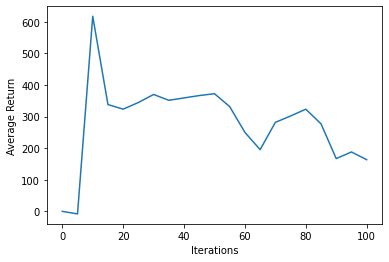

In [28]:
#visualize progress
iterations = range(0, num_iterations +1, eval_interval)
plt.plot(iterations, returns)
plt.ylabel('Average Return')
plt.xlabel('Iterations')
#plt.ylim(top=50000)

In [3]:
# startup simulation

def simpy_episode(rewards, steps, time_step, tf_env, policy):

    TIME_MULTIPLIER = 50
    DRIVER_COUNT = 1
    TRIP_COUNT = 8000
    RUN_TIME = 10000
    INTERVAL = 20
    # GRID_WIDTH = 3809
    # GRID_HEIGHT = 2622
    GRID_WIDTH = 60
    GRID_HEIGHT = 40
    HEX_AREA = 2.6

    Env = simpy.Environment()
    map_grid = Grid(env=Env, width=GRID_WIDTH, height=GRID_HEIGHT, interval=INTERVAL, num_drivers=DRIVER_COUNT,
                    hex_area=HEX_AREA)

    taxi_spots = map_grid.taxi_spots
    driver_list = create_drivers(Env, DRIVER_COUNT, map_grid)
    driver_pools = map_grid.driver_pools

    run_simulation(TRIP_COUNT, RUN_TIME, DRIVER_COUNT, TIME_MULTIPLIER, map_grid, taxi_spots, driver_list, driver_pools, Env, rewards, steps, time_step, tf_env, policy)
    t_count = 0
    for dr in driver_list:
        d_t_count = dr.total_trip_count
        t_count += d_t_count
        print(f"{dr.id} completed {d_t_count}")

    print(f"Total trip count: {t_count}")

In [5]:
var = tf.random.uniform([1], 0, 2, dtype=tf.int32)
var[0] = 2
print (var)

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

In [10]:
#simple episode run - atttempt 1

time_step = tf_env.reset()
rewards = []
steps = []
num_episodes = 5

for _ in range(num_episodes):
    simpy_episode(rewards, step, time_step, tf_env, policy)

    action = tf.random.uniform([1], 0, 2, dtype=tf.int32)
    time_step = tf_env.step(action)
    episode_steps += 1
    episode_reward += time_step.reward.numpy()
  rewards.append(episode_reward)
  steps.append(episode_steps)
  time_step = tf_env.reset()

num_steps = np.sum(steps)
avg_length = np.mean(steps)
avg_reward = np.mean(rewards)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 15)

In [ ]:
#simple episode run - atttempt 2

#time_step = tf_env.reset()
rewards = []
steps = []
num_episodes = 5

for _ in range(num_episodes):
    time_step = tf_env.reset()
    
    
    
    
    
    
    simpy_episode(rewards, step, time_step, tf_env, policy)

    action = tf.random.uniform([1], 0, 2, dtype=tf.int32)
    time_step = tf_env.step(action)
    episode_steps += 1
    episode_reward += time_step.reward.numpy()
  rewards.append(episode_reward)
  steps.append(episode_steps)
  time_step = tf_env.reset()

num_steps = np.sum(steps)
avg_length = np.mean(steps)
avg_reward = np.mean(rewards)

In [ ]:
#simple episode run template
"""
time_step = tf_env.reset()
rewards = []
steps = []
num_episodes = 5

for _ in range(num_episodes):
  episode_reward = 0
  episode_steps = 0
  while not time_step.is_last():
    action = tf.random.uniform([1], 0, 2, dtype=tf.int32)
    time_step = tf_env.step(action)
    episode_steps += 1
    episode_reward += time_step.reward.numpy()
  rewards.append(episode_reward)
  steps.append(episode_steps)
  time_step = tf_env.reset()

num_steps = np.sum(steps)
avg_length = np.mean(steps)
avg_reward = np.mean(rewards)

print('num_episodes:', num_episodes, 'num_steps:', num_steps)
print('avg_length', avg_length, 'avg_reward:', avg_reward)
"""